In [1]:
curve_db = load('Curve Database (Conductor < 100 000)/curve_database_c1_to_100000.sobj')

In [25]:
list(curve_db.keys())[0] # This dictionary takes the Cremona label as an input

'11a1'

In [24]:
list(curve_db.values())[0] # And returns this dictionary for each label

{'label': '11a1',
 'conductor': 11,
 'isogeny_class': '11a',
 'rank': 0,
 'ap_list': [-2,
  -1,
  1,
  -2,
  1,
  4,
  -2,
  0,
  -1,
  0,
  7,
  3,
  -8,
  -6,
  8,
  -6,
  5,
  12,
  -7,
  -3,
  4,
  -10,
  -6,
  15,
  -7,
  2,
  -16,
  18,
  10,
  9,
  8,
  -18,
  -7,
  10,
  -10,
  2,
  -7,
  4,
  -12,
  -6,
  -15,
  7,
  17,
  4,
  -2,
  0,
  12,
  19,
  18,
  15,
  24,
  -30,
  -8,
  -23,
  -2,
  14,
  10,
  -28,
  -2,
  -18,
  4,
  24,
  8,
  12,
  -1,
  13,
  7,
  -22,
  28,
  30,
  -21,
  -20,
  -17,
  -26,
  -5,
  -1,
  -15,
  -2,
  2,
  -30,
  20,
  22,
  -18,
  -11,
  40,
  -11,
  35,
  -12,
  12,
  -11,
  -27,
  20,
  23,
  -8,
  20,
  -26,
  15,
  -3,
  -16,
  -8,
  8,
  -2,
  4,
  0,
  -28,
  33,
  28,
  44,
  40,
  2,
  -22,
  -16,
  18,
  -25,
  7,
  -33,
  29,
  -7,
  -41,
  10,
  37,
  14,
  -42,
  -16,
  17,
  2,
  -25,
  15,
  3,
  -36,
  50,
  4,
  -23,
  -22,
  12,
  20,
  -6,
  -32,
  53,
  0,
  -38,
  22,
  39,
  -52,
  25,
  -5,
  14,
  8,
  -15,
  24,
  -12,


In [1]:
def elliptic_curve_from_phi(phi):
    """
    Compute the Weierstrass coefficients (a, b) for the elliptic curve:
    y² = x³ + ax + b
    
    where the coefficients are given in terms of φ by equation (70):
    a = -(9φ⁴ - 12φ³ + 30φ² - 12φ + 1) / 3
    b = -2(27φ⁶ - 54φ⁵ - 135φ⁴ + 180φ³ - 99φ² + 18φ - 1) / 27
    
    Parameters:
    -----------
    phi : numeric (int, float, or symbolic)
        The parameter φ
    
    Returns:
    --------
    tuple : (a, b)
        The two Weierstrass coefficients
    """
    # Compute coefficient a
    a_numerator = 9*phi**4 - 12*phi**3 + 30*phi**2 - 12*phi + 1
    a = -a_numerator / 3
    
    # Compute coefficient b
    b_numerator = 27*phi**6 - 54*phi**5 - 135*phi**4 + 180*phi**3 - 99*phi**2 + 18*phi - 1
    b = -2 * b_numerator / 27
    
    return a, b

# SageMath version (if using Sage)
def elliptic_curve_from_phi_sage(phi):
    """
    SageMath version that returns an actual EllipticCurve object.
    
    Parameters:
    -----------
    phi : numeric or symbolic
        The parameter φ
    
    Returns:
    --------
    EllipticCurve : Sage EllipticCurve object
    """
    from sage.all import EllipticCurve, QQ
    
    a, b = elliptic_curve_from_phi(phi)
    
    # Create elliptic curve in Weierstrass form [0, 0, 0, a, b]
    return EllipticCurve([0, 0, 0, a, b])

In [26]:
phi = -1/7
ctest = elliptic_curve_from_phi_sage(phi)
ctest.aplist(primes_first_n(10)[-1])

[-1, -2, 0, 1, 0, -4, 6, 2, 0, -6]

In [1]:
import numpy as np

#Let's generate a new set of rational elliptic curves associated to the HV manifold
Nphi = 20000

# phis = np.random.randint(1, 100, size = (Nphi))/np.random.randint(1, 100, size = (Nphi))
phis = np.random.randn(Nphi)
phis = [QQ(round(x,2)) for x in phis]

In [45]:
save(phis, "HV_curves/my_phis")

In [2]:
phis = load("HV_curves/my_phis")

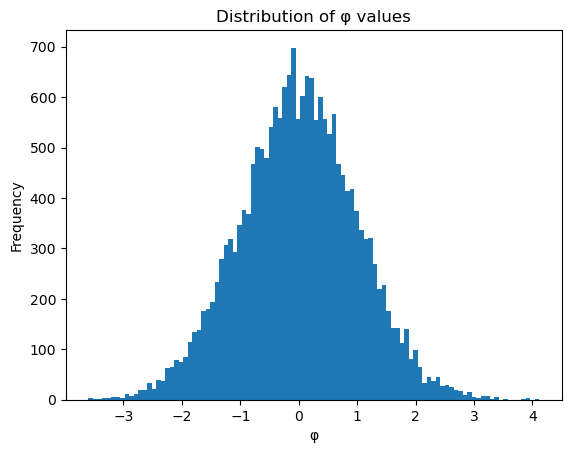

In [2]:
import matplotlib.pyplot as plt

# Convert Sage rationals to floats for plotting
phis_float = [float(phi) for phi in phis]

plt.hist(phis_float, bins=100)
plt.xlabel('φ')
plt.ylabel('Frequency')
plt.title('Distribution of φ values')
plt.show()

In [3]:
from tqdm import tqdm
import numpy as np

# Extract average aps sorted by rank

rk0_aps = []
rk1_aps = []
rk2_aps = []
rk3_aps = []

for phi in phis:
    label = elliptic_curve_from_phi_sage(phi).label()
    curve = curve_db[label]
    rk = curve['rank']
    aps = curve['ap_list']
    if rk == 0:
        rk0_aps.append(aps)
    elif rk == 1:
        rk0_aps.append(aps)
    elif rk == 2:
        rk0_aps.append(aps)
    elif rk == 3:
        rk0_aps.append(aps)

rk0_aps = np.array(rk0_aps)
rk1_aps = np.array(rk1_aps)
rk2_aps = np.array(rk2_aps)
rk3_aps = np.array(rk3_aps)

rk0_average_aps = np.mean(rk0_aps, axis = 0)
rk1_average_aps = np.mean(rk1_aps, axis = 0)
rk2_average_aps = np.mean(rk2_aps, axis = 0)
rk3_average_aps = np.mean(rk3_aps, axis = 0)

NameError: name 'elliptic_curve_from_phi_sage' is not defined

In [ ]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import os

# Create output directory
os.makedirs('HV_curves/', exist_ok=True)

# Helper function to extract isogeny class from label
def get_isogeny_class(label):
    """Extract isogeny class from label (e.g., '37a2' -> '37a')"""
    i = len(label) - 1
    while i >= 0 and label[i].isdigit():
        i -= 1
    return label[:i+1]

# Build isogeny class lookup dictionary from curve_db
print("Building isogeny class lookup...")
isogeny_class_lookup = {}
for label, curve_data in curve_db.items():
    iso_class = curve_data['isogeny_class']
    isogeny_class_lookup[iso_class] = curve_data

print(f"Database covers {len(isogeny_class_lookup)} isogeny classes")

# Extract average aps sorted by rank
rk0_aps = []
rk1_aps = []
rk2_aps = []
rk3_aps = []

# Track processed isogeny classes and missing ones
processed_isogeny_classes = set()
missing_isogeny_classes = []
processed_curves_info = []  # Store (phi_index, label, isogeny_class) for reference

for idx, phi in enumerate(tqdm(phis, desc="Processing curves")):
    try:
        E = elliptic_curve_from_phi_sage(phi)
        label = E.label()
        iso_class = get_isogeny_class(label)
        
        # Skip if we've already processed this isogeny class
        if iso_class in processed_isogeny_classes:
            continue
        
        # Check if isogeny class exists in database
        if iso_class not in isogeny_class_lookup:
            missing_isogeny_classes.append(iso_class)
            continue
        
        # Get curve data for this isogeny class
        curve = isogeny_class_lookup[iso_class]
        rk = curve['rank']
        aps = curve['ap_list']
        
        # Append to correct list based on rank
        if rk == 0:
            rk0_aps.append(aps)
        elif rk == 1:
            rk1_aps.append(aps)
        elif rk == 2:
            rk2_aps.append(aps)
        elif rk == 3:
            rk3_aps.append(aps)
        
        # Mark this isogeny class as processed
        processed_isogeny_classes.add(iso_class)
        processed_curves_info.append((idx, label, iso_class))
        
    except Exception as e:
        print(f"Error processing phi {idx}: {e}")
        continue

# Convert to numpy arrays and compute averages
print(f"\nProcessed {len(processed_isogeny_classes)} unique isogeny classes")
print(f"Missing {len(missing_isogeny_classes)} isogeny classes from database")
print(f"Rank 0: {len(rk0_aps)} isogeny classes")
print(f"Rank 1: {len(rk1_aps)} isogeny classes")
print(f"Rank 2: {len(rk2_aps)} isogeny classes")
print(f"Rank 3: {len(rk3_aps)} isogeny classes")

# Only compute averages if we have data
if len(rk0_aps) > 0:
    rk0_aps = np.array(rk0_aps)
    rk0_average_aps = np.mean(rk0_aps, axis=0)
else:
    rk0_average_aps = None
    print("Warning: No rank 0 curves found")

if len(rk1_aps) > 0:
    rk1_aps = np.array(rk1_aps)
    rk1_average_aps = np.mean(rk1_aps, axis=0)
else:
    rk1_average_aps = None
    print("Warning: No rank 1 curves found")

if len(rk2_aps) > 0:
    rk2_aps = np.array(rk2_aps)
    rk2_average_aps = np.mean(rk2_aps, axis=0)
else:
    rk2_average_aps = None
    print("Warning: No rank 2 curves found")

if len(rk3_aps) > 0:
    rk3_aps = np.array(rk3_aps)
    rk3_average_aps = np.mean(rk3_aps, axis=0)
else:
    rk3_average_aps = None
    print("Warning: No rank 3 curves found")

# Save the average aps
averages_data = {
    'rank_0_average': rk0_average_aps.tolist() if rk0_average_aps is not None else None,
    'rank_1_average': rk1_average_aps.tolist() if rk1_average_aps is not None else None,
    'rank_2_average': rk2_average_aps.tolist() if rk2_average_aps is not None else None,
    'rank_3_average': rk3_average_aps.tolist() if rk3_average_aps is not None else None,
    'rank_0_count': len(rk0_aps) if len(rk0_aps) > 0 else 0,
    'rank_1_count': len(rk1_aps) if len(rk1_aps) > 0 else 0,
    'rank_2_count': len(rk2_aps) if len(rk2_aps) > 0 else 0,
    'rank_3_count': len(rk3_aps) if len(rk3_aps) > 0 else 0,
    'processed_isogeny_classes': list(processed_isogeny_classes),
    'missing_isogeny_classes': missing_isogeny_classes,
    'processed_curves_info': processed_curves_info
}

save(averages_data, 'HV_curves/average_aps.sobj')
print("\nSaved average aps to HV_curves/average_aps.sobj")

# Save individual arrays
if rk0_average_aps is not None:
    save(rk0_average_aps, 'HV_curves/rk0_average_aps.sobj')
if rk1_average_aps is not None:
    save(rk1_average_aps, 'HV_curves/rk1_average_aps.sobj')
if rk2_average_aps is not None:
    save(rk2_average_aps, 'HV_curves/rk2_average_aps.sobj')
if rk3_average_aps is not None:
    save(rk3_average_aps, 'HV_curves/rk3_average_aps.sobj')

# Create plots
N = len(rk0_average_aps) if rk0_average_aps is not None else (
     len(rk1_average_aps) if rk1_average_aps is not None else 0)

if N > 0:
    # Plot 1: Rank 0 vs Rank 1
    plt.figure(figsize=(14, 7))
    if rk0_average_aps is not None:
        plt.scatter(range(N), rk0_average_aps, 
                   label=f"Rank 0 (n={len(rk0_aps)})", alpha=0.6, s=15)
    if rk1_average_aps is not None:
        plt.scatter(range(N), rk1_average_aps, 
                   label=f"Rank 1 (n={len(rk1_aps)})", alpha=0.6, s=15)
    plt.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
    plt.legend(fontsize=12)
    plt.xlabel(r"Prime index $i$", fontsize=12)
    plt.ylabel(r"Average $a_{p_i}$", fontsize=12)
    plt.title(r"Average $a_p$ vs prime index for HV curves", fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('HV_curves/ap_averages_rank0_vs_rank1.png', dpi=150)
    print("Saved plot: HV_curves/ap_averages_rank0_vs_rank1.png")
    plt.close()
    
    # Plot 2: All ranks
    plt.figure(figsize=(14, 7))
    if rk0_average_aps is not None:
        plt.scatter(range(N), rk0_average_aps, 
                   label=f"Rank 0 (n={len(rk0_aps)})", alpha=0.5, s=12)
    if rk1_average_aps is not None:
        plt.scatter(range(N), rk1_average_aps, 
                   label=f"Rank 1 (n={len(rk1_aps)})", alpha=0.5, s=12)
    if rk2_average_aps is not None:
        plt.scatter(range(N), rk2_average_aps, 
                   label=f"Rank 2 (n={len(rk2_aps)})", alpha=0.5, s=12)
    if rk3_average_aps is not None:
        plt.scatter(range(N), rk3_average_aps, 
                   label=f"Rank 3 (n={len(rk3_aps)})", alpha=0.5, s=12)
    plt.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
    plt.legend(fontsize=12)
    plt.xlabel(r"Prime index $i$", fontsize=12)
    plt.ylabel(r"Average $a_{p_i}$", fontsize=12)
    plt.title(r"Average $a_p$ by rank for HV curves", fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('HV_curves/ap_averages_all_ranks.png', dpi=150)
    print("Saved plot: HV_curves/ap_averages_all_ranks.png")
    plt.close()
    
    print("\nDone!")
else:
    print("\nNo data to plot")

# Print summary
print("\n" + "="*60)
print("SUMMARY")
print("="*60)
print(f"Total HV phis processed: {len(phis)}")
print(f"Unique isogeny classes found: {len(processed_isogeny_classes)}")
print(f"Missing from database: {len(missing_isogeny_classes)}")
if len(missing_isogeny_classes) > 0:
    print(f"Missing isogeny classes (first 10): {missing_isogeny_classes[:10]}")
    if len(missing_isogeny_classes) > 10:
        print(f"  ... and {len(missing_isogeny_classes) - 10} more")
print("="*60)

Building isogeny class lookup...
Database covers 437226 isogeny classes


Processing curves:   0%|                                                              | 1/20000 [00:00<51:05,  6.52it/s]

Error processing phi 0: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2954514889/300000000*x + 138926573662213/13500000000000 over Rational Field


Processing curves:   0%|                                                              | 3/20000 [00:00<36:17,  9.18it/s]

Error processing phi 1: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 60553969/1171875*x + 378452309906/6591796875 over Rational Field
Error processing phi 3: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5197759849/300000000*x + 278550671709493/13500000000000 over Rational Field


Processing curves:   0%|                                                              | 5/20000 [00:00<31:02, 10.73it/s]

Error processing phi 4: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27326209/1171875*x + 189131814146/6591796875 over Rational Field


Processing curves:   0%|                                                              | 9/20000 [00:00<29:02, 11.47it/s]

Error processing phi 7: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 182248969/18750000*x + 2430127492453/210937500000 over Rational Field
Error processing phi 10: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 29790502489/300000000*x + 860296678630237/13500000000000 over Rational Field


Processing curves:   0%|                                                             | 14/20000 [00:01<25:24, 13.11it/s]

Error processing phi 11: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 169660489/18750000*x + 1943364391237/210937500000 over Rational Field
Error processing phi 12: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 588108649/18750000*x + 8142835571893/210937500000 over Rational Field


Processing curves:   0%|                                                             | 16/20000 [00:01<24:47, 13.44it/s]

Error processing phi 14: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 211684249/18750000*x + 2586537290557/210937500000 over Rational Field
Error processing phi 15: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 45767104/1171875*x + 431412872384/6591796875 over Rational Field


Processing curves:   0%|                                                             | 20/20000 [00:01<26:10, 12.72it/s]

Error processing phi 17: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2207811049/300000000*x + 94409091727093/13500000000000 over Rational Field
Error processing phi 18: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7190809/480000*x + 15020654077/864000000 over Rational Field
Error processing phi 19: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17557129/18750000*x + 102143460133/210937500000 over Rational Field


Processing curves:   0%|                                                             | 22/20000 [00:01<25:35, 13.01it/s]

Error processing phi 20: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 34704960409/300000000*x + 730175571878077/13500000000000 over Rational Field


Processing curves:   0%|                                                             | 28/20000 [00:02<23:22, 14.24it/s]

Error processing phi 24: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1648482409/300000000*x + 66930759989173/13500000000000 over Rational Field
Error processing phi 25: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1239199129/18750000*x + 13689235011133/210937500000 over Rational Field
Error processing phi 27: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2189406169/300000000*x + 102255772817053/13500000000000 over Rational Field


Processing curves:   0%|                                                             | 30/20000 [00:02<22:42, 14.66it/s]

Error processing phi 28: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1052104249/300000000*x + 34290559640557/13500000000000 over Rational Field


Processing curves:   0%|                                                             | 38/20000 [00:02<21:35, 15.41it/s]

Error processing phi 34: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6842930329/300000000*x + 378363437331517/13500000000000 over Rational Field
Error processing phi 35: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6842930329/300000000*x + 378363437331517/13500000000000 over Rational Field
Error processing phi 37: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 133823929/18750000*x + 1415138255533/210937500000 over Rational Field


Processing curves:   0%|▏                                                            | 42/20000 [00:03<23:17, 14.28it/s]

Error processing phi 38: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32755369/18750000*x + 186774917653/210937500000 over Rational Field
Error processing phi 39: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3122498329/300000000*x + 149214103188733/13500000000000 over Rational Field
Error processing phi 40: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5438720809/300000000*x + 365059592556373/13500000000000 over Rational Field


Processing curves:   0%|▏                                                            | 46/20000 [00:03<25:10, 13.21it/s]

Error processing phi 43: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 35694169/480000*x + 57867714397/864000000 over Rational Field
Error processing phi 44: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4954942969/300000000*x + 263461929469453/13500000000000 over Rational Field
Error processing phi 45: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 31687222249/300000000*x + 819364984301557/13500000000000 over Rational Field


Processing curves:   0%|▏                                                            | 48/20000 [00:03<25:37, 12.98it/s]

Error processing phi 46: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3297104569/300000000*x + 159977174637997/13500000000000 over Rational Field


Processing curves:   0%|▏                                                            | 52/20000 [00:03<23:37, 14.08it/s]

Error processing phi 49: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 29061071209/300000000*x + 1682498705786677/13500000000000 over Rational Field
Error processing phi 50: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118017769/18750000*x + 1191595185397/210937500000 over Rational Field


Processing curves:   0%|▏                                                            | 54/20000 [00:04<24:13, 13.72it/s]

Error processing phi 52: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4018729/18750000*x + 36344974933/210937500000 over Rational Field


Processing curves:   0%|▏                                                            | 58/20000 [00:04<23:24, 14.20it/s]

Error processing phi 55: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7873911289/300000000*x + 574456552525837/13500000000000 over Rational Field
Error processing phi 56: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 119113129/18750000*x + 1299563668117/210937500000 over Rational Field
Error processing phi 57: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22262089/18750000*x + 130595695813/210937500000 over Rational Field


Processing curves:   0%|▏                                                            | 66/20000 [00:04<24:21, 13.64it/s]

Error processing phi 64: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 397347289/300000000*x + 7909874407837/13500000000000 over Rational Field
Error processing phi 65: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9219134089/300000000*x + 511194585974437/13500000000000 over Rational Field
Error processing phi 66: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1205189449/300000000*x + 41900583380293/13500000000000 over Rational Field


Processing curves:   0%|▏                                                            | 70/20000 [00:05<22:39, 14.66it/s]

Error processing phi 68: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 397347289/300000000*x + 7909874407837/13500000000000 over Rational Field
Error processing phi 69: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3297104569/300000000*x + 159977174637997/13500000000000 over Rational Field
Error processing phi 70: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 911680489/300000000*x + 27851602741237/13500000000000 over Rational Field


Processing curves:   0%|▏                                                            | 72/20000 [00:05<25:28, 13.04it/s]

Error processing phi 71: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 36766270249/300000000*x + 1709393468068693/13500000000000 over Rational Field


Processing curves:   0%|▏                                                            | 76/20000 [00:05<32:05, 10.35it/s]

Error processing phi 72: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 376420249/300000000*x + 8882160122557/13500000000000 over Rational Field
Error processing phi 75: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4365266569/300000000*x + 273263812569253/13500000000000 over Rational Field


Processing curves:   0%|▏                                                            | 80/20000 [00:06<28:35, 11.61it/s]

Error processing phi 78: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 22443911/300000000*x + 36528863437/13500000000000 over Rational Field
Error processing phi 79: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 148313209/18750000*x + 1799691065677/210937500000 over Rational Field
Error processing phi 80: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11222464/1171875*x + 65409938624/6591796875 over Rational Field


Processing curves:   0%|▎                                                            | 86/20000 [00:06<22:50, 14.53it/s]

Error processing phi 82: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2989639369/300000000*x + 161208210526597/13500000000000 over Rational Field
Error processing phi 83: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 445703689/300000000*x + 9389812176613/13500000000000 over Rational Field


Processing curves:   0%|▎                                                            | 90/20000 [00:06<22:03, 15.05it/s]

Error processing phi 87: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 28875537289/300000000*x + 875803206053413/13500000000000 over Rational Field


Processing curves:   0%|▎                                                            | 94/20000 [00:07<20:40, 16.05it/s]

Error processing phi 91: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 16361067529/300000000*x + 800442151634917/13500000000000 over Rational Field
Error processing phi 93: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 263472409/300000000*x + 6144094382077/13500000000000 over Rational Field


Processing curves:   0%|▎                                                            | 98/20000 [00:07<20:02, 16.55it/s]

Error processing phi 95: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field


Processing curves:   1%|▎                                                           | 102/20000 [00:07<23:39, 14.02it/s]

Error processing phi 99: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8851144969/300000000*x + 656392522685797/13500000000000 over Rational Field


Processing curves:   1%|▎                                                           | 108/20000 [00:08<30:39, 10.81it/s]

Error processing phi 105: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1205189449/300000000*x + 41900583380293/13500000000000 over Rational Field


Processing curves:   1%|▎                                                           | 112/20000 [00:08<24:15, 13.67it/s]

Error processing phi 108: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 298901449/300000000*x + 6953834156293/13500000000000 over Rational Field
Error processing phi 109: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 23830047289/300000000*x + 910751839058413/13500000000000 over Rational Field
Error processing phi 110: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 233233849/300000000*x + 3561644136493/13500000000000 over Rational Field
Error processing phi 111: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3460579129/300000000*x + 198448859361133/13500000000000 over Rational Field


Processing curves:   1%|▎                                                           | 116/20000 [00:08<21:18, 15.56it/s]

Error processing phi 113: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 233233849/300000000*x + 3561644136493/13500000000000 over Rational Field
Error processing phi 114: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 876497689/300000000*x + 25544552592637/13500000000000 over Rational Field
Error processing phi 115: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 143004409/300000000*x + 3707212940173/13500000000000 over Rational Field


Processing curves:   1%|▎                                                           | 122/20000 [00:09<21:02, 15.75it/s]

Error processing phi 118: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 608523769/18750000*x + 11388288243853/210937500000 over Rational Field


Processing curves:   1%|▍                                                           | 126/20000 [00:09<20:35, 16.08it/s]

Error processing phi 122: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 233233849/300000000*x + 3561644136493/13500000000000 over Rational Field
Error processing phi 125: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 24622144/1171875*x + 214734155456/6591796875 over Rational Field


Processing curves:   1%|▍                                                           | 128/20000 [00:09<21:03, 15.73it/s]

Error processing phi 126: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 63490009/18750000*x + 509002581277/210937500000 over Rational Field


Processing curves:   1%|▍                                                           | 132/20000 [00:09<21:37, 15.31it/s]

Error processing phi 129: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3122498329/300000000*x + 149214103188733/13500000000000 over Rational Field
Error processing phi 130: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11222464/1171875*x + 65409938624/6591796875 over Rational Field
Error processing phi 131: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 260609449/18750000*x + 3349721030293/210937500000 over Rational Field


Processing curves:   1%|▍                                                           | 136/20000 [00:09<20:56, 15.81it/s]

Error processing phi 133: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2954514889/300000000*x + 138926573662213/13500000000000 over Rational Field
Error processing phi 134: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 11137511/300000000*x + 948908166013/13500000000000 over Rational Field
Error processing phi 135: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22645249/1171875*x + 193369370114/6591796875 over Rational Field
Error processing phi 136: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 463144489/300000000*x + 11296072609237/13500000000000 over Rational Field


Processing curves:   1%|▍                                                           | 142/20000 [00:10<18:56, 17.48it/s]

Error processing phi 138: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 228889/18750000*x + 19646487037/210937500000 over Rational Field
Error processing phi 140: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3666916969/300000000*x + 182945606639797/13500000000000 over Rational Field
Error processing phi 141: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12108409/480000*x + 35100003277/864000000 over Rational Field


Processing curves:   1%|▍                                                           | 145/20000 [00:10<18:03, 18.33it/s]

Error processing phi 142: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1286718409/300000000*x + 46186298339077/13500000000000 over Rational Field
Error processing phi 143: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 143004409/300000000*x + 3707212940173/13500000000000 over Rational Field
Error processing phi 144: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4275969289/300000000*x + 221033283796837/13500000000000 over Rational Field
Error processing phi 145: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 42536929/1171875*x + 400519484066/6591796875 over Rational Field


Processing curves:   1%|▍                                                           | 151/20000 [00:10<18:01, 18.36it/s]

Error processing phi 147: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17125504/1171875*x + 111233038016/6591796875 over Rational Field
Error processing phi 148: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1239199129/18750000*x + 13689235011133/210937500000 over Rational Field


Processing curves:   1%|▍                                                           | 155/20000 [00:11<19:58, 16.56it/s]

Error processing phi 152: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field
Error processing phi 154: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 11137511/300000000*x + 948908166013/13500000000000 over Rational Field
Error processing phi 155: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 243327289/18750000*x + 3653116057837/210937500000 over Rational Field


Processing curves:   1%|▍                                                           | 159/20000 [00:11<18:57, 17.44it/s]

Error processing phi 156: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 551818969/300000000*x + 12906192128797/13500000000000 over Rational Field
Error processing phi 158: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 11137511/300000000*x + 948908166013/13500000000000 over Rational Field
Error processing phi 159: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 47054569/18750000*x + 332076843253/210937500000 over Rational Field


Processing curves:   1%|▍                                                           | 165/20000 [00:11<18:29, 17.88it/s]

Error processing phi 162: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 22443911/300000000*x + 36528863437/13500000000000 over Rational Field
Error processing phi 163: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32755369/18750000*x + 186774917653/210937500000 over Rational Field


Processing curves:   1%|▌                                                           | 169/20000 [00:11<20:57, 15.77it/s]

Error processing phi 166: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1712368009/300000000*x + 66601865223973/13500000000000 over Rational Field
Error processing phi 167: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12108409/480000*x + 35100003277/864000000 over Rational Field
Error processing phi 168: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 867934489/18750000*x + 11254549542013/210937500000 over Rational Field


Processing curves:   1%|▌                                                           | 174/20000 [00:12<17:38, 18.73it/s]

Error processing phi 170: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4954942969/300000000*x + 263461929469453/13500000000000 over Rational Field
Error processing phi 171: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3122498329/300000000*x + 149214103188733/13500000000000 over Rational Field
Error processing phi 173: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 270028969/300000000*x + 4436327842453/13500000000000 over Rational Field


Processing curves:   1%|▌                                                           | 179/20000 [00:12<15:53, 20.78it/s]

Error processing phi 175: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6983446969/300000000*x + 498418869841453/13500000000000 over Rational Field
Error processing phi 177: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9921524329/300000000*x + 743764869591733/13500000000000 over Rational Field
Error processing phi 178: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11505135049/300000000*x + 867561313137157/13500000000000 over Rational Field


Processing curves:   1%|▌                                                           | 185/20000 [00:12<17:05, 19.33it/s]

Error processing phi 181: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 706057609/18750000*x + 13307642605477/210937500000 over Rational Field
Error processing phi 182: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2567262889/300000000*x + 129278293830037/13500000000000 over Rational Field
Error processing phi 183: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 83048329/18750000*x + 757136292517/210937500000 over Rational Field
Error processing phi 184: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14154649/480000*x + 31451834557/864000000 over Rational Field


Processing curves:   1%|▌                                                           | 188/20000 [00:12<17:25, 18.94it/s]

Error processing phi 186: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1648482409/300000000*x + 66930759989173/13500000000000 over Rational Field
Error processing phi 188: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 456765529/18750000*x + 6337023005917/210937500000 over Rational Field
Error processing phi 189: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9999403129/300000000*x + 551191710333133/13500000000000 over Rational Field


Processing curves:   1%|▌                                                           | 195/20000 [00:13<17:19, 19.05it/s]

Error processing phi 191: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1156722169/18750000*x + 13317741101197/210937500000 over Rational Field
Error processing phi 192: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2072688649/300000000*x + 94264187921893/13500000000000 over Rational Field
Error processing phi 194: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 1751111/300000000*x + 1149894837037/13500000000000 over Rational Field


Processing curves:   1%|▌                                                           | 197/20000 [00:13<18:57, 17.41it/s]

Error processing phi 195: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 16953798409/300000000*x + 816411654467173/13500000000000 over Rational Field
Error processing phi 196: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 36618289/1171875*x + 341521087826/6591796875 over Rational Field


Processing curves:   1%|▌                                                           | 201/20000 [00:13<18:44, 17.60it/s]

Error processing phi 198: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 934276729/18750000*x + 11833431673933/210937500000 over Rational Field
Error processing phi 199: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22783849/300000000*x + 1610860104757/13500000000000 over Rational Field
Error processing phi 201: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 169660489/18750000*x + 1943364391237/210937500000 over Rational Field


Processing curves:   1%|▌                                                           | 203/20000 [00:13<20:25, 16.16it/s]

Error processing phi 202: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 63490009/18750000*x + 509002581277/210937500000 over Rational Field


Processing curves:   1%|▌                                                           | 207/20000 [00:14<24:00, 13.74it/s]

Error processing phi 204: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 22443911/300000000*x + 36528863437/13500000000000 over Rational Field
Error processing phi 206: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 611463769/300000000*x + 16040227842397/13500000000000 over Rational Field


Processing curves:   1%|▋                                                           | 211/20000 [00:14<21:54, 15.06it/s]

Error processing phi 208: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field
Error processing phi 209: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6704845849/300000000*x + 474438783162493/13500000000000 over Rational Field


Processing curves:   1%|▋                                                           | 215/20000 [00:14<22:12, 14.85it/s]

Error processing phi 213: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12108409/480000*x + 35100003277/864000000 over Rational Field


Processing curves:   1%|▋                                                           | 220/20000 [00:14<21:13, 15.53it/s]

Error processing phi 216: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 119113129/18750000*x + 1299563668117/210937500000 over Rational Field
Error processing phi 217: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 934276729/18750000*x + 11833431673933/210937500000 over Rational Field
Error processing phi 218: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 15223202809/300000000*x + 766279495428877/13500000000000 over Rational Field


Processing curves:   1%|▋                                                           | 223/20000 [00:15<19:31, 16.88it/s]

Error processing phi 221: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2345289769/300000000*x + 102414495216853/13500000000000 over Rational Field
Error processing phi 222: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1712368009/300000000*x + 66601865223973/13500000000000 over Rational Field
Error processing phi 223: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4365266569/300000000*x + 273263812569253/13500000000000 over Rational Field


Processing curves:   1%|▋                                                           | 225/20000 [00:15<20:26, 16.12it/s]

Error processing phi 224: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1648482409/300000000*x + 66930759989173/13500000000000 over Rational Field


Processing curves:   1%|▋                                                           | 234/20000 [00:15<19:47, 16.65it/s]

Error processing phi 229: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3803642089/300000000*x + 226405388120437/13500000000000 over Rational Field
Error processing phi 230: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve
Error processing phi 231: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 243327289/18750000*x + 3653116057837/210937500000 over Rational Field
Error processing phi 232: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2379529/30000*x + 1549759717/13500000 over Rational Field
Error processing phi 233: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field


Processing curves:   1%|▋                                                           | 237/20000 [00:15<16:45, 19.65it/s]

Error processing phi 234: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22783849/300000000*x + 1610860104757/13500000000000 over Rational Field
Error processing phi 237: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 60553969/1171875*x + 378452309906/6591796875 over Rational Field


Processing curves:   1%|▋                                                           | 243/20000 [00:16<15:53, 20.72it/s]

Error processing phi 239: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11262061369/300000000*x + 611745541855597/13500000000000 over Rational Field
Error processing phi 240: y^2 = x^3 - 16/3*x + 128/27 defines a singular curve


Processing curves:   1%|▋                                                           | 246/20000 [00:16<16:41, 19.73it/s]

Error processing phi 244: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 19490730409/300000000*x + 870635162093077/13500000000000 over Rational Field
Error processing phi 245: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 148313209/18750000*x + 1799691065677/210937500000 over Rational Field
Error processing phi 246: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 169660489/18750000*x + 1943364391237/210937500000 over Rational Field
Error processing phi 247: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 78131929/18750000*x + 667285829533/210937500000 over Rational Field


Processing curves:   1%|▊                                                           | 252/20000 [00:16<16:49, 19.55it/s]

Error processing phi 249: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27536089/18750000*x + 166280513437/210937500000 over Rational Field
Error processing phi 250: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 63490009/18750000*x + 509002581277/210937500000 over Rational Field
Error processing phi 253: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22783849/300000000*x + 1610860104757/13500000000000 over Rational Field


Processing curves:   1%|▊                                                           | 258/20000 [00:16<16:12, 20.30it/s]

Error processing phi 254: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17557129/18750000*x + 102143460133/210937500000 over Rational Field
Error processing phi 255: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 563931049/18750000*x + 10478003019157/210937500000 over Rational Field
Error processing phi 257: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5449175209/300000000*x + 294100474454677/13500000000000 over Rational Field


Processing curves:   1%|▊                                                           | 261/20000 [00:17<17:02, 19.30it/s]

Error processing phi 258: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4954942969/300000000*x + 263461929469453/13500000000000 over Rational Field
Error processing phi 259: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6434987209/300000000*x + 451154801708677/13500000000000 over Rational Field


Processing curves:   1%|▊                                                           | 266/20000 [00:17<18:13, 18.05it/s]

Error processing phi 262: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 41180798089/300000000*x + 1638735872342437/13500000000000 over Rational Field
Error processing phi 263: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 23830047289/300000000*x + 910751839058413/13500000000000 over Rational Field


Processing curves:   1%|▊                                                           | 272/20000 [00:17<15:20, 21.44it/s]

Error processing phi 268: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1116303769/300000000*x + 36296248593853/13500000000000 over Rational Field
Error processing phi 269: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1495204729/300000000*x + 55075307498317/13500000000000 over Rational Field
Error processing phi 271: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17746729/480000*x + 53498994517/864000000 over Rational Field
Error processing phi 272: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 805242889/18750000*x + 10650525480037/210937500000 over Rational Field
Error processing phi 273: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 559511929/300000000*x + 14291820179533/13500000000000 over Rational Field


Processing curves:   1%|▊                                                           | 278/20000 [00:17<15:54, 20.66it/s]

Error processing phi 275: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 445380889/18750000*x + 7979184985213/210937500000 over Rational Field
Error processing phi 277: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 133823929/18750000*x + 1415138255533/210937500000 over Rational Field
Error processing phi 278: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1032351049/300000000*x + 32417025369157/13500000000000 over Rational Field
Error processing phi 279: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field


Processing curves:   1%|▊                                                           | 284/20000 [00:18<16:24, 20.03it/s]

Error processing phi 280: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11222464/1171875*x + 65409938624/6591796875 over Rational Field
Error processing phi 281: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11440969/480000*x + 25370339653/864000000 over Rational Field
Error processing phi 282: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2954514889/300000000*x + 138926573662213/13500000000000 over Rational Field


Processing curves:   1%|▊                                                           | 289/20000 [00:18<20:40, 15.89it/s]

Error processing phi 286: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 551818969/300000000*x + 12906192128797/13500000000000 over Rational Field


Processing curves:   1%|▉                                                           | 297/20000 [00:19<19:13, 17.08it/s]

Error processing phi 294: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12168508489/300000000*x + 651920274339013/13500000000000 over Rational Field
Error processing phi 297: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4171554649/300000000*x + 256974490651357/13500000000000 over Rational Field


Processing curves:   2%|▉                                                           | 301/20000 [00:19<18:05, 18.15it/s]

Error processing phi 298: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 64063849/480000*x + 106422235957/864000000 over Rational Field
Error processing phi 300: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 168827569/1171875*x + 158498422994/6591796875 over Rational Field
Error processing phi 301: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9921524329/300000000*x + 743764869591733/13500000000000 over Rational Field


Processing curves:   2%|▉                                                           | 305/20000 [00:19<17:24, 18.85it/s]

Error processing phi 302: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 235237369/18750000*x + 2952971168653/210937500000 over Rational Field
Error processing phi 304: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1116303769/300000000*x + 36296248593853/13500000000000 over Rational Field


Processing curves:   2%|▉                                                           | 309/20000 [00:19<18:23, 17.85it/s]

Error processing phi 306: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 60887564089/300000000*x - 1192311127740563/13500000000000 over Rational Field
Error processing phi 307: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 19490730409/300000000*x + 870635162093077/13500000000000 over Rational Field
Error processing phi 308: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 876497689/300000000*x + 25544552592637/13500000000000 over Rational Field


Processing curves:   2%|▉                                                           | 316/20000 [00:20<19:44, 16.62it/s]

Error processing phi 313: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 541544809/18750000*x + 7525488957877/210937500000 over Rational Field
Error processing phi 314: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2488533049/300000000*x + 110860765458157/13500000000000 over Rational Field


Processing curves:   2%|▉                                                           | 322/20000 [00:20<19:49, 16.55it/s]

Error processing phi 318: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1127017369/300000000*x + 37940931518653/13500000000000 over Rational Field
Error processing phi 321: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field


Processing curves:   2%|▉                                                           | 326/20000 [00:20<20:24, 16.06it/s]

Error processing phi 323: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 723237769/300000000*x + 20106995535397/13500000000000 over Rational Field
Error processing phi 324: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3297104569/300000000*x + 159977174637997/13500000000000 over Rational Field
Error processing phi 326: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 45767104/1171875*x + 431412872384/6591796875 over Rational Field


Processing curves:   2%|▉                                                           | 330/20000 [00:20<20:04, 16.33it/s]

Error processing phi 327: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6257195209/300000000*x + 343410754621573/13500000000000 over Rational Field
Error processing phi 328: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1204437049/300000000*x + 40488581050093/13500000000000 over Rational Field
Error processing phi 329: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 30129529/480000*x + 54958931533/864000000 over Rational Field


Processing curves:   2%|█                                                           | 335/20000 [00:21<18:18, 17.89it/s]

Error processing phi 330: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 90243769/18750000*x + 819147492397/210937500000 over Rational Field
Error processing phi 331: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 24171197689/300000000*x + 1562393016873613/13500000000000 over Rational Field
Error processing phi 332: y^2 = x^3 - 16/3*x + 128/27 defines a singular curve
Error processing phi 333: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 706057609/18750000*x + 13307642605477/210937500000 over Rational Field


Processing curves:   2%|█                                                           | 339/20000 [00:21<19:09, 17.10it/s]

Error processing phi 336: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 45767104/1171875*x + 431412872384/6591796875 over Rational Field
Error processing phi 339: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 235237369/18750000*x + 2952971168653/210937500000 over Rational Field


Processing curves:   2%|█                                                           | 343/20000 [00:21<19:04, 17.17it/s]

Error processing phi 340: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1828366729/300000000*x + 72942415937317/13500000000000 over Rational Field
Error processing phi 341: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 113794969/480000*x - 157155969347/864000000 over Rational Field
Error processing phi 342: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9999403129/300000000*x + 551191710333133/13500000000000 over Rational Field


Processing curves:   2%|█                                                           | 349/20000 [00:22<18:27, 17.74it/s]

Error processing phi 345: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 55026649/300000000*x + 2168268020893/13500000000000 over Rational Field
Error processing phi 347: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 260609449/18750000*x + 3349721030293/210937500000 over Rational Field
Error processing phi 348: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3862497529/300000000*x + 195156063496333/13500000000000 over Rational Field


Processing curves:   2%|█                                                           | 351/20000 [00:22<18:22, 17.83it/s]

Error processing phi 349: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 63490009/18750000*x + 509002581277/210937500000 over Rational Field


Processing curves:   2%|█                                                         | 360/20000 [00:25<1:00:59,  5.37it/s]

Error processing phi 356: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27536089/18750000*x + 166280513437/210937500000 over Rational Field
Error processing phi 358: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 260609449/18750000*x + 3349721030293/210937500000 over Rational Field
Error processing phi 359: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field


Processing curves:   2%|█                                                           | 366/20000 [00:26<35:02,  9.34it/s]

Error processing phi 363: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field
Error processing phi 364: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3803642089/300000000*x + 226405388120437/13500000000000 over Rational Field


Processing curves:   2%|█                                                           | 370/20000 [00:26<27:03, 12.09it/s]

Error processing phi 366: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 287898409/18750000*x + 3776721989077/210937500000 over Rational Field
Error processing phi 367: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field
Error processing phi 368: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1296877609/300000000*x + 45007218955477/13500000000000 over Rational Field
Error processing phi 369: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 876497689/300000000*x + 25544552592637/13500000000000 over Rational Field
Error processing phi 370: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2792975689/300000000*x + 129109401453637/13500000000000 over Rational Field


Processing curves:   2%|█                                                           | 373/20000 [00:26<24:05, 13.58it/s]

Error processing phi 371: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field


Processing curves:   2%|█▏                                                          | 381/20000 [00:26<20:58, 15.59it/s]

Error processing phi 377: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2792975689/300000000*x + 129109401453637/13500000000000 over Rational Field
Error processing phi 378: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 270028969/300000000*x + 4436327842453/13500000000000 over Rational Field
Error processing phi 379: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6842930329/300000000*x + 378363437331517/13500000000000 over Rational Field


Processing curves:   2%|█▏                                                          | 388/20000 [00:27<18:36, 17.56it/s]

Error processing phi 385: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1495204729/300000000*x + 55075307498317/13500000000000 over Rational Field
Error processing phi 388: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1495204729/300000000*x + 55075307498317/13500000000000 over Rational Field


Processing curves:   2%|█▏                                                          | 394/20000 [00:27<19:16, 16.95it/s]

Error processing phi 390: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 222558784/1171875*x - 381723724096/6591796875 over Rational Field
Error processing phi 391: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3666916969/300000000*x + 182945606639797/13500000000000 over Rational Field
Error processing phi 392: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4275969289/300000000*x + 221033283796837/13500000000000 over Rational Field


Processing curves:   2%|█▏                                                          | 397/20000 [00:27<17:56, 18.21it/s]

Error processing phi 394: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7271009449/300000000*x + 523088070775957/13500000000000 over Rational Field
Error processing phi 395: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 37938169/300000000*x + 1875829943053/13500000000000 over Rational Field
Error processing phi 396: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 18188423929/300000000*x + 845657822200717/13500000000000 over Rational Field
Error processing phi 397: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve
Error processing phi 398: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 397347289/300000000*x + 7909874407837/13500000000000 over Rational Field
Error processing phi 399: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6257195209/300000000*x + 343410754621573/13500000000000 over Rational Field


Processing curves:   2%|█▏                                                          | 404/20000 [00:28<15:43, 20.77it/s]

Error processing phi 400: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 445703689/300000000*x + 9389812176613/13500000000000 over Rational Field
Error processing phi 401: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 298901449/300000000*x + 6953834156293/13500000000000 over Rational Field
Error processing phi 402: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9999403129/300000000*x + 551191710333133/13500000000000 over Rational Field


Processing curves:   2%|█▏                                                          | 407/20000 [00:28<16:23, 19.92it/s]

Error processing phi 405: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 690229849/18750000*x + 9400787361757/210937500000 over Rational Field
Error processing phi 406: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 318828769/1171875*x - 1964451187294/6591796875 over Rational Field
Error processing phi 407: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2189406169/300000000*x + 102255772817053/13500000000000 over Rational Field
Error processing phi 408: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3803642089/300000000*x + 226405388120437/13500000000000 over Rational Field


Processing curves:   2%|█▎                                                          | 418/20000 [00:28<16:12, 20.14it/s]

Error processing phi 415: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field
Error processing phi 416: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 233233849/300000000*x + 3561644136493/13500000000000 over Rational Field


Processing curves:   2%|█▎                                                          | 421/20000 [00:29<16:47, 19.44it/s]

Error processing phi 419: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 55026649/300000000*x + 2168268020893/13500000000000 over Rational Field
Error processing phi 421: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 382297609/18750000*x + 5233193660773/210937500000 over Rational Field


Processing curves:   2%|█▎                                                          | 432/20000 [00:29<16:23, 19.89it/s]

Error processing phi 428: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11222464/1171875*x + 65409938624/6591796875 over Rational Field
Error processing phi 430: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 104228689/1171875*x + 440230978226/6591796875 over Rational Field


Processing curves:   2%|█▎                                                          | 435/20000 [00:29<19:33, 16.67it/s]

Error processing phi 432: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3122498329/300000000*x + 149214103188733/13500000000000 over Rational Field
Error processing phi 434: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 41155609/480000*x + 102998807677/864000000 over Rational Field


Processing curves:   2%|█▎                                                          | 441/20000 [00:30<20:22, 16.00it/s]

Error processing phi 437: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 551818969/300000000*x + 12906192128797/13500000000000 over Rational Field
Error processing phi 438: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2792975689/300000000*x + 129109401453637/13500000000000 over Rational Field


Processing curves:   2%|█▎                                                          | 444/20000 [00:30<18:44, 17.39it/s]

Error processing phi 441: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8135720569/300000000*x + 452576652066253/13500000000000 over Rational Field
Error processing phi 442: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6545204809/300000000*x + 360690034578373/13500000000000 over Rational Field


Processing curves:   2%|█▎                                                          | 450/20000 [00:30<20:12, 16.12it/s]

Error processing phi 447: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1205189449/300000000*x + 41900583380293/13500000000000 over Rational Field


Processing curves:   2%|█▎                                                          | 458/20000 [00:31<16:35, 19.63it/s]

Error processing phi 453: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11708632729/300000000*x + 631887941551933/13500000000000 over Rational Field
Error processing phi 454: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 234722689/1171875*x - 539645689726/6591796875 over Rational Field
Error processing phi 455: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1205189449/300000000*x + 41900583380293/13500000000000 over Rational Field
Error processing phi 456: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1495204729/300000000*x + 55075307498317/13500000000000 over Rational Field
Error processing phi 457: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 463144489/300000000*x + 11296072609237/13500000000000 over Rational Field


Processing curves:   2%|█▍                                                          | 461/20000 [00:31<16:36, 19.60it/s]

Error processing phi 458: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 260609449/18750000*x + 3349721030293/210937500000 over Rational Field
Error processing phi 459: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27326209/1171875*x + 189131814146/6591796875 over Rational Field


Processing curves:   2%|█▍                                                          | 468/20000 [00:31<17:21, 18.76it/s]

Error processing phi 465: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32755369/18750000*x + 186774917653/210937500000 over Rational Field
Error processing phi 466: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field
Error processing phi 468: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1127017369/300000000*x + 37940931518653/13500000000000 over Rational Field


Processing curves:   2%|█▍                                                          | 472/20000 [00:32<19:50, 16.40it/s]

Error processing phi 469: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field
Error processing phi 472: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 51260706889/300000000*x + 1254506859108037/13500000000000 over Rational Field


Processing curves:   2%|█▍                                                          | 478/20000 [00:32<18:01, 18.05it/s]

Error processing phi 475: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 309593449/300000000*x + 5444982043957/13500000000000 over Rational Field
Error processing phi 476: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29381831/300000000*x + 315584633197/13500000000000 over Rational Field
Error processing phi 477: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 60553969/1171875*x + 378452309906/6591796875 over Rational Field
Error processing phi 478: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12641970889/300000000*x + 671784112476037/13500000000000 over Rational Field


Processing curves:   2%|█▍                                                          | 482/20000 [00:32<19:34, 16.63it/s]

Error processing phi 479: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 611463769/300000000*x + 16040227842397/13500000000000 over Rational Field
Error processing phi 482: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 911680489/300000000*x + 27851602741237/13500000000000 over Rational Field


Processing curves:   2%|█▍                                                          | 487/20000 [00:32<19:33, 16.63it/s]

Error processing phi 484: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 551818969/300000000*x + 12906192128797/13500000000000 over Rational Field
Error processing phi 486: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 133823929/18750000*x + 1415138255533/210937500000 over Rational Field


Processing curves:   2%|█▍                                                          | 492/20000 [00:33<18:13, 17.84it/s]

Error processing phi 489: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7468468009/300000000*x + 414812788392277/13500000000000 over Rational Field
Error processing phi 490: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 35694169/480000*x + 57867714397/864000000 over Rational Field


Processing curves:   2%|█▍                                                          | 498/20000 [00:33<16:42, 19.45it/s]

Error processing phi 495: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3666916969/300000000*x + 182945606639797/13500000000000 over Rational Field
Error processing phi 498: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1960364809/300000000*x + 86752895307877/13500000000000 over Rational Field


Processing curves:   3%|█▌                                                          | 504/20000 [00:33<16:34, 19.60it/s]

Error processing phi 500: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4018729/18750000*x + 36344974933/210937500000 over Rational Field
Error processing phi 501: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17562811609/300000000*x + 831516309407773/13500000000000 over Rational Field
Error processing phi 502: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11440969/480000*x + 25370339653/864000000 over Rational Field
Error processing phi 503: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field


Processing curves:   3%|█▌                                                          | 508/20000 [00:34<18:22, 17.68it/s]

Error processing phi 504: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 397347289/300000000*x + 7909874407837/13500000000000 over Rational Field
Error processing phi 505: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 911680489/300000000*x + 27851602741237/13500000000000 over Rational Field
Error processing phi 507: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 83048329/18750000*x + 757136292517/210937500000 over Rational Field


Processing curves:   3%|█▌                                                          | 511/20000 [00:34<17:01, 19.08it/s]

Error processing phi 508: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 235237369/18750000*x + 2952971168653/210937500000 over Rational Field
Error processing phi 509: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 74060809/300000000*x + 2492390139877/13500000000000 over Rational Field
Error processing phi 510: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2072688649/300000000*x + 94264187921893/13500000000000 over Rational Field
Error processing phi 511: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1227231049/18750000*x + 21517739377093/210937500000 over Rational Field


Processing curves:   3%|█▌                                                          | 518/20000 [00:34<19:22, 16.76it/s]

Error processing phi 514: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57124489/18750000*x + 424314259237/210937500000 over Rational Field
Error processing phi 515: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 41155609/480000*x + 102998807677/864000000 over Rational Field


Processing curves:   3%|█▌                                                          | 526/20000 [00:34<17:22, 18.68it/s]

Error processing phi 522: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17125504/1171875*x + 111233038016/6591796875 over Rational Field
Error processing phi 524: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17125504/1171875*x + 111233038016/6591796875 over Rational Field
Error processing phi 526: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 287898409/18750000*x + 3776721989077/210937500000 over Rational Field


Processing curves:   3%|█▌                                                          | 535/20000 [00:35<15:55, 20.36it/s]

Error processing phi 531: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field
Error processing phi 532: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4501924969/18750000*x - 40322237664203/210937500000 over Rational Field
Error processing phi 533: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 233233849/300000000*x + 3561644136493/13500000000000 over Rational Field
Error processing phi 534: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2345289769/300000000*x + 102414495216853/13500000000000 over Rational Field
Error processing phi 535: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3862497529/300000000*x + 195156063496333/13500000000000 over Rational Field


Processing curves:   3%|█▌                                                          | 541/20000 [00:35<15:37, 20.76it/s]

Error processing phi 536: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 876497689/300000000*x + 25544552592637/13500000000000 over Rational Field
Error processing phi 537: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2075935609/300000000*x + 86835300166477/13500000000000 over Rational Field
Error processing phi 540: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2207811049/300000000*x + 94409091727093/13500000000000 over Rational Field


Processing curves:   3%|█▋                                                          | 550/20000 [00:36<14:05, 23.00it/s]

Error processing phi 544: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 706057609/18750000*x + 13307642605477/210937500000 over Rational Field
Error processing phi 545: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 510093289/300000000*x + 12714872231413/13500000000000 over Rational Field
Error processing phi 546: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 164653849/18750000*x + 2097621786493/210937500000 over Rational Field
Error processing phi 549: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 15271822729/300000000*x + 1131274307969317/13500000000000 over Rational Field


Processing curves:   3%|█▋                                                          | 553/20000 [00:36<14:23, 22.51it/s]

Error processing phi 550: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 867934489/18750000*x + 11254549542013/210937500000 over Rational Field
Error processing phi 551: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 25254889/480000*x + 50156903413/864000000 over Rational Field
Error processing phi 552: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1828366729/300000000*x + 72942415937317/13500000000000 over Rational Field
Error processing phi 553: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 45767104/1171875*x + 431412872384/6591796875 over Rational Field


Processing curves:   3%|█▋                                                          | 559/20000 [00:36<14:12, 22.81it/s]

Error processing phi 555: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 10300158889/300000000*x + 773990290984213/13500000000000 over Rational Field
Error processing phi 558: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1286718409/300000000*x + 46186298339077/13500000000000 over Rational Field


Processing curves:   3%|█▋                                                          | 565/20000 [00:36<15:25, 20.99it/s]

Error processing phi 560: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3297942169/300000000*x + 185422051451197/13500000000000 over Rational Field
Error processing phi 561: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 805242889/18750000*x + 10650525480037/210937500000 over Rational Field
Error processing phi 562: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17746729/480000*x + 53498994517/864000000 over Rational Field
Error processing phi 563: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 53258941369/300000000*x - 430280710984403/13500000000000 over Rational Field
Error processing phi 564: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 39067188409/300000000*x + 550256659712173/13500000000000 over Rational Field


Processing curves:   3%|█▋                                                          | 571/20000 [00:37<15:45, 20.55it/s]

Error processing phi 568: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2488533049/300000000*x + 110860765458157/13500000000000 over Rational Field
Error processing phi 570: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6545204809/300000000*x + 360690034578373/13500000000000 over Rational Field
Error processing phi 571: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 298901449/300000000*x + 6953834156293/13500000000000 over Rational Field
Error processing phi 572: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11505135049/300000000*x + 867561313137157/13500000000000 over Rational Field


Processing curves:   3%|█▋                                                          | 577/20000 [00:37<15:01, 21.55it/s]

Error processing phi 573: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8485602649/300000000*x + 471884300347357/13500000000000 over Rational Field
Error processing phi 574: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27536089/18750000*x + 166280513437/210937500000 over Rational Field
Error processing phi 575: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 19317089689/300000000*x + 1361422458696637/13500000000000 over Rational Field
Error processing phi 576: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 143004409/300000000*x + 3707212940173/13500000000000 over Rational Field


Processing curves:   3%|█▋                                                          | 583/20000 [00:37<22:07, 14.62it/s]

Error processing phi 580: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17490657769/300000000*x + 1264518086340853/13500000000000 over Rational Field
Error processing phi 581: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32755369/18750000*x + 186774917653/210937500000 over Rational Field
Error processing phi 583: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 123104751049/300000000*x - 12655706300902907/13500000000000 over Rational Field


Processing curves:   3%|█▊                                                          | 588/20000 [00:38<20:26, 15.83it/s]

Error processing phi 584: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22262089/18750000*x + 130595695813/210937500000 over Rational Field
Error processing phi 587: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1712368009/300000000*x + 66601865223973/13500000000000 over Rational Field


Processing curves:   3%|█▊                                                          | 593/20000 [00:38<18:34, 17.41it/s]

Error processing phi 589: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2567262889/300000000*x + 129278293830037/13500000000000 over Rational Field


Processing curves:   3%|█▊                                                          | 600/20000 [00:38<16:53, 19.14it/s]

Error processing phi 595: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118017769/18750000*x + 1191595185397/210937500000 over Rational Field
Error processing phi 597: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3297104569/300000000*x + 159977174637997/13500000000000 over Rational Field
Error processing phi 598: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 559511929/300000000*x + 14291820179533/13500000000000 over Rational Field


Processing curves:   3%|█▊                                                          | 605/20000 [00:39<16:13, 19.92it/s]

Error processing phi 600: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27110535769/300000000*x + 897829356546397/13500000000000 over Rational Field
Error processing phi 603: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5438720809/300000000*x + 365059592556373/13500000000000 over Rational Field
Error processing phi 604: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17557129/18750000*x + 102143460133/210937500000 over Rational Field


Processing curves:   3%|█▊                                                          | 611/20000 [00:39<15:38, 20.65it/s]

Error processing phi 606: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field
Error processing phi 607: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 376420249/300000000*x + 8882160122557/13500000000000 over Rational Field
Error processing phi 609: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1899884569/18750000*x + 26581504287997/210937500000 over Rational Field


Processing curves:   3%|█▊                                                          | 618/20000 [00:39<13:36, 23.74it/s]

Error processing phi 612: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1417622089/18750000*x + 14164659770437/210937500000 over Rational Field
Error processing phi 615: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve
Error processing phi 616: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5209412329/300000000*x + 345301915110517/13500000000000 over Rational Field
Error processing phi 617: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 911680489/300000000*x + 27851602741237/13500000000000 over Rational Field


Processing curves:   3%|█▊                                                          | 624/20000 [00:39<13:46, 23.45it/s]

Error processing phi 619: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 783203929/300000000*x + 22454232605533/13500000000000 over Rational Field
Error processing phi 621: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 133823929/18750000*x + 1415138255533/210937500000 over Rational Field
Error processing phi 622: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 377882569/18750000*x + 6524140548997/210937500000 over Rational Field
Error processing phi 623: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2189406169/300000000*x + 102255772817053/13500000000000 over Rational Field


Processing curves:   3%|█▉                                                          | 631/20000 [00:40<14:48, 21.81it/s]

Error processing phi 625: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 11137511/300000000*x + 948908166013/13500000000000 over Rational Field
Error processing phi 626: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22262089/18750000*x + 130595695813/210937500000 over Rational Field
Error processing phi 627: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8135720569/300000000*x + 452576652066253/13500000000000 over Rational Field
Error processing phi 628: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 47276035369/300000000*x + 1442538706048597/13500000000000 over Rational Field


Processing curves:   3%|█▉                                                          | 638/20000 [00:40<14:18, 22.54it/s]

Error processing phi 635: y^2 = x^3 - 16/3*x + 128/27 defines a singular curve
Error processing phi 636: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 263472409/300000000*x + 6144094382077/13500000000000 over Rational Field
Error processing phi 637: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1648482409/300000000*x + 66930759989173/13500000000000 over Rational Field
Error processing phi 638: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29062871/300000000*x + 201207810133/13500000000000 over Rational Field
Error processing phi 639: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4773106009/300000000*x + 307893752013277/13500000000000 over Rational Field


Processing curves:   3%|█▉                                                          | 644/20000 [00:40<14:23, 22.42it/s]

Error processing phi 641: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2625019129/18750000*x + 6191786575117/210937500000 over Rational Field
Error processing phi 644: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17125504/1171875*x + 111233038016/6591796875 over Rational Field


Processing curves:   3%|█▉                                                          | 650/20000 [00:41<14:44, 21.88it/s]

Error processing phi 647: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 83048329/18750000*x + 757136292517/210937500000 over Rational Field
Error processing phi 648: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 20168075449/300000000*x + 881250971333293/13500000000000 over Rational Field
Error processing phi 649: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4954942969/300000000*x + 263461929469453/13500000000000 over Rational Field
Error processing phi 650: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 83048329/18750000*x + 757136292517/210937500000 over Rational Field
Error processing phi 651: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 78131929/18750000*x + 667285829533/210937500000 over Rational Field


Processing curves:   3%|█▉                                                          | 656/20000 [00:41<14:10, 22.75it/s]

Error processing phi 652: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2310649849/300000000*x + 110744379711757/13500000000000 over Rational Field
Error processing phi 654: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9999403129/300000000*x + 551191710333133/13500000000000 over Rational Field
Error processing phi 655: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8135720569/300000000*x + 452576652066253/13500000000000 over Rational Field
Error processing phi 656: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29381831/300000000*x + 315584633197/13500000000000 over Rational Field


Processing curves:   3%|█▉                                                          | 663/20000 [00:41<12:33, 25.68it/s]

Error processing phi 657: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field
Error processing phi 660: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 228889/18750000*x + 19646487037/210937500000 over Rational Field
Error processing phi 662: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 456765529/18750000*x + 6337023005917/210937500000 over Rational Field


Processing curves:   3%|██                                                          | 670/20000 [00:41<12:04, 26.69it/s]

Error processing phi 664: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 15223202809/300000000*x + 766279495428877/13500000000000 over Rational Field
Error processing phi 665: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7873911289/300000000*x + 574456552525837/13500000000000 over Rational Field
Error processing phi 668: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 235237369/18750000*x + 2952971168653/210937500000 over Rational Field
Error processing phi 669: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2989639369/300000000*x + 161208210526597/13500000000000 over Rational Field


Processing curves:   3%|██                                                          | 673/20000 [00:42<13:02, 24.70it/s]

Error processing phi 670: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5978671129/300000000*x + 326542887829117/13500000000000 over Rational Field
Error processing phi 673: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 91572289/1171875*x + 444257940674/6591796875 over Rational Field
Error processing phi 674: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 37938169/300000000*x + 1875829943053/13500000000000 over Rational Field


Processing curves:   3%|██                                                          | 679/20000 [00:42<13:44, 23.44it/s]

Error processing phi 675: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 11137511/300000000*x + 948908166013/13500000000000 over Rational Field
Error processing phi 678: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 170005609/300000000*x + 4213777934773/13500000000000 over Rational Field
Error processing phi 679: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 60887564089/300000000*x - 1192311127740563/13500000000000 over Rational Field


Processing curves:   3%|██                                                          | 685/20000 [00:42<14:14, 22.60it/s]

Error processing phi 680: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 263472409/300000000*x + 6144094382077/13500000000000 over Rational Field
Error processing phi 682: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 723237769/300000000*x + 20106995535397/13500000000000 over Rational Field
Error processing phi 683: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2075935609/300000000*x + 86835300166477/13500000000000 over Rational Field


Processing curves:   3%|██                                                          | 688/20000 [00:42<14:31, 22.16it/s]

Error processing phi 685: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6434987209/300000000*x + 451154801708677/13500000000000 over Rational Field
Error processing phi 686: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2989639369/300000000*x + 161208210526597/13500000000000 over Rational Field
Error processing phi 687: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4565722249/300000000*x + 290234460214693/13500000000000 over Rational Field
Error processing phi 688: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 36836393929/300000000*x + 649696408915717/13500000000000 over Rational Field


Processing curves:   3%|██                                                          | 694/20000 [00:43<14:39, 21.96it/s]

Error processing phi 690: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17562811609/300000000*x + 831516309407773/13500000000000 over Rational Field
Error processing phi 691: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1204437049/300000000*x + 40488581050093/13500000000000 over Rational Field
Error processing phi 692: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1648482409/300000000*x + 66930759989173/13500000000000 over Rational Field


Processing curves:   3%|██                                                          | 697/20000 [00:43<15:21, 20.95it/s]

Error processing phi 698: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 270028969/300000000*x + 4436327842453/13500000000000 over Rational Field


Processing curves:   4%|██                                                          | 707/20000 [00:44<31:28, 10.22it/s]

Error processing phi 702: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9219134089/300000000*x + 511194585974437/13500000000000 over Rational Field
Error processing phi 704: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 76710335209/300000000*x - 3256748694508427/13500000000000 over Rational Field
Error processing phi 706: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118188529/1171875*x + 415693163666/6591796875 over Rational Field


Processing curves:   4%|██▏                                                         | 713/20000 [00:45<22:10, 14.49it/s]

Error processing phi 708: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4365266569/300000000*x + 273263812569253/13500000000000 over Rational Field
Error processing phi 709: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22262089/18750000*x + 130595695813/210937500000 over Rational Field
Error processing phi 710: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 1751111/300000000*x + 1149894837037/13500000000000 over Rational Field
Error processing phi 711: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1052104249/300000000*x + 34290559640557/13500000000000 over Rational Field


Processing curves:   4%|██▏                                                         | 718/20000 [00:45<17:49, 18.04it/s]

Error processing phi 714: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12108409/480000*x + 35100003277/864000000 over Rational Field
Error processing phi 716: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3297104569/300000000*x + 159977174637997/13500000000000 over Rational Field


Processing curves:   4%|██▏                                                         | 724/20000 [00:45<15:39, 20.53it/s]

Error processing phi 719: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1286718409/300000000*x + 46186298339077/13500000000000 over Rational Field
Error processing phi 720: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8485602649/300000000*x + 471884300347357/13500000000000 over Rational Field
Error processing phi 721: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 611463769/300000000*x + 16040227842397/13500000000000 over Rational Field
Error processing phi 722: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 482477689/18750000*x + 8771314242637/210937500000 over Rational Field
Error processing phi 723: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12368625049/300000000*x + 932000018524093/13500000000000 over Rational Field
Error processing phi 724: Cremona database does not contain entry for Elliptic Curve def

Processing curves:   4%|██▏                                                         | 729/20000 [00:46<25:43, 12.49it/s]

Error processing phi 726: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1460255929/300000000*x + 55803882604717/13500000000000 over Rational Field


Processing curves:   4%|██▏                                                         | 734/20000 [00:46<21:39, 14.83it/s]

Error processing phi 729: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field
Error processing phi 730: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 243327289/18750000*x + 3653116057837/210937500000 over Rational Field
Error processing phi 732: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1495204729/300000000*x + 55075307498317/13500000000000 over Rational Field
Error processing phi 733: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 47054569/18750000*x + 332076843253/210937500000 over Rational Field


Processing curves:   4%|██▏                                                         | 738/20000 [00:46<23:29, 13.66it/s]

Error processing phi 735: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 47054569/18750000*x + 332076843253/210937500000 over Rational Field
Error processing phi 737: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11708632729/300000000*x + 631887941551933/13500000000000 over Rational Field


Processing curves:   4%|██▏                                                         | 743/20000 [00:47<20:29, 15.66it/s]

Error processing phi 739: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2207811049/300000000*x + 94409091727093/13500000000000 over Rational Field
Error processing phi 740: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2843656729/300000000*x + 149993936023933/13500000000000 over Rational Field
Error processing phi 741: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4018729/18750000*x + 36344974933/210937500000 over Rational Field


Processing curves:   4%|██▏                                                         | 747/20000 [00:47<20:54, 15.35it/s]

Error processing phi 743: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1495204729/300000000*x + 55075307498317/13500000000000 over Rational Field
Error processing phi 744: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8485602649/300000000*x + 471884300347357/13500000000000 over Rational Field
Error processing phi 746: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1296877609/300000000*x + 45007218955477/13500000000000 over Rational Field


Processing curves:   4%|██▏                                                         | 749/20000 [00:47<22:15, 14.41it/s]

Error processing phi 747: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1417622089/18750000*x + 14164659770437/210937500000 over Rational Field
Error processing phi 748: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4171554649/300000000*x + 256974490651357/13500000000000 over Rational Field


Processing curves:   4%|██▎                                                         | 754/20000 [00:47<20:32, 15.61it/s]

Error processing phi 752: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 53258941369/300000000*x - 430280710984403/13500000000000 over Rational Field


Processing curves:   4%|██▎                                                         | 758/20000 [00:48<21:29, 14.93it/s]

Error processing phi 755: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field
Error processing phi 758: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32669731369/300000000*x + 793547279645653/13500000000000 over Rational Field


Processing curves:   4%|██▎                                                         | 764/20000 [00:48<21:17, 15.06it/s]

Error processing phi 760: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 876497689/300000000*x + 25544552592637/13500000000000 over Rational Field
Error processing phi 762: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1052104249/300000000*x + 34290559640557/13500000000000 over Rational Field
Error processing phi 763: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1601362009/300000000*x + 60650120250973/13500000000000 over Rational Field


Processing curves:   4%|██▎                                                         | 768/20000 [00:48<20:35, 15.57it/s]

Error processing phi 764: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field
Error processing phi 765: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 169660489/18750000*x + 1943364391237/210937500000 over Rational Field
Error processing phi 766: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1648482409/300000000*x + 66930759989173/13500000000000 over Rational Field


Processing curves:   4%|██▎                                                         | 770/20000 [00:49<23:43, 13.50it/s]

Error processing phi 768: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4171554649/300000000*x + 256974490651357/13500000000000 over Rational Field
Error processing phi 769: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 69818449/1171875*x + 409528212914/6591796875 over Rational Field


Processing curves:   4%|██▎                                                         | 772/20000 [00:49<28:30, 11.24it/s]

Error processing phi 770: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 463144489/300000000*x + 11296072609237/13500000000000 over Rational Field


Processing curves:   4%|██▎                                                         | 776/20000 [00:49<26:31, 12.08it/s]

Error processing phi 774: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 133823929/18750000*x + 1415138255533/210937500000 over Rational Field
Error processing phi 775: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1648482409/300000000*x + 66930759989173/13500000000000 over Rational Field
Error processing phi 776: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 85705024/1171875*x + 440127609536/6591796875 over Rational Field
Error processing phi 777: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 46388131849/300000000*x + 117800234550757/13500000000000 over Rational Field


Processing curves:   4%|██▎                                                         | 781/20000 [00:49<20:38, 15.52it/s]

Error processing phi 778: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1460255929/300000000*x + 55803882604717/13500000000000 over Rational Field
Error processing phi 780: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field
Error processing phi 781: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field


Processing curves:   4%|██▎                                                         | 786/20000 [00:50<17:37, 18.16it/s]

Error processing phi 782: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4275969289/300000000*x + 221033283796837/13500000000000 over Rational Field
Error processing phi 785: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27536089/18750000*x + 166280513437/210937500000 over Rational Field
Error processing phi 786: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7873911289/300000000*x + 574456552525837/13500000000000 over Rational Field


Processing curves:   4%|██▍                                                         | 792/20000 [00:50<16:07, 19.84it/s]

Error processing phi 788: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 20616656329/300000000*x + 1423286608137733/13500000000000 over Rational Field
Error processing phi 790: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11262061369/300000000*x + 611745541855597/13500000000000 over Rational Field
Error processing phi 791: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2345289769/300000000*x + 102414495216853/13500000000000 over Rational Field


Processing curves:   4%|██▍                                                         | 797/20000 [00:50<18:27, 17.33it/s]

Error processing phi 793: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17125504/1171875*x + 111233038016/6591796875 over Rational Field
Error processing phi 796: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4065449689/300000000*x + 207852120099613/13500000000000 over Rational Field


Processing curves:   4%|██▍                                                         | 800/20000 [00:50<16:36, 19.26it/s]

Error processing phi 797: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2625019129/18750000*x + 6191786575117/210937500000 over Rational Field
Error processing phi 799: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 52258849/1171875*x + 342347397986/6591796875 over Rational Field
Error processing phi 801: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 18893329/1171875*x + 125045410034/6591796875 over Rational Field


Processing curves:   4%|██▍                                                         | 806/20000 [00:51<15:23, 20.78it/s]

Error processing phi 803: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8851144969/300000000*x + 656392522685797/13500000000000 over Rational Field


Processing curves:   4%|██▍                                                         | 812/20000 [00:51<14:41, 21.77it/s]

Error processing phi 807: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22645249/1171875*x + 193369370114/6591796875 over Rational Field
Error processing phi 809: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1204437049/300000000*x + 40488581050093/13500000000000 over Rational Field


Processing curves:   4%|██▍                                                         | 820/20000 [00:51<12:57, 24.66it/s]

Error processing phi 815: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 482477689/18750000*x + 8771314242637/210937500000 over Rational Field


Processing curves:   4%|██▍                                                         | 823/20000 [00:51<12:51, 24.85it/s]

Error processing phi 820: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4275969289/300000000*x + 221033283796837/13500000000000 over Rational Field
Error processing phi 822: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 170005609/300000000*x + 4213777934773/13500000000000 over Rational Field
Error processing phi 823: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 52258849/1171875*x + 342347397986/6591796875 over Rational Field
Error processing phi 824: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 10300158889/300000000*x + 773990290984213/13500000000000 over Rational Field


Processing curves:   4%|██▍                                                         | 829/20000 [00:52<13:33, 23.57it/s]

Error processing phi 826: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 182248969/18750000*x + 2430127492453/210937500000 over Rational Field
Error processing phi 829: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2072688649/300000000*x + 94264187921893/13500000000000 over Rational Field
Error processing phi 830: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17125504/1171875*x + 111233038016/6591796875 over Rational Field


Processing curves:   4%|██▌                                                         | 836/20000 [00:52<12:10, 26.22it/s]

Error processing phi 833: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 10407720169/300000000*x + 571347316622197/13500000000000 over Rational Field
Error processing phi 834: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17746729/480000*x + 53498994517/864000000 over Rational Field
Error processing phi 835: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1116303769/300000000*x + 36296248593853/13500000000000 over Rational Field
Error processing phi 837: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 655857049/18750000*x + 12332718700093/210937500000 over Rational Field


Processing curves:   4%|██▌                                                         | 839/20000 [00:52<12:25, 25.70it/s]

Error processing phi 838: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11505135049/300000000*x + 867561313137157/13500000000000 over Rational Field
Error processing phi 839: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 228889/18750000*x + 19646487037/210937500000 over Rational Field
Error processing phi 840: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118029529/300000000*x + 3255953573917/13500000000000 over Rational Field


Processing curves:   4%|██▌                                                         | 848/20000 [00:52<13:33, 23.55it/s]

Error processing phi 842: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 291783529/18750000*x + 4671525169333/210937500000 over Rational Field
Error processing phi 843: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57124489/18750000*x + 424314259237/210937500000 over Rational Field
Error processing phi 846: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 90243769/18750000*x + 819147492397/210937500000 over Rational Field
Error processing phi 847: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 243327289/18750000*x + 3653116057837/210937500000 over Rational Field


Processing curves:   4%|██▌                                                         | 851/20000 [00:52<13:15, 24.08it/s]

Error processing phi 848: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4773106009/300000000*x + 307893752013277/13500000000000 over Rational Field
Error processing phi 849: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field
Error processing phi 850: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3862497529/300000000*x + 195156063496333/13500000000000 over Rational Field
Error processing phi 852: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 65060224/1171875*x + 394789571264/6591796875 over Rational Field


Processing curves:   4%|██▌                                                         | 861/20000 [00:53<13:40, 23.33it/s]

Error processing phi 856: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 26526845449/300000000*x + 1630457937097957/13500000000000 over Rational Field
Error processing phi 858: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 228889/18750000*x + 19646487037/210937500000 over Rational Field
Error processing phi 860: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 18601271/300000000*x + 765409324933/13500000000000 over Rational Field
Error processing phi 861: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 336535369/300000000*x + 7862975267653/13500000000000 over Rational Field


Processing curves:   4%|██▌                                                         | 867/20000 [00:53<14:08, 22.56it/s]

Error processing phi 862: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 287898409/18750000*x + 3776721989077/210937500000 over Rational Field
Error processing phi 864: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 10407720169/300000000*x + 571347316622197/13500000000000 over Rational Field
Error processing phi 865: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118188529/1171875*x + 415693163666/6591796875 over Rational Field
Error processing phi 866: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2989639369/300000000*x + 161208210526597/13500000000000 over Rational Field


Processing curves:   4%|██▌                                                         | 871/20000 [00:53<12:33, 25.38it/s]

Error processing phi 867: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field
Error processing phi 870: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8135720569/300000000*x + 452576652066253/13500000000000 over Rational Field
Error processing phi 871: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5197759849/300000000*x + 278550671709493/13500000000000 over Rational Field
Error processing phi 873: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 938188009/18750000*x + 17414208873973/210937500000 over Rational Field


Processing curves:   4%|██▋                                                         | 878/20000 [00:54<12:09, 26.21it/s]

Error processing phi 874: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 74060809/300000000*x + 2492390139877/13500000000000 over Rational Field
Error processing phi 875: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 690229849/18750000*x + 9400787361757/210937500000 over Rational Field
Error processing phi 877: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 911680489/300000000*x + 27851602741237/13500000000000 over Rational Field


Processing curves:   4%|██▋                                                         | 887/20000 [00:54<12:37, 25.25it/s]

Error processing phi 881: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9219134089/300000000*x + 511194585974437/13500000000000 over Rational Field
Error processing phi 883: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4565722249/300000000*x + 290234460214693/13500000000000 over Rational Field
Error processing phi 885: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 182248969/18750000*x + 2430127492453/210937500000 over Rational Field


Processing curves:   4%|██▋                                                         | 893/20000 [00:54<12:44, 25.00it/s]

Error processing phi 888: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 211684249/18750000*x + 2586537290557/210937500000 over Rational Field
Error processing phi 890: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3666916969/300000000*x + 182945606639797/13500000000000 over Rational Field
Error processing phi 892: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1032351049/300000000*x + 32417025369157/13500000000000 over Rational Field


Processing curves:   4%|██▋                                                         | 899/20000 [00:54<13:19, 23.88it/s]

Error processing phi 894: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3862497529/300000000*x + 195156063496333/13500000000000 over Rational Field
Error processing phi 897: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4275969289/300000000*x + 221033283796837/13500000000000 over Rational Field
Error processing phi 898: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 233233849/300000000*x + 3561644136493/13500000000000 over Rational Field


Processing curves:   5%|██▋                                                         | 905/20000 [00:55<13:45, 23.14it/s]

Error processing phi 901: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 84516289/1171875*x + 716644885826/6591796875 over Rational Field
Error processing phi 904: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 934276729/18750000*x + 11833431673933/210937500000 over Rational Field
Error processing phi 905: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14146752169/300000000*x + 729727129820053/13500000000000 over Rational Field


Processing curves:   5%|██▋                                                         | 911/20000 [00:55<13:54, 22.87it/s]

Error processing phi 907: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2488533049/300000000*x + 110860765458157/13500000000000 over Rational Field
Error processing phi 910: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field


Processing curves:   5%|██▊                                                         | 917/20000 [00:55<14:19, 22.19it/s]

Error processing phi 912: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5623849/30000*x + 955454293/13500000 over Rational Field
Error processing phi 914: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 211684249/18750000*x + 2586537290557/210937500000 over Rational Field


Processing curves:   5%|██▊                                                         | 923/20000 [00:55<13:54, 22.85it/s]

Error processing phi 919: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4365266569/300000000*x + 273263812569253/13500000000000 over Rational Field
Error processing phi 921: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 48451264/1171875*x + 323182149824/6591796875 over Rational Field
Error processing phi 922: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6545204809/300000000*x + 360690034578373/13500000000000 over Rational Field
Error processing phi 923: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 637626169/18750000*x + 8769702467053/210937500000 over Rational Field


Processing curves:   5%|██▊                                                         | 929/20000 [00:56<14:14, 22.33it/s]

Error processing phi 924: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2345289769/300000000*x + 102414495216853/13500000000000 over Rational Field
Error processing phi 926: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1601362009/300000000*x + 60650120250973/13500000000000 over Rational Field
Error processing phi 927: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7190809/480000*x + 15020654077/864000000 over Rational Field


Processing curves:   5%|██▊                                                         | 935/20000 [00:56<17:07, 18.56it/s]

Error processing phi 933: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1495204729/300000000*x + 55075307498317/13500000000000 over Rational Field


Processing curves:   5%|██▊                                                         | 941/20000 [00:56<15:25, 20.59it/s]

Error processing phi 935: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 382297609/18750000*x + 5233193660773/210937500000 over Rational Field
Error processing phi 939: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9135049/480000*x + 19846508293/864000000 over Rational Field


Processing curves:   5%|██▊                                                         | 944/20000 [00:57<15:51, 20.02it/s]

Error processing phi 941: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 298901449/300000000*x + 6953834156293/13500000000000 over Rational Field
Error processing phi 943: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1460255929/300000000*x + 55803882604717/13500000000000 over Rational Field


Processing curves:   5%|██▊                                                         | 951/20000 [00:57<13:58, 22.72it/s]

Error processing phi 946: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 10407720169/300000000*x + 571347316622197/13500000000000 over Rational Field
Error processing phi 947: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9219134089/300000000*x + 511194585974437/13500000000000 over Rational Field
Error processing phi 950: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5920639129/300000000*x + 406694370925117/13500000000000 over Rational Field


Processing curves:   5%|██▉                                                         | 960/20000 [00:57<13:14, 23.97it/s]

Error processing phi 955: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 15223202809/300000000*x + 766279495428877/13500000000000 over Rational Field
Error processing phi 958: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 170005609/300000000*x + 4213777934773/13500000000000 over Rational Field


Processing curves:   5%|██▉                                                         | 966/20000 [00:57<13:12, 24.03it/s]

Error processing phi 960: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 37938169/300000000*x + 1875829943053/13500000000000 over Rational Field
Error processing phi 964: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17557129/18750000*x + 102143460133/210937500000 over Rational Field


Processing curves:   5%|██▉                                                         | 969/20000 [00:58<14:35, 21.74it/s]

Error processing phi 967: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3122498329/300000000*x + 149214103188733/13500000000000 over Rational Field
Error processing phi 968: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 47054569/18750000*x + 332076843253/210937500000 over Rational Field


Processing curves:   5%|██▉                                                         | 974/20000 [00:58<19:37, 16.16it/s]

Error processing phi 971: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 510093289/300000000*x + 12714872231413/13500000000000 over Rational Field
Error processing phi 972: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2075935609/300000000*x + 86835300166477/13500000000000 over Rational Field
Error processing phi 974: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1309509769/18750000*x + 22473424866853/210937500000 over Rational Field


Processing curves:   5%|██▉                                                         | 980/20000 [00:58<16:26, 19.28it/s]

Error processing phi 976: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field
Error processing phi 980: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field


Processing curves:   5%|██▉                                                         | 986/20000 [00:59<14:38, 21.64it/s]

Error processing phi 981: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17557129/18750000*x + 102143460133/210937500000 over Rational Field
Error processing phi 982: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11708632729/300000000*x + 631887941551933/13500000000000 over Rational Field
Error processing phi 984: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 266723689/18750000*x + 4141163826613/210937500000 over Rational Field
Error processing phi 985: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 463144489/300000000*x + 11296072609237/13500000000000 over Rational Field


Processing curves:   5%|██▉                                                         | 993/20000 [00:59<12:14, 25.88it/s]

Error processing phi 987: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 243327289/18750000*x + 3653116057837/210937500000 over Rational Field
Error processing phi 991: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2792975689/300000000*x + 129109401453637/13500000000000 over Rational Field
Error processing phi 992: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2189406169/300000000*x + 102255772817053/13500000000000 over Rational Field
Error processing phi 993: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1495204729/300000000*x + 55075307498317/13500000000000 over Rational Field


Processing curves:   5%|██▉                                                         | 996/20000 [00:59<14:22, 22.02it/s]

Error processing phi 994: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 291783529/18750000*x + 4671525169333/210937500000 over Rational Field
Error processing phi 996: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3466589449/18750000*x - 9912711574043/210937500000 over Rational Field


Processing curves:   5%|██▉                                                        | 1002/20000 [00:59<15:08, 20.91it/s]

Error processing phi 998: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 235237369/18750000*x + 2952971168653/210937500000 over Rational Field
Error processing phi 999: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9603296089/300000000*x + 531126672622813/13500000000000 over Rational Field
Error processing phi 1000: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22262089/18750000*x + 130595695813/210937500000 over Rational Field
Error processing phi 1001: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6545204809/300000000*x + 360690034578373/13500000000000 over Rational Field


Processing curves:   5%|██▉                                                        | 1009/20000 [01:00<13:25, 23.57it/s]

Error processing phi 1003: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 911680489/300000000*x + 27851602741237/13500000000000 over Rational Field
Error processing phi 1005: y^2 = x^3 - 16/3*x + 128/27 defines a singular curve
Error processing phi 1006: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 233233849/300000000*x + 3561644136493/13500000000000 over Rational Field
Error processing phi 1007: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 637626169/18750000*x + 8769702467053/210937500000 over Rational Field


Processing curves:   5%|██▉                                                        | 1012/20000 [01:00<13:15, 23.87it/s]

Error processing phi 1009: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 445703689/300000000*x + 9389812176613/13500000000000 over Rational Field
Error processing phi 1011: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11505135049/300000000*x + 867561313137157/13500000000000 over Rational Field
Error processing phi 1013: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17562811609/300000000*x + 831516309407773/13500000000000 over Rational Field


Processing curves:   5%|███                                                        | 1018/20000 [01:00<13:39, 23.17it/s]

Error processing phi 1015: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2488533049/300000000*x + 110860765458157/13500000000000 over Rational Field
Error processing phi 1016: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 37938169/300000000*x + 1875829943053/13500000000000 over Rational Field


Processing curves:   5%|███                                                        | 1027/20000 [01:00<13:43, 23.04it/s]

Error processing phi 1022: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 463144489/300000000*x + 11296072609237/13500000000000 over Rational Field
Error processing phi 1023: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 31783517209/300000000*x + 1714314244072573/13500000000000 over Rational Field
Error processing phi 1026: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3122498329/300000000*x + 149214103188733/13500000000000 over Rational Field


Processing curves:   5%|███                                                        | 1033/20000 [01:01<14:24, 21.95it/s]

Error processing phi 1028: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 397347289/300000000*x + 7909874407837/13500000000000 over Rational Field


Processing curves:   5%|███                                                        | 1039/20000 [01:01<14:44, 21.45it/s]

Error processing phi 1036: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4171554649/300000000*x + 256974490651357/13500000000000 over Rational Field
Error processing phi 1037: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 18601271/300000000*x + 765409324933/13500000000000 over Rational Field


Processing curves:   5%|███                                                        | 1042/20000 [01:01<15:45, 20.06it/s]

Error processing phi 1040: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 233233849/300000000*x + 3561644136493/13500000000000 over Rational Field
Error processing phi 1042: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 133823929/18750000*x + 1415138255533/210937500000 over Rational Field


Processing curves:   5%|███                                                        | 1048/20000 [01:01<14:57, 21.11it/s]

Error processing phi 1045: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 445703689/300000000*x + 9389812176613/13500000000000 over Rational Field
Error processing phi 1049: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 559511929/300000000*x + 14291820179533/13500000000000 over Rational Field


Processing curves:   5%|███                                                        | 1054/20000 [01:02<15:19, 20.60it/s]

Error processing phi 1052: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3666916969/300000000*x + 182945606639797/13500000000000 over Rational Field
Error processing phi 1054: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 31369489/1171875*x + 286969343474/6591796875 over Rational Field
Error processing phi 1055: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 143004409/300000000*x + 3707212940173/13500000000000 over Rational Field


Processing curves:   5%|███                                                        | 1059/20000 [01:02<16:39, 18.95it/s]

Error processing phi 1056: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 456765529/18750000*x + 6337023005917/210937500000 over Rational Field
Error processing phi 1059: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field


Processing curves:   5%|███▏                                                       | 1065/20000 [01:02<15:18, 20.60it/s]

Error processing phi 1062: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27536089/18750000*x + 166280513437/210937500000 over Rational Field
Error processing phi 1065: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 876497689/300000000*x + 25544552592637/13500000000000 over Rational Field


Processing curves:   5%|███▏                                                       | 1071/20000 [01:02<15:23, 20.49it/s]

Error processing phi 1068: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 482477689/18750000*x + 8771314242637/210937500000 over Rational Field
Error processing phi 1069: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field
Error processing phi 1071: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1156722169/18750000*x + 13317741101197/210937500000 over Rational Field


Processing curves:   5%|███▏                                                       | 1080/20000 [01:03<15:38, 20.16it/s]

Error processing phi 1075: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field
Error processing phi 1076: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1004746729/18750000*x + 18461121587317/210937500000 over Rational Field
Error processing phi 1077: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 29790502489/300000000*x + 860296678630237/13500000000000 over Rational Field
Error processing phi 1079: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 63490009/18750000*x + 509002581277/210937500000 over Rational Field


Processing curves:   5%|███▏                                                       | 1083/20000 [01:03<14:06, 22.36it/s]

Error processing phi 1080: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 21576802249/300000000*x + 898149926711557/13500000000000 over Rational Field
Error processing phi 1083: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 119113129/18750000*x + 1299563668117/210937500000 over Rational Field


Processing curves:   5%|███▏                                                       | 1089/20000 [01:03<15:03, 20.94it/s]

Error processing phi 1085: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 211684249/18750000*x + 2586537290557/210937500000 over Rational Field
Error processing phi 1088: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 112449155689/300000000*x - 10088653166636363/13500000000000 over Rational Field
Error processing phi 1089: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 18188423929/300000000*x + 845657822200717/13500000000000 over Rational Field


Processing curves:   5%|███▏                                                       | 1095/20000 [01:04<14:39, 21.49it/s]

Error processing phi 1090: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1712368009/300000000*x + 66601865223973/13500000000000 over Rational Field
Error processing phi 1092: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 723237769/300000000*x + 20106995535397/13500000000000 over Rational Field
Error processing phi 1093: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 74060809/300000000*x + 2492390139877/13500000000000 over Rational Field
Error processing phi 1095: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 122329249/1171875*x + 835258406114/6591796875 over Rational Field


Processing curves:   6%|███▏                                                       | 1101/20000 [01:04<13:32, 23.25it/s]

Error processing phi 1096: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4720511449/300000000*x + 248842180204957/13500000000000 over Rational Field
Error processing phi 1097: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2477549209/18750000*x + 8159461168573/210937500000 over Rational Field
Error processing phi 1098: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6257195209/300000000*x + 343410754621573/13500000000000 over Rational Field
Error processing phi 1100: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 15223202809/300000000*x + 766279495428877/13500000000000 over Rational Field


Processing curves:   6%|███▎                                                       | 1111/20000 [01:04<12:18, 25.56it/s]

Error processing phi 1105: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3122498329/300000000*x + 149214103188733/13500000000000 over Rational Field
Error processing phi 1106: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22783849/300000000*x + 1610860104757/13500000000000 over Rational Field
Error processing phi 1108: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field
Error processing phi 1109: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 60688384/1171875*x + 560564117696/6591796875 over Rational Field
Error processing phi 1110: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 336535369/300000000*x + 7862975267653/13500000000000 over Rational Field


Processing curves:   6%|███▎                                                       | 1117/20000 [01:05<14:42, 21.40it/s]

Error processing phi 1113: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field
Error processing phi 1116: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 397347289/300000000*x + 7909874407837/13500000000000 over Rational Field


Processing curves:   6%|███▎                                                       | 1120/20000 [01:05<14:28, 21.74it/s]

Error processing phi 1117: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 266723689/18750000*x + 4141163826613/210937500000 over Rational Field
Error processing phi 1118: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 445703689/300000000*x + 9389812176613/13500000000000 over Rational Field
Error processing phi 1120: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 28875537289/300000000*x + 875803206053413/13500000000000 over Rational Field


Processing curves:   6%|███▎                                                       | 1126/20000 [01:05<13:43, 22.93it/s]

Error processing phi 1122: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 47054569/18750000*x + 332076843253/210937500000 over Rational Field
Error processing phi 1123: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9135049/480000*x + 19846508293/864000000 over Rational Field
Error processing phi 1125: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 20863321369/300000000*x + 890463368390653/13500000000000 over Rational Field
Error processing phi 1126: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 164653849/18750000*x + 2097621786493/210937500000 over Rational Field


Processing curves:   6%|███▎                                                       | 1132/20000 [01:05<12:43, 24.70it/s]

Error processing phi 1127: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2989639369/300000000*x + 161208210526597/13500000000000 over Rational Field
Error processing phi 1129: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 637626169/18750000*x + 8769702467053/210937500000 over Rational Field
Error processing phi 1130: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 78131929/18750000*x + 667285829533/210937500000 over Rational Field
Error processing phi 1131: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 309593449/300000000*x + 5444982043957/13500000000000 over Rational Field


Processing curves:   6%|███▎                                                       | 1138/20000 [01:05<13:00, 24.17it/s]

Error processing phi 1133: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 336535369/300000000*x + 7862975267653/13500000000000 over Rational Field
Error processing phi 1135: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 211684249/18750000*x + 2586537290557/210937500000 over Rational Field
Error processing phi 1136: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 463144489/300000000*x + 11296072609237/13500000000000 over Rational Field


Processing curves:   6%|███▎                                                       | 1141/20000 [01:06<12:53, 24.38it/s]

Error processing phi 1138: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2310649849/300000000*x + 110744379711757/13500000000000 over Rational Field
Error processing phi 1139: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 11137511/300000000*x + 948908166013/13500000000000 over Rational Field
Error processing phi 1140: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17746729/480000*x + 53498994517/864000000 over Rational Field


Processing curves:   6%|███▍                                                       | 1147/20000 [01:06<13:30, 23.27it/s]

Error processing phi 1143: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 637626169/18750000*x + 8769702467053/210937500000 over Rational Field
Error processing phi 1146: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 22443911/300000000*x + 36528863437/13500000000000 over Rational Field


Processing curves:   6%|███▍                                                       | 1154/20000 [01:06<11:58, 26.23it/s]

Error processing phi 1149: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9219134089/300000000*x + 511194585974437/13500000000000 over Rational Field
Error processing phi 1150: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 235237369/18750000*x + 2952971168653/210937500000 over Rational Field
Error processing phi 1151: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 805242889/18750000*x + 10650525480037/210937500000 over Rational Field
Error processing phi 1152: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 298901449/300000000*x + 6953834156293/13500000000000 over Rational Field
Error processing phi 1153: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 85705024/1171875*x + 440127609536/6591796875 over Rational Field
Error processing phi 1154: Cremona database does not contain entry for Elliptic Curve defined by y^2

Processing curves:   6%|███▍                                                       | 1160/20000 [01:06<12:28, 25.19it/s]

Error processing phi 1156: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4365266569/300000000*x + 273263812569253/13500000000000 over Rational Field
Error processing phi 1157: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5920639129/300000000*x + 406694370925117/13500000000000 over Rational Field
Error processing phi 1158: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 170005609/300000000*x + 4213777934773/13500000000000 over Rational Field


Processing curves:   6%|███▍                                                       | 1166/20000 [01:07<13:44, 22.85it/s]

Error processing phi 1163: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 611463769/300000000*x + 16040227842397/13500000000000 over Rational Field
Error processing phi 1164: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1601362009/300000000*x + 60650120250973/13500000000000 over Rational Field
Error processing phi 1165: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 164653849/18750000*x + 2097621786493/210937500000 over Rational Field
Error processing phi 1166: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1495204729/300000000*x + 55075307498317/13500000000000 over Rational Field


Processing curves:   6%|███▍                                                       | 1172/20000 [01:07<15:07, 20.75it/s]

Error processing phi 1167: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1960364809/300000000*x + 86752895307877/13500000000000 over Rational Field
Error processing phi 1169: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 23059822489/300000000*x + 908429787970237/13500000000000 over Rational Field


Processing curves:   6%|███▍                                                       | 1175/20000 [01:07<14:40, 21.38it/s]

Error processing phi 1172: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 64063849/480000*x + 106422235957/864000000 over Rational Field
Error processing phi 1175: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 60688384/1171875*x + 560564117696/6591796875 over Rational Field
Error processing phi 1176: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12173209/30000*x - 12312146627/13500000 over Rational Field


Processing curves:   6%|███▍                                                       | 1181/20000 [01:07<14:06, 22.22it/s]

Error processing phi 1178: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12108409/480000*x + 35100003277/864000000 over Rational Field
Error processing phi 1181: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1205189449/300000000*x + 41900583380293/13500000000000 over Rational Field
Error processing phi 1182: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 336535369/300000000*x + 7862975267653/13500000000000 over Rational Field


Processing curves:   6%|███▌                                                       | 1187/20000 [01:08<16:33, 18.94it/s]

Error processing phi 1184: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1296877609/300000000*x + 45007218955477/13500000000000 over Rational Field


Processing curves:   6%|███▌                                                       | 1192/20000 [01:08<15:41, 19.98it/s]

Error processing phi 1188: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 16953798409/300000000*x + 816411654467173/13500000000000 over Rational Field
Error processing phi 1189: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field
Error processing phi 1190: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 141774784/1171875*x + 327890300096/6591796875 over Rational Field


Processing curves:   6%|███▌                                                       | 1196/20000 [01:08<14:11, 22.09it/s]

Error processing phi 1193: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12368625049/300000000*x + 932000018524093/13500000000000 over Rational Field
Error processing phi 1195: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 18601271/300000000*x + 765409324933/13500000000000 over Rational Field
Error processing phi 1197: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 463144489/300000000*x + 11296072609237/13500000000000 over Rational Field


Processing curves:   6%|███▌                                                       | 1205/20000 [01:08<14:23, 21.77it/s]

Error processing phi 1199: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 309593449/300000000*x + 5444982043957/13500000000000 over Rational Field
Error processing phi 1200: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 376420249/300000000*x + 8882160122557/13500000000000 over Rational Field
Error processing phi 1201: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 168827569/1171875*x + 158498422994/6591796875 over Rational Field
Error processing phi 1202: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 24619877929/300000000*x + 911005300952533/13500000000000 over Rational Field
Error processing phi 1204: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3283666969/18750000*x - 5727570508547/210937500000 over Rational Field


Processing curves:   6%|███▌                                                       | 1212/20000 [01:09<12:17, 25.47it/s]

Error processing phi 1209: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve
Error processing phi 1210: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1648482409/300000000*x + 66930759989173/13500000000000 over Rational Field
Error processing phi 1211: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 28875537289/300000000*x + 875803206053413/13500000000000 over Rational Field
Error processing phi 1212: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 11137511/300000000*x + 948908166013/13500000000000 over Rational Field


Processing curves:   6%|███▌                                                       | 1219/20000 [01:09<11:35, 26.99it/s]

Error processing phi 1215: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 30129529/480000*x + 54958931533/864000000 over Rational Field
Error processing phi 1216: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 65060224/1171875*x + 394789571264/6591796875 over Rational Field
Error processing phi 1217: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 260609449/18750000*x + 3349721030293/210937500000 over Rational Field
Error processing phi 1218: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 588108649/18750000*x + 8142835571893/210937500000 over Rational Field


Processing curves:   6%|███▌                                                       | 1225/20000 [01:09<14:05, 22.21it/s]

Error processing phi 1222: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 541544809/18750000*x + 7525488957877/210937500000 over Rational Field
Error processing phi 1225: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field
Error processing phi 1226: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11222464/1171875*x + 65409938624/6591796875 over Rational Field


Processing curves:   6%|███▋                                                       | 1231/20000 [01:10<13:24, 23.33it/s]

Error processing phi 1228: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1204437049/300000000*x + 40488581050093/13500000000000 over Rational Field
Error processing phi 1230: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 109093129/480000*x - 2572288667/864000000 over Rational Field
Error processing phi 1232: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1296877609/300000000*x + 45007218955477/13500000000000 over Rational Field


Processing curves:   6%|███▋                                                       | 1237/20000 [01:10<13:04, 23.93it/s]

Error processing phi 1233: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 723237769/300000000*x + 20106995535397/13500000000000 over Rational Field
Error processing phi 1235: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field
Error processing phi 1236: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 119113129/18750000*x + 1299563668117/210937500000 over Rational Field


Processing curves:   6%|███▋                                                       | 1240/20000 [01:10<13:11, 23.70it/s]

Error processing phi 1238: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9603296089/300000000*x + 531126672622813/13500000000000 over Rational Field
Error processing phi 1240: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 56216340169/300000000*x - 706934689287803/13500000000000 over Rational Field


Processing curves:   6%|███▋                                                       | 1245/20000 [01:10<12:17, 25.42it/s]

Error processing phi 1244: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 28195897849/300000000*x + 1667181628308493/13500000000000 over Rational Field
Error processing phi 1245: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1712368009/300000000*x + 66601865223973/13500000000000 over Rational Field


Processing curves:   6%|███▋                                                       | 1251/20000 [01:10<15:30, 20.14it/s]

Error processing phi 1247: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 867934489/18750000*x + 11254549542013/210937500000 over Rational Field
Error processing phi 1249: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 611463769/300000000*x + 16040227842397/13500000000000 over Rational Field
Error processing phi 1250: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1286718409/300000000*x + 46186298339077/13500000000000 over Rational Field
Error processing phi 1251: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9135049/480000*x + 19846508293/864000000 over Rational Field


Processing curves:   6%|███▋                                                       | 1257/20000 [01:11<15:56, 19.59it/s]

Error processing phi 1253: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 551818969/300000000*x + 12906192128797/13500000000000 over Rational Field
Error processing phi 1254: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2207811049/300000000*x + 94409091727093/13500000000000 over Rational Field
Error processing phi 1256: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 65060224/1171875*x + 394789571264/6591796875 over Rational Field


Processing curves:   6%|███▋                                                       | 1260/20000 [01:11<15:01, 20.79it/s]

Error processing phi 1257: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14146752169/300000000*x + 729727129820053/13500000000000 over Rational Field
Error processing phi 1259: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 102039424/1171875*x + 791074271936/6591796875 over Rational Field
Error processing phi 1261: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3122498329/300000000*x + 149214103188733/13500000000000 over Rational Field


Processing curves:   6%|███▋                                                       | 1269/20000 [01:11<13:59, 22.30it/s]

Error processing phi 1264: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 25254889/480000*x + 50156903413/864000000 over Rational Field


Processing curves:   6%|███▊                                                       | 1272/20000 [01:11<13:50, 22.56it/s]

Error processing phi 1269: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1601362009/300000000*x + 60650120250973/13500000000000 over Rational Field
Error processing phi 1270: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 418302409/18750000*x + 5773103639173/210937500000 over Rational Field


Processing curves:   6%|███▊                                                       | 1281/20000 [01:12<13:06, 23.80it/s]

Error processing phi 1277: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 611463769/300000000*x + 16040227842397/13500000000000 over Rational Field
Error processing phi 1278: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 876497689/300000000*x + 25544552592637/13500000000000 over Rational Field
Error processing phi 1280: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 270028969/300000000*x + 4436327842453/13500000000000 over Rational Field


Processing curves:   6%|███▊                                                       | 1287/20000 [01:12<13:22, 23.31it/s]

Error processing phi 1282: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17125504/1171875*x + 111233038016/6591796875 over Rational Field
Error processing phi 1283: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 39900649/18750000*x + 265359658357/210937500000 over Rational Field
Error processing phi 1285: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 69818449/1171875*x + 409528212914/6591796875 over Rational Field
Error processing phi 1286: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 201173449/18750000*x + 2799079693957/210937500000 over Rational Field


Processing curves:   6%|███▊                                                       | 1293/20000 [01:12<13:28, 23.15it/s]

Error processing phi 1288: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 25254889/480000*x + 50156903413/864000000 over Rational Field
Error processing phi 1290: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11222464/1171875*x + 65409938624/6591796875 over Rational Field
Error processing phi 1291: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 56216340169/300000000*x - 706934689287803/13500000000000 over Rational Field
Error processing phi 1292: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 706057609/18750000*x + 13307642605477/210937500000 over Rational Field


Processing curves:   7%|███▊                                                       | 1301/20000 [01:13<11:34, 26.93it/s]

Error processing phi 1296: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve
Error processing phi 1299: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3122498329/300000000*x + 149214103188733/13500000000000 over Rational Field
Error processing phi 1300: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 723237769/300000000*x + 20106995535397/13500000000000 over Rational Field
Error processing phi 1302: y^2 = x^3 - 16/3*x + 128/27 defines a singular curve


Processing curves:   7%|███▊                                                       | 1308/20000 [01:13<11:37, 26.80it/s]

Error processing phi 1304: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 445380889/18750000*x + 7979184985213/210937500000 over Rational Field
Error processing phi 1306: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3862497529/300000000*x + 195156063496333/13500000000000 over Rational Field
Error processing phi 1307: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 723237769/300000000*x + 20106995535397/13500000000000 over Rational Field


Processing curves:   7%|███▉                                                       | 1314/20000 [01:13<13:01, 23.91it/s]

Error processing phi 1309: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 911680489/300000000*x + 27851602741237/13500000000000 over Rational Field
Error processing phi 1311: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 876497689/300000000*x + 25544552592637/13500000000000 over Rational Field
Error processing phi 1313: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 228889/18750000*x + 19646487037/210937500000 over Rational Field


Processing curves:   7%|███▉                                                       | 1317/20000 [01:13<13:04, 23.82it/s]

Error processing phi 1314: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 164653849/18750000*x + 2097621786493/210937500000 over Rational Field
Error processing phi 1316: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2201792329/18750000*x + 11120780760517/210937500000 over Rational Field
Error processing phi 1317: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 10300158889/300000000*x + 773990290984213/13500000000000 over Rational Field
Error processing phi 1318: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8485602649/300000000*x + 471884300347357/13500000000000 over Rational Field


Processing curves:   7%|███▉                                                       | 1323/20000 [01:13<13:12, 23.56it/s]

Error processing phi 1319: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 938188009/18750000*x + 17414208873973/210937500000 over Rational Field
Error processing phi 1320: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57741613129/300000000*x - 858966501911867/13500000000000 over Rational Field
Error processing phi 1321: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6257195209/300000000*x + 343410754621573/13500000000000 over Rational Field
Error processing phi 1323: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4954942969/300000000*x + 263461929469453/13500000000000 over Rational Field


Processing curves:   7%|███▉                                                       | 1329/20000 [01:14<13:45, 22.63it/s]

Error processing phi 1325: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 133543969/1171875*x + 365015882594/6591796875 over Rational Field
Error processing phi 1329: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 876497689/300000000*x + 25544552592637/13500000000000 over Rational Field


Processing curves:   7%|███▉                                                       | 1335/20000 [01:14<13:05, 23.78it/s]

Error processing phi 1331: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3297104569/300000000*x + 159977174637997/13500000000000 over Rational Field
Error processing phi 1332: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 20168075449/300000000*x + 881250971333293/13500000000000 over Rational Field
Error processing phi 1333: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7796758249/300000000*x + 433543240792693/13500000000000 over Rational Field
Error processing phi 1334: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9877849/480000*x + 27428617693/864000000 over Rational Field
Error processing phi 1335: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 24622144/1171875*x + 214734155456/6591796875 over Rational Field


Processing curves:   7%|███▉                                                       | 1341/20000 [01:14<13:35, 22.88it/s]

Error processing phi 1336: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 397347289/300000000*x + 7909874407837/13500000000000 over Rational Field
Error processing phi 1337: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27326209/1171875*x + 189131814146/6591796875 over Rational Field
Error processing phi 1339: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1116303769/300000000*x + 36296248593853/13500000000000 over Rational Field
Error processing phi 1340: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29381831/300000000*x + 315584633197/13500000000000 over Rational Field


Processing curves:   7%|███▉                                                       | 1347/20000 [01:15<14:09, 21.96it/s]

Error processing phi 1344: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 266723689/18750000*x + 4141163826613/210937500000 over Rational Field
Error processing phi 1345: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 18601271/300000000*x + 765409324933/13500000000000 over Rational Field
Error processing phi 1346: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1032351049/300000000*x + 32417025369157/13500000000000 over Rational Field
Error processing phi 1347: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 63490009/18750000*x + 509002581277/210937500000 over Rational Field


Processing curves:   7%|███▉                                                       | 1353/20000 [01:15<14:34, 21.34it/s]

Error processing phi 1348: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9999403129/300000000*x + 551191710333133/13500000000000 over Rational Field
Error processing phi 1349: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11440969/480000*x + 25370339653/864000000 over Rational Field
Error processing phi 1351: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 22443911/300000000*x + 36528863437/13500000000000 over Rational Field


Processing curves:   7%|████                                                       | 1356/20000 [01:15<15:48, 19.66it/s]

Error processing phi 1353: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4065449689/300000000*x + 207852120099613/13500000000000 over Rational Field
Error processing phi 1354: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 46388131849/300000000*x + 117800234550757/13500000000000 over Rational Field


Processing curves:   7%|████                                                       | 1359/20000 [01:15<18:09, 17.11it/s]

Error processing phi 1356: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57124489/18750000*x + 424314259237/210937500000 over Rational Field
Error processing phi 1357: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 10407720169/300000000*x + 571347316622197/13500000000000 over Rational Field
Error processing phi 1358: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 376420249/300000000*x + 8882160122557/13500000000000 over Rational Field


Processing curves:   7%|████                                                       | 1364/20000 [01:16<17:36, 17.65it/s]

Error processing phi 1360: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 170005609/300000000*x + 4213777934773/13500000000000 over Rational Field
Error processing phi 1362: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2075935609/300000000*x + 86835300166477/13500000000000 over Rational Field


Processing curves:   7%|████                                                       | 1369/20000 [01:16<17:50, 17.41it/s]

Error processing phi 1366: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 64820089609/300000000*x + 278746092956773/13500000000000 over Rational Field
Error processing phi 1368: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4275969289/300000000*x + 221033283796837/13500000000000 over Rational Field


Processing curves:   7%|████                                                       | 1373/20000 [01:16<20:49, 14.91it/s]

Error processing phi 1370: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4275969289/300000000*x + 221033283796837/13500000000000 over Rational Field


Processing curves:   7%|████                                                       | 1378/20000 [01:16<18:26, 16.83it/s]

Error processing phi 1374: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2537949289/18750000*x + 25802555446837/210937500000 over Rational Field
Error processing phi 1375: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 867934489/18750000*x + 11254549542013/210937500000 over Rational Field
Error processing phi 1376: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 456765529/18750000*x + 6337023005917/210937500000 over Rational Field


Processing curves:   7%|████                                                       | 1384/20000 [01:17<17:52, 17.36it/s]

Error processing phi 1380: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 263472409/300000000*x + 6144094382077/13500000000000 over Rational Field
Error processing phi 1381: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27536089/18750000*x + 166280513437/210937500000 over Rational Field
Error processing phi 1382: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1833142249/18750000*x + 13569427864693/210937500000 over Rational Field


Processing curves:   7%|████                                                       | 1388/20000 [01:17<18:54, 16.41it/s]

Error processing phi 1385: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 78131929/18750000*x + 667285829533/210937500000 over Rational Field
Error processing phi 1387: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27326209/1171875*x + 189131814146/6591796875 over Rational Field


Processing curves:   7%|████                                                       | 1393/20000 [01:17<15:57, 19.43it/s]

Error processing phi 1390: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2207811049/300000000*x + 94409091727093/13500000000000 over Rational Field
Error processing phi 1391: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8189705689/300000000*x + 601132311027613/13500000000000 over Rational Field
Error processing phi 1392: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 48451264/1171875*x + 323182149824/6591796875 over Rational Field
Error processing phi 1393: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11440969/480000*x + 25370339653/864000000 over Rational Field


Processing curves:   7%|████                                                       | 1398/20000 [01:17<16:38, 18.63it/s]

Error processing phi 1394: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field
Error processing phi 1395: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6704845849/300000000*x + 474438783162493/13500000000000 over Rational Field


Processing curves:   7%|████▏                                                      | 1400/20000 [01:18<16:21, 18.95it/s]

Error processing phi 1398: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1052104249/300000000*x + 34290559640557/13500000000000 over Rational Field
Error processing phi 1399: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 169660489/18750000*x + 1943364391237/210937500000 over Rational Field
Error processing phi 1400: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 52258849/1171875*x + 342347397986/6591796875 over Rational Field
Error processing phi 1401: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 83048329/18750000*x + 757136292517/210937500000 over Rational Field


Processing curves:   7%|████▏                                                      | 1405/20000 [01:18<21:25, 14.47it/s]

Error processing phi 1402: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1205189449/300000000*x + 41900583380293/13500000000000 over Rational Field
Error processing phi 1404: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7190809/480000*x + 15020654077/864000000 over Rational Field


Processing curves:   7%|████▏                                                      | 1408/20000 [01:18<19:55, 15.55it/s]

Error processing phi 1405: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 723237769/300000000*x + 20106995535397/13500000000000 over Rational Field
Error processing phi 1408: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4018729/18750000*x + 36344974933/210937500000 over Rational Field


Processing curves:   7%|████▏                                                      | 1413/20000 [01:18<18:24, 16.83it/s]

Error processing phi 1409: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 376420249/300000000*x + 8882160122557/13500000000000 over Rational Field
Error processing phi 1411: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 418302409/18750000*x + 5773103639173/210937500000 over Rational Field
Error processing phi 1412: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 211684249/18750000*x + 2586537290557/210937500000 over Rational Field


Processing curves:   7%|████▏                                                      | 1418/20000 [01:19<16:53, 18.34it/s]

Error processing phi 1413: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3122498329/300000000*x + 149214103188733/13500000000000 over Rational Field
Error processing phi 1414: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 260609449/18750000*x + 3349721030293/210937500000 over Rational Field
Error processing phi 1415: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12108409/480000*x + 35100003277/864000000 over Rational Field
Error processing phi 1416: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 291783529/18750000*x + 4671525169333/210937500000 over Rational Field


Processing curves:   7%|████▏                                                      | 1421/20000 [01:19<15:30, 19.98it/s]

Error processing phi 1418: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8135720569/300000000*x + 452576652066253/13500000000000 over Rational Field
Error processing phi 1419: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8135720569/300000000*x + 452576652066253/13500000000000 over Rational Field
Error processing phi 1420: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4171554649/300000000*x + 256974490651357/13500000000000 over Rational Field
Error processing phi 1421: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 133823929/18750000*x + 1415138255533/210937500000 over Rational Field
Error processing phi 1422: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 510093289/300000000*x + 12714872231413/13500000000000 over Rational Field


Processing curves:   7%|████▏                                                      | 1427/20000 [01:19<14:47, 20.92it/s]

Error processing phi 1423: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1032351049/300000000*x + 32417025369157/13500000000000 over Rational Field
Error processing phi 1424: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 19490730409/300000000*x + 870635162093077/13500000000000 over Rational Field
Error processing phi 1426: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 74060809/300000000*x + 2492390139877/13500000000000 over Rational Field


Processing curves:   7%|████▏                                                      | 1433/20000 [01:19<15:03, 20.54it/s]

Error processing phi 1428: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3666916969/300000000*x + 182945606639797/13500000000000 over Rational Field
Error processing phi 1429: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 66240889/480000*x + 27512462413/864000000 over Rational Field
Error processing phi 1430: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field
Error processing phi 1432: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118017769/18750000*x + 1191595185397/210937500000 over Rational Field


Processing curves:   7%|████▏                                                      | 1436/20000 [01:20<15:54, 19.45it/s]

Error processing phi 1433: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 263472409/300000000*x + 6144094382077/13500000000000 over Rational Field
Error processing phi 1435: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1004419369/18750000*x + 12377540176597/210937500000 over Rational Field
Error processing phi 1436: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 309593449/300000000*x + 5444982043957/13500000000000 over Rational Field
Error processing phi 1437: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9553976569/300000000*x + 714072806841997/13500000000000 over Rational Field


Processing curves:   7%|████▎                                                      | 1442/20000 [01:20<14:21, 21.55it/s]

Error processing phi 1438: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27536089/18750000*x + 166280513437/210937500000 over Rational Field


Processing curves:   7%|████▎                                                      | 1448/20000 [01:20<14:16, 21.67it/s]

Error processing phi 1443: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 291783529/18750000*x + 4671525169333/210937500000 over Rational Field
Error processing phi 1444: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1032351049/300000000*x + 32417025369157/13500000000000 over Rational Field
Error processing phi 1445: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 83048329/18750000*x + 757136292517/210937500000 over Rational Field
Error processing phi 1446: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 228889/18750000*x + 19646487037/210937500000 over Rational Field
Error processing phi 1447: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1950286009/18750000*x + 12982785663277/210937500000 over Rational Field


Processing curves:   7%|████▎                                                      | 1454/20000 [01:20<13:48, 22.40it/s]

Error processing phi 1450: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve
Error processing phi 1454: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 76326889/480000*x + 1488373237/864000000 over Rational Field
Error processing phi 1455: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve


Processing curves:   7%|████▎                                                      | 1460/20000 [01:21<12:46, 24.19it/s]

Error processing phi 1456: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3297104569/300000000*x + 159977174637997/13500000000000 over Rational Field
Error processing phi 1458: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field
Error processing phi 1459: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29381831/300000000*x + 315584633197/13500000000000 over Rational Field


Processing curves:   7%|████▎                                                      | 1466/20000 [01:21<12:41, 24.33it/s]

Error processing phi 1461: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32669731369/300000000*x + 793547279645653/13500000000000 over Rational Field
Error processing phi 1462: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 418302409/18750000*x + 5773103639173/210937500000 over Rational Field
Error processing phi 1463: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 172443409/1171875*x + 760423303154/6591796875 over Rational Field
Error processing phi 1464: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 298901449/300000000*x + 6953834156293/13500000000000 over Rational Field
Error processing phi 1465: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3460579129/300000000*x + 198448859361133/13500000000000 over Rational Field


Processing curves:   7%|████▎                                                      | 1472/20000 [01:21<13:24, 23.03it/s]

Error processing phi 1468: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1950286009/18750000*x + 12982785663277/210937500000 over Rational Field
Error processing phi 1469: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 18601271/300000000*x + 765409324933/13500000000000 over Rational Field
Error processing phi 1471: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118017769/18750000*x + 1191595185397/210937500000 over Rational Field
Error processing phi 1472: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 263472409/300000000*x + 6144094382077/13500000000000 over Rational Field


Processing curves:   7%|████▎                                                      | 1478/20000 [01:21<13:44, 22.47it/s]

Error processing phi 1474: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 45767104/1171875*x + 431412872384/6591796875 over Rational Field
Error processing phi 1475: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17557129/18750000*x + 102143460133/210937500000 over Rational Field
Error processing phi 1476: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 376420249/300000000*x + 8882160122557/13500000000000 over Rational Field


Processing curves:   7%|████▍                                                      | 1484/20000 [01:22<15:00, 20.57it/s]

Error processing phi 1480: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4275969289/300000000*x + 221033283796837/13500000000000 over Rational Field
Error processing phi 1482: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6983446969/300000000*x + 498418869841453/13500000000000 over Rational Field
Error processing phi 1483: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 133823929/18750000*x + 1415138255533/210937500000 over Rational Field


Processing curves:   7%|████▍                                                      | 1487/20000 [01:22<16:26, 18.77it/s]

Error processing phi 1484: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7796758249/300000000*x + 433543240792693/13500000000000 over Rational Field
Error processing phi 1486: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field


Processing curves:   7%|████▍                                                      | 1491/20000 [01:22<17:31, 17.60it/s]

Error processing phi 1487: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 723237769/300000000*x + 20106995535397/13500000000000 over Rational Field
Error processing phi 1488: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 28875537289/300000000*x + 875803206053413/13500000000000 over Rational Field


Processing curves:   7%|████▍                                                      | 1495/20000 [01:22<17:27, 17.66it/s]

Error processing phi 1493: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17557129/18750000*x + 102143460133/210937500000 over Rational Field


Processing curves:   8%|████▍                                                      | 1502/20000 [01:23<13:16, 23.21it/s]

Error processing phi 1497: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 55026649/300000000*x + 2168268020893/13500000000000 over Rational Field
Error processing phi 1498: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 29790502489/300000000*x + 860296678630237/13500000000000 over Rational Field
Error processing phi 1500: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2189406169/300000000*x + 102255772817053/13500000000000 over Rational Field
Error processing phi 1501: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2954514889/300000000*x + 138926573662213/13500000000000 over Rational Field
Error processing phi 1502: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field
Error processing phi 1503: Cremona database does not contain entry for Elliptic C

Processing curves:   8%|████▍                                                      | 1505/20000 [01:23<12:50, 24.01it/s]

Error processing phi 1504: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3629090089/300000000*x + 212106002569813/13500000000000 over Rational Field
Error processing phi 1505: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 76326889/480000*x + 1488373237/864000000 over Rational Field


Processing curves:   8%|████▍                                                      | 1511/20000 [01:23<15:47, 19.52it/s]

Error processing phi 1508: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1127017369/300000000*x + 37940931518653/13500000000000 over Rational Field
Error processing phi 1509: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17125504/1171875*x + 111233038016/6591796875 over Rational Field
Error processing phi 1511: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 16953798409/300000000*x + 816411654467173/13500000000000 over Rational Field
Error processing phi 1512: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 336535369/300000000*x + 7862975267653/13500000000000 over Rational Field


Processing curves:   8%|████▍                                                      | 1517/20000 [01:23<16:44, 18.39it/s]

Error processing phi 1513: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 463144489/300000000*x + 11296072609237/13500000000000 over Rational Field
Error processing phi 1515: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1396113049/18750000*x + 23377173108157/210937500000 over Rational Field


Processing curves:   8%|████▍                                                      | 1523/20000 [01:24<15:54, 19.36it/s]

Error processing phi 1518: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12168508489/300000000*x + 651920274339013/13500000000000 over Rational Field
Error processing phi 1521: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve


Processing curves:   8%|████▌                                                      | 1526/20000 [01:24<15:54, 19.36it/s]

Error processing phi 1523: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 559511929/300000000*x + 14291820179533/13500000000000 over Rational Field
Error processing phi 1525: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12108409/480000*x + 35100003277/864000000 over Rational Field


Processing curves:   8%|████▌                                                      | 1532/20000 [01:24<14:38, 21.03it/s]

Error processing phi 1527: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 22443911/300000000*x + 36528863437/13500000000000 over Rational Field
Error processing phi 1528: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1748385529/300000000*x + 73103317355917/13500000000000 over Rational Field
Error processing phi 1531: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 211684249/18750000*x + 2586537290557/210937500000 over Rational Field


Processing curves:   8%|████▌                                                      | 1535/20000 [01:24<14:27, 21.28it/s]

Error processing phi 1532: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 336535369/300000000*x + 7862975267653/13500000000000 over Rational Field
Error processing phi 1533: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 270028969/300000000*x + 4436327842453/13500000000000 over Rational Field
Error processing phi 1535: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1286718409/300000000*x + 46186298339077/13500000000000 over Rational Field


Processing curves:   8%|████▌                                                      | 1543/20000 [01:25<14:47, 20.81it/s]

Error processing phi 1538: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4275969289/300000000*x + 221033283796837/13500000000000 over Rational Field
Error processing phi 1539: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2488533049/300000000*x + 110860765458157/13500000000000 over Rational Field
Error processing phi 1540: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve
Error processing phi 1541: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3862497529/300000000*x + 195156063496333/13500000000000 over Rational Field
Error processing phi 1542: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1828366729/300000000*x + 72942415937317/13500000000000 over Rational Field


Processing curves:   8%|████▌                                                      | 1546/20000 [01:25<14:11, 21.68it/s]

Error processing phi 1543: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2072688649/300000000*x + 94264187921893/13500000000000 over Rational Field
Error processing phi 1544: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3862497529/300000000*x + 195156063496333/13500000000000 over Rational Field
Error processing phi 1545: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22783849/300000000*x + 1610860104757/13500000000000 over Rational Field
Error processing phi 1546: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32755369/18750000*x + 186774917653/210937500000 over Rational Field


Processing curves:   8%|████▌                                                      | 1552/20000 [01:25<17:57, 17.12it/s]

Error processing phi 1549: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1601362009/300000000*x + 60650120250973/13500000000000 over Rational Field
Error processing phi 1550: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3122498329/300000000*x + 149214103188733/13500000000000 over Rational Field


Processing curves:   8%|████▌                                                      | 1556/20000 [01:25<15:08, 20.30it/s]

Error processing phi 1552: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1601362009/300000000*x + 60650120250973/13500000000000 over Rational Field
Error processing phi 1556: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 287898409/18750000*x + 3776721989077/210937500000 over Rational Field
Error processing phi 1557: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field


Processing curves:   8%|████▌                                                      | 1562/20000 [01:26<13:47, 22.28it/s]

Error processing phi 1559: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4065449689/300000000*x + 207852120099613/13500000000000 over Rational Field
Error processing phi 1561: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4018729/18750000*x + 36344974933/210937500000 over Rational Field
Error processing phi 1563: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field


Processing curves:   8%|████▋                                                      | 1568/20000 [01:26<13:37, 22.54it/s]

Error processing phi 1564: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12108409/480000*x + 35100003277/864000000 over Rational Field
Error processing phi 1565: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 482477689/18750000*x + 8771314242637/210937500000 over Rational Field
Error processing phi 1566: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 47054569/18750000*x + 332076843253/210937500000 over Rational Field
Error processing phi 1567: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 783203929/300000000*x + 22454232605533/13500000000000 over Rational Field


Processing curves:   8%|████▋                                                      | 1575/20000 [01:26<12:45, 24.08it/s]

Error processing phi 1569: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 723237769/300000000*x + 20106995535397/13500000000000 over Rational Field
Error processing phi 1571: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 133823929/18750000*x + 1415138255533/210937500000 over Rational Field
Error processing phi 1572: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 20863321369/300000000*x + 890463368390653/13500000000000 over Rational Field


Processing curves:   8%|████▋                                                      | 1581/20000 [01:26<12:40, 24.21it/s]

Error processing phi 1576: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field
Error processing phi 1577: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118029529/300000000*x + 3255953573917/13500000000000 over Rational Field
Error processing phi 1578: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9219134089/300000000*x + 511194585974437/13500000000000 over Rational Field
Error processing phi 1579: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2954514889/300000000*x + 138926573662213/13500000000000 over Rational Field


Processing curves:   8%|████▋                                                      | 1587/20000 [01:27<12:41, 24.18it/s]

Error processing phi 1582: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 18601271/300000000*x + 765409324933/13500000000000 over Rational Field
Error processing phi 1586: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12168508489/300000000*x + 651920274339013/13500000000000 over Rational Field


Processing curves:   8%|████▋                                                      | 1594/20000 [01:27<12:06, 25.33it/s]

Error processing phi 1589: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 456765529/18750000*x + 6337023005917/210937500000 over Rational Field
Error processing phi 1590: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 445703689/300000000*x + 9389812176613/13500000000000 over Rational Field
Error processing phi 1592: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 876497689/300000000*x + 25544552592637/13500000000000 over Rational Field
Error processing phi 1593: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6257195209/300000000*x + 343410754621573/13500000000000 over Rational Field


Processing curves:   8%|████▋                                                      | 1597/20000 [01:27<12:02, 25.46it/s]

Error processing phi 1594: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 876497689/300000000*x + 25544552592637/13500000000000 over Rational Field
Error processing phi 1596: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29381831/300000000*x + 315584633197/13500000000000 over Rational Field
Error processing phi 1598: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 21576802249/300000000*x + 898149926711557/13500000000000 over Rational Field


Processing curves:   8%|████▋                                                      | 1603/20000 [01:27<12:05, 25.35it/s]

Error processing phi 1600: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field
Error processing phi 1601: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 55026649/300000000*x + 2168268020893/13500000000000 over Rational Field
Error processing phi 1602: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 90243769/18750000*x + 819147492397/210937500000 over Rational Field


Processing curves:   8%|████▊                                                      | 1612/20000 [01:28<12:43, 24.09it/s]

Error processing phi 1607: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 298901449/300000000*x + 6953834156293/13500000000000 over Rational Field
Error processing phi 1608: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 66240889/480000*x + 27512462413/864000000 over Rational Field
Error processing phi 1609: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 18188423929/300000000*x + 845657822200717/13500000000000 over Rational Field
Error processing phi 1611: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 351462049/1171875*x - 2664858774814/6591796875 over Rational Field


Processing curves:   8%|████▊                                                      | 1618/20000 [01:28<12:30, 24.49it/s]

Error processing phi 1613: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 510093289/300000000*x + 12714872231413/13500000000000 over Rational Field
Error processing phi 1614: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1950286009/18750000*x + 12982785663277/210937500000 over Rational Field
Error processing phi 1616: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118029529/300000000*x + 3255953573917/13500000000000 over Rational Field


Processing curves:   8%|████▊                                                      | 1624/20000 [01:28<12:30, 24.48it/s]

Error processing phi 1620: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1127017369/300000000*x + 37940931518653/13500000000000 over Rational Field
Error processing phi 1621: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 201173449/18750000*x + 2799079693957/210937500000 over Rational Field


Processing curves:   8%|████▊                                                      | 1631/20000 [01:28<11:44, 26.07it/s]

Error processing phi 1628: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1127017369/300000000*x + 37940931518653/13500000000000 over Rational Field
Error processing phi 1629: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 243327289/18750000*x + 3653116057837/210937500000 over Rational Field
Error processing phi 1632: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14146752169/300000000*x + 729727129820053/13500000000000 over Rational Field


Processing curves:   8%|████▊                                                      | 1640/20000 [01:29<12:29, 24.49it/s]

Error processing phi 1636: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2836091449/18750000*x + 23682347854957/210937500000 over Rational Field
Error processing phi 1637: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2488533049/300000000*x + 110860765458157/13500000000000 over Rational Field
Error processing phi 1639: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27326209/1171875*x + 189131814146/6591796875 over Rational Field
Error processing phi 1640: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 46388131849/300000000*x + 117800234550757/13500000000000 over Rational Field


Processing curves:   8%|████▊                                                      | 1646/20000 [01:29<12:16, 24.92it/s]

Error processing phi 1641: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 170005609/300000000*x + 4213777934773/13500000000000 over Rational Field
Error processing phi 1642: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 551818969/300000000*x + 12906192128797/13500000000000 over Rational Field
Error processing phi 1643: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7190809/480000*x + 15020654077/864000000 over Rational Field
Error processing phi 1644: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 1751111/300000000*x + 1149894837037/13500000000000 over Rational Field
Error processing phi 1646: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12168508489/300000000*x + 651920274339013/13500000000000 over Rational Field


Processing curves:   8%|████▊                                                      | 1652/20000 [01:29<12:31, 24.43it/s]

Error processing phi 1647: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 260609449/18750000*x + 3349721030293/210937500000 over Rational Field
Error processing phi 1649: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1960364809/300000000*x + 86752895307877/13500000000000 over Rational Field
Error processing phi 1650: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2075935609/300000000*x + 86835300166477/13500000000000 over Rational Field


Processing curves:   8%|████▉                                                      | 1658/20000 [01:30<12:57, 23.58it/s]

Error processing phi 1653: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 270028969/300000000*x + 4436327842453/13500000000000 over Rational Field
Error processing phi 1654: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8189705689/300000000*x + 601132311027613/13500000000000 over Rational Field
Error processing phi 1657: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 104228689/1171875*x + 440230978226/6591796875 over Rational Field


Processing curves:   8%|████▉                                                      | 1661/20000 [01:30<13:03, 23.40it/s]

Error processing phi 1658: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 298901449/300000000*x + 6953834156293/13500000000000 over Rational Field
Error processing phi 1660: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7190809/480000*x + 15020654077/864000000 over Rational Field
Error processing phi 1661: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8485602649/300000000*x + 471884300347357/13500000000000 over Rational Field
Error processing phi 1662: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 815584729/18750000*x + 15330883148317/210937500000 over Rational Field


Processing curves:   8%|████▉                                                      | 1670/20000 [01:30<12:59, 23.52it/s]

Error processing phi 1665: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 234722689/1171875*x - 539645689726/6591796875 over Rational Field
Error processing phi 1667: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 228889/18750000*x + 19646487037/210937500000 over Rational Field
Error processing phi 1669: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2843656729/300000000*x + 149993936023933/13500000000000 over Rational Field


Processing curves:   8%|████▉                                                      | 1676/20000 [01:30<12:33, 24.32it/s]

Error processing phi 1670: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4773106009/300000000*x + 307893752013277/13500000000000 over Rational Field
Error processing phi 1671: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 90243769/18750000*x + 819147492397/210937500000 over Rational Field
Error processing phi 1673: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9603296089/300000000*x + 531126672622813/13500000000000 over Rational Field
Error processing phi 1674: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2075935609/300000000*x + 86835300166477/13500000000000 over Rational Field


Processing curves:   8%|████▉                                                      | 1682/20000 [01:31<12:57, 23.56it/s]

Error processing phi 1679: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 164653849/18750000*x + 2097621786493/210937500000 over Rational Field
Error processing phi 1681: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 182248969/18750000*x + 2430127492453/210937500000 over Rational Field


Processing curves:   8%|████▉                                                      | 1691/20000 [01:31<12:50, 23.75it/s]

Error processing phi 1685: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27326209/1171875*x + 189131814146/6591796875 over Rational Field
Error processing phi 1686: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32669731369/300000000*x + 793547279645653/13500000000000 over Rational Field
Error processing phi 1687: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 50422768489/300000000*x - 187791947030987/13500000000000 over Rational Field
Error processing phi 1689: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 291783529/18750000*x + 4671525169333/210937500000 over Rational Field
Error processing phi 1690: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2310649849/300000000*x + 110744379711757/13500000000000 over Rational Field


Processing curves:   8%|████▉                                                      | 1694/20000 [01:31<14:10, 21.52it/s]

Error processing phi 1691: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2072688649/300000000*x + 94264187921893/13500000000000 over Rational Field
Error processing phi 1692: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 815584729/18750000*x + 15330883148317/210937500000 over Rational Field


Processing curves:   8%|█████                                                      | 1700/20000 [01:31<13:32, 22.53it/s]

Error processing phi 1695: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 168827569/1171875*x + 158498422994/6591796875 over Rational Field
Error processing phi 1697: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29381831/300000000*x + 315584633197/13500000000000 over Rational Field
Error processing phi 1698: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12108409/480000*x + 35100003277/864000000 over Rational Field


Processing curves:   9%|█████                                                      | 1703/20000 [01:31<13:14, 23.04it/s]

Error processing phi 1700: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 18601271/300000000*x + 765409324933/13500000000000 over Rational Field
Error processing phi 1702: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 291783529/18750000*x + 4671525169333/210937500000 over Rational Field
Error processing phi 1704: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1712368009/300000000*x + 66601865223973/13500000000000 over Rational Field


Processing curves:   9%|█████                                                      | 1710/20000 [01:32<14:05, 21.62it/s]

Error processing phi 1706: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 21576802249/300000000*x + 898149926711557/13500000000000 over Rational Field
Error processing phi 1707: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29381831/300000000*x + 315584633197/13500000000000 over Rational Field
Error processing phi 1709: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 309593449/300000000*x + 5444982043957/13500000000000 over Rational Field


Processing curves:   9%|█████                                                      | 1716/20000 [01:32<13:31, 22.52it/s]

Error processing phi 1711: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 805242889/18750000*x + 10650525480037/210937500000 over Rational Field
Error processing phi 1715: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 13630801849/300000000*x + 710754946515757/13500000000000 over Rational Field


Processing curves:   9%|█████                                                      | 1719/20000 [01:32<13:32, 22.49it/s]

Error processing phi 1716: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 29790502489/300000000*x + 860296678630237/13500000000000 over Rational Field
Error processing phi 1717: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14146752169/300000000*x + 729727129820053/13500000000000 over Rational Field


Processing curves:   9%|█████                                                      | 1728/20000 [01:33<13:49, 22.02it/s]

Error processing phi 1723: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1748385529/300000000*x + 73103317355917/13500000000000 over Rational Field
Error processing phi 1724: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 74060809/300000000*x + 2492390139877/13500000000000 over Rational Field
Error processing phi 1726: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29062871/300000000*x + 201207810133/13500000000000 over Rational Field


Processing curves:   9%|█████                                                      | 1731/20000 [01:33<13:27, 22.64it/s]

Error processing phi 1728: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 445380889/18750000*x + 7979184985213/210937500000 over Rational Field
Error processing phi 1729: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 148313209/18750000*x + 1799691065677/210937500000 over Rational Field
Error processing phi 1730: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1712368009/300000000*x + 66601865223973/13500000000000 over Rational Field
Error processing phi 1731: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29062871/300000000*x + 201207810133/13500000000000 over Rational Field
Error processing phi 1732: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4954942969/300000000*x + 263461929469453/13500000000000 over Rational Field


Processing curves:   9%|█████▏                                                     | 1741/20000 [01:33<12:00, 25.32it/s]

Error processing phi 1735: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 55026649/300000000*x + 2168268020893/13500000000000 over Rational Field
Error processing phi 1736: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 170005609/300000000*x + 4213777934773/13500000000000 over Rational Field
Error processing phi 1737: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118017769/18750000*x + 1191595185397/210937500000 over Rational Field


Processing curves:   9%|█████▏                                                     | 1744/20000 [01:33<11:57, 25.46it/s]

Error processing phi 1741: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 211684249/18750000*x + 2586537290557/210937500000 over Rational Field
Error processing phi 1742: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 65060224/1171875*x + 394789571264/6591796875 over Rational Field
Error processing phi 1743: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field


Processing curves:   9%|█████▏                                                     | 1750/20000 [01:33<12:22, 24.57it/s]

Error processing phi 1746: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 39900649/18750000*x + 265359658357/210937500000 over Rational Field
Error processing phi 1749: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7796758249/300000000*x + 433543240792693/13500000000000 over Rational Field
Error processing phi 1750: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field


Processing curves:   9%|█████▏                                                     | 1757/20000 [01:34<11:32, 26.34it/s]

Error processing phi 1751: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29062871/300000000*x + 201207810133/13500000000000 over Rational Field
Error processing phi 1752: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field
Error processing phi 1754: y^2 = x^3 - 16/3*x + 128/27 defines a singular curve
Error processing phi 1756: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 55026649/300000000*x + 2168268020893/13500000000000 over Rational Field


Processing curves:   9%|█████▏                                                     | 1765/20000 [01:34<10:05, 30.13it/s]

Error processing phi 1757: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 104228689/1171875*x + 440230978226/6591796875 over Rational Field
Error processing phi 1758: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 90243769/18750000*x + 819147492397/210937500000 over Rational Field
Error processing phi 1759: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve
Error processing phi 1760: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 418302409/18750000*x + 5773103639173/210937500000 over Rational Field
Error processing phi 1761: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 51825922729/300000000*x - 304939454953067/13500000000000 over Rational Field
Error processing phi 1763: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 211684249/18750000*x + 2586537290557/210937500000 over Rational Field
Error processing phi 1764: 

Processing curves:   9%|█████▏                                                     | 1769/20000 [01:34<11:11, 27.16it/s]

Error processing phi 1766: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 298901449/300000000*x + 6953834156293/13500000000000 over Rational Field
Error processing phi 1767: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 119113129/18750000*x + 1299563668117/210937500000 over Rational Field


Processing curves:   9%|█████▏                                                     | 1775/20000 [01:34<11:54, 25.50it/s]

Error processing phi 1771: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 34704960409/300000000*x + 730175571878077/13500000000000 over Rational Field
Error processing phi 1773: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6257195209/300000000*x + 343410754621573/13500000000000 over Rational Field
Error processing phi 1775: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4065449689/300000000*x + 207852120099613/13500000000000 over Rational Field


Processing curves:   9%|█████▎                                                     | 1781/20000 [01:35<12:38, 24.02it/s]

Error processing phi 1776: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27536089/18750000*x + 166280513437/210937500000 over Rational Field
Error processing phi 1779: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 63490009/18750000*x + 509002581277/210937500000 over Rational Field
Error processing phi 1780: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 18893329/1171875*x + 125045410034/6591796875 over Rational Field


Processing curves:   9%|█████▎                                                     | 1787/20000 [01:35<13:22, 22.68it/s]

Error processing phi 1784: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27326209/1171875*x + 189131814146/6591796875 over Rational Field
Error processing phi 1785: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field
Error processing phi 1788: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 10407720169/300000000*x + 571347316622197/13500000000000 over Rational Field


Processing curves:   9%|█████▎                                                     | 1793/20000 [01:35<13:12, 22.97it/s]

Error processing phi 1789: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 201173449/18750000*x + 2799079693957/210937500000 over Rational Field
Error processing phi 1791: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2488533049/300000000*x + 110860765458157/13500000000000 over Rational Field


Processing curves:   9%|█████▎                                                     | 1796/20000 [01:36<32:49,  9.24it/s]

Error processing phi 1795: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 706057609/18750000*x + 13307642605477/210937500000 over Rational Field
Error processing phi 1796: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 15223202809/300000000*x + 766279495428877/13500000000000 over Rational Field


Processing curves:   9%|█████▎                                                     | 1800/20000 [01:37<42:17,  7.17it/s]

Error processing phi 1797: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 69818449/1171875*x + 409528212914/6591796875 over Rational Field
Error processing phi 1799: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6257195209/300000000*x + 343410754621573/13500000000000 over Rational Field
Error processing phi 1800: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32755369/18750000*x + 186774917653/210937500000 over Rational Field


Processing curves:   9%|█████▎                                                     | 1807/20000 [01:37<24:42, 12.27it/s]

Error processing phi 1804: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 783203929/300000000*x + 22454232605533/13500000000000 over Rational Field


Processing curves:   9%|█████▎                                                     | 1812/20000 [01:37<19:49, 15.29it/s]

Error processing phi 1808: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 78646201129/300000000*x - 3552049307635883/13500000000000 over Rational Field
Error processing phi 1809: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 815584729/18750000*x + 15330883148317/210937500000 over Rational Field
Error processing phi 1810: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 83048329/18750000*x + 757136292517/210937500000 over Rational Field


Processing curves:   9%|█████▎                                                     | 1821/20000 [01:38<13:16, 22.81it/s]

Error processing phi 1814: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field
Error processing phi 1816: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1833142249/18750000*x + 13569427864693/210937500000 over Rational Field
Error processing phi 1818: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 1751111/300000000*x + 1149894837037/13500000000000 over Rational Field


Processing curves:   9%|█████▍                                                     | 1827/20000 [01:38<13:52, 21.83it/s]

Error processing phi 1822: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field
Error processing phi 1824: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1960364809/300000000*x + 86752895307877/13500000000000 over Rational Field
Error processing phi 1826: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1748385529/300000000*x + 73103317355917/13500000000000 over Rational Field


Processing curves:   9%|█████▍                                                     | 1833/20000 [01:38<13:24, 22.57it/s]

Error processing phi 1830: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 11137511/300000000*x + 948908166013/13500000000000 over Rational Field
Error processing phi 1831: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 456765529/18750000*x + 6337023005917/210937500000 over Rational Field
Error processing phi 1834: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4018729/18750000*x + 36344974933/210937500000 over Rational Field


Processing curves:   9%|█████▍                                                     | 1839/20000 [01:38<14:35, 20.74it/s]

Error processing phi 1837: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 176274062569/300000000*x - 23708231290052747/13500000000000 over Rational Field
Error processing phi 1839: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 211684249/18750000*x + 2586537290557/210937500000 over Rational Field


Processing curves:   9%|█████▍                                                     | 1849/20000 [01:39<12:49, 23.60it/s]

Error processing phi 1844: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14753746009/300000000*x + 1097748630522973/13500000000000 over Rational Field
Error processing phi 1846: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8135720569/300000000*x + 452576652066253/13500000000000 over Rational Field
Error processing phi 1847: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32458129/1171875*x + 225682661234/6591796875 over Rational Field
Error processing phi 1848: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 559511929/300000000*x + 14291820179533/13500000000000 over Rational Field
Error processing phi 1849: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9553976569/300000000*x + 714072806841997/13500000000000 over Rational Field


Processing curves:   9%|█████▍                                                     | 1855/20000 [01:39<12:22, 24.44it/s]

Error processing phi 1850: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 18601271/300000000*x + 765409324933/13500000000000 over Rational Field
Error processing phi 1851: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 91572289/1171875*x + 444257940674/6591796875 over Rational Field
Error processing phi 1854: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 86768032969/300000000*x - 4888005990535547/13500000000000 over Rational Field
Error processing phi 1855: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 119113129/18750000*x + 1299563668117/210937500000 over Rational Field


Processing curves:   9%|█████▍                                                     | 1861/20000 [01:39<11:54, 25.39it/s]

Error processing phi 1857: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57124489/18750000*x + 424314259237/210937500000 over Rational Field
Error processing phi 1858: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1052104249/300000000*x + 34290559640557/13500000000000 over Rational Field
Error processing phi 1859: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27326209/1171875*x + 189131814146/6591796875 over Rational Field
Error processing phi 1860: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field


Processing curves:   9%|█████▍                                                     | 1864/20000 [01:40<12:51, 23.51it/s]

Error processing phi 1862: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9921524329/300000000*x + 743764869591733/13500000000000 over Rational Field
Error processing phi 1864: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 18601271/300000000*x + 765409324933/13500000000000 over Rational Field
Error processing phi 1865: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 78131929/18750000*x + 667285829533/210937500000 over Rational Field
Error processing phi 1866: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1899884569/18750000*x + 26581504287997/210937500000 over Rational Field


Processing curves:   9%|█████▌                                                     | 1870/20000 [01:40<15:34, 19.40it/s]

Error processing phi 1868: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 690229849/18750000*x + 9400787361757/210937500000 over Rational Field


Processing curves:   9%|█████▌                                                     | 1877/20000 [01:40<14:14, 21.21it/s]

Error processing phi 1873: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 169660489/18750000*x + 1943364391237/210937500000 over Rational Field
Error processing phi 1874: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2336540809/18750000*x + 9792016206373/210937500000 over Rational Field
Error processing phi 1876: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 63490009/18750000*x + 509002581277/210937500000 over Rational Field
Error processing phi 1877: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3862497529/300000000*x + 195156063496333/13500000000000 over Rational Field


Processing curves:   9%|█████▌                                                     | 1883/20000 [01:40<15:00, 20.11it/s]

Error processing phi 1881: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22645249/1171875*x + 193369370114/6591796875 over Rational Field
Error processing phi 1882: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1748385529/300000000*x + 73103317355917/13500000000000 over Rational Field
Error processing phi 1883: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32755369/18750000*x + 186774917653/210937500000 over Rational Field


Processing curves:   9%|█████▌                                                     | 1888/20000 [01:41<16:33, 18.23it/s]

Error processing phi 1885: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 11137511/300000000*x + 948908166013/13500000000000 over Rational Field
Error processing phi 1887: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 93270789289/300000000*x - 6067651065613163/13500000000000 over Rational Field
Error processing phi 1888: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 93270789289/300000000*x - 6067651065613163/13500000000000 over Rational Field


Processing curves:   9%|█████▌                                                     | 1894/20000 [01:41<14:55, 20.21it/s]

Error processing phi 1890: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 298901449/300000000*x + 6953834156293/13500000000000 over Rational Field


Processing curves:   9%|█████▌                                                     | 1897/20000 [01:41<15:11, 19.85it/s]

Error processing phi 1895: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 805242889/18750000*x + 10650525480037/210937500000 over Rational Field
Error processing phi 1896: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 76326889/480000*x + 1488373237/864000000 over Rational Field


Processing curves:  10%|█████▋                                                     | 1907/20000 [01:42<18:51, 15.99it/s]

Error processing phi 1903: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17490657769/300000000*x + 1264518086340853/13500000000000 over Rational Field
Error processing phi 1905: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 18601271/300000000*x + 765409324933/13500000000000 over Rational Field
Error processing phi 1906: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3460579129/300000000*x + 198448859361133/13500000000000 over Rational Field


Processing curves:  10%|█████▋                                                     | 1913/20000 [01:42<15:34, 19.35it/s]

Error processing phi 1908: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 463144489/300000000*x + 11296072609237/13500000000000 over Rational Field
Error processing phi 1909: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2702914489/300000000*x + 139355627892013/13500000000000 over Rational Field
Error processing phi 1910: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field
Error processing phi 1912: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 169660489/18750000*x + 1943364391237/210937500000 over Rational Field


Processing curves:  10%|█████▋                                                     | 1918/20000 [01:42<14:34, 20.68it/s]

Error processing phi 1914: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field
Error processing phi 1915: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1116303769/300000000*x + 36296248593853/13500000000000 over Rational Field
Error processing phi 1916: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27536089/18750000*x + 166280513437/210937500000 over Rational Field
Error processing phi 1917: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 119113129/18750000*x + 1299563668117/210937500000 over Rational Field


Processing curves:  10%|█████▋                                                     | 1924/20000 [01:43<13:44, 21.91it/s]

Error processing phi 1919: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field
Error processing phi 1923: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 119113129/18750000*x + 1299563668117/210937500000 over Rational Field


Processing curves:  10%|█████▋                                                     | 1934/20000 [01:43<13:26, 22.39it/s]

Error processing phi 1929: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 143004409/300000000*x + 3707212940173/13500000000000 over Rational Field
Error processing phi 1930: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 56979540649/300000000*x + 904967909567893/13500000000000 over Rational Field
Error processing phi 1933: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11930685769/300000000*x + 899600903094853/13500000000000 over Rational Field


Processing curves:  10%|█████▋                                                     | 1940/20000 [01:43<13:59, 21.53it/s]

Error processing phi 1936: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4720511449/300000000*x + 248842180204957/13500000000000 over Rational Field
Error processing phi 1937: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2310649849/300000000*x + 110744379711757/13500000000000 over Rational Field
Error processing phi 1938: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 445703689/300000000*x + 9389812176613/13500000000000 over Rational Field
Error processing phi 1939: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 60553969/1171875*x + 378452309906/6591796875 over Rational Field
Error processing phi 1940: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1712368009/300000000*x + 66601865223973/13500000000000 over Rational Field


Processing curves:  10%|█████▋                                                     | 1946/20000 [01:44<13:23, 22.46it/s]

Error processing phi 1943: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5978671129/300000000*x + 326542887829117/13500000000000 over Rational Field
Error processing phi 1944: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field
Error processing phi 1945: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2075935609/300000000*x + 86835300166477/13500000000000 over Rational Field
Error processing phi 1947: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 78131929/18750000*x + 667285829533/210937500000 over Rational Field


Processing curves:  10%|█████▊                                                     | 1953/20000 [01:44<12:14, 24.57it/s]

Error processing phi 1950: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1127017369/300000000*x + 37940931518653/13500000000000 over Rational Field
Error processing phi 1951: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 52258849/1171875*x + 342347397986/6591796875 over Rational Field
Error processing phi 1953: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field
Error processing phi 1954: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4365266569/300000000*x + 273263812569253/13500000000000 over Rational Field


Processing curves:  10%|█████▊                                                     | 1959/20000 [01:44<12:17, 24.46it/s]

Error processing phi 1956: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 13630801849/300000000*x + 710754946515757/13500000000000 over Rational Field
Error processing phi 1957: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5438720809/300000000*x + 365059592556373/13500000000000 over Rational Field


Processing curves:  10%|█████▊                                                     | 1969/20000 [01:45<12:32, 23.97it/s]

Error processing phi 1964: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 559511929/300000000*x + 14291820179533/13500000000000 over Rational Field
Error processing phi 1966: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 309593449/300000000*x + 5444982043957/13500000000000 over Rational Field
Error processing phi 1968: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 170005609/300000000*x + 4213777934773/13500000000000 over Rational Field


Processing curves:  10%|█████▊                                                     | 1972/20000 [01:45<13:24, 22.42it/s]

Error processing phi 1969: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 15223202809/300000000*x + 766279495428877/13500000000000 over Rational Field
Error processing phi 1970: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 336535369/300000000*x + 7862975267653/13500000000000 over Rational Field
Error processing phi 1972: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 876497689/300000000*x + 25544552592637/13500000000000 over Rational Field


Processing curves:  10%|█████▊                                                     | 1978/20000 [01:45<15:01, 19.99it/s]

Error processing phi 1974: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1116303769/300000000*x + 36296248593853/13500000000000 over Rational Field


Processing curves:  10%|█████▊                                                     | 1981/20000 [01:45<15:01, 20.00it/s]

Error processing phi 1978: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 18188423929/300000000*x + 845657822200717/13500000000000 over Rational Field
Error processing phi 1979: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 1751111/300000000*x + 1149894837037/13500000000000 over Rational Field
Error processing phi 1980: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4720511449/300000000*x + 248842180204957/13500000000000 over Rational Field
Error processing phi 1981: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1326110089/18750000*x + 13976644219813/210937500000 over Rational Field


Processing curves:  10%|█████▊                                                     | 1988/20000 [01:45<12:46, 23.51it/s]

Error processing phi 1984: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3666916969/300000000*x + 182945606639797/13500000000000 over Rational Field
Error processing phi 1985: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1205189449/300000000*x + 41900583380293/13500000000000 over Rational Field
Error processing phi 1986: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field


Processing curves:  10%|█████▉                                                     | 1994/20000 [01:46<13:32, 22.17it/s]

Error processing phi 1990: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 60688384/1171875*x + 560564117696/6591796875 over Rational Field
Error processing phi 1991: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field
Error processing phi 1993: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1296877609/300000000*x + 45007218955477/13500000000000 over Rational Field


Processing curves:  10%|█████▉                                                     | 2000/20000 [01:46<15:03, 19.93it/s]

Error processing phi 1997: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field
Error processing phi 1998: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2072688649/300000000*x + 94264187921893/13500000000000 over Rational Field
Error processing phi 1999: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11440969/480000*x + 25370339653/864000000 over Rational Field


Processing curves:  10%|█████▉                                                     | 2006/20000 [01:46<15:58, 18.77it/s]

Error processing phi 2002: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 876497689/300000000*x + 25544552592637/13500000000000 over Rational Field
Error processing phi 2003: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 182248969/18750000*x + 2430127492453/210937500000 over Rational Field


Processing curves:  10%|█████▉                                                     | 2008/20000 [01:46<16:16, 18.42it/s]

Error processing phi 2006: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 263472409/300000000*x + 6144094382077/13500000000000 over Rational Field
Error processing phi 2009: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 211684249/18750000*x + 2586537290557/210937500000 over Rational Field


Processing curves:  10%|█████▉                                                     | 2013/20000 [01:47<16:13, 18.48it/s]

Error processing phi 2011: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4065449689/300000000*x + 207852120099613/13500000000000 over Rational Field
Error processing phi 2013: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7468468009/300000000*x + 414812788392277/13500000000000 over Rational Field
Error processing phi 2015: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1828366729/300000000*x + 72942415937317/13500000000000 over Rational Field


Processing curves:  10%|█████▉                                                     | 2019/20000 [01:47<16:16, 18.40it/s]

Error processing phi 2016: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3862497529/300000000*x + 195156063496333/13500000000000 over Rational Field
Error processing phi 2018: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 291783529/18750000*x + 4671525169333/210937500000 over Rational Field
Error processing phi 2019: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 551818969/300000000*x + 12906192128797/13500000000000 over Rational Field
Error processing phi 2020: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 876497689/300000000*x + 25544552592637/13500000000000 over Rational Field


Processing curves:  10%|█████▉                                                     | 2026/20000 [01:48<19:23, 15.44it/s]

Error processing phi 2022: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4275969289/300000000*x + 221033283796837/13500000000000 over Rational Field
Error processing phi 2024: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57124489/18750000*x + 424314259237/210937500000 over Rational Field


Processing curves:  10%|█████▉                                                     | 2032/20000 [01:48<14:50, 20.17it/s]

Error processing phi 2027: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field


Processing curves:  10%|██████                                                     | 2039/20000 [01:48<13:30, 22.17it/s]

Error processing phi 2033: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field
Error processing phi 2036: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 456765529/18750000*x + 6337023005917/210937500000 over Rational Field
Error processing phi 2038: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22783849/300000000*x + 1610860104757/13500000000000 over Rational Field


Processing curves:  10%|██████                                                     | 2045/20000 [01:48<14:41, 20.37it/s]

Error processing phi 2041: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 13678760569/18750000*x - 703918946030003/210937500000 over Rational Field
Error processing phi 2043: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 83025935929/300000000*x - 1791420415848467/13500000000000 over Rational Field
Error processing phi 2044: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2567262889/300000000*x + 129278293830037/13500000000000 over Rational Field
Error processing phi 2045: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1032351049/300000000*x + 32417025369157/13500000000000 over Rational Field
Error processing phi 2047: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve


Processing curves:  10%|██████                                                     | 2050/20000 [01:49<12:54, 23.17it/s]

Error processing phi 2048: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 25286809/480000*x + 74546176573/864000000 over Rational Field
Error processing phi 2049: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 1751111/300000000*x + 1149894837037/13500000000000 over Rational Field
Error processing phi 2051: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 211684249/18750000*x + 2586537290557/210937500000 over Rational Field


Processing curves:  10%|██████                                                     | 2056/20000 [01:49<14:09, 21.13it/s]

Error processing phi 2052: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22645249/1171875*x + 193369370114/6591796875 over Rational Field
Error processing phi 2056: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve
Error processing phi 2057: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 463144489/300000000*x + 11296072609237/13500000000000 over Rational Field


Processing curves:  10%|██████                                                     | 2064/20000 [01:49<12:26, 24.02it/s]

Error processing phi 2059: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 551818969/300000000*x + 12906192128797/13500000000000 over Rational Field
Error processing phi 2060: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 119113129/18750000*x + 1299563668117/210937500000 over Rational Field
Error processing phi 2062: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field
Error processing phi 2063: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5197759849/300000000*x + 278550671709493/13500000000000 over Rational Field


Processing curves:  10%|██████                                                     | 2071/20000 [01:50<12:20, 24.22it/s]

Error processing phi 2067: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 298901449/300000000*x + 6953834156293/13500000000000 over Rational Field
Error processing phi 2068: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 706057609/18750000*x + 13307642605477/210937500000 over Rational Field
Error processing phi 2069: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1495204729/300000000*x + 55075307498317/13500000000000 over Rational Field
Error processing phi 2073: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve


Processing curves:  10%|██████▏                                                    | 2078/20000 [01:50<12:47, 23.36it/s]

Error processing phi 2074: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32458129/1171875*x + 225682661234/6591796875 over Rational Field
Error processing phi 2077: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 233233849/300000000*x + 3561644136493/13500000000000 over Rational Field


Processing curves:  10%|██████▏                                                    | 2081/20000 [01:50<13:03, 22.87it/s]

Error processing phi 2078: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3297942169/300000000*x + 185422051451197/13500000000000 over Rational Field
Error processing phi 2079: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22783849/300000000*x + 1610860104757/13500000000000 over Rational Field
Error processing phi 2080: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57124489/18750000*x + 424314259237/210937500000 over Rational Field
Error processing phi 2082: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5978671129/300000000*x + 326542887829117/13500000000000 over Rational Field


Processing curves:  10%|██████▏                                                    | 2087/20000 [01:50<15:12, 19.64it/s]

Error processing phi 2083: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118029529/300000000*x + 3255953573917/13500000000000 over Rational Field
Error processing phi 2084: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 49164169/480000*x + 53859087397/864000000 over Rational Field
Error processing phi 2085: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 47054569/18750000*x + 332076843253/210937500000 over Rational Field


Processing curves:  10%|██████▏                                                    | 2090/20000 [01:50<13:44, 21.72it/s]

Error processing phi 2087: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 1751111/300000000*x + 1149894837037/13500000000000 over Rational Field
Error processing phi 2089: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 23059822489/300000000*x + 908429787970237/13500000000000 over Rational Field


Processing curves:  10%|██████▏                                                    | 2096/20000 [01:51<15:33, 19.17it/s]

Error processing phi 2092: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4275969289/300000000*x + 221033283796837/13500000000000 over Rational Field


Processing curves:  10%|██████▏                                                    | 2099/20000 [01:51<14:27, 20.64it/s]

Error processing phi 2096: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 74060809/300000000*x + 2492390139877/13500000000000 over Rational Field
Error processing phi 2098: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 55026649/300000000*x + 2168268020893/13500000000000 over Rational Field
Error processing phi 2099: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2488533049/300000000*x + 110860765458157/13500000000000 over Rational Field


Processing curves:  11%|██████▏                                                    | 2105/20000 [01:51<20:58, 14.22it/s]

Error processing phi 2103: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2989639369/300000000*x + 161208210526597/13500000000000 over Rational Field
Error processing phi 2104: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6545204809/300000000*x + 360690034578373/13500000000000 over Rational Field
Error processing phi 2105: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 55026649/300000000*x + 2168268020893/13500000000000 over Rational Field


Processing curves:  11%|██████▏                                                    | 2109/20000 [01:52<21:48, 13.67it/s]

Error processing phi 2107: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11222464/1171875*x + 65409938624/6591796875 over Rational Field


Processing curves:  11%|██████▏                                                    | 2113/20000 [01:52<19:39, 15.16it/s]

Error processing phi 2110: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 18893329/1171875*x + 125045410034/6591796875 over Rational Field
Error processing phi 2111: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1648482409/300000000*x + 66930759989173/13500000000000 over Rational Field
Error processing phi 2113: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11708632729/300000000*x + 631887941551933/13500000000000 over Rational Field
Error processing phi 2114: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 690229849/18750000*x + 9400787361757/210937500000 over Rational Field


Processing curves:  11%|██████▏                                                    | 2118/20000 [01:52<16:23, 18.18it/s]

Error processing phi 2115: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 397347289/300000000*x + 7909874407837/13500000000000 over Rational Field
Error processing phi 2116: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1712368009/300000000*x + 66601865223973/13500000000000 over Rational Field
Error processing phi 2117: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 78646201129/300000000*x - 3552049307635883/13500000000000 over Rational Field


Processing curves:  11%|██████▎                                                    | 2124/20000 [01:53<16:36, 17.94it/s]

Error processing phi 2120: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 263472409/300000000*x + 6144094382077/13500000000000 over Rational Field
Error processing phi 2122: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 783203929/300000000*x + 22454232605533/13500000000000 over Rational Field
Error processing phi 2123: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field


Processing curves:  11%|██████▎                                                    | 2130/20000 [01:53<14:08, 21.07it/s]

Error processing phi 2126: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8135720569/300000000*x + 452576652066253/13500000000000 over Rational Field
Error processing phi 2127: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2345289769/300000000*x + 102414495216853/13500000000000 over Rational Field
Error processing phi 2128: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 211684249/18750000*x + 2586537290557/210937500000 over Rational Field
Error processing phi 2129: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22262089/18750000*x + 130595695813/210937500000 over Rational Field


Processing curves:  11%|██████▎                                                    | 2133/20000 [01:53<13:55, 21.38it/s]

Error processing phi 2131: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1648482409/300000000*x + 66930759989173/13500000000000 over Rational Field
Error processing phi 2132: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6545204809/300000000*x + 360690034578373/13500000000000 over Rational Field
Error processing phi 2134: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1828366729/300000000*x + 72942415937317/13500000000000 over Rational Field


Processing curves:  11%|██████▎                                                    | 2139/20000 [01:53<15:02, 19.79it/s]

Error processing phi 2135: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 52258849/1171875*x + 342347397986/6591796875 over Rational Field
Error processing phi 2139: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 211684249/18750000*x + 2586537290557/210937500000 over Rational Field


Processing curves:  11%|██████▎                                                    | 2142/20000 [01:53<14:38, 20.33it/s]

Error processing phi 2140: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2477549209/18750000*x + 8159461168573/210937500000 over Rational Field
Error processing phi 2143: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 723237769/300000000*x + 20106995535397/13500000000000 over Rational Field


Processing curves:  11%|██████▎                                                    | 2148/20000 [01:54<16:40, 17.85it/s]

Error processing phi 2144: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2843656729/300000000*x + 149993936023933/13500000000000 over Rational Field
Error processing phi 2145: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57124489/18750000*x + 424314259237/210937500000 over Rational Field
Error processing phi 2146: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 63490009/18750000*x + 509002581277/210937500000 over Rational Field


Processing curves:  11%|██████▎                                                    | 2150/20000 [01:54<21:13, 14.02it/s]

Error processing phi 2148: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14753746009/300000000*x + 1097748630522973/13500000000000 over Rational Field
Error processing phi 2149: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 298901449/300000000*x + 6953834156293/13500000000000 over Rational Field


Processing curves:  11%|██████▎                                                    | 2155/20000 [01:54<19:10, 15.51it/s]

Error processing phi 2151: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9135049/480000*x + 19846508293/864000000 over Rational Field
Error processing phi 2153: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1495204729/300000000*x + 55075307498317/13500000000000 over Rational Field
Error processing phi 2154: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1721486569/18750000*x + 13959222219253/210937500000 over Rational Field


Processing curves:  11%|██████▎                                                    | 2157/20000 [01:55<25:42, 11.57it/s]

Error processing phi 2156: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 348635929/18750000*x + 4719458254717/210937500000 over Rational Field
Error processing phi 2157: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 37939171609/300000000*x + 602467099787773/13500000000000 over Rational Field


Processing curves:  11%|██████▎                                                    | 2161/20000 [01:55<25:13, 11.79it/s]

Error processing phi 2158: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 260609449/18750000*x + 3349721030293/210937500000 over Rational Field
Error processing phi 2159: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1899884569/18750000*x + 26581504287997/210937500000 over Rational Field
Error processing phi 2160: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 90243769/18750000*x + 819147492397/210937500000 over Rational Field


Processing curves:  11%|██████▍                                                    | 2166/20000 [01:55<20:00, 14.86it/s]

Error processing phi 2163: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1601362009/300000000*x + 60650120250973/13500000000000 over Rational Field
Error processing phi 2164: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 10407720169/300000000*x + 571347316622197/13500000000000 over Rational Field


Processing curves:  11%|██████▍                                                    | 2171/20000 [01:56<17:49, 16.68it/s]

Error processing phi 2167: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 336535369/300000000*x + 7862975267653/13500000000000 over Rational Field
Error processing phi 2168: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17557129/18750000*x + 102143460133/210937500000 over Rational Field
Error processing phi 2169: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1286718409/300000000*x + 46186298339077/13500000000000 over Rational Field


Processing curves:  11%|██████▍                                                    | 2176/20000 [01:56<18:11, 16.33it/s]

Error processing phi 2172: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5449175209/300000000*x + 294100474454677/13500000000000 over Rational Field
Error processing phi 2176: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1032351049/300000000*x + 32417025369157/13500000000000 over Rational Field


Processing curves:  11%|██████▍                                                    | 2180/20000 [01:56<17:06, 17.36it/s]

Error processing phi 2177: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 11137511/300000000*x + 948908166013/13500000000000 over Rational Field
Error processing phi 2178: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 31687222249/300000000*x + 819364984301557/13500000000000 over Rational Field


Processing curves:  11%|██████▍                                                    | 2184/20000 [01:56<16:09, 18.37it/s]

Error processing phi 2181: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4565722249/300000000*x + 290234460214693/13500000000000 over Rational Field
Error processing phi 2183: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4018729/18750000*x + 36344974933/210937500000 over Rational Field


Processing curves:  11%|██████▍                                                    | 2190/20000 [01:57<13:51, 21.43it/s]

Error processing phi 2185: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 170005609/300000000*x + 4213777934773/13500000000000 over Rational Field
Error processing phi 2186: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5197759849/300000000*x + 278550671709493/13500000000000 over Rational Field
Error processing phi 2187: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 228889/18750000*x + 19646487037/210937500000 over Rational Field
Error processing phi 2189: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4065449689/300000000*x + 207852120099613/13500000000000 over Rational Field
Error processing phi 2190: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4720511449/300000000*x + 248842180204957/13500000000000 over Rational Field


Processing curves:  11%|██████▍                                                    | 2196/20000 [01:57<12:53, 23.01it/s]

Error processing phi 2191: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17557129/18750000*x + 102143460133/210937500000 over Rational Field
Error processing phi 2192: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 291783529/18750000*x + 4671525169333/210937500000 over Rational Field
Error processing phi 2193: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 119113129/18750000*x + 1299563668117/210937500000 over Rational Field
Error processing phi 2195: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4018729/18750000*x + 36344974933/210937500000 over Rational Field


Processing curves:  11%|██████▍                                                    | 2202/20000 [01:57<13:34, 21.85it/s]

Error processing phi 2197: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 1751111/300000000*x + 1149894837037/13500000000000 over Rational Field
Error processing phi 2200: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57213529/480000*x + 44299997533/864000000 over Rational Field
Error processing phi 2201: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4446649/30000*x + 246763693/13500000 over Rational Field


Processing curves:  11%|██████▌                                                    | 2208/20000 [01:57<12:53, 23.01it/s]

Error processing phi 2203: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27110535769/300000000*x + 897829356546397/13500000000000 over Rational Field
Error processing phi 2204: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field
Error processing phi 2205: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57124489/18750000*x + 424314259237/210937500000 over Rational Field
Error processing phi 2206: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7796758249/300000000*x + 433543240792693/13500000000000 over Rational Field


Processing curves:  11%|██████▌                                                    | 2214/20000 [01:58<12:57, 22.89it/s]

Error processing phi 2209: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 69818449/1171875*x + 409528212914/6591796875 over Rational Field
Error processing phi 2212: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3629090089/300000000*x + 212106002569813/13500000000000 over Rational Field


Processing curves:  11%|██████▌                                                    | 2220/20000 [01:58<12:34, 23.56it/s]

Error processing phi 2216: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14146752169/300000000*x + 729727129820053/13500000000000 over Rational Field
Error processing phi 2217: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 228889/18750000*x + 19646487037/210937500000 over Rational Field
Error processing phi 2219: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 36836393929/300000000*x + 649696408915717/13500000000000 over Rational Field
Error processing phi 2220: y^2 = x^3 - 16/3*x + 128/27 defines a singular curve


Processing curves:  11%|██████▌                                                    | 2229/20000 [01:58<11:10, 26.52it/s]

Error processing phi 2224: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 133823929/18750000*x + 1415138255533/210937500000 over Rational Field
Error processing phi 2227: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 148313209/18750000*x + 1799691065677/210937500000 over Rational Field


Processing curves:  11%|██████▌                                                    | 2232/20000 [01:58<11:37, 25.48it/s]

Error processing phi 2229: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2488533049/300000000*x + 110860765458157/13500000000000 over Rational Field
Error processing phi 2230: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2989639369/300000000*x + 161208210526597/13500000000000 over Rational Field
Error processing phi 2232: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 65060224/1171875*x + 394789571264/6591796875 over Rational Field


Processing curves:  11%|██████▌                                                    | 2239/20000 [01:58<10:59, 26.94it/s]

Error processing phi 2235: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 18601271/300000000*x + 765409324933/13500000000000 over Rational Field
Error processing phi 2236: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3297942169/300000000*x + 185422051451197/13500000000000 over Rational Field
Error processing phi 2237: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4954942969/300000000*x + 263461929469453/13500000000000 over Rational Field
Error processing phi 2239: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 78131929/18750000*x + 667285829533/210937500000 over Rational Field
Error processing phi 2240: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4565722249/300000000*x + 290234460214693/13500000000000 over Rational Field


Processing curves:  11%|██████▋                                                    | 2248/20000 [01:59<11:16, 26.24it/s]

Error processing phi 2242: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 266723689/18750000*x + 4141163826613/210937500000 over Rational Field
Error processing phi 2244: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1748385529/300000000*x + 73103317355917/13500000000000 over Rational Field
Error processing phi 2245: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 168827569/1171875*x + 158498422994/6591796875 over Rational Field
Error processing phi 2246: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 42536929/1171875*x + 400519484066/6591796875 over Rational Field


Processing curves:  11%|██████▋                                                    | 2254/20000 [01:59<11:24, 25.94it/s]

Error processing phi 2249: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2201792329/18750000*x + 11120780760517/210937500000 over Rational Field
Error processing phi 2251: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1748385529/300000000*x + 73103317355917/13500000000000 over Rational Field
Error processing phi 2253: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7468468009/300000000*x + 414812788392277/13500000000000 over Rational Field


Processing curves:  11%|██████▋                                                    | 2260/20000 [01:59<11:50, 24.96it/s]

Error processing phi 2255: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 211684249/18750000*x + 2586537290557/210937500000 over Rational Field
Error processing phi 2258: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22783849/300000000*x + 1610860104757/13500000000000 over Rational Field
Error processing phi 2259: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 60553969/1171875*x + 378452309906/6591796875 over Rational Field


Processing curves:  11%|██████▋                                                    | 2263/20000 [01:59<12:05, 24.46it/s]

Error processing phi 2260: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4565722249/300000000*x + 290234460214693/13500000000000 over Rational Field
Error processing phi 2264: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57124489/18750000*x + 424314259237/210937500000 over Rational Field
Error processing phi 2265: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 39900649/18750000*x + 265359658357/210937500000 over Rational Field


Processing curves:  11%|██████▋                                                    | 2273/20000 [02:00<10:43, 27.54it/s]

Error processing phi 2267: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 418302409/18750000*x + 5773103639173/210937500000 over Rational Field
Error processing phi 2270: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4446649/30000*x + 246763693/13500000 over Rational Field
Error processing phi 2271: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 169660489/18750000*x + 1943364391237/210937500000 over Rational Field
Error processing phi 2272: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1204437049/300000000*x + 40488581050093/13500000000000 over Rational Field


Processing curves:  11%|██████▋                                                    | 2276/20000 [02:00<10:55, 27.06it/s]

Error processing phi 2274: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14146752169/300000000*x + 729727129820053/13500000000000 over Rational Field
Error processing phi 2275: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 21576802249/300000000*x + 898149926711557/13500000000000 over Rational Field


Processing curves:  11%|██████▋                                                    | 2288/20000 [02:00<13:05, 22.55it/s]

Error processing phi 2283: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1712368009/300000000*x + 66601865223973/13500000000000 over Rational Field
Error processing phi 2284: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11708632729/300000000*x + 631887941551933/13500000000000 over Rational Field
Error processing phi 2285: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4720511449/300000000*x + 248842180204957/13500000000000 over Rational Field
Error processing phi 2287: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2488533049/300000000*x + 110860765458157/13500000000000 over Rational Field


Processing curves:  11%|██████▊                                                    | 2295/20000 [02:01<11:03, 26.70it/s]

Error processing phi 2288: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field
Error processing phi 2289: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 260609449/18750000*x + 3349721030293/210937500000 over Rational Field
Error processing phi 2290: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 291783529/18750000*x + 4671525169333/210937500000 over Rational Field
Error processing phi 2291: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field
Error processing phi 2294: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 309593449/300000000*x + 5444982043957/13500000000000 over Rational Field


Processing curves:  12%|██████▊                                                    | 2302/20000 [02:01<11:26, 25.79it/s]

Error processing phi 2297: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 119113129/18750000*x + 1299563668117/210937500000 over Rational Field
Error processing phi 2298: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 243327289/18750000*x + 3653116057837/210937500000 over Rational Field
Error processing phi 2300: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 60688384/1171875*x + 560564117696/6591796875 over Rational Field
Error processing phi 2301: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1712368009/300000000*x + 66601865223973/13500000000000 over Rational Field


Processing curves:  12%|██████▊                                                    | 2305/20000 [02:01<11:42, 25.20it/s]

Error processing phi 2302: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 133823929/18750000*x + 1415138255533/210937500000 over Rational Field
Error processing phi 2303: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7796758249/300000000*x + 433543240792693/13500000000000 over Rational Field
Error processing phi 2305: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 19317089689/300000000*x + 1361422458696637/13500000000000 over Rational Field


Processing curves:  12%|██████▊                                                    | 2315/20000 [02:02<12:52, 22.89it/s]

Error processing phi 2312: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 260609449/18750000*x + 3349721030293/210937500000 over Rational Field
Error processing phi 2313: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field
Error processing phi 2314: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 37938169/300000000*x + 1875829943053/13500000000000 over Rational Field
Error processing phi 2315: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118029529/300000000*x + 3255953573917/13500000000000 over Rational Field


Processing curves:  12%|██████▊                                                    | 2322/20000 [02:02<11:33, 25.50it/s]

Error processing phi 2316: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field
Error processing phi 2317: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4773106009/300000000*x + 307893752013277/13500000000000 over Rational Field
Error processing phi 2322: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1648482409/300000000*x + 66930759989173/13500000000000 over Rational Field


Processing curves:  12%|██████▉                                                    | 2331/20000 [02:02<12:05, 24.37it/s]

Error processing phi 2326: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 133823929/18750000*x + 1415138255533/210937500000 over Rational Field
Error processing phi 2329: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11708632729/300000000*x + 631887941551933/13500000000000 over Rational Field
Error processing phi 2330: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12168508489/300000000*x + 651920274339013/13500000000000 over Rational Field


Processing curves:  12%|██████▉                                                    | 2337/20000 [02:02<11:41, 25.18it/s]

Error processing phi 2332: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2207811049/300000000*x + 94409091727093/13500000000000 over Rational Field
Error processing phi 2333: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 10690133689/300000000*x + 804719890974637/13500000000000 over Rational Field
Error processing phi 2334: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118029529/300000000*x + 3255953573917/13500000000000 over Rational Field
Error processing phi 2335: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 60887564089/300000000*x - 1192311127740563/13500000000000 over Rational Field
Error processing phi 2336: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field
Error processing phi 2337: Cremona database does not contain entry for Elliptic

Processing curves:  12%|██████▉                                                    | 2343/20000 [02:03<12:34, 23.40it/s]

Error processing phi 2340: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 143004409/300000000*x + 3707212940173/13500000000000 over Rational Field
Error processing phi 2343: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 723237769/300000000*x + 20106995535397/13500000000000 over Rational Field
Error processing phi 2344: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 129759424/1171875*x + 840424528064/6591796875 over Rational Field


Processing curves:  12%|██████▉                                                    | 2349/20000 [02:03<13:34, 21.67it/s]

Error processing phi 2345: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2989639369/300000000*x + 161208210526597/13500000000000 over Rational Field
Error processing phi 2347: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32755369/18750000*x + 186774917653/210937500000 over Rational Field
Error processing phi 2348: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1828366729/300000000*x + 72942415937317/13500000000000 over Rational Field


Processing curves:  12%|██████▉                                                    | 2352/20000 [02:03<14:08, 20.79it/s]

Error processing phi 2349: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 201173449/18750000*x + 2799079693957/210937500000 over Rational Field
Error processing phi 2350: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 510093289/300000000*x + 12714872231413/13500000000000 over Rational Field
Error processing phi 2351: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2843656729/300000000*x + 149993936023933/13500000000000 over Rational Field
Error processing phi 2352: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 298901449/300000000*x + 6953834156293/13500000000000 over Rational Field


Processing curves:  12%|██████▉                                                    | 2358/20000 [02:03<12:53, 22.81it/s]

Error processing phi 2354: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 11137511/300000000*x + 948908166013/13500000000000 over Rational Field
Error processing phi 2355: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field
Error processing phi 2357: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 637626169/18750000*x + 8769702467053/210937500000 over Rational Field
Error processing phi 2358: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3297942169/300000000*x + 185422051451197/13500000000000 over Rational Field
Error processing phi 2359: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 47054569/18750000*x + 332076843253/210937500000 over Rational Field


Processing curves:  12%|██████▉                                                    | 2364/20000 [02:04<12:07, 24.23it/s]

Error processing phi 2360: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field
Error processing phi 2363: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 133823929/18750000*x + 1415138255533/210937500000 over Rational Field
Error processing phi 2365: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 55026649/300000000*x + 2168268020893/13500000000000 over Rational Field


Processing curves:  12%|██████▉                                                    | 2370/20000 [02:04<12:36, 23.31it/s]

Error processing phi 2366: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 37938169/300000000*x + 1875829943053/13500000000000 over Rational Field
Error processing phi 2368: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 39900649/18750000*x + 265359658357/210937500000 over Rational Field
Error processing phi 2371: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1205189449/300000000*x + 41900583380293/13500000000000 over Rational Field


Processing curves:  12%|███████                                                    | 2377/20000 [02:04<11:38, 25.22it/s]

Error processing phi 2372: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 723237769/300000000*x + 20106995535397/13500000000000 over Rational Field
Error processing phi 2375: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118017769/18750000*x + 1191595185397/210937500000 over Rational Field


Processing curves:  12%|███████                                                    | 2380/20000 [02:04<11:36, 25.31it/s]

Error processing phi 2377: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1748385529/300000000*x + 73103317355917/13500000000000 over Rational Field
Error processing phi 2378: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5920639129/300000000*x + 406694370925117/13500000000000 over Rational Field
Error processing phi 2379: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6704845849/300000000*x + 474438783162493/13500000000000 over Rational Field
Error processing phi 2380: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29381831/300000000*x + 315584633197/13500000000000 over Rational Field


Processing curves:  12%|███████                                                    | 2389/20000 [02:05<12:16, 23.93it/s]

Error processing phi 2383: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 260609449/18750000*x + 3349721030293/210937500000 over Rational Field
Error processing phi 2385: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field
Error processing phi 2386: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 690229849/18750000*x + 9400787361757/210937500000 over Rational Field


Processing curves:  12%|███████                                                    | 2395/20000 [02:05<11:55, 24.61it/s]

Error processing phi 2390: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7873911289/300000000*x + 574456552525837/13500000000000 over Rational Field
Error processing phi 2391: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 288576049/1171875*x - 1387075136686/6591796875 over Rational Field
Error processing phi 2393: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field
Error processing phi 2394: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 170005609/300000000*x + 4213777934773/13500000000000 over Rational Field
Error processing phi 2395: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 445703689/300000000*x + 9389812176613/13500000000000 over Rational Field


Processing curves:  12%|███████                                                    | 2401/20000 [02:05<12:50, 22.83it/s]

Error processing phi 2396: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 348635929/18750000*x + 4719458254717/210937500000 over Rational Field
Error processing phi 2398: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2702914489/300000000*x + 139355627892013/13500000000000 over Rational Field
Error processing phi 2399: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11222464/1171875*x + 65409938624/6591796875 over Rational Field
Error processing phi 2400: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1460255929/300000000*x + 55803882604717/13500000000000 over Rational Field


Processing curves:  12%|███████                                                    | 2407/20000 [02:05<12:23, 23.67it/s]

Error processing phi 2402: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 148313209/18750000*x + 1799691065677/210937500000 over Rational Field
Error processing phi 2404: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 876497689/300000000*x + 25544552592637/13500000000000 over Rational Field
Error processing phi 2405: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 82630445209/300000000*x - 4188023344080323/13500000000000 over Rational Field
Error processing phi 2406: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field
Error processing phi 2407: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2207811049/300000000*x + 94409091727093/13500000000000 over Rational Field


Processing curves:  12%|███████                                                    | 2410/20000 [02:06<12:34, 23.30it/s]

Error processing phi 2408: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5489178889/18750000*x - 79273637365787/210937500000 over Rational Field
Error processing phi 2410: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1601362009/300000000*x + 60650120250973/13500000000000 over Rational Field


Processing curves:  12%|███████▏                                                   | 2416/20000 [02:06<14:05, 20.80it/s]

Error processing phi 2412: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2477549209/18750000*x + 8159461168573/210937500000 over Rational Field
Error processing phi 2413: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9135049/480000*x + 19846508293/864000000 over Rational Field


Processing curves:  12%|███████▏                                                   | 2422/20000 [02:06<13:39, 21.46it/s]

Error processing phi 2419: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 39900649/18750000*x + 265359658357/210937500000 over Rational Field
Error processing phi 2421: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5978671129/300000000*x + 326542887829117/13500000000000 over Rational Field
Error processing phi 2423: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 10690133689/300000000*x + 804719890974637/13500000000000 over Rational Field


Processing curves:  12%|███████▏                                                   | 2429/20000 [02:06<11:50, 24.74it/s]

Error processing phi 2425: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 143004409/300000000*x + 3707212940173/13500000000000 over Rational Field
Error processing phi 2427: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11222464/1171875*x + 65409938624/6591796875 over Rational Field
Error processing phi 2428: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2488533049/300000000*x + 110860765458157/13500000000000 over Rational Field
Error processing phi 2430: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 119113129/18750000*x + 1299563668117/210937500000 over Rational Field
Error processing phi 2431: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 706057609/18750000*x + 13307642605477/210937500000 over Rational Field


Processing curves:  12%|███████▏                                                   | 2436/20000 [02:07<10:52, 26.90it/s]

Error processing phi 2432: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 74060809/300000000*x + 2492390139877/13500000000000 over Rational Field
Error processing phi 2433: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 133823929/18750000*x + 1415138255533/210937500000 over Rational Field
Error processing phi 2434: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 815584729/18750000*x + 15330883148317/210937500000 over Rational Field
Error processing phi 2436: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 706057609/18750000*x + 13307642605477/210937500000 over Rational Field
Error processing phi 2437: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9999403129/300000000*x + 551191710333133/13500000000000 over Rational Field


Processing curves:  12%|███████▏                                                   | 2442/20000 [02:07<11:02, 26.51it/s]

Error processing phi 2438: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11262061369/300000000*x + 611745541855597/13500000000000 over Rational Field
Error processing phi 2441: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3122498329/300000000*x + 149214103188733/13500000000000 over Rational Field
Error processing phi 2442: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 445703689/300000000*x + 9389812176613/13500000000000 over Rational Field
Error processing phi 2443: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3629090089/300000000*x + 212106002569813/13500000000000 over Rational Field


Processing curves:  12%|███████▏                                                   | 2451/20000 [02:07<11:31, 25.36it/s]

Error processing phi 2445: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17562811609/300000000*x + 831516309407773/13500000000000 over Rational Field
Error processing phi 2446: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 559511929/300000000*x + 14291820179533/13500000000000 over Rational Field
Error processing phi 2448: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 169660489/18750000*x + 1943364391237/210937500000 over Rational Field
Error processing phi 2449: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 397347289/300000000*x + 7909874407837/13500000000000 over Rational Field
Error processing phi 2450: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 91572289/1171875*x + 444257940674/6591796875 over Rational Field


Processing curves:  12%|███████▏                                                   | 2457/20000 [02:07<13:31, 21.62it/s]

Error processing phi 2454: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57124489/18750000*x + 424314259237/210937500000 over Rational Field
Error processing phi 2455: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17125504/1171875*x + 111233038016/6591796875 over Rational Field


Processing curves:  12%|███████▎                                                   | 2464/20000 [02:08<12:17, 23.79it/s]

Error processing phi 2459: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 559511929/300000000*x + 14291820179533/13500000000000 over Rational Field
Error processing phi 2460: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1601362009/300000000*x + 60650120250973/13500000000000 over Rational Field
Error processing phi 2461: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 510093289/300000000*x + 12714872231413/13500000000000 over Rational Field
Error processing phi 2463: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 783203929/300000000*x + 22454232605533/13500000000000 over Rational Field


Processing curves:  12%|███████▎                                                   | 2468/20000 [02:08<11:52, 24.59it/s]

Error processing phi 2464: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22783849/300000000*x + 1610860104757/13500000000000 over Rational Field
Error processing phi 2465: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve


Processing curves:  12%|███████▎                                                   | 2476/20000 [02:08<11:34, 25.24it/s]

Error processing phi 2470: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3803642089/300000000*x + 226405388120437/13500000000000 over Rational Field
Error processing phi 2471: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 10407720169/300000000*x + 571347316622197/13500000000000 over Rational Field
Error processing phi 2473: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 39067188409/300000000*x + 550256659712173/13500000000000 over Rational Field
Error processing phi 2475: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27326209/1171875*x + 189131814146/6591796875 over Rational Field
Error processing phi 2476: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 182248969/18750000*x + 2430127492453/210937500000 over Rational Field


Processing curves:  12%|███████▎                                                   | 2482/20000 [02:09<12:19, 23.68it/s]

Error processing phi 2478: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14154649/480000*x + 31451834557/864000000 over Rational Field
Error processing phi 2481: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 397347289/300000000*x + 7909874407837/13500000000000 over Rational Field
Error processing phi 2482: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 348635929/18750000*x + 4719458254717/210937500000 over Rational Field


Processing curves:  12%|███████▎                                                   | 2488/20000 [02:09<12:10, 23.98it/s]

Error processing phi 2483: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field
Error processing phi 2484: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7468468009/300000000*x + 414812788392277/13500000000000 over Rational Field
Error processing phi 2486: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5449175209/300000000*x + 294100474454677/13500000000000 over Rational Field
Error processing phi 2487: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1127017369/300000000*x + 37940931518653/13500000000000 over Rational Field


Processing curves:  12%|███████▎                                                   | 2491/20000 [02:09<14:29, 20.15it/s]

Error processing phi 2488: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 611463769/300000000*x + 16040227842397/13500000000000 over Rational Field
Error processing phi 2490: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 25254889/480000*x + 50156903413/864000000 over Rational Field
Error processing phi 2491: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1712368009/300000000*x + 66601865223973/13500000000000 over Rational Field


Processing curves:  12%|███████▎                                                   | 2498/20000 [02:09<11:50, 24.64it/s]

Error processing phi 2492: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 25254889/480000*x + 50156903413/864000000 over Rational Field
Error processing phi 2493: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 211684249/18750000*x + 2586537290557/210937500000 over Rational Field
Error processing phi 2494: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9135049/480000*x + 19846508293/864000000 over Rational Field
Error processing phi 2497: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 309593449/300000000*x + 5444982043957/13500000000000 over Rational Field


Processing curves:  13%|███████▍                                                   | 2504/20000 [02:10<13:46, 21.18it/s]

Error processing phi 2500: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 20168075449/300000000*x + 881250971333293/13500000000000 over Rational Field


Processing curves:  13%|███████▍                                                   | 2515/20000 [02:10<11:32, 25.23it/s]

Error processing phi 2510: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 608523769/18750000*x + 11388288243853/210937500000 over Rational Field
Error processing phi 2512: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2137696969/18750000*x + 26906296289797/210937500000 over Rational Field
Error processing phi 2514: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 266723689/18750000*x + 4141163826613/210937500000 over Rational Field


Processing curves:  13%|███████▍                                                   | 2519/20000 [02:10<10:35, 27.53it/s]

Error processing phi 2515: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14249734009/300000000*x + 1064271150576973/13500000000000 over Rational Field
Error processing phi 2517: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field
Error processing phi 2518: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11440969/480000*x + 25370339653/864000000 over Rational Field


Processing curves:  13%|███████▍                                                   | 2527/20000 [02:10<10:16, 28.32it/s]

Error processing phi 2522: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 1751111/300000000*x + 1149894837037/13500000000000 over Rational Field
Error processing phi 2523: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 309593449/300000000*x + 5444982043957/13500000000000 over Rational Field
Error processing phi 2527: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 97743184/1171875*x + 444487205504/6591796875 over Rational Field


Processing curves:  13%|███████▍                                                   | 2537/20000 [02:11<11:06, 26.22it/s]

Error processing phi 2532: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57213529/480000*x + 44299997533/864000000 over Rational Field
Error processing phi 2533: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6842930329/300000000*x + 378363437331517/13500000000000 over Rational Field
Error processing phi 2535: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2072688649/300000000*x + 94264187921893/13500000000000 over Rational Field


Processing curves:  13%|███████▌                                                   | 2544/20000 [02:11<10:44, 27.06it/s]

Error processing phi 2539: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2792975689/300000000*x + 129109401453637/13500000000000 over Rational Field
Error processing phi 2540: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1648482409/300000000*x + 66930759989173/13500000000000 over Rational Field
Error processing phi 2543: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 169660489/18750000*x + 1943364391237/210937500000 over Rational Field
Error processing phi 2544: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7796758249/300000000*x + 433543240792693/13500000000000 over Rational Field
Error processing phi 2546: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 911680489/300000000*x + 27851602741237/13500000000000 over Rational Field


Processing curves:  13%|███████▌                                                   | 2554/20000 [02:11<11:36, 25.06it/s]

Error processing phi 2550: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 298901449/300000000*x + 6953834156293/13500000000000 over Rational Field
Error processing phi 2551: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 60553969/1171875*x + 378452309906/6591796875 over Rational Field


Processing curves:  13%|███████▌                                                   | 2566/20000 [02:12<13:14, 21.95it/s]

Error processing phi 2560: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2137696969/18750000*x + 26906296289797/210937500000 over Rational Field
Error processing phi 2561: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1712368009/300000000*x + 66601865223973/13500000000000 over Rational Field
Error processing phi 2563: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11262061369/300000000*x + 611745541855597/13500000000000 over Rational Field


Processing curves:  13%|███████▌                                                   | 2569/20000 [02:12<13:05, 22.19it/s]

Error processing phi 2566: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 97743184/1171875*x + 444487205504/6591796875 over Rational Field


Processing curves:  13%|███████▌                                                   | 2576/20000 [02:12<11:12, 25.92it/s]

Error processing phi 2571: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 85705024/1171875*x + 440127609536/6591796875 over Rational Field
Error processing phi 2574: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2207811049/300000000*x + 94409091727093/13500000000000 over Rational Field
Error processing phi 2575: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57213529/480000*x + 44299997533/864000000 over Rational Field


Processing curves:  13%|███████▋                                                   | 2588/20000 [02:13<10:01, 28.95it/s]

Error processing phi 2582: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 36618289/1171875*x + 341521087826/6591796875 over Rational Field
Error processing phi 2584: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4954942969/300000000*x + 263461929469453/13500000000000 over Rational Field
Error processing phi 2585: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22262089/18750000*x + 130595695813/210937500000 over Rational Field
Error processing phi 2587: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2625019129/18750000*x + 6191786575117/210937500000 over Rational Field


Processing curves:  13%|███████▋                                                   | 2594/20000 [02:13<10:36, 27.36it/s]

Error processing phi 2588: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9603296089/300000000*x + 531126672622813/13500000000000 over Rational Field
Error processing phi 2589: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 31687222249/300000000*x + 819364984301557/13500000000000 over Rational Field
Error processing phi 2590: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 482477689/18750000*x + 8771314242637/210937500000 over Rational Field
Error processing phi 2591: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 170005609/300000000*x + 4213777934773/13500000000000 over Rational Field
Error processing phi 2592: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4954942969/300000000*x + 263461929469453/13500000000000 over Rational Field
Error processing phi 2593: Cremona database does not contain entry for Elliptic Cur

Processing curves:  13%|███████▋                                                   | 2601/20000 [02:13<10:41, 27.10it/s]

Error processing phi 2595: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 588108649/18750000*x + 8142835571893/210937500000 over Rational Field
Error processing phi 2596: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8135720569/300000000*x + 452576652066253/13500000000000 over Rational Field
Error processing phi 2598: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 266723689/18750000*x + 4141163826613/210937500000 over Rational Field
Error processing phi 2599: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 55026649/300000000*x + 2168268020893/13500000000000 over Rational Field


Processing curves:  13%|███████▋                                                   | 2604/20000 [02:13<10:50, 26.75it/s]

Error processing phi 2601: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5978671129/300000000*x + 326542887829117/13500000000000 over Rational Field
Error processing phi 2602: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 133823929/18750000*x + 1415138255533/210937500000 over Rational Field
Error processing phi 2605: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32458129/1171875*x + 225682661234/6591796875 over Rational Field


Processing curves:  13%|███████▋                                                   | 2610/20000 [02:14<13:18, 21.76it/s]

Error processing phi 2606: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 43839762649/300000000*x + 286473413348893/13500000000000 over Rational Field
Error processing phi 2607: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 233233849/300000000*x + 3561644136493/13500000000000 over Rational Field
Error processing phi 2608: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 445703689/300000000*x + 9389812176613/13500000000000 over Rational Field
Error processing phi 2609: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32755369/18750000*x + 186774917653/210937500000 over Rational Field


Processing curves:  13%|███████▋                                                   | 2613/20000 [02:14<13:45, 21.06it/s]

Error processing phi 2610: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2792975689/300000000*x + 129109401453637/13500000000000 over Rational Field
Error processing phi 2612: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 60553969/1171875*x + 378452309906/6591796875 over Rational Field
Error processing phi 2613: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9603296089/300000000*x + 531126672622813/13500000000000 over Rational Field
Error processing phi 2614: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 36836393929/300000000*x + 649696408915717/13500000000000 over Rational Field


Processing curves:  13%|███████▋                                                   | 2619/20000 [02:14<13:42, 21.14it/s]

Error processing phi 2615: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2345289769/300000000*x + 102414495216853/13500000000000 over Rational Field
Error processing phi 2617: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 235237369/18750000*x + 2952971168653/210937500000 over Rational Field
Error processing phi 2618: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29062871/300000000*x + 201207810133/13500000000000 over Rational Field
Error processing phi 2619: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1032351049/300000000*x + 32417025369157/13500000000000 over Rational Field


Processing curves:  13%|███████▋                                                   | 2626/20000 [02:14<12:18, 23.54it/s]

Error processing phi 2620: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6983446969/300000000*x + 498418869841453/13500000000000 over Rational Field
Error processing phi 2621: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1748385529/300000000*x + 73103317355917/13500000000000 over Rational Field
Error processing phi 2623: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 876497689/300000000*x + 25544552592637/13500000000000 over Rational Field
Error processing phi 2625: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1052104249/300000000*x + 34290559640557/13500000000000 over Rational Field


Processing curves:  13%|███████▊                                                   | 2629/20000 [02:14<12:26, 23.28it/s]

Error processing phi 2627: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 233233849/300000000*x + 3561644136493/13500000000000 over Rational Field
Error processing phi 2628: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1116303769/300000000*x + 36296248593853/13500000000000 over Rational Field


Processing curves:  13%|███████▊                                                   | 2635/20000 [02:15<13:44, 21.05it/s]

Error processing phi 2632: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57124489/18750000*x + 424314259237/210937500000 over Rational Field
Error processing phi 2633: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 611463769/300000000*x + 16040227842397/13500000000000 over Rational Field
Error processing phi 2634: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1601362009/300000000*x + 60650120250973/13500000000000 over Rational Field
Error processing phi 2635: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12108409/480000*x + 35100003277/864000000 over Rational Field


Processing curves:  13%|███████▊                                                   | 2640/20000 [02:15<17:17, 16.73it/s]

Error processing phi 2636: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11505135049/300000000*x + 867561313137157/13500000000000 over Rational Field
Error processing phi 2637: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27326209/1171875*x + 189131814146/6591796875 over Rational Field
Error processing phi 2638: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 10407720169/300000000*x + 571347316622197/13500000000000 over Rational Field
Error processing phi 2639: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5449175209/300000000*x + 294100474454677/13500000000000 over Rational Field


Processing curves:  13%|███████▊                                                   | 2645/20000 [02:15<15:39, 18.48it/s]

Error processing phi 2640: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1582955689/18750000*x + 24971633103637/210937500000 over Rational Field
Error processing phi 2641: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2207811049/300000000*x + 94409091727093/13500000000000 over Rational Field
Error processing phi 2642: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 270028969/300000000*x + 4436327842453/13500000000000 over Rational Field
Error processing phi 2644: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field


Processing curves:  13%|███████▊                                                   | 2651/20000 [02:16<14:17, 20.22it/s]

Error processing phi 2646: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 463144489/300000000*x + 11296072609237/13500000000000 over Rational Field
Error processing phi 2648: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 97743184/1171875*x + 444487205504/6591796875 over Rational Field
Error processing phi 2649: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11440969/480000*x + 25370339653/864000000 over Rational Field
Error processing phi 2650: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 397347289/300000000*x + 7909874407837/13500000000000 over Rational Field


Processing curves:  13%|███████▊                                                   | 2657/20000 [02:16<13:09, 21.97it/s]

Error processing phi 2653: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6638023129/18750000*x - 87070264016867/210937500000 over Rational Field
Error processing phi 2655: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve
Error processing phi 2657: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 10300158889/300000000*x + 773990290984213/13500000000000 over Rational Field


Processing curves:  13%|███████▊                                                   | 2664/20000 [02:16<11:21, 25.43it/s]

Error processing phi 2660: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2207811049/300000000*x + 94409091727093/13500000000000 over Rational Field
Error processing phi 2662: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2345289769/300000000*x + 102414495216853/13500000000000 over Rational Field
Error processing phi 2664: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2310649849/300000000*x + 110744379711757/13500000000000 over Rational Field
Error processing phi 2665: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4275969289/300000000*x + 221033283796837/13500000000000 over Rational Field


Processing curves:  13%|███████▉                                                   | 2670/20000 [02:17<14:58, 19.29it/s]

Error processing phi 2667: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 22443911/300000000*x + 36528863437/13500000000000 over Rational Field
Error processing phi 2668: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2702914489/300000000*x + 139355627892013/13500000000000 over Rational Field


Processing curves:  13%|███████▉                                                   | 2673/20000 [02:17<15:24, 18.74it/s]

Error processing phi 2671: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5197759849/300000000*x + 278550671709493/13500000000000 over Rational Field
Error processing phi 2674: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3334355209/18750000*x + 17774508104677/210937500000 over Rational Field


Processing curves:  13%|███████▉                                                   | 2678/20000 [02:17<17:40, 16.34it/s]

Error processing phi 2675: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 690229849/18750000*x + 9400787361757/210937500000 over Rational Field
Error processing phi 2676: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3297942169/300000000*x + 185422051451197/13500000000000 over Rational Field
Error processing phi 2677: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2567262889/300000000*x + 129278293830037/13500000000000 over Rational Field


Processing curves:  13%|███████▉                                                   | 2685/20000 [02:18<16:53, 17.08it/s]

Error processing phi 2680: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 170005609/300000000*x + 4213777934773/13500000000000 over Rational Field
Error processing phi 2683: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3297942169/300000000*x + 185422051451197/13500000000000 over Rational Field


Processing curves:  13%|███████▉                                                   | 2689/20000 [02:18<17:50, 16.17it/s]

Error processing phi 2685: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3666916969/300000000*x + 182945606639797/13500000000000 over Rational Field
Error processing phi 2686: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4275969289/300000000*x + 221033283796837/13500000000000 over Rational Field
Error processing phi 2687: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 16953798409/300000000*x + 816411654467173/13500000000000 over Rational Field


Processing curves:  13%|███████▉                                                   | 2697/20000 [02:18<12:30, 23.05it/s]

Error processing phi 2692: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1296877609/300000000*x + 45007218955477/13500000000000 over Rational Field
Error processing phi 2694: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 59298536089/300000000*x - 1020630564757187/13500000000000 over Rational Field
Error processing phi 2695: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 10690133689/300000000*x + 804719890974637/13500000000000 over Rational Field
Error processing phi 2697: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 18188423929/300000000*x + 845657822200717/13500000000000 over Rational Field


Processing curves:  14%|███████▉                                                   | 2703/20000 [02:18<12:19, 23.40it/s]

Error processing phi 2698: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6704845849/300000000*x + 474438783162493/13500000000000 over Rational Field
Error processing phi 2700: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4446649/30000*x + 246763693/13500000 over Rational Field
Error processing phi 2701: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 351462049/1171875*x - 2664858774814/6591796875 over Rational Field
Error processing phi 2702: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 266723689/18750000*x + 4141163826613/210937500000 over Rational Field


Processing curves:  14%|███████▉                                                   | 2707/20000 [02:18<11:24, 25.27it/s]

Error processing phi 2704: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4446649/30000*x + 246763693/13500000 over Rational Field
Error processing phi 2705: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 169660489/18750000*x + 1943364391237/210937500000 over Rational Field
Error processing phi 2706: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17557129/18750000*x + 102143460133/210937500000 over Rational Field
Error processing phi 2707: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 911680489/300000000*x + 27851602741237/13500000000000 over Rational Field


Processing curves:  14%|████████                                                   | 2713/20000 [02:19<11:51, 24.31it/s]

Error processing phi 2709: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 66240889/480000*x + 27512462413/864000000 over Rational Field
Error processing phi 2711: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11262061369/300000000*x + 611745541855597/13500000000000 over Rational Field
Error processing phi 2712: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 1751111/300000000*x + 1149894837037/13500000000000 over Rational Field


Processing curves:  14%|████████                                                   | 2716/20000 [02:20<38:39,  7.45it/s]

Error processing phi 2715: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 37938169/300000000*x + 1875829943053/13500000000000 over Rational Field
Error processing phi 2716: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2075935609/300000000*x + 86835300166477/13500000000000 over Rational Field


Processing curves:  14%|████████                                                   | 2723/20000 [02:21<44:21,  6.49it/s]

Error processing phi 2720: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 36618289/1171875*x + 341521087826/6591796875 over Rational Field
Error processing phi 2721: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 41155609/480000*x + 102998807677/864000000 over Rational Field
Error processing phi 2723: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 146725897609/300000000*x - 19141077553954523/13500000000000 over Rational Field


Processing curves:  14%|████████                                                   | 2729/20000 [02:22<27:20, 10.53it/s]

Error processing phi 2725: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field
Error processing phi 2727: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 397347289/300000000*x + 7909874407837/13500000000000 over Rational Field


Processing curves:  14%|████████                                                   | 2735/20000 [02:22<20:00, 14.39it/s]

Error processing phi 2730: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 95519459689/300000000*x - 6497754455645387/13500000000000 over Rational Field


Processing curves:  14%|████████                                                   | 2738/20000 [02:22<17:24, 16.52it/s]

Error processing phi 2735: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8851144969/300000000*x + 656392522685797/13500000000000 over Rational Field
Error processing phi 2737: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 16351339609/300000000*x + 1198209773584477/13500000000000 over Rational Field
Error processing phi 2739: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 551818969/300000000*x + 12906192128797/13500000000000 over Rational Field


Processing curves:  14%|████████                                                   | 2744/20000 [02:22<14:47, 19.44it/s]

Error processing phi 2740: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12168508489/300000000*x + 651920274339013/13500000000000 over Rational Field
Error processing phi 2742: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2567262889/300000000*x + 129278293830037/13500000000000 over Rational Field
Error processing phi 2743: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14146752169/300000000*x + 729727129820053/13500000000000 over Rational Field
Error processing phi 2744: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1296877609/300000000*x + 45007218955477/13500000000000 over Rational Field


Processing curves:  14%|████████                                                   | 2750/20000 [02:23<13:52, 20.73it/s]

Error processing phi 2746: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1495204729/300000000*x + 55075307498317/13500000000000 over Rational Field
Error processing phi 2749: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1127017369/300000000*x + 37940931518653/13500000000000 over Rational Field


Processing curves:  14%|████████▏                                                  | 2756/20000 [02:23<12:24, 23.15it/s]

Error processing phi 2751: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 59298536089/300000000*x - 1020630564757187/13500000000000 over Rational Field
Error processing phi 2752: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 170005609/300000000*x + 4213777934773/13500000000000 over Rational Field
Error processing phi 2756: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 65851880569/300000000*x - 1771447941053747/13500000000000 over Rational Field


Processing curves:  14%|████████▏                                                  | 2762/20000 [02:23<12:49, 22.39it/s]

Error processing phi 2757: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22645249/1171875*x + 193369370114/6591796875 over Rational Field
Error processing phi 2759: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 397347289/300000000*x + 7909874407837/13500000000000 over Rational Field


Processing curves:  14%|████████▏                                                  | 2765/20000 [02:23<12:48, 22.42it/s]

Error processing phi 2762: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 235237369/18750000*x + 2952971168653/210937500000 over Rational Field
Error processing phi 2763: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 49049040889/300000000*x - 78502382558963/13500000000000 over Rational Field
Error processing phi 2765: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 49164169/480000*x + 53859087397/864000000 over Rational Field
Error processing phi 2766: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2310649849/300000000*x + 110744379711757/13500000000000 over Rational Field
Error processing phi 2767: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve


Processing curves:  14%|████████▏                                                  | 2772/20000 [02:24<14:26, 19.89it/s]

Error processing phi 2768: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6257195209/300000000*x + 343410754621573/13500000000000 over Rational Field


Processing curves:  14%|████████▏                                                  | 2778/20000 [02:24<13:16, 21.62it/s]

Error processing phi 2773: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1960364809/300000000*x + 86752895307877/13500000000000 over Rational Field
Error processing phi 2774: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1052104249/300000000*x + 34290559640557/13500000000000 over Rational Field
Error processing phi 2775: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 211684249/18750000*x + 2586537290557/210937500000 over Rational Field


Processing curves:  14%|████████▏                                                  | 2781/20000 [02:24<14:31, 19.75it/s]

Error processing phi 2778: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2075935609/300000000*x + 86835300166477/13500000000000 over Rational Field
Error processing phi 2779: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 397347289/300000000*x + 7909874407837/13500000000000 over Rational Field
Error processing phi 2780: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 13759498729/300000000*x + 1030902361091317/13500000000000 over Rational Field
Error processing phi 2782: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1712368009/300000000*x + 66601865223973/13500000000000 over Rational Field


Processing curves:  14%|████████▏                                                  | 2787/20000 [02:24<13:13, 21.68it/s]

Error processing phi 2784: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 170005609/300000000*x + 4213777934773/13500000000000 over Rational Field
Error processing phi 2785: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 233233849/300000000*x + 3561644136493/13500000000000 over Rational Field
Error processing phi 2786: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 228889/18750000*x + 19646487037/210937500000 over Rational Field
Error processing phi 2788: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17557129/18750000*x + 102143460133/210937500000 over Rational Field


Processing curves:  14%|████████▏                                                  | 2793/20000 [02:25<13:44, 20.86it/s]

Error processing phi 2789: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 60553969/1171875*x + 378452309906/6591796875 over Rational Field
Error processing phi 2791: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1204437049/300000000*x + 40488581050093/13500000000000 over Rational Field
Error processing phi 2792: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3108265849/18750000*x - 2065399187507/210937500000 over Rational Field
Error processing phi 2793: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 418302409/18750000*x + 5773103639173/210937500000 over Rational Field


Processing curves:  14%|████████▎                                                  | 2799/20000 [02:25<12:37, 22.72it/s]

Error processing phi 2795: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4275969289/300000000*x + 221033283796837/13500000000000 over Rational Field
Error processing phi 2798: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field
Error processing phi 2799: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field
Error processing phi 2800: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32669731369/300000000*x + 793547279645653/13500000000000 over Rational Field


Processing curves:  14%|████████▎                                                  | 2808/20000 [02:25<12:14, 23.40it/s]

Error processing phi 2804: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1127017369/300000000*x + 37940931518653/13500000000000 over Rational Field
Error processing phi 2806: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2345289769/300000000*x + 102414495216853/13500000000000 over Rational Field
Error processing phi 2808: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1495204729/300000000*x + 55075307498317/13500000000000 over Rational Field


Processing curves:  14%|████████▎                                                  | 2814/20000 [02:25<11:50, 24.18it/s]

Error processing phi 2809: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 397347289/300000000*x + 7909874407837/13500000000000 over Rational Field
Error processing phi 2810: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1615134649/18750000*x + 14174658301357/210937500000 over Rational Field
Error processing phi 2812: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 29790502489/300000000*x + 860296678630237/13500000000000 over Rational Field
Error processing phi 2813: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 397347289/300000000*x + 7909874407837/13500000000000 over Rational Field


Processing curves:  14%|████████▎                                                  | 2820/20000 [02:26<11:58, 23.92it/s]

Error processing phi 2817: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1116303769/300000000*x + 36296248593853/13500000000000 over Rational Field
Error processing phi 2818: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 37938169/300000000*x + 1875829943053/13500000000000 over Rational Field
Error processing phi 2820: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field


Processing curves:  14%|████████▎                                                  | 2827/20000 [02:26<11:31, 24.85it/s]

Error processing phi 2822: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 637626169/18750000*x + 8769702467053/210937500000 over Rational Field
Error processing phi 2826: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 201173449/18750000*x + 2799079693957/210937500000 over Rational Field


Processing curves:  14%|████████▎                                                  | 2833/20000 [02:26<11:30, 24.85it/s]

Error processing phi 2828: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 10407720169/300000000*x + 571347316622197/13500000000000 over Rational Field
Error processing phi 2829: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 52258849/1171875*x + 342347397986/6591796875 over Rational Field
Error processing phi 2831: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 133823929/18750000*x + 1415138255533/210937500000 over Rational Field
Error processing phi 2832: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 26526845449/300000000*x + 1630457937097957/13500000000000 over Rational Field
Error processing phi 2833: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 58484648809/300000000*x + 797741535885877/13500000000000 over Rational Field


Processing curves:  14%|████████▍                                                  | 2839/20000 [02:26<11:57, 23.90it/s]

Error processing phi 2835: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1205189449/300000000*x + 41900583380293/13500000000000 over Rational Field
Error processing phi 2839: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 397347289/300000000*x + 7909874407837/13500000000000 over Rational Field


Processing curves:  14%|████████▍                                                  | 2846/20000 [02:27<10:52, 26.29it/s]

Error processing phi 2842: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 397347289/300000000*x + 7909874407837/13500000000000 over Rational Field
Error processing phi 2844: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2567262889/300000000*x + 129278293830037/13500000000000 over Rational Field
Error processing phi 2845: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1204437049/300000000*x + 40488581050093/13500000000000 over Rational Field


Processing curves:  14%|████████▍                                                  | 2852/20000 [02:27<11:36, 24.60it/s]

Error processing phi 2848: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field
Error processing phi 2849: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 382297609/18750000*x + 5233193660773/210937500000 over Rational Field
Error processing phi 2853: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9603296089/300000000*x + 531126672622813/13500000000000 over Rational Field


Processing curves:  14%|████████▍                                                  | 2859/20000 [02:27<10:49, 26.39it/s]

Error processing phi 2854: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 397347289/300000000*x + 7909874407837/13500000000000 over Rational Field
Error processing phi 2855: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17125504/1171875*x + 111233038016/6591796875 over Rational Field
Error processing phi 2857: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1205189449/300000000*x + 41900583380293/13500000000000 over Rational Field
Error processing phi 2859: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 10690133689/300000000*x + 804719890974637/13500000000000 over Rational Field


Processing curves:  14%|████████▍                                                  | 2865/20000 [02:27<11:23, 25.08it/s]

Error processing phi 2861: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field
Error processing phi 2862: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field
Error processing phi 2865: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 445703689/300000000*x + 9389812176613/13500000000000 over Rational Field


Processing curves:  14%|████████▍                                                  | 2872/20000 [02:28<11:00, 25.92it/s]

Error processing phi 2867: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2567262889/300000000*x + 129278293830037/13500000000000 over Rational Field
Error processing phi 2869: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 143004409/300000000*x + 3707212940173/13500000000000 over Rational Field
Error processing phi 2870: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 20168075449/300000000*x + 881250971333293/13500000000000 over Rational Field


Processing curves:  14%|████████▍                                                  | 2877/20000 [02:28<09:38, 29.61it/s]

Error processing phi 2873: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9219134089/300000000*x + 511194585974437/13500000000000 over Rational Field
Error processing phi 2878: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 148313209/18750000*x + 1799691065677/210937500000 over Rational Field


Processing curves:  14%|████████▌                                                  | 2883/20000 [02:28<13:18, 21.44it/s]

Error processing phi 2880: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14154649/480000*x + 31451834557/864000000 over Rational Field
Error processing phi 2881: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 169660489/18750000*x + 1943364391237/210937500000 over Rational Field
Error processing phi 2883: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 170005609/300000000*x + 4213777934773/13500000000000 over Rational Field


Processing curves:  14%|████████▌                                                  | 2890/20000 [02:29<12:13, 23.34it/s]

Error processing phi 2885: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 211684249/18750000*x + 2586537290557/210937500000 over Rational Field
Error processing phi 2886: y^2 = x^3 - 16/3*x + 128/27 defines a singular curve
Error processing phi 2888: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field
Error processing phi 2889: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2189406169/300000000*x + 102255772817053/13500000000000 over Rational Field
Error processing phi 2890: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 463144489/300000000*x + 11296072609237/13500000000000 over Rational Field


Processing curves:  14%|████████▌                                                  | 2896/20000 [02:29<12:49, 22.23it/s]

Error processing phi 2891: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 143004409/300000000*x + 3707212940173/13500000000000 over Rational Field
Error processing phi 2892: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field
Error processing phi 2894: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 445703689/300000000*x + 9389812176613/13500000000000 over Rational Field


Processing curves:  14%|████████▌                                                  | 2899/20000 [02:29<12:26, 22.90it/s]

Error processing phi 2896: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4018729/18750000*x + 36344974933/210937500000 over Rational Field
Error processing phi 2898: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 55026649/300000000*x + 2168268020893/13500000000000 over Rational Field
Error processing phi 2900: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1712368009/300000000*x + 66601865223973/13500000000000 over Rational Field


Processing curves:  15%|████████▌                                                  | 2905/20000 [02:29<12:15, 23.26it/s]

Error processing phi 2902: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 418302409/18750000*x + 5773103639173/210937500000 over Rational Field
Error processing phi 2903: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 41155609/480000*x + 102998807677/864000000 over Rational Field


Processing curves:  15%|████████▌                                                  | 2911/20000 [02:29<12:04, 23.60it/s]

Error processing phi 2907: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29381831/300000000*x + 315584633197/13500000000000 over Rational Field
Error processing phi 2909: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field
Error processing phi 2911: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4365266569/300000000*x + 273263812569253/13500000000000 over Rational Field


Processing curves:  15%|████████▌                                                  | 2917/20000 [02:30<12:30, 22.76it/s]

Error processing phi 2912: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1127017369/300000000*x + 37940931518653/13500000000000 over Rational Field
Error processing phi 2913: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 723237769/300000000*x + 20106995535397/13500000000000 over Rational Field
Error processing phi 2915: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1127017369/300000000*x + 37940931518653/13500000000000 over Rational Field
Error processing phi 2916: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 867934489/18750000*x + 11254549542013/210937500000 over Rational Field


Processing curves:  15%|████████▌                                                  | 2921/20000 [02:30<11:38, 24.45it/s]

Error processing phi 2918: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3629090089/300000000*x + 212106002569813/13500000000000 over Rational Field
Error processing phi 2920: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 25254889/480000*x + 50156903413/864000000 over Rational Field


Processing curves:  15%|████████▋                                                  | 2928/20000 [02:30<10:56, 25.99it/s]

Error processing phi 2923: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 348635929/18750000*x + 4719458254717/210937500000 over Rational Field
Error processing phi 2927: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3466589449/18750000*x - 9912711574043/210937500000 over Rational Field


Processing curves:  15%|████████▋                                                  | 2935/20000 [02:30<10:52, 26.16it/s]

Error processing phi 2930: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4018729/18750000*x + 36344974933/210937500000 over Rational Field
Error processing phi 2932: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 66240889/480000*x + 27512462413/864000000 over Rational Field
Error processing phi 2934: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field
Error processing phi 2935: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12108409/480000*x + 35100003277/864000000 over Rational Field


Processing curves:  15%|████████▋                                                  | 2941/20000 [02:31<11:27, 24.81it/s]

Error processing phi 2938: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4065449689/300000000*x + 207852120099613/13500000000000 over Rational Field
Error processing phi 2940: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29062871/300000000*x + 201207810133/13500000000000 over Rational Field
Error processing phi 2941: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 551818969/300000000*x + 12906192128797/13500000000000 over Rational Field
Error processing phi 2942: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 29790502489/300000000*x + 860296678630237/13500000000000 over Rational Field


Processing curves:  15%|████████▋                                                  | 2948/20000 [02:31<11:05, 25.62it/s]

Error processing phi 2944: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3460579129/300000000*x + 198448859361133/13500000000000 over Rational Field
Error processing phi 2945: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 154214449/1171875*x + 817000885586/6591796875 over Rational Field
Error processing phi 2946: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27326209/1171875*x + 189131814146/6591796875 over Rational Field
Error processing phi 2947: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 143004409/300000000*x + 3707212940173/13500000000000 over Rational Field


Processing curves:  15%|████████▋                                                  | 2954/20000 [02:31<11:46, 24.14it/s]

Error processing phi 2949: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14146752169/300000000*x + 729727129820053/13500000000000 over Rational Field
Error processing phi 2950: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17557129/18750000*x + 102143460133/210937500000 over Rational Field


Processing curves:  15%|████████▋                                                  | 2957/20000 [02:31<11:23, 24.92it/s]

Error processing phi 2954: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118029529/300000000*x + 3255953573917/13500000000000 over Rational Field
Error processing phi 2955: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1460255929/300000000*x + 55803882604717/13500000000000 over Rational Field
Error processing phi 2956: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7468468009/300000000*x + 414812788392277/13500000000000 over Rational Field
Error processing phi 2957: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1127017369/300000000*x + 37940931518653/13500000000000 over Rational Field


Processing curves:  15%|████████▋                                                  | 2963/20000 [02:32<12:28, 22.76it/s]

Error processing phi 2960: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 559511929/300000000*x + 14291820179533/13500000000000 over Rational Field
Error processing phi 2964: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field


Processing curves:  15%|████████▊                                                  | 2969/20000 [02:32<11:39, 24.34it/s]

Error processing phi 2966: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6545204809/300000000*x + 360690034578373/13500000000000 over Rational Field
Error processing phi 2969: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3122498329/300000000*x + 149214103188733/13500000000000 over Rational Field


Processing curves:  15%|████████▊                                                  | 2972/20000 [02:32<14:22, 19.73it/s]

Error processing phi 2970: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 24619877929/300000000*x + 911005300952533/13500000000000 over Rational Field
Error processing phi 2971: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5209412329/300000000*x + 345301915110517/13500000000000 over Rational Field
Error processing phi 2972: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1239199129/18750000*x + 13689235011133/210937500000 over Rational Field


Processing curves:  15%|████████▊                                                  | 2979/20000 [02:32<12:14, 23.16it/s]

Error processing phi 2976: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 31369489/1171875*x + 286969343474/6591796875 over Rational Field
Error processing phi 2977: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 233233849/300000000*x + 3561644136493/13500000000000 over Rational Field
Error processing phi 2978: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 148313209/18750000*x + 1799691065677/210937500000 over Rational Field
Error processing phi 2979: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14677452649/300000000*x + 748260983843893/13500000000000 over Rational Field


Processing curves:  15%|████████▊                                                  | 2985/20000 [02:33<11:51, 23.93it/s]

Error processing phi 2981: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 723237769/300000000*x + 20106995535397/13500000000000 over Rational Field
Error processing phi 2983: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 410552329/18750000*x + 7229834565733/210937500000 over Rational Field
Error processing phi 2985: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4275969289/300000000*x + 221033283796837/13500000000000 over Rational Field
Error processing phi 2986: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17746729/480000*x + 53498994517/864000000 over Rational Field


Processing curves:  15%|████████▊                                                  | 2991/20000 [02:33<11:33, 24.51it/s]

Error processing phi 2987: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 19490730409/300000000*x + 870635162093077/13500000000000 over Rational Field
Error processing phi 2988: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5449175209/300000000*x + 294100474454677/13500000000000 over Rational Field
Error processing phi 2989: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9135049/480000*x + 19846508293/864000000 over Rational Field
Error processing phi 2992: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 23059822489/300000000*x + 908429787970237/13500000000000 over Rational Field


Processing curves:  15%|████████▊                                                  | 2999/20000 [02:33<09:47, 28.92it/s]

Error processing phi 2993: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 125885665609/300000000*x - 13363214698798523/13500000000000 over Rational Field
Error processing phi 2994: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27536089/18750000*x + 166280513437/210937500000 over Rational Field
Error processing phi 2996: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 911680489/300000000*x + 27851602741237/13500000000000 over Rational Field
Error processing phi 2997: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 90243769/18750000*x + 819147492397/210937500000 over Rational Field
Error processing phi 2999: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 263472409/300000000*x + 6144094382077/13500000000000 over Rational Field


Processing curves:  15%|████████▊                                                  | 3005/20000 [02:33<10:39, 26.58it/s]

Error processing phi 3000: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4171554649/300000000*x + 256974490651357/13500000000000 over Rational Field
Error processing phi 3001: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2345289769/300000000*x + 102414495216853/13500000000000 over Rational Field
Error processing phi 3002: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22783849/300000000*x + 1610860104757/13500000000000 over Rational Field
Error processing phi 3003: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 182173264/1171875*x + 716981442176/6591796875 over Rational Field
Error processing phi 3004: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field


Processing curves:  15%|████████▉                                                  | 3012/20000 [02:34<11:02, 25.66it/s]

Error processing phi 3006: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1127017369/300000000*x + 37940931518653/13500000000000 over Rational Field
Error processing phi 3009: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1004746729/18750000*x + 18461121587317/210937500000 over Rational Field
Error processing phi 3011: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1204437049/300000000*x + 40488581050093/13500000000000 over Rational Field


Processing curves:  15%|████████▉                                                  | 3019/20000 [02:34<10:56, 25.87it/s]

Error processing phi 3013: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9135049/480000*x + 19846508293/864000000 over Rational Field
Error processing phi 3014: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1116303769/300000000*x + 36296248593853/13500000000000 over Rational Field
Error processing phi 3015: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32458129/1171875*x + 225682661234/6591796875 over Rational Field
Error processing phi 3018: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2075935609/300000000*x + 86835300166477/13500000000000 over Rational Field


Processing curves:  15%|████████▉                                                  | 3023/20000 [02:34<10:24, 27.19it/s]

Error processing phi 3019: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2702914489/300000000*x + 139355627892013/13500000000000 over Rational Field
Error processing phi 3023: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 18893329/1171875*x + 125045410034/6591796875 over Rational Field


Processing curves:  15%|████████▉                                                  | 3029/20000 [02:34<11:37, 24.33it/s]

Error processing phi 3025: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118029529/300000000*x + 3255953573917/13500000000000 over Rational Field
Error processing phi 3027: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 18893329/1171875*x + 125045410034/6591796875 over Rational Field
Error processing phi 3028: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field


Processing curves:  15%|████████▉                                                  | 3035/20000 [02:34<09:21, 30.23it/s]

Error processing phi 3034: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field
Error processing phi 3036: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2954514889/300000000*x + 138926573662213/13500000000000 over Rational Field
Error processing phi 3037: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field


Processing curves:  15%|████████▉                                                  | 3039/20000 [02:35<11:02, 25.60it/s]

Error processing phi 3038: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5209412329/300000000*x + 345301915110517/13500000000000 over Rational Field
Error processing phi 3039: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 10407720169/300000000*x + 571347316622197/13500000000000 over Rational Field
Error processing phi 3040: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field


Processing curves:  15%|████████▉                                                  | 3046/20000 [02:35<12:02, 23.48it/s]

Error processing phi 3041: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 10407720169/300000000*x + 571347316622197/13500000000000 over Rational Field
Error processing phi 3042: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2075935609/300000000*x + 86835300166477/13500000000000 over Rational Field
Error processing phi 3045: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3862497529/300000000*x + 195156063496333/13500000000000 over Rational Field
Error processing phi 3046: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 36618289/1171875*x + 341521087826/6591796875 over Rational Field


Processing curves:  15%|█████████                                                  | 3052/20000 [02:35<12:20, 22.87it/s]

Error processing phi 3047: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 233233849/300000000*x + 3561644136493/13500000000000 over Rational Field
Error processing phi 3048: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2954514889/300000000*x + 138926573662213/13500000000000 over Rational Field
Error processing phi 3050: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1960364809/300000000*x + 86752895307877/13500000000000 over Rational Field
Error processing phi 3051: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 164653849/18750000*x + 2097621786493/210937500000 over Rational Field


Processing curves:  15%|█████████                                                  | 3055/20000 [02:35<12:13, 23.11it/s]

Error processing phi 3052: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1204437049/300000000*x + 40488581050093/13500000000000 over Rational Field
Error processing phi 3053: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3666916969/300000000*x + 182945606639797/13500000000000 over Rational Field
Error processing phi 3054: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12108409/480000*x + 35100003277/864000000 over Rational Field
Error processing phi 3055: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 18601271/300000000*x + 765409324933/13500000000000 over Rational Field


Processing curves:  15%|█████████                                                  | 3061/20000 [02:36<13:30, 20.89it/s]

Error processing phi 3058: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8485602649/300000000*x + 471884300347357/13500000000000 over Rational Field
Error processing phi 3059: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 723237769/300000000*x + 20106995535397/13500000000000 over Rational Field
Error processing phi 3060: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5438720809/300000000*x + 365059592556373/13500000000000 over Rational Field
Error processing phi 3061: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 876497689/300000000*x + 25544552592637/13500000000000 over Rational Field
Error processing phi 3062: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 39900649/18750000*x + 265359658357/210937500000 over Rational Field
Error processing phi 3066: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve


Processing curves:  15%|█████████                                                  | 3071/20000 [02:36<10:11, 27.69it/s]

Error processing phi 3067: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 24622144/1171875*x + 214734155456/6591796875 over Rational Field
Error processing phi 3068: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3629090089/300000000*x + 212106002569813/13500000000000 over Rational Field
Error processing phi 3069: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8135720569/300000000*x + 452576652066253/13500000000000 over Rational Field
Error processing phi 3070: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8189705689/300000000*x + 601132311027613/13500000000000 over Rational Field
Error processing phi 3071: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 10300158889/300000000*x + 773990290984213/13500000000000 over Rational Field


Processing curves:  15%|█████████                                                  | 3077/20000 [02:36<11:34, 24.38it/s]

Error processing phi 3072: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14677452649/300000000*x + 748260983843893/13500000000000 over Rational Field
Error processing phi 3073: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2792975689/300000000*x + 129109401453637/13500000000000 over Rational Field
Error processing phi 3074: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3803642089/300000000*x + 226405388120437/13500000000000 over Rational Field
Error processing phi 3075: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6257195209/300000000*x + 343410754621573/13500000000000 over Rational Field


Processing curves:  15%|█████████                                                  | 3083/20000 [02:36<11:16, 25.02it/s]

Error processing phi 3077: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 559511929/300000000*x + 14291820179533/13500000000000 over Rational Field
Error processing phi 3079: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field
Error processing phi 3082: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 143004409/300000000*x + 3707212940173/13500000000000 over Rational Field


Processing curves:  15%|█████████                                                  | 3087/20000 [02:37<10:41, 26.38it/s]

Error processing phi 3083: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 36836393929/300000000*x + 649696408915717/13500000000000 over Rational Field
Error processing phi 3086: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5920639129/300000000*x + 406694370925117/13500000000000 over Rational Field


Processing curves:  15%|█████████                                                  | 3093/20000 [02:37<11:28, 24.55it/s]

Error processing phi 3089: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 655857049/18750000*x + 12332718700093/210937500000 over Rational Field
Error processing phi 3090: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 47054569/18750000*x + 332076843253/210937500000 over Rational Field
Error processing phi 3092: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2477549209/18750000*x + 8159461168573/210937500000 over Rational Field


Processing curves:  16%|█████████▏                                                 | 3100/20000 [02:37<11:02, 25.52it/s]

Error processing phi 3096: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 1751111/300000000*x + 1149894837037/13500000000000 over Rational Field
Error processing phi 3097: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 21252409/480000*x + 63852747373/864000000 over Rational Field
Error processing phi 3098: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2702914489/300000000*x + 139355627892013/13500000000000 over Rational Field
Error processing phi 3099: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 456765529/18750000*x + 6337023005917/210937500000 over Rational Field


Processing curves:  16%|█████████▏                                                 | 3107/20000 [02:37<10:59, 25.60it/s]

Error processing phi 3102: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 611463769/300000000*x + 16040227842397/13500000000000 over Rational Field
Error processing phi 3104: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 228889/18750000*x + 19646487037/210937500000 over Rational Field
Error processing phi 3107: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 309593449/300000000*x + 5444982043957/13500000000000 over Rational Field


Processing curves:  16%|█████████▏                                                 | 3113/20000 [02:38<11:31, 24.43it/s]

Error processing phi 3108: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12168508489/300000000*x + 651920274339013/13500000000000 over Rational Field


Processing curves:  16%|█████████▏                                                 | 3120/20000 [02:38<11:24, 24.67it/s]

Error processing phi 3114: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11262061369/300000000*x + 611745541855597/13500000000000 over Rational Field
Error processing phi 3116: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2189406169/300000000*x + 102255772817053/13500000000000 over Rational Field
Error processing phi 3117: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field
Error processing phi 3119: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 270028969/300000000*x + 4436327842453/13500000000000 over Rational Field


Processing curves:  16%|█████████▏                                                 | 3123/20000 [02:38<12:32, 22.43it/s]

Error processing phi 3120: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 69818449/1171875*x + 409528212914/6591796875 over Rational Field
Error processing phi 3123: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3629090089/300000000*x + 212106002569813/13500000000000 over Rational Field


Processing curves:  16%|█████████▏                                                 | 3129/20000 [02:38<13:43, 20.48it/s]

Error processing phi 3126: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1296877609/300000000*x + 45007218955477/13500000000000 over Rational Field
Error processing phi 3127: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17125504/1171875*x + 111233038016/6591796875 over Rational Field
Error processing phi 3128: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 15223202809/300000000*x + 766279495428877/13500000000000 over Rational Field
Error processing phi 3129: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5197759849/300000000*x + 278550671709493/13500000000000 over Rational Field
Error processing phi 3130: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4446649/30000*x + 246763693/13500000 over Rational Field


Processing curves:  16%|█████████▏                                                 | 3135/20000 [02:39<13:18, 21.12it/s]

Error processing phi 3132: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 36618289/1171875*x + 341521087826/6591796875 over Rational Field
Error processing phi 3133: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 463144489/300000000*x + 11296072609237/13500000000000 over Rational Field
Error processing phi 3134: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field
Error processing phi 3135: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2843656729/300000000*x + 149993936023933/13500000000000 over Rational Field


Processing curves:  16%|█████████▎                                                 | 3141/20000 [02:39<15:03, 18.66it/s]

Error processing phi 3139: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field
Error processing phi 3141: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 102039424/1171875*x + 791074271936/6591796875 over Rational Field


Processing curves:  16%|█████████▎                                                 | 3147/20000 [02:39<17:15, 16.28it/s]

Error processing phi 3143: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1789118329/18750000*x + 26173598838733/210937500000 over Rational Field
Error processing phi 3144: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 260609449/18750000*x + 3349721030293/210937500000 over Rational Field
Error processing phi 3145: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29062871/300000000*x + 201207810133/13500000000000 over Rational Field


Processing curves:  16%|█████████▎                                                 | 3149/20000 [02:40<17:48, 15.77it/s]

Error processing phi 3147: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1828366729/300000000*x + 72942415937317/13500000000000 over Rational Field


Processing curves:  16%|█████████▎                                                 | 3165/20000 [02:40<14:12, 19.75it/s]

Error processing phi 3160: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 228889/18750000*x + 19646487037/210937500000 over Rational Field
Error processing phi 3161: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4065449689/300000000*x + 207852120099613/13500000000000 over Rational Field
Error processing phi 3162: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 397347289/300000000*x + 7909874407837/13500000000000 over Rational Field
Error processing phi 3164: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 376420249/300000000*x + 8882160122557/13500000000000 over Rational Field


Processing curves:  16%|█████████▎                                                 | 3171/20000 [02:41<14:27, 19.39it/s]

Error processing phi 3167: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 83048329/18750000*x + 757136292517/210937500000 over Rational Field
Error processing phi 3168: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 263472409/300000000*x + 6144094382077/13500000000000 over Rational Field
Error processing phi 3169: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22783849/300000000*x + 1610860104757/13500000000000 over Rational Field


Processing curves:  16%|█████████▎                                                 | 3176/20000 [02:41<12:59, 21.59it/s]

Error processing phi 3172: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4018729/18750000*x + 36344974933/210937500000 over Rational Field
Error processing phi 3175: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67573948249/300000000*x - 1987242997462307/13500000000000 over Rational Field


Processing curves:  16%|█████████▍                                                 | 3182/20000 [02:41<13:54, 20.15it/s]

Error processing phi 3178: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7190809/480000*x + 15020654077/864000000 over Rational Field
Error processing phi 3181: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 456765529/18750000*x + 6337023005917/210937500000 over Rational Field
Error processing phi 3182: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 24622144/1171875*x + 214734155456/6591796875 over Rational Field
Error processing phi 3183: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 551818969/300000000*x + 12906192128797/13500000000000 over Rational Field


Processing curves:  16%|█████████▍                                                 | 3187/20000 [02:42<17:32, 15.97it/s]

Error processing phi 3184: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6842930329/300000000*x + 378363437331517/13500000000000 over Rational Field


Processing curves:  16%|█████████▍                                                 | 3191/20000 [02:42<18:48, 14.90it/s]

Error processing phi 3188: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 637626169/18750000*x + 8769702467053/210937500000 over Rational Field
Error processing phi 3189: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 551818969/300000000*x + 12906192128797/13500000000000 over Rational Field
Error processing phi 3190: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 22443911/300000000*x + 36528863437/13500000000000 over Rational Field


Processing curves:  16%|█████████▍                                                 | 3199/20000 [02:42<12:29, 22.43it/s]

Error processing phi 3192: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field


Processing curves:  16%|█████████▍                                                 | 3205/20000 [02:42<12:17, 22.78it/s]

Error processing phi 3201: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1495204729/300000000*x + 55075307498317/13500000000000 over Rational Field
Error processing phi 3204: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 69473104/1171875*x + 625451936384/6591796875 over Rational Field


Processing curves:  16%|█████████▍                                                 | 3212/20000 [02:43<11:06, 25.20it/s]

Error processing phi 3206: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5197759849/300000000*x + 278550671709493/13500000000000 over Rational Field
Error processing phi 3207: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27326209/1171875*x + 189131814146/6591796875 over Rational Field
Error processing phi 3210: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 19317089689/300000000*x + 1361422458696637/13500000000000 over Rational Field
Error processing phi 3211: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 541544809/18750000*x + 7525488957877/210937500000 over Rational Field


Processing curves:  16%|█████████▍                                                 | 3218/20000 [02:43<11:13, 24.92it/s]

Error processing phi 3212: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 876497689/300000000*x + 25544552592637/13500000000000 over Rational Field
Error processing phi 3215: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3122498329/300000000*x + 149214103188733/13500000000000 over Rational Field
Error processing phi 3216: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 10690133689/300000000*x + 804719890974637/13500000000000 over Rational Field
Error processing phi 3217: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 445703689/300000000*x + 9389812176613/13500000000000 over Rational Field


Processing curves:  16%|█████████▌                                                 | 3223/20000 [02:43<09:20, 29.93it/s]

Error processing phi 3220: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 336535369/300000000*x + 7862975267653/13500000000000 over Rational Field
Error processing phi 3221: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field
Error processing phi 3222: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2345289769/300000000*x + 102414495216853/13500000000000 over Rational Field
Error processing phi 3223: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 211684249/18750000*x + 2586537290557/210937500000 over Rational Field


Processing curves:  16%|█████████▌                                                 | 3227/20000 [02:43<10:17, 27.17it/s]

Error processing phi 3225: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 37938169/300000000*x + 1875829943053/13500000000000 over Rational Field
Error processing phi 3226: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118029529/300000000*x + 3255953573917/13500000000000 over Rational Field


Processing curves:  16%|█████████▌                                                 | 3230/20000 [02:44<15:22, 18.17it/s]

Error processing phi 3228: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 876497689/300000000*x + 25544552592637/13500000000000 over Rational Field
Error processing phi 3229: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field


Processing curves:  16%|█████████▌                                                 | 3233/20000 [02:44<16:09, 17.30it/s]

Error processing phi 3230: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 211684249/18750000*x + 2586537290557/210937500000 over Rational Field
Error processing phi 3231: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2702914489/300000000*x + 139355627892013/13500000000000 over Rational Field
Error processing phi 3234: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2072688649/300000000*x + 94264187921893/13500000000000 over Rational Field


Processing curves:  16%|█████████▌                                                 | 3240/20000 [02:44<12:26, 22.45it/s]

Error processing phi 3235: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 723237769/300000000*x + 20106995535397/13500000000000 over Rational Field
Error processing phi 3236: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 1751111/300000000*x + 1149894837037/13500000000000 over Rational Field
Error processing phi 3238: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 36618289/1171875*x + 341521087826/6591796875 over Rational Field
Error processing phi 3239: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 22443911/300000000*x + 36528863437/13500000000000 over Rational Field


Processing curves:  16%|█████████▌                                                 | 3256/20000 [02:44<07:56, 35.14it/s]

Error processing phi 3248: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3862497529/300000000*x + 195156063496333/13500000000000 over Rational Field
Error processing phi 3250: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4018729/18750000*x + 36344974933/210937500000 over Rational Field
Error processing phi 3255: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 445380889/18750000*x + 7979184985213/210937500000 over Rational Field


Processing curves:  16%|█████████▌                                                 | 3260/20000 [02:45<08:46, 31.78it/s]

Error processing phi 3256: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field
Error processing phi 3258: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 287898409/18750000*x + 3776721989077/210937500000 over Rational Field
Error processing phi 3259: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 938188009/18750000*x + 17414208873973/210937500000 over Rational Field
Error processing phi 3260: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 24619877929/300000000*x + 911005300952533/13500000000000 over Rational Field
Error processing phi 3261: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2792975689/300000000*x + 129109401453637/13500000000000 over Rational Field


Processing curves:  16%|█████████▋                                                 | 3268/20000 [02:45<09:08, 30.50it/s]

Error processing phi 3262: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 182173264/1171875*x + 716981442176/6591796875 over Rational Field
Error processing phi 3263: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9877849/480000*x + 27428617693/864000000 over Rational Field
Error processing phi 3264: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 228889/18750000*x + 19646487037/210937500000 over Rational Field
Error processing phi 3265: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 18601271/300000000*x + 765409324933/13500000000000 over Rational Field
Error processing phi 3268: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field


Processing curves:  16%|█████████▋                                                 | 3275/20000 [02:45<10:21, 26.93it/s]

Error processing phi 3271: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 263472409/300000000*x + 6144094382077/13500000000000 over Rational Field
Error processing phi 3274: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field


Processing curves:  16%|█████████▋                                                 | 3281/20000 [02:45<10:57, 25.43it/s]

Error processing phi 3276: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2954514889/300000000*x + 138926573662213/13500000000000 over Rational Field
Error processing phi 3277: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12819223609/300000000*x + 964715041162477/13500000000000 over Rational Field
Error processing phi 3278: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 164653849/18750000*x + 2097621786493/210937500000 over Rational Field
Error processing phi 3280: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 551818969/300000000*x + 12906192128797/13500000000000 over Rational Field


Processing curves:  16%|█████████▋                                                 | 3287/20000 [02:46<11:25, 24.37it/s]

Error processing phi 3283: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 456765529/18750000*x + 6337023005917/210937500000 over Rational Field
Error processing phi 3284: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 706057609/18750000*x + 13307642605477/210937500000 over Rational Field
Error processing phi 3286: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 16361067529/300000000*x + 800442151634917/13500000000000 over Rational Field
Error processing phi 3287: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4065449689/300000000*x + 207852120099613/13500000000000 over Rational Field


Processing curves:  16%|█████████▋                                                 | 3293/20000 [02:46<11:30, 24.18it/s]

Error processing phi 3288: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field
Error processing phi 3289: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field
Error processing phi 3290: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12641970889/300000000*x + 671784112476037/13500000000000 over Rational Field
Error processing phi 3292: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1205189449/300000000*x + 41900583380293/13500000000000 over Rational Field


Processing curves:  16%|█████████▋                                                 | 3299/20000 [02:46<12:04, 23.05it/s]

Error processing phi 3294: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1950286009/18750000*x + 12982785663277/210937500000 over Rational Field
Error processing phi 3295: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 288576049/1171875*x - 1387075136686/6591796875 over Rational Field


Processing curves:  17%|█████████▊                                                 | 3307/20000 [02:46<09:47, 28.43it/s]

Error processing phi 3300: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 201173449/18750000*x + 2799079693957/210937500000 over Rational Field
Error processing phi 3302: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 235237369/18750000*x + 2952971168653/210937500000 over Rational Field
Error processing phi 3304: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2336540809/18750000*x + 9792016206373/210937500000 over Rational Field
Error processing phi 3305: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 141774784/1171875*x + 327890300096/6591796875 over Rational Field
Error processing phi 3306: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11440969/480000*x + 25370339653/864000000 over Rational Field
Error processing phi 3307: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2226208

Processing curves:  17%|█████████▊                                                 | 3314/20000 [02:47<09:34, 29.07it/s]

Error processing phi 3310: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field
Error processing phi 3312: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22262089/18750000*x + 130595695813/210937500000 over Rational Field
Error processing phi 3315: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 867934489/18750000*x + 11254549542013/210937500000 over Rational Field


Processing curves:  17%|█████████▊                                                 | 3323/20000 [02:47<10:36, 26.21it/s]

Error processing phi 3318: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 228889/18750000*x + 19646487037/210937500000 over Rational Field
Error processing phi 3319: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17557129/18750000*x + 102143460133/210937500000 over Rational Field
Error processing phi 3320: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1495204729/300000000*x + 55075307498317/13500000000000 over Rational Field
Error processing phi 3322: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9603296089/300000000*x + 531126672622813/13500000000000 over Rational Field
Error processing phi 3323: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 143004409/300000000*x + 3707212940173/13500000000000 over Rational Field


Processing curves:  17%|█████████▊                                                 | 3326/20000 [02:47<10:41, 26.01it/s]

Error processing phi 3324: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2075935609/300000000*x + 86835300166477/13500000000000 over Rational Field
Error processing phi 3325: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field


Processing curves:  17%|█████████▊                                                 | 3339/20000 [02:48<09:43, 28.57it/s]

Error processing phi 3333: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1052104249/300000000*x + 34290559640557/13500000000000 over Rational Field
Error processing phi 3334: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1828366729/300000000*x + 72942415937317/13500000000000 over Rational Field
Error processing phi 3336: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17125504/1171875*x + 111233038016/6591796875 over Rational Field


Processing curves:  17%|█████████▉                                                 | 3348/20000 [02:48<10:05, 27.48it/s]

Error processing phi 3343: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1004419369/18750000*x + 12377540176597/210937500000 over Rational Field
Error processing phi 3344: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 559511929/300000000*x + 14291820179533/13500000000000 over Rational Field
Error processing phi 3346: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118029529/300000000*x + 3255953573917/13500000000000 over Rational Field
Error processing phi 3347: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14677452649/300000000*x + 748260983843893/13500000000000 over Rational Field


Processing curves:  17%|█████████▉                                                 | 3354/20000 [02:48<11:33, 24.00it/s]

Error processing phi 3350: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 233233849/300000000*x + 3561644136493/13500000000000 over Rational Field
Error processing phi 3353: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 18893329/1171875*x + 125045410034/6591796875 over Rational Field


Processing curves:  17%|█████████▉                                                 | 3360/20000 [02:48<11:50, 23.42it/s]

Error processing phi 3355: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 876497689/300000000*x + 25544552592637/13500000000000 over Rational Field
Error processing phi 3356: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 133543969/1171875*x + 365015882594/6591796875 over Rational Field
Error processing phi 3359: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118029529/300000000*x + 3255953573917/13500000000000 over Rational Field


Processing curves:  17%|█████████▉                                                 | 3366/20000 [02:49<11:52, 23.33it/s]

Error processing phi 3361: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 723237769/300000000*x + 20106995535397/13500000000000 over Rational Field
Error processing phi 3362: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8485602649/300000000*x + 471884300347357/13500000000000 over Rational Field
Error processing phi 3363: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 690229849/18750000*x + 9400787361757/210937500000 over Rational Field
Error processing phi 3364: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 60553969/1171875*x + 378452309906/6591796875 over Rational Field
Error processing phi 3365: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 934276729/18750000*x + 11833431673933/210937500000 over Rational Field


Processing curves:  17%|█████████▉                                                 | 3369/20000 [02:49<11:45, 23.59it/s]

Error processing phi 3366: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 169660489/18750000*x + 1943364391237/210937500000 over Rational Field
Error processing phi 3368: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 348635929/18750000*x + 4719458254717/210937500000 over Rational Field
Error processing phi 3371: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 37938169/300000000*x + 1875829943053/13500000000000 over Rational Field


Processing curves:  17%|█████████▉                                                 | 3376/20000 [02:49<11:42, 23.68it/s]

Error processing phi 3373: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 551818969/300000000*x + 12906192128797/13500000000000 over Rational Field
Error processing phi 3374: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 655857049/18750000*x + 12332718700093/210937500000 over Rational Field
Error processing phi 3378: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8135720569/300000000*x + 452576652066253/13500000000000 over Rational Field


Processing curves:  17%|█████████▉                                                 | 3387/20000 [02:50<10:20, 26.78it/s]

Error processing phi 3382: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve
Error processing phi 3383: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22783849/300000000*x + 1610860104757/13500000000000 over Rational Field
Error processing phi 3384: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 18188423929/300000000*x + 845657822200717/13500000000000 over Rational Field
Error processing phi 3385: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 46388131849/300000000*x + 117800234550757/13500000000000 over Rational Field


Processing curves:  17%|██████████                                                 | 3393/20000 [02:50<10:37, 26.05it/s]

Error processing phi 3388: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3666916969/300000000*x + 182945606639797/13500000000000 over Rational Field
Error processing phi 3390: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1582955689/18750000*x + 24971633103637/210937500000 over Rational Field
Error processing phi 3391: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 20863321369/300000000*x + 890463368390653/13500000000000 over Rational Field


Processing curves:  17%|██████████                                                 | 3401/20000 [02:50<09:12, 30.06it/s]

Error processing phi 3397: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 133823929/18750000*x + 1415138255533/210937500000 over Rational Field
Error processing phi 3399: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5228144329/18750000*x - 68075784758267/210937500000 over Rational Field
Error processing phi 3400: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 170005609/300000000*x + 4213777934773/13500000000000 over Rational Field
Error processing phi 3402: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5438720809/300000000*x + 365059592556373/13500000000000 over Rational Field


Processing curves:  17%|██████████                                                 | 3408/20000 [02:50<10:28, 26.39it/s]

Error processing phi 3404: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4976756569/18750000*x - 57894913508003/210937500000 over Rational Field
Error processing phi 3406: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 60553969/1171875*x + 378452309906/6591796875 over Rational Field
Error processing phi 3407: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 78131929/18750000*x + 667285829533/210937500000 over Rational Field
Error processing phi 3408: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 298901449/300000000*x + 6953834156293/13500000000000 over Rational Field
Error processing phi 3409: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 104228689/1171875*x + 440230978226/6591796875 over Rational Field


Processing curves:  17%|██████████                                                 | 3418/20000 [02:51<10:30, 26.32it/s]

Error processing phi 3413: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12641970889/300000000*x + 671784112476037/13500000000000 over Rational Field
Error processing phi 3415: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 78131929/18750000*x + 667285829533/210937500000 over Rational Field
Error processing phi 3416: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22783849/300000000*x + 1610860104757/13500000000000 over Rational Field
Error processing phi 3417: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 263472409/300000000*x + 6144094382077/13500000000000 over Rational Field


Processing curves:  17%|██████████                                                 | 3424/20000 [02:51<11:05, 24.89it/s]

Error processing phi 3419: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17125504/1171875*x + 111233038016/6591796875 over Rational Field
Error processing phi 3422: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 559511929/300000000*x + 14291820179533/13500000000000 over Rational Field
Error processing phi 3423: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22783849/300000000*x + 1610860104757/13500000000000 over Rational Field


Processing curves:  17%|██████████                                                 | 3428/20000 [02:51<10:28, 26.36it/s]

Error processing phi 3424: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 90243769/18750000*x + 819147492397/210937500000 over Rational Field
Error processing phi 3428: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 559511929/300000000*x + 14291820179533/13500000000000 over Rational Field
Error processing phi 3429: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 637626169/18750000*x + 8769702467053/210937500000 over Rational Field


Processing curves:  17%|██████████▏                                                | 3438/20000 [02:51<10:07, 27.26it/s]

Error processing phi 3434: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 445703689/300000000*x + 9389812176613/13500000000000 over Rational Field
Error processing phi 3435: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 263472409/300000000*x + 6144094382077/13500000000000 over Rational Field
Error processing phi 3436: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 47054569/18750000*x + 332076843253/210937500000 over Rational Field
Error processing phi 3438: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14677452649/300000000*x + 748260983843893/13500000000000 over Rational Field


Processing curves:  17%|██████████▏                                                | 3447/20000 [02:52<10:40, 25.85it/s]

Error processing phi 3441: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 74060809/300000000*x + 2492390139877/13500000000000 over Rational Field
Error processing phi 3444: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1032351049/300000000*x + 32417025369157/13500000000000 over Rational Field
Error processing phi 3445: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 143004409/300000000*x + 3707212940173/13500000000000 over Rational Field
Error processing phi 3446: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17490657769/300000000*x + 1264518086340853/13500000000000 over Rational Field


Processing curves:  17%|██████████▏                                                | 3450/20000 [02:52<11:23, 24.21it/s]

Error processing phi 3447: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 83048329/18750000*x + 757136292517/210937500000 over Rational Field
Error processing phi 3450: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 22443911/300000000*x + 36528863437/13500000000000 over Rational Field
Error processing phi 3451: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 510093289/300000000*x + 12714872231413/13500000000000 over Rational Field


Processing curves:  17%|██████████▏                                                | 3457/20000 [02:52<10:45, 25.61it/s]

Error processing phi 3452: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 298901449/300000000*x + 6953834156293/13500000000000 over Rational Field
Error processing phi 3454: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 348635929/18750000*x + 4719458254717/210937500000 over Rational Field
Error processing phi 3455: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 235237369/18750000*x + 2952971168653/210937500000 over Rational Field
Error processing phi 3456: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2792975689/300000000*x + 129109401453637/13500000000000 over Rational Field
Error processing phi 3457: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1648482409/300000000*x + 66930759989173/13500000000000 over Rational Field


Processing curves:  17%|██████████▏                                                | 3463/20000 [02:52<11:07, 24.78it/s]

Error processing phi 3459: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 143004409/300000000*x + 3707212940173/13500000000000 over Rational Field
Error processing phi 3461: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4773106009/300000000*x + 307893752013277/13500000000000 over Rational Field


Processing curves:  17%|██████████▏                                                | 3469/20000 [02:53<10:56, 25.17it/s]

Error processing phi 3464: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 133543969/1171875*x + 365015882594/6591796875 over Rational Field
Error processing phi 3465: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3122498329/300000000*x + 149214103188733/13500000000000 over Rational Field
Error processing phi 3466: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1052104249/300000000*x + 34290559640557/13500000000000 over Rational Field
Error processing phi 3467: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4171554649/300000000*x + 256974490651357/13500000000000 over Rational Field
Error processing phi 3468: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17125504/1171875*x + 111233038016/6591796875 over Rational Field


Processing curves:  17%|██████████▎                                                | 3475/20000 [02:53<10:43, 25.66it/s]

Error processing phi 3470: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 51825922729/300000000*x - 304939454953067/13500000000000 over Rational Field
Error processing phi 3471: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 298901449/300000000*x + 6953834156293/13500000000000 over Rational Field
Error processing phi 3472: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 119113129/18750000*x + 1299563668117/210937500000 over Rational Field
Error processing phi 3473: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 18601271/300000000*x + 765409324933/13500000000000 over Rational Field
Error processing phi 3474: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11222464/1171875*x + 65409938624/6591796875 over Rational Field
Error processing phi 3475: Cremona database does not contain entry for Elliptic Curve defined by y^2

Processing curves:  17%|██████████▎                                                | 3481/20000 [02:53<11:44, 23.45it/s]

Error processing phi 3476: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 18893329/1171875*x + 125045410034/6591796875 over Rational Field
Error processing phi 3480: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22783849/300000000*x + 1610860104757/13500000000000 over Rational Field


Processing curves:  17%|██████████▎                                                | 3488/20000 [02:53<08:06, 33.91it/s]

Error processing phi 3481: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 397347289/300000000*x + 7909874407837/13500000000000 over Rational Field
Error processing phi 3484: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 41155609/480000*x + 102998807677/864000000 over Rational Field
Error processing phi 3487: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1601362009/300000000*x + 60650120250973/13500000000000 over Rational Field
Error processing phi 3488: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 55026649/300000000*x + 2168268020893/13500000000000 over Rational Field
Error processing phi 3489: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17557129/18750000*x + 102143460133/210937500000 over Rational Field


Processing curves:  17%|██████████▎                                                | 3496/20000 [02:54<09:53, 27.78it/s]

Error processing phi 3491: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57124489/18750000*x + 424314259237/210937500000 over Rational Field
Error processing phi 3494: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 97743184/1171875*x + 444487205504/6591796875 over Rational Field


Processing curves:  18%|██████████▎                                                | 3500/20000 [02:54<09:36, 28.62it/s]

Error processing phi 3498: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2336540809/18750000*x + 9792016206373/210937500000 over Rational Field
Error processing phi 3499: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field


Processing curves:  18%|██████████▎                                                | 3506/20000 [02:54<12:16, 22.41it/s]

Error processing phi 3503: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 266723689/18750000*x + 4141163826613/210937500000 over Rational Field
Error processing phi 3504: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1648482409/300000000*x + 66930759989173/13500000000000 over Rational Field
Error processing phi 3506: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 47054569/18750000*x + 332076843253/210937500000 over Rational Field
Error processing phi 3507: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 56216340169/300000000*x - 706934689287803/13500000000000 over Rational Field


Processing curves:  18%|██████████▎                                                | 3515/20000 [02:55<11:55, 23.04it/s]

Error processing phi 3509: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5438720809/300000000*x + 365059592556373/13500000000000 over Rational Field
Error processing phi 3513: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1127017369/300000000*x + 37940931518653/13500000000000 over Rational Field
Error processing phi 3514: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 876497689/300000000*x + 25544552592637/13500000000000 over Rational Field


Processing curves:  18%|██████████▍                                                | 3522/20000 [02:55<13:16, 20.70it/s]

Error processing phi 3517: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1004746729/18750000*x + 18461121587317/210937500000 over Rational Field
Error processing phi 3520: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 382297609/18750000*x + 5233193660773/210937500000 over Rational Field
Error processing phi 3521: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11708632729/300000000*x + 631887941551933/13500000000000 over Rational Field


Processing curves:  18%|██████████▍                                                | 3525/20000 [02:55<14:01, 19.57it/s]

Error processing phi 3522: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4171554649/300000000*x + 256974490651357/13500000000000 over Rational Field
Error processing phi 3524: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2477549209/18750000*x + 8159461168573/210937500000 over Rational Field
Error processing phi 3525: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1460255929/300000000*x + 55803882604717/13500000000000 over Rational Field
Error processing phi 3527: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 377882569/18750000*x + 6524140548997/210937500000 over Rational Field


Processing curves:  18%|██████████▍                                                | 3532/20000 [02:55<12:09, 22.57it/s]

Error processing phi 3529: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 11137511/300000000*x + 948908166013/13500000000000 over Rational Field
Error processing phi 3530: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 309593449/300000000*x + 5444982043957/13500000000000 over Rational Field
Error processing phi 3533: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 47054569/18750000*x + 332076843253/210937500000 over Rational Field


Processing curves:  18%|██████████▍                                                | 3538/20000 [02:56<11:34, 23.72it/s]

Error processing phi 3535: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9135049/480000*x + 19846508293/864000000 over Rational Field
Error processing phi 3536: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field
Error processing phi 3537: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 348635929/18750000*x + 4719458254717/210937500000 over Rational Field


Processing curves:  18%|██████████▍                                                | 3545/20000 [02:56<10:33, 25.99it/s]

Error processing phi 3540: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2792975689/300000000*x + 129109401453637/13500000000000 over Rational Field
Error processing phi 3541: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 263472409/300000000*x + 6144094382077/13500000000000 over Rational Field
Error processing phi 3543: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27326209/1171875*x + 189131814146/6591796875 over Rational Field


Processing curves:  18%|██████████▍                                                | 3552/20000 [02:56<10:43, 25.58it/s]

Error processing phi 3549: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3122498329/300000000*x + 149214103188733/13500000000000 over Rational Field
Error processing phi 3550: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 445703689/300000000*x + 9389812176613/13500000000000 over Rational Field
Error processing phi 3551: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field


Processing curves:  18%|██████████▍                                                | 3558/20000 [02:56<11:06, 24.67it/s]

Error processing phi 3554: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1712368009/300000000*x + 66601865223973/13500000000000 over Rational Field
Error processing phi 3555: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2075935609/300000000*x + 86835300166477/13500000000000 over Rational Field
Error processing phi 3556: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field


Processing curves:  18%|██████████▌                                                | 3565/20000 [02:57<10:19, 26.53it/s]

Error processing phi 3559: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8485602649/300000000*x + 471884300347357/13500000000000 over Rational Field
Error processing phi 3564: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 723237769/300000000*x + 20106995535397/13500000000000 over Rational Field


Processing curves:  18%|██████████▌                                                | 3572/20000 [02:57<10:30, 26.06it/s]

Error processing phi 3568: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 76326889/480000*x + 1488373237/864000000 over Rational Field
Error processing phi 3570: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1204437049/300000000*x + 40488581050093/13500000000000 over Rational Field


Processing curves:  18%|██████████▌                                                | 3579/20000 [02:57<10:05, 27.14it/s]

Error processing phi 3575: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5449175209/300000000*x + 294100474454677/13500000000000 over Rational Field
Error processing phi 3577: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32755369/18750000*x + 186774917653/210937500000 over Rational Field
Error processing phi 3578: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 170005609/300000000*x + 4213777934773/13500000000000 over Rational Field
Error processing phi 3579: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 97743184/1171875*x + 444487205504/6591796875 over Rational Field


Processing curves:  18%|██████████▌                                                | 3592/20000 [02:58<10:05, 27.10it/s]

Error processing phi 3586: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17125504/1171875*x + 111233038016/6591796875 over Rational Field
Error processing phi 3588: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17125504/1171875*x + 111233038016/6591796875 over Rational Field
Error processing phi 3589: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57124489/18750000*x + 424314259237/210937500000 over Rational Field
Error processing phi 3591: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 551818969/300000000*x + 12906192128797/13500000000000 over Rational Field


Processing curves:  18%|██████████▌                                                | 3598/20000 [02:58<10:32, 25.94it/s]

Error processing phi 3593: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32755369/18750000*x + 186774917653/210937500000 over Rational Field
Error processing phi 3595: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3316969/30000*x + 779211253/13500000 over Rational Field
Error processing phi 3596: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 260609449/18750000*x + 3349721030293/210937500000 over Rational Field


Processing curves:  18%|██████████▋                                                | 3610/20000 [02:58<08:52, 30.79it/s]

Error processing phi 3602: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17490657769/300000000*x + 1264518086340853/13500000000000 over Rational Field
Error processing phi 3608: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 588108649/18750000*x + 8142835571893/210937500000 over Rational Field


Processing curves:  18%|██████████▋                                                | 3614/20000 [02:58<09:29, 28.79it/s]

Error processing phi 3610: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 382297609/18750000*x + 5233193660773/210937500000 over Rational Field
Error processing phi 3611: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1205189449/300000000*x + 41900583380293/13500000000000 over Rational Field
Error processing phi 3613: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1601362009/300000000*x + 60650120250973/13500000000000 over Rational Field
Error processing phi 3615: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1205189449/300000000*x + 41900583380293/13500000000000 over Rational Field


Processing curves:  18%|██████████▋                                                | 3624/20000 [02:59<09:42, 28.10it/s]

Error processing phi 3617: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 60887564089/300000000*x - 1192311127740563/13500000000000 over Rational Field
Error processing phi 3619: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 39900649/18750000*x + 265359658357/210937500000 over Rational Field
Error processing phi 3621: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4065449689/300000000*x + 207852120099613/13500000000000 over Rational Field
Error processing phi 3622: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 608523769/18750000*x + 11388288243853/210937500000 over Rational Field


Processing curves:  18%|██████████▋                                                | 3630/20000 [02:59<10:08, 26.90it/s]

Error processing phi 3625: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 25254889/480000*x + 50156903413/864000000 over Rational Field
Error processing phi 3626: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 690229849/18750000*x + 9400787361757/210937500000 over Rational Field
Error processing phi 3628: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 21252409/480000*x + 63852747373/864000000 over Rational Field
Error processing phi 3629: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6257195209/300000000*x + 343410754621573/13500000000000 over Rational Field
Error processing phi 3630: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4720511449/300000000*x + 248842180204957/13500000000000 over Rational Field


Processing curves:  18%|██████████▋                                                | 3633/20000 [02:59<10:19, 26.43it/s]

Error processing phi 3631: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5978671129/300000000*x + 326542887829117/13500000000000 over Rational Field
Error processing phi 3632: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118017769/18750000*x + 1191595185397/210937500000 over Rational Field
Error processing phi 3633: y^2 = x^3 - 16/3*x + 128/27 defines a singular curve
Error processing phi 3634: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2310649849/300000000*x + 110744379711757/13500000000000 over Rational Field
Error processing phi 3635: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2072688649/300000000*x + 94264187921893/13500000000000 over Rational Field


Processing curves:  18%|██████████▋                                                | 3640/20000 [02:59<11:13, 24.31it/s]

Error processing phi 3636: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 36618289/1171875*x + 341521087826/6591796875 over Rational Field
Error processing phi 3637: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2336540809/18750000*x + 9792016206373/210937500000 over Rational Field
Error processing phi 3639: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 463144489/300000000*x + 11296072609237/13500000000000 over Rational Field


Processing curves:  18%|██████████▊                                                | 3647/20000 [03:00<10:51, 25.11it/s]

Error processing phi 3642: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 69818449/1171875*x + 409528212914/6591796875 over Rational Field
Error processing phi 3644: y^2 = x^3 - 16/3*x + 128/27 defines a singular curve
Error processing phi 3645: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 13630801849/300000000*x + 710754946515757/13500000000000 over Rational Field
Error processing phi 3647: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 291783529/18750000*x + 4671525169333/210937500000 over Rational Field


Processing curves:  18%|██████████▊                                                | 3657/20000 [03:00<09:45, 27.93it/s]

Error processing phi 3650: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 55026649/300000000*x + 2168268020893/13500000000000 over Rational Field
Error processing phi 3656: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11222464/1171875*x + 65409938624/6591796875 over Rational Field


Processing curves:  18%|██████████▊                                                | 3661/20000 [03:00<09:03, 30.05it/s]

Error processing phi 3658: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12108409/480000*x + 35100003277/864000000 over Rational Field
Error processing phi 3660: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 10407720169/300000000*x + 571347316622197/13500000000000 over Rational Field
Error processing phi 3661: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 25254889/480000*x + 50156903413/864000000 over Rational Field


Processing curves:  18%|██████████▊                                                | 3681/20000 [03:01<08:45, 31.03it/s]

Error processing phi 3676: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 104933474569/300000000*x - 8418890085647003/13500000000000 over Rational Field
Error processing phi 3677: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118017769/18750000*x + 1191595185397/210937500000 over Rational Field
Error processing phi 3678: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27536089/18750000*x + 166280513437/210937500000 over Rational Field


Processing curves:  18%|██████████▊                                                | 3685/20000 [03:01<09:11, 29.56it/s]

Error processing phi 3683: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 463144489/300000000*x + 11296072609237/13500000000000 over Rational Field
Error processing phi 3686: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 233233849/300000000*x + 3561644136493/13500000000000 over Rational Field


Processing curves:  18%|██████████▉                                                | 3692/20000 [03:01<10:17, 26.40it/s]

Error processing phi 3688: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4065449689/300000000*x + 207852120099613/13500000000000 over Rational Field
Error processing phi 3691: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 55026649/300000000*x + 2168268020893/13500000000000 over Rational Field
Error processing phi 3692: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3297104569/300000000*x + 159977174637997/13500000000000 over Rational Field


Processing curves:  19%|██████████▉                                                | 3701/20000 [03:01<08:40, 31.29it/s]

Error processing phi 3693: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 376420249/300000000*x + 8882160122557/13500000000000 over Rational Field
Error processing phi 3695: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field
Error processing phi 3697: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 10300158889/300000000*x + 773990290984213/13500000000000 over Rational Field
Error processing phi 3698: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2702914489/300000000*x + 139355627892013/13500000000000 over Rational Field


Processing curves:  19%|██████████▉                                                | 3709/20000 [03:02<08:36, 31.56it/s]

Error processing phi 3704: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 122329249/1171875*x + 835258406114/6591796875 over Rational Field
Error processing phi 3708: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 47054569/18750000*x + 332076843253/210937500000 over Rational Field
Error processing phi 3709: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 611463769/300000000*x + 16040227842397/13500000000000 over Rational Field


Processing curves:  19%|██████████▉                                                | 3713/20000 [03:02<09:32, 28.44it/s]

Error processing phi 3710: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 291783529/18750000*x + 4671525169333/210937500000 over Rational Field
Error processing phi 3711: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2954514889/300000000*x + 138926573662213/13500000000000 over Rational Field
Error processing phi 3714: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 608523769/18750000*x + 11388288243853/210937500000 over Rational Field


Processing curves:  19%|██████████▉                                                | 3721/20000 [03:02<09:49, 27.60it/s]

Error processing phi 3716: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3666916969/300000000*x + 182945606639797/13500000000000 over Rational Field
Error processing phi 3717: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2201792329/18750000*x + 11120780760517/210937500000 over Rational Field
Error processing phi 3718: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 42606722809/300000000*x + 361193381268877/13500000000000 over Rational Field
Error processing phi 3720: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 228889/18750000*x + 19646487037/210937500000 over Rational Field


Processing curves:  19%|██████████▉                                                | 3724/20000 [03:02<10:04, 26.91it/s]

Error processing phi 3721: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 270028969/300000000*x + 4436327842453/13500000000000 over Rational Field
Error processing phi 3722: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17125504/1171875*x + 111233038016/6591796875 over Rational Field
Error processing phi 3723: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12641970889/300000000*x + 671784112476037/13500000000000 over Rational Field
Error processing phi 3724: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32458129/1171875*x + 225682661234/6591796875 over Rational Field


Processing curves:  19%|███████████                                                | 3730/20000 [03:03<11:06, 24.40it/s]

Error processing phi 3727: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 25254889/480000*x + 50156903413/864000000 over Rational Field
Error processing phi 3730: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17746729/480000*x + 53498994517/864000000 over Rational Field


Processing curves:  19%|███████████                                                | 3736/20000 [03:03<11:29, 23.59it/s]

Error processing phi 3732: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 31369489/1171875*x + 286969343474/6591796875 over Rational Field
Error processing phi 3737: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve
Error processing phi 3738: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4065449689/300000000*x + 207852120099613/13500000000000 over Rational Field


Processing curves:  19%|███████████                                                | 3744/20000 [03:03<10:05, 26.83it/s]

Error processing phi 3740: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 22443911/300000000*x + 36528863437/13500000000000 over Rational Field
Error processing phi 3743: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 11137511/300000000*x + 948908166013/13500000000000 over Rational Field
Error processing phi 3744: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 21252409/480000*x + 63852747373/864000000 over Rational Field


Processing curves:  19%|███████████                                                | 3750/20000 [03:03<10:51, 24.94it/s]

Error processing phi 3745: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 243327289/18750000*x + 3653116057837/210937500000 over Rational Field
Error processing phi 3746: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11708632729/300000000*x + 631887941551933/13500000000000 over Rational Field
Error processing phi 3747: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1239199129/18750000*x + 13689235011133/210937500000 over Rational Field
Error processing phi 3749: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 18188423929/300000000*x + 845657822200717/13500000000000 over Rational Field


Processing curves:  19%|███████████                                                | 3756/20000 [03:04<10:56, 24.73it/s]

Error processing phi 3752: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3297104569/300000000*x + 159977174637997/13500000000000 over Rational Field
Error processing phi 3754: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4720511449/300000000*x + 248842180204957/13500000000000 over Rational Field


Processing curves:  19%|███████████                                                | 3763/20000 [03:04<10:32, 25.66it/s]

Error processing phi 3757: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2792975689/300000000*x + 129109401453637/13500000000000 over Rational Field
Error processing phi 3758: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 168827569/1171875*x + 158498422994/6591796875 over Rational Field
Error processing phi 3759: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9219134089/300000000*x + 511194585974437/13500000000000 over Rational Field
Error processing phi 3762: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14677452649/300000000*x + 748260983843893/13500000000000 over Rational Field


Processing curves:  19%|███████████                                                | 3769/20000 [03:04<11:19, 23.89it/s]

Error processing phi 3766: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 233233849/300000000*x + 3561644136493/13500000000000 over Rational Field
Error processing phi 3767: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7190809/480000*x + 15020654077/864000000 over Rational Field


Processing curves:  19%|███████████▏                                               | 3775/20000 [03:04<11:57, 22.63it/s]

Error processing phi 3772: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 35694169/480000*x + 57867714397/864000000 over Rational Field


Processing curves:  19%|███████████▏                                               | 3781/20000 [03:05<16:48, 16.09it/s]

Error processing phi 3777: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 37938169/300000000*x + 1875829943053/13500000000000 over Rational Field
Error processing phi 3778: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 170005609/300000000*x + 4213777934773/13500000000000 over Rational Field
Error processing phi 3780: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 510093289/300000000*x + 12714872231413/13500000000000 over Rational Field
Error processing phi 3781: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5197759849/300000000*x + 278550671709493/13500000000000 over Rational Field


Processing curves:  19%|███████████▏                                               | 3785/20000 [03:05<15:32, 17.38it/s]

Error processing phi 3782: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 11137511/300000000*x + 948908166013/13500000000000 over Rational Field
Error processing phi 3783: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 298901449/300000000*x + 6953834156293/13500000000000 over Rational Field
Error processing phi 3786: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118188529/1171875*x + 415693163666/6591796875 over Rational Field


Processing curves:  19%|███████████▏                                               | 3795/20000 [03:06<11:34, 23.33it/s]

Error processing phi 3789: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 243327289/18750000*x + 3653116057837/210937500000 over Rational Field
Error processing phi 3790: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 911680489/300000000*x + 27851602741237/13500000000000 over Rational Field
Error processing phi 3794: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field


Processing curves:  19%|███████████▏                                               | 3801/20000 [03:06<11:29, 23.48it/s]

Error processing phi 3796: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32734532809/300000000*x + 1719627709002373/13500000000000 over Rational Field
Error processing phi 3797: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8851144969/300000000*x + 656392522685797/13500000000000 over Rational Field
Error processing phi 3799: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 911680489/300000000*x + 27851602741237/13500000000000 over Rational Field


Processing curves:  19%|███████████▏                                               | 3807/20000 [03:06<12:01, 22.45it/s]

Error processing phi 3802: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3283666969/18750000*x - 5727570508547/210937500000 over Rational Field
Error processing phi 3805: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27110535769/300000000*x + 897829356546397/13500000000000 over Rational Field
Error processing phi 3806: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12168508489/300000000*x + 651920274339013/13500000000000 over Rational Field


Processing curves:  19%|███████████▏                                               | 3810/20000 [03:06<11:47, 22.87it/s]

Error processing phi 3807: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2488533049/300000000*x + 110860765458157/13500000000000 over Rational Field
Error processing phi 3808: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 233233849/300000000*x + 3561644136493/13500000000000 over Rational Field
Error processing phi 3811: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2792975689/300000000*x + 129109401453637/13500000000000 over Rational Field


Processing curves:  19%|███████████▎                                               | 3822/20000 [03:07<09:06, 29.58it/s]

Error processing phi 3816: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1495204729/300000000*x + 55075307498317/13500000000000 over Rational Field
Error processing phi 3819: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3862497529/300000000*x + 195156063496333/13500000000000 over Rational Field
Error processing phi 3821: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3122498329/300000000*x + 149214103188733/13500000000000 over Rational Field


Processing curves:  19%|███████████▎                                               | 3831/20000 [03:07<09:08, 29.48it/s]

Error processing phi 3826: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 63490009/18750000*x + 509002581277/210937500000 over Rational Field
Error processing phi 3827: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 18188423929/300000000*x + 845657822200717/13500000000000 over Rational Field
Error processing phi 3830: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 128991049/480000*x - 247187307707/864000000 over Rational Field


Processing curves:  19%|███████████▎                                               | 3835/20000 [03:07<09:40, 27.86it/s]

Error processing phi 3831: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1960364809/300000000*x + 86752895307877/13500000000000 over Rational Field
Error processing phi 3832: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 211684249/18750000*x + 2586537290557/210937500000 over Rational Field
Error processing phi 3833: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2075935609/300000000*x + 86835300166477/13500000000000 over Rational Field
Error processing phi 3834: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1748385529/300000000*x + 73103317355917/13500000000000 over Rational Field
Error processing phi 3835: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27536089/18750000*x + 166280513437/210937500000 over Rational Field


Processing curves:  19%|███████████▎                                               | 3841/20000 [03:07<10:14, 26.31it/s]

Error processing phi 3838: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29062871/300000000*x + 201207810133/13500000000000 over Rational Field
Error processing phi 3839: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7796758249/300000000*x + 433543240792693/13500000000000 over Rational Field
Error processing phi 3840: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11505135049/300000000*x + 867561313137157/13500000000000 over Rational Field
Error processing phi 3841: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2567262889/300000000*x + 129278293830037/13500000000000 over Rational Field
Error processing phi 3842: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field


Processing curves:  19%|███████████▎                                               | 3852/20000 [03:08<09:06, 29.57it/s]

Error processing phi 3845: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field
Error processing phi 3846: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 418302409/18750000*x + 5773103639173/210937500000 over Rational Field
Error processing phi 3847: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9135049/480000*x + 19846508293/864000000 over Rational Field
Error processing phi 3848: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 270028969/300000000*x + 4436327842453/13500000000000 over Rational Field


Processing curves:  19%|███████████▎                                               | 3855/20000 [03:08<10:28, 25.70it/s]

Error processing phi 3853: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1495204729/300000000*x + 55075307498317/13500000000000 over Rational Field
Error processing phi 3855: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1712368009/300000000*x + 66601865223973/13500000000000 over Rational Field


Processing curves:  19%|███████████▍                                               | 3861/20000 [03:08<12:17, 21.90it/s]

Error processing phi 3857: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 15223202809/300000000*x + 766279495428877/13500000000000 over Rational Field
Error processing phi 3858: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 23059822489/300000000*x + 908429787970237/13500000000000 over Rational Field
Error processing phi 3859: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1052104249/300000000*x + 34290559640557/13500000000000 over Rational Field
Error processing phi 3861: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 39900649/18750000*x + 265359658357/210937500000 over Rational Field


Processing curves:  19%|███████████▍                                               | 3867/20000 [03:08<14:13, 18.89it/s]

Error processing phi 3863: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 1751111/300000000*x + 1149894837037/13500000000000 over Rational Field
Error processing phi 3864: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 169660489/18750000*x + 1943364391237/210937500000 over Rational Field
Error processing phi 3865: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5209412329/300000000*x + 345301915110517/13500000000000 over Rational Field


Processing curves:  19%|███████████▍                                               | 3869/20000 [03:09<14:47, 18.17it/s]

Error processing phi 3867: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3862497529/300000000*x + 195156063496333/13500000000000 over Rational Field


Processing curves:  19%|███████████▍                                               | 3878/20000 [03:09<13:17, 20.21it/s]

Error processing phi 3874: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1239199129/18750000*x + 13689235011133/210937500000 over Rational Field
Error processing phi 3875: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1748385529/300000000*x + 73103317355917/13500000000000 over Rational Field
Error processing phi 3877: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 938188009/18750000*x + 17414208873973/210937500000 over Rational Field


Processing curves:  19%|███████████▍                                               | 3881/20000 [03:09<14:59, 17.92it/s]

Error processing phi 3878: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7190809/480000*x + 15020654077/864000000 over Rational Field
Error processing phi 3879: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 867934489/18750000*x + 11254549542013/210937500000 over Rational Field


Processing curves:  19%|███████████▍                                               | 3886/20000 [03:10<14:59, 17.91it/s]

Error processing phi 3881: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field
Error processing phi 3884: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 84679819849/300000000*x - 4529744053160507/13500000000000 over Rational Field


Processing curves:  19%|███████████▍                                               | 3890/20000 [03:10<13:03, 20.56it/s]

Error processing phi 3886: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 37939171609/300000000*x + 602467099787773/13500000000000 over Rational Field
Error processing phi 3887: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 164653849/18750000*x + 2097621786493/210937500000 over Rational Field
Error processing phi 3889: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11262061369/300000000*x + 611745541855597/13500000000000 over Rational Field


Processing curves:  19%|███████████▍                                               | 3893/20000 [03:10<13:12, 20.31it/s]

Error processing phi 3891: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4720511449/300000000*x + 248842180204957/13500000000000 over Rational Field
Error processing phi 3892: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2072688649/300000000*x + 94264187921893/13500000000000 over Rational Field
Error processing phi 3893: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57124489/18750000*x + 424314259237/210937500000 over Rational Field


Processing curves:  20%|███████████▌                                               | 3904/20000 [03:11<15:02, 17.84it/s]

Error processing phi 3899: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 74060809/300000000*x + 2492390139877/13500000000000 over Rational Field
Error processing phi 3900: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11222464/1171875*x + 65409938624/6591796875 over Rational Field
Error processing phi 3901: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 40220847529/300000000*x + 492814510544917/13500000000000 over Rational Field


Processing curves:  20%|███████████▌                                               | 3910/20000 [03:11<12:46, 20.98it/s]

Error processing phi 3905: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 298901449/300000000*x + 6953834156293/13500000000000 over Rational Field
Error processing phi 3906: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 464929729/1171875*x - 5686003378366/6591796875 over Rational Field


Processing curves:  20%|███████████▌                                               | 3913/20000 [03:11<13:35, 19.73it/s]

Error processing phi 3910: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4018729/18750000*x + 36344974933/210937500000 over Rational Field


Processing curves:  20%|███████████▌                                               | 3918/20000 [03:11<14:02, 19.09it/s]

Error processing phi 3914: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 309593449/300000000*x + 5444982043957/13500000000000 over Rational Field
Error processing phi 3915: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29062871/300000000*x + 201207810133/13500000000000 over Rational Field
Error processing phi 3916: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17557129/18750000*x + 102143460133/210937500000 over Rational Field
Error processing phi 3917: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 298901449/300000000*x + 6953834156293/13500000000000 over Rational Field


Processing curves:  20%|███████████▌                                               | 3922/20000 [03:11<14:53, 17.99it/s]

Error processing phi 3919: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 318598969/18750000*x + 5245111778797/210937500000 over Rational Field
Error processing phi 3921: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7468468009/300000000*x + 414812788392277/13500000000000 over Rational Field
Error processing phi 3922: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 182248969/18750000*x + 2430127492453/210937500000 over Rational Field


Processing curves:  20%|███████████▌                                               | 3927/20000 [03:12<14:41, 18.23it/s]

Error processing phi 3923: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 211684249/18750000*x + 2586537290557/210937500000 over Rational Field
Error processing phi 3924: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2310649849/300000000*x + 110744379711757/13500000000000 over Rational Field
Error processing phi 3925: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4275969289/300000000*x + 221033283796837/13500000000000 over Rational Field
Error processing phi 3926: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1296877609/300000000*x + 45007218955477/13500000000000 over Rational Field


Processing curves:  20%|███████████▌                                               | 3933/20000 [03:12<12:40, 21.12it/s]

Error processing phi 3927: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 382297609/18750000*x + 5233193660773/210937500000 over Rational Field
Error processing phi 3931: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 37938169/300000000*x + 1875829943053/13500000000000 over Rational Field
Error processing phi 3932: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 418302409/18750000*x + 5773103639173/210937500000 over Rational Field


Processing curves:  20%|███████████▌                                               | 3936/20000 [03:12<12:32, 21.34it/s]

Error processing phi 3933: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 23830047289/300000000*x + 910751839058413/13500000000000 over Rational Field
Error processing phi 3936: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22783849/300000000*x + 1610860104757/13500000000000 over Rational Field
Error processing phi 3937: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field


Processing curves:  20%|███████████▋                                               | 3943/20000 [03:12<10:43, 24.96it/s]

Error processing phi 3938: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 243327289/18750000*x + 3653116057837/210937500000 over Rational Field
Error processing phi 3940: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22262089/18750000*x + 130595695813/210937500000 over Rational Field
Error processing phi 3942: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1828366729/300000000*x + 72942415937317/13500000000000 over Rational Field


Processing curves:  20%|███████████▋                                               | 3950/20000 [03:13<09:45, 27.42it/s]

Error processing phi 3944: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1648482409/300000000*x + 66930759989173/13500000000000 over Rational Field
Error processing phi 3946: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 611463769/300000000*x + 16040227842397/13500000000000 over Rational Field
Error processing phi 3948: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3122498329/300000000*x + 149214103188733/13500000000000 over Rational Field
Error processing phi 3949: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field
Error processing phi 3950: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1417622089/18750000*x + 14164659770437/210937500000 over Rational Field


Processing curves:  20%|███████████▋                                               | 3957/20000 [03:13<09:23, 28.48it/s]

Error processing phi 3951: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11930685769/300000000*x + 899600903094853/13500000000000 over Rational Field
Error processing phi 3952: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 201173449/18750000*x + 2799079693957/210937500000 over Rational Field
Error processing phi 3954: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 22443911/300000000*x + 36528863437/13500000000000 over Rational Field
Error processing phi 3956: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 35694169/480000*x + 57867714397/864000000 over Rational Field


Processing curves:  20%|███████████▋                                               | 3967/20000 [03:13<10:51, 24.62it/s]

Error processing phi 3964: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11505135049/300000000*x + 867561313137157/13500000000000 over Rational Field
Error processing phi 3966: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 69915234409/300000000*x - 215939996238923/13500000000000 over Rational Field
Error processing phi 3969: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 45767104/1171875*x + 431412872384/6591796875 over Rational Field


Processing curves:  20%|███████████▋                                               | 3974/20000 [03:14<10:48, 24.73it/s]

Error processing phi 3970: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 376420249/300000000*x + 8882160122557/13500000000000 over Rational Field
Error processing phi 3971: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4171554649/300000000*x + 256974490651357/13500000000000 over Rational Field
Error processing phi 3972: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1828366729/300000000*x + 72942415937317/13500000000000 over Rational Field
Error processing phi 3973: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6545204809/300000000*x + 360690034578373/13500000000000 over Rational Field


Processing curves:  20%|███████████▋                                               | 3978/20000 [03:14<10:31, 25.39it/s]

Error processing phi 3976: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 169660489/18750000*x + 1943364391237/210937500000 over Rational Field
Error processing phi 3977: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 20168075449/300000000*x + 881250971333293/13500000000000 over Rational Field
Error processing phi 3978: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14154649/480000*x + 31451834557/864000000 over Rational Field
Error processing phi 3979: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 83048329/18750000*x + 757136292517/210937500000 over Rational Field


Processing curves:  20%|███████████▊                                               | 3984/20000 [03:14<13:30, 19.77it/s]

Error processing phi 3980: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118188529/1171875*x + 415693163666/6591796875 over Rational Field
Error processing phi 3982: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1052104249/300000000*x + 34290559640557/13500000000000 over Rational Field
Error processing phi 3983: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field


Processing curves:  20%|███████████▊                                               | 3987/20000 [03:14<13:11, 20.24it/s]

Error processing phi 3984: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1116303769/300000000*x + 36296248593853/13500000000000 over Rational Field


Processing curves:  20%|███████████▊                                               | 3995/20000 [03:15<13:31, 19.71it/s]

Error processing phi 3993: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 287898409/18750000*x + 3776721989077/210937500000 over Rational Field
Error processing phi 3995: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1648482409/300000000*x + 66930759989173/13500000000000 over Rational Field


Processing curves:  20%|███████████▊                                               | 4004/20000 [03:15<12:58, 20.54it/s]

Error processing phi 3999: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 74060809/300000000*x + 2492390139877/13500000000000 over Rational Field
Error processing phi 4001: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 178674304/1171875*x + 79328149184/6591796875 over Rational Field
Error processing phi 4002: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5978671129/300000000*x + 326542887829117/13500000000000 over Rational Field
Error processing phi 4003: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4720511449/300000000*x + 248842180204957/13500000000000 over Rational Field


Processing curves:  20%|███████████▊                                               | 4008/20000 [03:15<11:30, 23.16it/s]

Error processing phi 4005: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 182248969/18750000*x + 2430127492453/210937500000 over Rational Field
Error processing phi 4006: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 263472409/300000000*x + 6144094382077/13500000000000 over Rational Field
Error processing phi 4007: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118188529/1171875*x + 415693163666/6591796875 over Rational Field
Error processing phi 4008: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9135049/480000*x + 19846508293/864000000 over Rational Field


Processing curves:  20%|███████████▊                                               | 4011/20000 [03:15<11:58, 22.27it/s]

Error processing phi 4009: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field
Error processing phi 4011: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22645249/1171875*x + 193369370114/6591796875 over Rational Field
Error processing phi 4012: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 21576802249/300000000*x + 898149926711557/13500000000000 over Rational Field


Processing curves:  20%|███████████▊                                               | 4017/20000 [03:16<12:19, 21.62it/s]

Error processing phi 4013: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 182248969/18750000*x + 2430127492453/210937500000 over Rational Field
Error processing phi 4017: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 93270789289/300000000*x - 6067651065613163/13500000000000 over Rational Field


Processing curves:  20%|███████████▉                                               | 4026/20000 [03:16<11:20, 23.48it/s]

Error processing phi 4020: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 298901449/300000000*x + 6953834156293/13500000000000 over Rational Field
Error processing phi 4021: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 182248969/18750000*x + 2430127492453/210937500000 over Rational Field
Error processing phi 4023: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 39900649/18750000*x + 265359658357/210937500000 over Rational Field
Error processing phi 4024: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1960364809/300000000*x + 86752895307877/13500000000000 over Rational Field
Error processing phi 4025: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 23059822489/300000000*x + 908429787970237/13500000000000 over Rational Field


Processing curves:  20%|███████████▉                                               | 4029/20000 [03:16<12:20, 21.58it/s]

Error processing phi 4027: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14154649/480000*x + 31451834557/864000000 over Rational Field
Error processing phi 4029: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 60553969/1171875*x + 378452309906/6591796875 over Rational Field


Processing curves:  20%|███████████▉                                               | 4035/20000 [03:16<12:18, 21.61it/s]

Error processing phi 4032: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2995162969/18750000*x + 22112339119453/210937500000 over Rational Field
Error processing phi 4034: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 397347289/300000000*x + 7909874407837/13500000000000 over Rational Field
Error processing phi 4035: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2488533049/300000000*x + 110860765458157/13500000000000 over Rational Field


Processing curves:  20%|███████████▉                                               | 4042/20000 [03:17<11:55, 22.31it/s]

Error processing phi 4036: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5675729209/300000000*x + 385523387518573/13500000000000 over Rational Field
Error processing phi 4037: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 783203929/300000000*x + 22454232605533/13500000000000 over Rational Field
Error processing phi 4040: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 445703689/300000000*x + 9389812176613/13500000000000 over Rational Field


Processing curves:  20%|███████████▉                                               | 4048/20000 [03:17<10:55, 24.33it/s]

Error processing phi 4042: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9219134089/300000000*x + 511194585974437/13500000000000 over Rational Field
Error processing phi 4043: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 76326889/480000*x + 1488373237/864000000 over Rational Field
Error processing phi 4044: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 690229849/18750000*x + 9400787361757/210937500000 over Rational Field
Error processing phi 4045: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 559511929/300000000*x + 14291820179533/13500000000000 over Rational Field
Error processing phi 4046: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4565722249/300000000*x + 290234460214693/13500000000000 over Rational Field


Processing curves:  20%|███████████▉                                               | 4061/20000 [03:17<09:04, 29.29it/s]

Error processing phi 4056: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 148313209/18750000*x + 1799691065677/210937500000 over Rational Field
Error processing phi 4057: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 368710864/1171875*x - 3066557819776/6591796875 over Rational Field
Error processing phi 4058: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2345289769/300000000*x + 102414495216853/13500000000000 over Rational Field
Error processing phi 4059: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9999403129/300000000*x + 551191710333133/13500000000000 over Rational Field
Error processing phi 4060: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2345289769/300000000*x + 102414495216853/13500000000000 over Rational Field


Processing curves:  20%|████████████                                               | 4070/20000 [03:18<10:11, 26.05it/s]

Error processing phi 4064: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 456765529/18750000*x + 6337023005917/210937500000 over Rational Field
Error processing phi 4066: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 551818969/300000000*x + 12906192128797/13500000000000 over Rational Field
Error processing phi 4069: y^2 = x^3 - 16/3*x + 128/27 defines a singular curve


Processing curves:  20%|████████████                                               | 4076/20000 [03:18<10:33, 25.15it/s]

Error processing phi 4070: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field
Error processing phi 4071: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 22443911/300000000*x + 36528863437/13500000000000 over Rational Field
Error processing phi 4072: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve
Error processing phi 4075: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field


Processing curves:  20%|████████████                                               | 4091/20000 [03:19<09:09, 28.95it/s]

Error processing phi 4084: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 78131929/18750000*x + 667285829533/210937500000 over Rational Field
Error processing phi 4086: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2189406169/300000000*x + 102255772817053/13500000000000 over Rational Field
Error processing phi 4087: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 611463769/300000000*x + 16040227842397/13500000000000 over Rational Field


Processing curves:  20%|████████████                                               | 4094/20000 [03:19<10:08, 26.16it/s]

Error processing phi 4091: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6704845849/300000000*x + 474438783162493/13500000000000 over Rational Field
Error processing phi 4092: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2567262889/300000000*x + 129278293830037/13500000000000 over Rational Field


Processing curves:  21%|████████████                                               | 4101/20000 [03:19<10:07, 26.17it/s]

Error processing phi 4095: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 233233849/300000000*x + 3561644136493/13500000000000 over Rational Field
Error processing phi 4096: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve
Error processing phi 4099: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 336535369/300000000*x + 7862975267653/13500000000000 over Rational Field
Error processing phi 4100: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32669731369/300000000*x + 793547279645653/13500000000000 over Rational Field


Processing curves:  21%|████████████                                               | 4107/20000 [03:19<10:06, 26.18it/s]

Error processing phi 4101: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11440969/480000*x + 25370339653/864000000 over Rational Field
Error processing phi 4102: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1601362009/300000000*x + 60650120250973/13500000000000 over Rational Field
Error processing phi 4104: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 376420249/300000000*x + 8882160122557/13500000000000 over Rational Field
Error processing phi 4105: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1648482409/300000000*x + 66930759989173/13500000000000 over Rational Field
Error processing phi 4106: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17557129/18750000*x + 102143460133/210937500000 over Rational Field


Processing curves:  21%|████████████▏                                              | 4113/20000 [03:19<11:00, 24.07it/s]

Error processing phi 4108: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3666916969/300000000*x + 182945606639797/13500000000000 over Rational Field
Error processing phi 4109: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 25429665769/300000000*x + 909040608081397/13500000000000 over Rational Field
Error processing phi 4110: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 1751111/300000000*x + 1149894837037/13500000000000 over Rational Field
Error processing phi 4111: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1648482409/300000000*x + 66930759989173/13500000000000 over Rational Field
Error processing phi 4112: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 48576124729/300000000*x + 1386294610477933/13500000000000 over Rational Field


Processing curves:  21%|████████████▏                                              | 4119/20000 [03:20<10:40, 24.79it/s]

Error processing phi 4113: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 211684249/18750000*x + 2586537290557/210937500000 over Rational Field
Error processing phi 4114: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 22443911/300000000*x + 36528863437/13500000000000 over Rational Field
Error processing phi 4115: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 783203929/300000000*x + 22454232605533/13500000000000 over Rational Field
Error processing phi 4116: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6842930329/300000000*x + 378363437331517/13500000000000 over Rational Field
Error processing phi 4118: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1296877609/300000000*x + 45007218955477/13500000000000 over Rational Field


Processing curves:  21%|████████████▏                                              | 4127/20000 [03:20<09:06, 29.02it/s]

Error processing phi 4120: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 233233849/300000000*x + 3561644136493/13500000000000 over Rational Field
Error processing phi 4126: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1748385529/300000000*x + 73103317355917/13500000000000 over Rational Field


Processing curves:  21%|████████████▏                                              | 4135/20000 [03:20<06:55, 38.19it/s]

Error processing phi 4130: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve
Error processing phi 4134: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 90243769/18750000*x + 819147492397/210937500000 over Rational Field


Processing curves:  21%|████████████▏                                              | 4139/20000 [03:20<08:01, 32.93it/s]

Error processing phi 4137: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 55026649/300000000*x + 2168268020893/13500000000000 over Rational Field
Error processing phi 4138: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 16361067529/300000000*x + 800442151634917/13500000000000 over Rational Field
Error processing phi 4139: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 55026649/300000000*x + 2168268020893/13500000000000 over Rational Field


Processing curves:  21%|████████████▏                                              | 4149/20000 [03:21<10:22, 25.47it/s]

Error processing phi 4143: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8189705689/300000000*x + 601132311027613/13500000000000 over Rational Field
Error processing phi 4144: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1052104249/300000000*x + 34290559640557/13500000000000 over Rational Field
Error processing phi 4145: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3862497529/300000000*x + 195156063496333/13500000000000 over Rational Field
Error processing phi 4147: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 18188423929/300000000*x + 845657822200717/13500000000000 over Rational Field
Error processing phi 4148: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 30129529/480000*x + 54958931533/864000000 over Rational Field


Processing curves:  21%|████████████▎                                              | 4156/20000 [03:21<09:56, 26.56it/s]

Error processing phi 4152: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1116303769/300000000*x + 36296248593853/13500000000000 over Rational Field
Error processing phi 4154: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 63490009/18750000*x + 509002581277/210937500000 over Rational Field
Error processing phi 4156: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve
Error processing phi 4157: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29062871/300000000*x + 201207810133/13500000000000 over Rational Field
Error processing phi 4158: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 445703689/300000000*x + 9389812176613/13500000000000 over Rational Field


Processing curves:  21%|████████████▎                                              | 4163/20000 [03:21<09:33, 27.62it/s]

Error processing phi 4159: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 78131929/18750000*x + 667285829533/210937500000 over Rational Field
Error processing phi 4160: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22783849/300000000*x + 1610860104757/13500000000000 over Rational Field
Error processing phi 4163: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1460255929/300000000*x + 55803882604717/13500000000000 over Rational Field


Processing curves:  21%|████████████▎                                              | 4169/20000 [03:21<10:29, 25.14it/s]

Error processing phi 4164: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 260609449/18750000*x + 3349721030293/210937500000 over Rational Field
Error processing phi 4167: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1828366729/300000000*x + 72942415937317/13500000000000 over Rational Field
Error processing phi 4168: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field


Processing curves:  21%|████████████▎                                              | 4175/20000 [03:22<10:09, 25.96it/s]

Error processing phi 4169: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 76326889/480000*x + 1488373237/864000000 over Rational Field
Error processing phi 4170: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1601362009/300000000*x + 60650120250973/13500000000000 over Rational Field
Error processing phi 4171: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5978671129/300000000*x + 326542887829117/13500000000000 over Rational Field
Error processing phi 4172: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field
Error processing phi 4173: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 348635929/18750000*x + 4719458254717/210937500000 over Rational Field
Error processing phi 4174: Cremona database does not contain entry for Elliptic Curve defined by y^

Processing curves:  21%|████████████▎                                              | 4179/20000 [03:22<09:13, 28.60it/s]

Error processing phi 4175: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field
Error processing phi 4176: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 541544809/18750000*x + 7525488957877/210937500000 over Rational Field
Error processing phi 4178: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 137494252009/300000000*x - 16479695283254027/13500000000000 over Rational Field
Error processing phi 4180: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11930685769/300000000*x + 899600903094853/13500000000000 over Rational Field


Processing curves:  21%|████████████▎                                              | 4186/20000 [03:22<09:15, 28.46it/s]

Error processing phi 4183: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7271009449/300000000*x + 523088070775957/13500000000000 over Rational Field
Error processing phi 4184: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2792975689/300000000*x + 129109401453637/13500000000000 over Rational Field
Error processing phi 4185: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 90243769/18750000*x + 819147492397/210937500000 over Rational Field


Processing curves:  21%|████████████▎                                              | 4192/20000 [03:22<10:58, 24.00it/s]

Error processing phi 4188: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11505135049/300000000*x + 867561313137157/13500000000000 over Rational Field
Error processing phi 4190: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1204437049/300000000*x + 40488581050093/13500000000000 over Rational Field
Error processing phi 4191: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 93270789289/300000000*x - 6067651065613163/13500000000000 over Rational Field
Error processing phi 4192: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9219134089/300000000*x + 511194585974437/13500000000000 over Rational Field


Processing curves:  21%|████████████▍                                              | 4198/20000 [03:23<10:52, 24.22it/s]

Error processing phi 4193: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11222464/1171875*x + 65409938624/6591796875 over Rational Field
Error processing phi 4194: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2792975689/300000000*x + 129109401453637/13500000000000 over Rational Field
Error processing phi 4195: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2345289769/300000000*x + 102414495216853/13500000000000 over Rational Field
Error processing phi 4196: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6842930329/300000000*x + 378363437331517/13500000000000 over Rational Field


Processing curves:  21%|████████████▍                                              | 4204/20000 [03:23<10:53, 24.17it/s]

Error processing phi 4199: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27110535769/300000000*x + 897829356546397/13500000000000 over Rational Field
Error processing phi 4201: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1239199129/18750000*x + 13689235011133/210937500000 over Rational Field
Error processing phi 4202: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1227231049/18750000*x + 21517739377093/210937500000 over Rational Field
Error processing phi 4203: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17746729/480000*x + 53498994517/864000000 over Rational Field


Processing curves:  21%|████████████▍                                              | 4207/20000 [03:23<10:56, 24.04it/s]

Error processing phi 4204: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2189406169/300000000*x + 102255772817053/13500000000000 over Rational Field
Error processing phi 4206: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3297942169/300000000*x + 185422051451197/13500000000000 over Rational Field
Error processing phi 4208: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9999403129/300000000*x + 551191710333133/13500000000000 over Rational Field


Processing curves:  21%|████████████▍                                              | 4213/20000 [03:23<10:50, 24.28it/s]

Error processing phi 4209: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 235237369/18750000*x + 2952971168653/210937500000 over Rational Field
Error processing phi 4211: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1495204729/300000000*x + 55075307498317/13500000000000 over Rational Field
Error processing phi 4213: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2989639369/300000000*x + 161208210526597/13500000000000 over Rational Field
Error processing phi 4214: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 63490009/18750000*x + 509002581277/210937500000 over Rational Field


Processing curves:  21%|████████████▍                                              | 4225/20000 [03:24<08:28, 31.03it/s]

Error processing phi 4217: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 18893329/1171875*x + 125045410034/6591796875 over Rational Field
Error processing phi 4219: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22262089/18750000*x + 130595695813/210937500000 over Rational Field
Error processing phi 4220: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1615134649/18750000*x + 14174658301357/210937500000 over Rational Field
Error processing phi 4223: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 228889/18750000*x + 19646487037/210937500000 over Rational Field


Processing curves:  21%|████████████▍                                              | 4234/20000 [03:24<08:19, 31.58it/s]

Error processing phi 4229: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2075935609/300000000*x + 86835300166477/13500000000000 over Rational Field
Error processing phi 4231: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field
Error processing phi 4233: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field
Error processing phi 4234: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 51825922729/300000000*x - 304939454953067/13500000000000 over Rational Field
Error processing phi 4235: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field
Error processing phi 4236: Cremona database does not contain entry for Elliptic Curve defined

Processing curves:  21%|████████████▌                                              | 4242/20000 [03:24<09:44, 26.97it/s]

Error processing phi 4239: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 78131929/18750000*x + 667285829533/210937500000 over Rational Field
Error processing phi 4242: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1326110089/18750000*x + 13976644219813/210937500000 over Rational Field
Error processing phi 4243: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 55026649/300000000*x + 2168268020893/13500000000000 over Rational Field


Processing curves:  21%|████████████▌                                              | 4248/20000 [03:24<09:44, 26.94it/s]

Error processing phi 4244: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12641970889/300000000*x + 671784112476037/13500000000000 over Rational Field
Error processing phi 4247: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 31369489/1171875*x + 286969343474/6591796875 over Rational Field
Error processing phi 4249: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 18893329/1171875*x + 125045410034/6591796875 over Rational Field


Processing curves:  21%|████████████▌                                              | 4256/20000 [03:25<08:56, 29.36it/s]

Error processing phi 4250: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 65060224/1171875*x + 394789571264/6591796875 over Rational Field
Error processing phi 4253: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 55026649/300000000*x + 2168268020893/13500000000000 over Rational Field
Error processing phi 4256: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57213529/480000*x + 44299997533/864000000 over Rational Field


Processing curves:  21%|████████████▌                                              | 4259/20000 [03:25<10:00, 26.20it/s]

Error processing phi 4257: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 336535369/300000000*x + 7862975267653/13500000000000 over Rational Field
Error processing phi 4259: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57124489/18750000*x + 424314259237/210937500000 over Rational Field
Error processing phi 4260: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field


Processing curves:  21%|████████████▌                                              | 4265/20000 [03:25<12:18, 21.32it/s]

Error processing phi 4262: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 37938169/300000000*x + 1875829943053/13500000000000 over Rational Field
Error processing phi 4263: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2075935609/300000000*x + 86835300166477/13500000000000 over Rational Field
Error processing phi 4265: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 336535369/300000000*x + 7862975267653/13500000000000 over Rational Field
Error processing phi 4266: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4018729/18750000*x + 36344974933/210937500000 over Rational Field


Processing curves:  21%|████████████▌                                              | 4272/20000 [03:25<10:58, 23.88it/s]

Error processing phi 4268: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6545204809/300000000*x + 360690034578373/13500000000000 over Rational Field
Error processing phi 4269: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 348635929/18750000*x + 4719458254717/210937500000 over Rational Field
Error processing phi 4271: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 243327289/18750000*x + 3653116057837/210937500000 over Rational Field
Error processing phi 4272: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 18601271/300000000*x + 765409324933/13500000000000 over Rational Field


Processing curves:  21%|████████████▌                                              | 4278/20000 [03:26<11:27, 22.88it/s]

Error processing phi 4273: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32458129/1171875*x + 225682661234/6591796875 over Rational Field
Error processing phi 4276: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6842930329/300000000*x + 378363437331517/13500000000000 over Rational Field


Processing curves:  21%|████████████▋                                              | 4281/20000 [03:26<12:56, 20.23it/s]

Error processing phi 4278: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 233233849/300000000*x + 3561644136493/13500000000000 over Rational Field
Error processing phi 4279: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 559511929/300000000*x + 14291820179533/13500000000000 over Rational Field


Processing curves:  21%|████████████▋                                              | 4289/20000 [03:26<10:28, 25.00it/s]

Error processing phi 4283: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4062725689/18750000*x - 26061697322387/210937500000 over Rational Field
Error processing phi 4284: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 309593449/300000000*x + 5444982043957/13500000000000 over Rational Field
Error processing phi 4286: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve
Error processing phi 4288: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 63490009/18750000*x + 509002581277/210937500000 over Rational Field


Processing curves:  21%|████████████▋                                              | 4295/20000 [03:26<10:24, 25.16it/s]

Error processing phi 4289: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6842930329/300000000*x + 378363437331517/13500000000000 over Rational Field
Error processing phi 4292: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 876497689/300000000*x + 25544552592637/13500000000000 over Rational Field
Error processing phi 4294: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 541544809/18750000*x + 7525488957877/210937500000 over Rational Field


Processing curves:  21%|████████████▋                                              | 4298/20000 [03:27<10:11, 25.69it/s]

Error processing phi 4295: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29381831/300000000*x + 315584633197/13500000000000 over Rational Field
Error processing phi 4296: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4565722249/300000000*x + 290234460214693/13500000000000 over Rational Field
Error processing phi 4297: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 318598969/18750000*x + 5245111778797/210937500000 over Rational Field
Error processing phi 4298: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 13630801849/300000000*x + 710754946515757/13500000000000 over Rational Field
Error processing phi 4299: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 22443911/300000000*x + 36528863437/13500000000000 over Rational Field


Processing curves:  22%|████████████▋                                              | 4304/20000 [03:27<11:05, 23.59it/s]

Error processing phi 4300: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field
Error processing phi 4302: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 48451264/1171875*x + 323182149824/6591796875 over Rational Field
Error processing phi 4303: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 25254889/480000*x + 50156903413/864000000 over Rational Field


Processing curves:  22%|████████████▋                                              | 4313/20000 [03:27<09:23, 27.83it/s]

Error processing phi 4308: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 876497689/300000000*x + 25544552592637/13500000000000 over Rational Field
Error processing phi 4311: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 63490009/18750000*x + 509002581277/210937500000 over Rational Field
Error processing phi 4312: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 274303744/1171875*x - 1139526746944/6591796875 over Rational Field


Processing curves:  22%|████████████▋                                              | 4316/20000 [03:27<09:40, 27.00it/s]

Error processing phi 4313: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field
Error processing phi 4315: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 706057609/18750000*x + 13307642605477/210937500000 over Rational Field


Processing curves:  22%|████████████▊                                              | 4324/20000 [03:27<08:47, 29.71it/s]

Error processing phi 4320: y^2 = x^3 - 16/3*x + 128/27 defines a singular curve
Error processing phi 4323: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 148313209/18750000*x + 1799691065677/210937500000 over Rational Field
Error processing phi 4324: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27110535769/300000000*x + 897829356546397/13500000000000 over Rational Field
Error processing phi 4325: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 287898409/18750000*x + 3776721989077/210937500000 over Rational Field


Processing curves:  22%|████████████▊                                              | 4331/20000 [03:28<09:39, 27.02it/s]

Error processing phi 4327: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32458129/1171875*x + 225682661234/6591796875 over Rational Field
Error processing phi 4329: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2207811049/300000000*x + 94409091727093/13500000000000 over Rational Field
Error processing phi 4331: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 83048329/18750000*x + 757136292517/210937500000 over Rational Field


Processing curves:  22%|████████████▊                                              | 4338/20000 [03:28<09:40, 26.99it/s]

Error processing phi 4332: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 74811314809/300000000*x - 2975894379416627/13500000000000 over Rational Field
Error processing phi 4334: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3297104569/300000000*x + 159977174637997/13500000000000 over Rational Field
Error processing phi 4335: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 298901449/300000000*x + 6953834156293/13500000000000 over Rational Field
Error processing phi 4337: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17125504/1171875*x + 111233038016/6591796875 over Rational Field


Processing curves:  22%|████████████▊                                              | 4341/20000 [03:28<10:16, 25.40it/s]

Error processing phi 4338: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3862497529/300000000*x + 195156063496333/13500000000000 over Rational Field
Error processing phi 4340: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1309509769/18750000*x + 22473424866853/210937500000 over Rational Field
Error processing phi 4341: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 170005609/300000000*x + 4213777934773/13500000000000 over Rational Field


Processing curves:  22%|████████████▊                                              | 4347/20000 [03:28<11:06, 23.47it/s]

Error processing phi 4342: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1950286009/18750000*x + 12982785663277/210937500000 over Rational Field
Error processing phi 4344: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 97743184/1171875*x + 444487205504/6591796875 over Rational Field
Error processing phi 4345: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7271009449/300000000*x + 523088070775957/13500000000000 over Rational Field


Processing curves:  22%|████████████▊                                              | 4355/20000 [03:29<09:17, 28.08it/s]

Error processing phi 4348: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5978671129/300000000*x + 326542887829117/13500000000000 over Rational Field
Error processing phi 4349: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 148313209/18750000*x + 1799691065677/210937500000 over Rational Field
Error processing phi 4350: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57124489/18750000*x + 424314259237/210937500000 over Rational Field
Error processing phi 4352: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3297104569/300000000*x + 159977174637997/13500000000000 over Rational Field
Error processing phi 4353: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 97743184/1171875*x + 444487205504/6591796875 over Rational Field


Processing curves:  22%|████████████▊                                              | 4363/20000 [03:29<07:55, 32.88it/s]

Error processing phi 4356: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 39067188409/300000000*x + 550256659712173/13500000000000 over Rational Field
Error processing phi 4357: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5209412329/300000000*x + 345301915110517/13500000000000 over Rational Field
Error processing phi 4358: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12168508489/300000000*x + 651920274339013/13500000000000 over Rational Field
Error processing phi 4361: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1683534889/18750000*x + 25630495312213/210937500000 over Rational Field
Error processing phi 4362: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2940167209/18750000*x + 1115785358677/210937500000 over Rational Field


Processing curves:  22%|████████████▉                                              | 4369/20000 [03:29<06:41, 38.95it/s]

Error processing phi 4363: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 911680489/300000000*x + 27851602741237/13500000000000 over Rational Field
Error processing phi 4366: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 805242889/18750000*x + 10650525480037/210937500000 over Rational Field
Error processing phi 4368: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1032351049/300000000*x + 32417025369157/13500000000000 over Rational Field
Error processing phi 4369: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 18893329/1171875*x + 125045410034/6591796875 over Rational Field


Processing curves:  22%|████████████▉                                              | 4381/20000 [03:29<08:38, 30.10it/s]

Error processing phi 4375: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1460255929/300000000*x + 55803882604717/13500000000000 over Rational Field
Error processing phi 4377: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118029529/300000000*x + 3255953573917/13500000000000 over Rational Field
Error processing phi 4378: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 287898409/18750000*x + 3776721989077/210937500000 over Rational Field
Error processing phi 4379: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 15223202809/300000000*x + 766279495428877/13500000000000 over Rational Field
Error processing phi 4380: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118188529/1171875*x + 415693163666/6591796875 over Rational Field


Processing curves:  22%|████████████▉                                              | 4385/20000 [03:30<09:13, 28.21it/s]

Error processing phi 4381: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 11137511/300000000*x + 948908166013/13500000000000 over Rational Field
Error processing phi 4383: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 445703689/300000000*x + 9389812176613/13500000000000 over Rational Field
Error processing phi 4385: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 551818969/300000000*x + 12906192128797/13500000000000 over Rational Field


Processing curves:  22%|████████████▉                                              | 4391/20000 [03:30<09:38, 26.97it/s]

Error processing phi 4387: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1296877609/300000000*x + 45007218955477/13500000000000 over Rational Field
Error processing phi 4389: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118029529/300000000*x + 3255953573917/13500000000000 over Rational Field
Error processing phi 4390: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1615134649/18750000*x + 14174658301357/210937500000 over Rational Field


Processing curves:  22%|████████████▉                                              | 4394/20000 [03:30<09:59, 26.03it/s]

Error processing phi 4392: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4275969289/300000000*x + 221033283796837/13500000000000 over Rational Field
Error processing phi 4393: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29062871/300000000*x + 201207810133/13500000000000 over Rational Field
Error processing phi 4394: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3108265849/18750000*x - 2065399187507/210937500000 over Rational Field


Processing curves:  22%|████████████▉                                              | 4400/20000 [03:30<11:09, 23.28it/s]

Error processing phi 4396: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 49164169/480000*x + 53859087397/864000000 over Rational Field
Error processing phi 4399: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5920639129/300000000*x + 406694370925117/13500000000000 over Rational Field


Processing curves:  22%|█████████████                                              | 4407/20000 [03:31<10:53, 23.88it/s]

Error processing phi 4401: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22262089/18750000*x + 130595695813/210937500000 over Rational Field
Error processing phi 4402: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6257195209/300000000*x + 343410754621573/13500000000000 over Rational Field


Processing curves:  22%|█████████████                                              | 4413/20000 [03:31<10:31, 24.67it/s]

Error processing phi 4407: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 78131929/18750000*x + 667285829533/210937500000 over Rational Field
Error processing phi 4408: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22783849/300000000*x + 1610860104757/13500000000000 over Rational Field
Error processing phi 4409: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4018729/18750000*x + 36344974933/210937500000 over Rational Field
Error processing phi 4410: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 376420249/300000000*x + 8882160122557/13500000000000 over Rational Field
Error processing phi 4412: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 510093289/300000000*x + 12714872231413/13500000000000 over Rational Field


Processing curves:  22%|█████████████                                              | 4418/20000 [03:31<09:02, 28.73it/s]

Error processing phi 4413: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1648482409/300000000*x + 66930759989173/13500000000000 over Rational Field
Error processing phi 4417: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 91572289/1171875*x + 444257940674/6591796875 over Rational Field
Error processing phi 4418: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5675729209/300000000*x + 385523387518573/13500000000000 over Rational Field


Processing curves:  22%|█████████████                                              | 4424/20000 [03:31<10:14, 25.36it/s]

Error processing phi 4420: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5209412329/300000000*x + 345301915110517/13500000000000 over Rational Field
Error processing phi 4422: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 348635929/18750000*x + 4719458254717/210937500000 over Rational Field
Error processing phi 4423: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 40220847529/300000000*x + 492814510544917/13500000000000 over Rational Field
Error processing phi 4424: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6948045049/18750000*x - 153059683825907/210937500000 over Rational Field


Processing curves:  22%|█████████████                                              | 4432/20000 [03:31<09:16, 27.99it/s]

Error processing phi 4428: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1127017369/300000000*x + 37940931518653/13500000000000 over Rational Field
Error processing phi 4430: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 74060809/300000000*x + 2492390139877/13500000000000 over Rational Field
Error processing phi 4431: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57124489/18750000*x + 424314259237/210937500000 over Rational Field
Error processing phi 4432: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 510093289/300000000*x + 12714872231413/13500000000000 over Rational Field


Processing curves:  22%|█████████████                                              | 4439/20000 [03:32<09:29, 27.30it/s]

Error processing phi 4435: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2843656729/300000000*x + 149993936023933/13500000000000 over Rational Field
Error processing phi 4437: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1205189449/300000000*x + 41900583380293/13500000000000 over Rational Field
Error processing phi 4438: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11222464/1171875*x + 65409938624/6591796875 over Rational Field
Error processing phi 4439: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 119113129/18750000*x + 1299563668117/210937500000 over Rational Field


Processing curves:  22%|█████████████                                              | 4445/20000 [03:32<10:03, 25.78it/s]

Error processing phi 4440: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1396113049/18750000*x + 23377173108157/210937500000 over Rational Field
Error processing phi 4441: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1460255929/300000000*x + 55803882604717/13500000000000 over Rational Field
Error processing phi 4443: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field


Processing curves:  22%|█████████████▏                                             | 4451/20000 [03:32<10:05, 25.70it/s]

Error processing phi 4445: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4065449689/300000000*x + 207852120099613/13500000000000 over Rational Field
Error processing phi 4446: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 445703689/300000000*x + 9389812176613/13500000000000 over Rational Field
Error processing phi 4448: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 143004409/300000000*x + 3707212940173/13500000000000 over Rational Field
Error processing phi 4449: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2625019129/18750000*x + 6191786575117/210937500000 over Rational Field
Error processing phi 4450: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3316969/30000*x + 779211253/13500000 over Rational Field


Processing curves:  22%|█████████████▏                                             | 4464/20000 [03:33<08:01, 32.26it/s]

Error processing phi 4455: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field
Error processing phi 4458: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 63490009/18750000*x + 509002581277/210937500000 over Rational Field
Error processing phi 4459: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22783849/300000000*x + 1610860104757/13500000000000 over Rational Field
Error processing phi 4463: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1296877609/300000000*x + 45007218955477/13500000000000 over Rational Field


Processing curves:  22%|█████████████▏                                             | 4468/20000 [03:33<08:40, 29.85it/s]

Error processing phi 4464: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 53258941369/300000000*x - 430280710984403/13500000000000 over Rational Field
Error processing phi 4465: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57124489/18750000*x + 424314259237/210937500000 over Rational Field
Error processing phi 4466: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 463144489/300000000*x + 11296072609237/13500000000000 over Rational Field
Error processing phi 4469: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 84516289/1171875*x + 716644885826/6591796875 over Rational Field


Processing curves:  22%|█████████████▏                                             | 4477/20000 [03:33<08:09, 31.71it/s]

Error processing phi 4471: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 37938169/300000000*x + 1875829943053/13500000000000 over Rational Field
Error processing phi 4472: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 270028969/300000000*x + 4436327842453/13500000000000 over Rational Field
Error processing phi 4475: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1460255929/300000000*x + 55803882604717/13500000000000 over Rational Field
Error processing phi 4476: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17490657769/300000000*x + 1264518086340853/13500000000000 over Rational Field


Processing curves:  22%|█████████████▏                                             | 4481/20000 [03:33<11:21, 22.79it/s]

Error processing phi 4478: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4954942969/300000000*x + 263461929469453/13500000000000 over Rational Field
Error processing phi 4479: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 37938169/300000000*x + 1875829943053/13500000000000 over Rational Field
Error processing phi 4480: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 78131929/18750000*x + 667285829533/210937500000 over Rational Field


Processing curves:  22%|█████████████▏                                             | 4484/20000 [03:33<12:24, 20.84it/s]

Error processing phi 4481: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 260609449/18750000*x + 3349721030293/210937500000 over Rational Field
Error processing phi 4483: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57124489/18750000*x + 424314259237/210937500000 over Rational Field
Error processing phi 4485: y^2 = x^3 - 16/3*x + 128/27 defines a singular curve


Processing curves:  22%|█████████████▏                                             | 4490/20000 [03:34<16:18, 15.85it/s]

Error processing phi 4487: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 418302409/18750000*x + 5773103639173/210937500000 over Rational Field
Error processing phi 4489: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2488533049/300000000*x + 110860765458157/13500000000000 over Rational Field
Error processing phi 4491: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 298901449/300000000*x + 6953834156293/13500000000000 over Rational Field


Processing curves:  22%|█████████████▎                                             | 4496/20000 [03:34<13:44, 18.81it/s]

Error processing phi 4492: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 25254889/480000*x + 50156903413/864000000 over Rational Field
Error processing phi 4493: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1204437049/300000000*x + 40488581050093/13500000000000 over Rational Field
Error processing phi 4494: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14677452649/300000000*x + 748260983843893/13500000000000 over Rational Field
Error processing phi 4495: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 228889/18750000*x + 19646487037/210937500000 over Rational Field
Error processing phi 4496: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 1751111/300000000*x + 1149894837037/13500000000000 over Rational Field


Processing curves:  23%|█████████████▎                                             | 4503/20000 [03:34<10:57, 23.57it/s]

Error processing phi 4498: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2792975689/300000000*x + 129109401453637/13500000000000 over Rational Field
Error processing phi 4499: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 270028969/300000000*x + 4436327842453/13500000000000 over Rational Field
Error processing phi 4502: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57213529/480000*x + 44299997533/864000000 over Rational Field
Error processing phi 4503: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6704845849/300000000*x + 474438783162493/13500000000000 over Rational Field


Processing curves:  23%|█████████████▎                                             | 4510/20000 [03:35<10:36, 24.32it/s]

Error processing phi 4505: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14249734009/300000000*x + 1064271150576973/13500000000000 over Rational Field
Error processing phi 4507: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 510093289/300000000*x + 12714872231413/13500000000000 over Rational Field
Error processing phi 4508: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 83048329/18750000*x + 757136292517/210937500000 over Rational Field


Processing curves:  23%|█████████████▎                                             | 4517/20000 [03:35<08:17, 31.10it/s]

Error processing phi 4511: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 49049040889/300000000*x - 78502382558963/13500000000000 over Rational Field
Error processing phi 4517: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 783203929/300000000*x + 22454232605533/13500000000000 over Rational Field


Processing curves:  23%|█████████████▎                                             | 4524/20000 [03:35<09:28, 27.25it/s]

Error processing phi 4518: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 723237769/300000000*x + 20106995535397/13500000000000 over Rational Field
Error processing phi 4519: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5920639129/300000000*x + 406694370925117/13500000000000 over Rational Field
Error processing phi 4520: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11930685769/300000000*x + 899600903094853/13500000000000 over Rational Field
Error processing phi 4521: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1296877609/300000000*x + 45007218955477/13500000000000 over Rational Field
Error processing phi 4522: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 23830047289/300000000*x + 910751839058413/13500000000000 over Rational Field


Processing curves:  23%|█████████████▎                                             | 4527/20000 [03:35<11:39, 22.13it/s]

Error processing phi 4524: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2488533049/300000000*x + 110860765458157/13500000000000 over Rational Field
Error processing phi 4526: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 66240889/480000*x + 27512462413/864000000 over Rational Field


Processing curves:  23%|█████████████▍                                             | 4535/20000 [03:36<09:47, 26.32it/s]

Error processing phi 4530: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 588108649/18750000*x + 8142835571893/210937500000 over Rational Field
Error processing phi 4532: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 911680489/300000000*x + 27851602741237/13500000000000 over Rational Field


Processing curves:  23%|█████████████▍                                             | 4542/20000 [03:36<09:15, 27.82it/s]

Error processing phi 4537: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 11137511/300000000*x + 948908166013/13500000000000 over Rational Field
Error processing phi 4538: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 49049040889/300000000*x - 78502382558963/13500000000000 over Rational Field
Error processing phi 4541: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32755369/18750000*x + 186774917653/210937500000 over Rational Field


Processing curves:  23%|█████████████▍                                             | 4548/20000 [03:36<10:18, 24.97it/s]

Error processing phi 4544: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 911680489/300000000*x + 27851602741237/13500000000000 over Rational Field
Error processing phi 4550: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 377882569/18750000*x + 6524140548997/210937500000 over Rational Field


Processing curves:  23%|█████████████▍                                             | 4557/20000 [03:36<08:37, 29.83it/s]

Error processing phi 4552: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29062871/300000000*x + 201207810133/13500000000000 over Rational Field
Error processing phi 4554: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2989639369/300000000*x + 161208210526597/13500000000000 over Rational Field
Error processing phi 4555: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1648482409/300000000*x + 66930759989173/13500000000000 over Rational Field
Error processing phi 4556: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field
Error processing phi 4557: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 52258849/1171875*x + 342347397986/6591796875 over Rational Field


Processing curves:  23%|█████████████▍                                             | 4564/20000 [03:37<10:12, 25.19it/s]

Error processing phi 4559: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27326209/1171875*x + 189131814146/6591796875 over Rational Field
Error processing phi 4560: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4565722249/300000000*x + 290234460214693/13500000000000 over Rational Field


Processing curves:  23%|█████████████▍                                             | 4567/20000 [03:37<10:15, 25.07it/s]

Error processing phi 4564: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8515371529/300000000*x + 628449975343333/13500000000000 over Rational Field
Error processing phi 4565: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2940167209/18750000*x + 1115785358677/210937500000 over Rational Field
Error processing phi 4568: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field


Processing curves:  23%|█████████████▍                                             | 4573/20000 [03:37<11:33, 22.26it/s]

Error processing phi 4569: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 211684249/18750000*x + 2586537290557/210937500000 over Rational Field
Error processing phi 4570: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 410552329/18750000*x + 7229834565733/210937500000 over Rational Field
Error processing phi 4571: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27110535769/300000000*x + 897829356546397/13500000000000 over Rational Field


Processing curves:  23%|█████████████▌                                             | 4584/20000 [03:37<09:39, 26.61it/s]

Error processing phi 4579: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2954514889/300000000*x + 138926573662213/13500000000000 over Rational Field
Error processing phi 4582: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2792975689/300000000*x + 129109401453637/13500000000000 over Rational Field


Processing curves:  23%|█████████████▌                                             | 4592/20000 [03:38<08:28, 30.27it/s]

Error processing phi 4586: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 22443911/300000000*x + 36528863437/13500000000000 over Rational Field
Error processing phi 4587: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5197759849/300000000*x + 278550671709493/13500000000000 over Rational Field
Error processing phi 4589: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 15223202809/300000000*x + 766279495428877/13500000000000 over Rational Field
Error processing phi 4590: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 418302409/18750000*x + 5773103639173/210937500000 over Rational Field
Error processing phi 4592: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1116303769/300000000*x + 36296248593853/13500000000000 over Rational Field


Processing curves:  23%|█████████████▌                                             | 4600/20000 [03:38<09:01, 28.43it/s]

Error processing phi 4595: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 20863321369/300000000*x + 890463368390653/13500000000000 over Rational Field
Error processing phi 4596: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 83048329/18750000*x + 757136292517/210937500000 over Rational Field
Error processing phi 4597: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 201173449/18750000*x + 2799079693957/210937500000 over Rational Field
Error processing phi 4598: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 298901449/300000000*x + 6953834156293/13500000000000 over Rational Field
Error processing phi 4599: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field


Processing curves:  23%|█████████████▌                                             | 4606/20000 [03:38<09:47, 26.19it/s]

Error processing phi 4601: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2843656729/300000000*x + 149993936023933/13500000000000 over Rational Field
Error processing phi 4602: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8851144969/300000000*x + 656392522685797/13500000000000 over Rational Field
Error processing phi 4604: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 30129529/480000*x + 54958931533/864000000 over Rational Field
Error processing phi 4605: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4954942969/300000000*x + 263461929469453/13500000000000 over Rational Field


Processing curves:  23%|█████████████▌                                             | 4612/20000 [03:38<09:34, 26.78it/s]

Error processing phi 4607: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22262089/18750000*x + 130595695813/210937500000 over Rational Field
Error processing phi 4608: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 63490009/18750000*x + 509002581277/210937500000 over Rational Field
Error processing phi 4610: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1495204729/300000000*x + 55075307498317/13500000000000 over Rational Field
Error processing phi 4612: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 263472409/300000000*x + 6144094382077/13500000000000 over Rational Field


Processing curves:  23%|█████████████▋                                             | 4619/20000 [03:39<09:06, 28.14it/s]

Error processing phi 4613: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2075935609/300000000*x + 86835300166477/13500000000000 over Rational Field
Error processing phi 4614: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 29790502489/300000000*x + 860296678630237/13500000000000 over Rational Field
Error processing phi 4615: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7468468009/300000000*x + 414812788392277/13500000000000 over Rational Field
Error processing phi 4618: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1032351049/300000000*x + 32417025369157/13500000000000 over Rational Field


Processing curves:  23%|█████████████▋                                             | 4622/20000 [03:39<09:34, 26.78it/s]

Error processing phi 4619: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 48451264/1171875*x + 323182149824/6591796875 over Rational Field
Error processing phi 4620: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 233233849/300000000*x + 3561644136493/13500000000000 over Rational Field
Error processing phi 4621: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field
Error processing phi 4622: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3316969/30000*x + 779211253/13500000 over Rational Field


Processing curves:  23%|█████████████▋                                             | 4629/20000 [03:39<09:33, 26.80it/s]

Error processing phi 4624: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field
Error processing phi 4628: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1239199129/18750000*x + 13689235011133/210937500000 over Rational Field
Error processing phi 4630: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4954942969/300000000*x + 263461929469453/13500000000000 over Rational Field


Processing curves:  23%|█████████████▋                                             | 4636/20000 [03:39<10:02, 25.48it/s]

Error processing phi 4632: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 37938169/300000000*x + 1875829943053/13500000000000 over Rational Field


Processing curves:  23%|█████████████▋                                             | 4639/20000 [03:40<10:47, 23.72it/s]

Error processing phi 4636: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 21576802249/300000000*x + 898149926711557/13500000000000 over Rational Field
Error processing phi 4637: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27536089/18750000*x + 166280513437/210937500000 over Rational Field
Error processing phi 4639: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 270028969/300000000*x + 4436327842453/13500000000000 over Rational Field


Processing curves:  23%|█████████████▋                                             | 4645/20000 [03:40<11:38, 21.98it/s]

Error processing phi 4640: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12641970889/300000000*x + 671784112476037/13500000000000 over Rational Field
Error processing phi 4642: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 22443911/300000000*x + 36528863437/13500000000000 over Rational Field
Error processing phi 4644: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 51825922729/300000000*x - 304939454953067/13500000000000 over Rational Field


Processing curves:  23%|█████████████▋                                             | 4651/20000 [03:40<12:30, 20.45it/s]

Error processing phi 4647: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2843656729/300000000*x + 149993936023933/13500000000000 over Rational Field
Error processing phi 4648: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 298901449/300000000*x + 6953834156293/13500000000000 over Rational Field


Processing curves:  23%|█████████████▋                                             | 4658/20000 [03:40<12:10, 21.00it/s]

Error processing phi 4653: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 243327289/18750000*x + 3653116057837/210937500000 over Rational Field
Error processing phi 4654: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 37938169/300000000*x + 1875829943053/13500000000000 over Rational Field
Error processing phi 4657: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 182248969/18750000*x + 2430127492453/210937500000 over Rational Field
Error processing phi 4658: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 24622144/1171875*x + 214734155456/6591796875 over Rational Field


Processing curves:  23%|█████████████▋                                             | 4661/20000 [03:41<12:22, 20.67it/s]

Error processing phi 4659: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1204437049/300000000*x + 40488581050093/13500000000000 over Rational Field


Processing curves:  23%|█████████████▊                                             | 4666/20000 [03:41<13:33, 18.85it/s]

Error processing phi 4663: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 228889/18750000*x + 19646487037/210937500000 over Rational Field
Error processing phi 4666: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3460579129/300000000*x + 198448859361133/13500000000000 over Rational Field


Processing curves:  23%|█████████████▊                                             | 4671/20000 [03:41<12:51, 19.86it/s]

Error processing phi 4668: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 410552329/18750000*x + 7229834565733/210937500000 over Rational Field
Error processing phi 4670: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 133823929/18750000*x + 1415138255533/210937500000 over Rational Field
Error processing phi 4671: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14249734009/300000000*x + 1064271150576973/13500000000000 over Rational Field


Processing curves:  23%|█████████████▊                                             | 4677/20000 [03:42<14:16, 17.89it/s]

Error processing phi 4674: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2843656729/300000000*x + 149993936023933/13500000000000 over Rational Field
Error processing phi 4675: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11505135049/300000000*x + 867561313137157/13500000000000 over Rational Field
Error processing phi 4676: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 11137511/300000000*x + 948908166013/13500000000000 over Rational Field
Error processing phi 4677: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 43839762649/300000000*x + 286473413348893/13500000000000 over Rational Field


Processing curves:  23%|█████████████▊                                             | 4682/20000 [03:42<12:50, 19.88it/s]

Error processing phi 4679: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57124489/18750000*x + 424314259237/210937500000 over Rational Field
Error processing phi 4680: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27536089/18750000*x + 166280513437/210937500000 over Rational Field
Error processing phi 4681: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 104933474569/300000000*x - 8418890085647003/13500000000000 over Rational Field
Error processing phi 4682: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1116303769/300000000*x + 36296248593853/13500000000000 over Rational Field
Error processing phi 4683: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2379529/30000*x + 1549759717/13500000 over Rational Field


Processing curves:  23%|█████████████▊                                             | 4688/20000 [03:42<12:22, 20.63it/s]

Error processing phi 4684: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4171554649/300000000*x + 256974490651357/13500000000000 over Rational Field
Error processing phi 4687: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1495204729/300000000*x + 55075307498317/13500000000000 over Rational Field


Processing curves:  23%|█████████████▊                                             | 4695/20000 [03:42<11:00, 23.18it/s]

Error processing phi 4692: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32755369/18750000*x + 186774917653/210937500000 over Rational Field
Error processing phi 4694: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2075935609/300000000*x + 86835300166477/13500000000000 over Rational Field
Error processing phi 4695: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11222464/1171875*x + 65409938624/6591796875 over Rational Field
Error processing phi 4696: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 397347289/300000000*x + 7909874407837/13500000000000 over Rational Field


Processing curves:  24%|█████████████▊                                             | 4702/20000 [03:43<10:20, 24.65it/s]

Error processing phi 4697: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 18893329/1171875*x + 125045410034/6591796875 over Rational Field
Error processing phi 4698: y^2 = x^3 - 16/3*x + 128/27 defines a singular curve
Error processing phi 4699: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2189406169/300000000*x + 102255772817053/13500000000000 over Rational Field
Error processing phi 4701: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12641970889/300000000*x + 671784112476037/13500000000000 over Rational Field
Error processing phi 4702: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1004419369/18750000*x + 12377540176597/210937500000 over Rational Field


Processing curves:  24%|█████████████▉                                             | 4708/20000 [03:43<10:59, 23.19it/s]

Error processing phi 4703: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2189406169/300000000*x + 102255772817053/13500000000000 over Rational Field
Error processing phi 4704: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1032351049/300000000*x + 32417025369157/13500000000000 over Rational Field
Error processing phi 4705: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14154649/480000*x + 31451834557/864000000 over Rational Field
Error processing phi 4706: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7190809/480000*x + 15020654077/864000000 over Rational Field


Processing curves:  24%|█████████████▉                                             | 4711/20000 [03:43<10:54, 23.34it/s]

Error processing phi 4708: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 29790502489/300000000*x + 860296678630237/13500000000000 over Rational Field
Error processing phi 4709: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 588108649/18750000*x + 8142835571893/210937500000 over Rational Field
Error processing phi 4710: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1204437049/300000000*x + 40488581050093/13500000000000 over Rational Field
Error processing phi 4712: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2954514889/300000000*x + 138926573662213/13500000000000 over Rational Field
Error processing phi 4713: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118029529/300000000*x + 3255953573917/13500000000000 over Rational Field


Processing curves:  24%|█████████████▉                                             | 4718/20000 [03:43<10:39, 23.90it/s]

Error processing phi 4715: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1417622089/18750000*x + 14164659770437/210937500000 over Rational Field
Error processing phi 4717: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5978671129/300000000*x + 326542887829117/13500000000000 over Rational Field
Error processing phi 4718: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3460579129/300000000*x + 198448859361133/13500000000000 over Rational Field


Processing curves:  24%|█████████████▉                                             | 4728/20000 [03:44<09:18, 27.33it/s]

Error processing phi 4721: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4954942969/300000000*x + 263461929469453/13500000000000 over Rational Field
Error processing phi 4722: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2310649849/300000000*x + 110744379711757/13500000000000 over Rational Field
Error processing phi 4723: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27982337929/300000000*x + 888254143082533/13500000000000 over Rational Field
Error processing phi 4726: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22262089/18750000*x + 130595695813/210937500000 over Rational Field
Error processing phi 4727: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 78131929/18750000*x + 667285829533/210937500000 over Rational Field


Processing curves:  24%|█████████████▉                                             | 4735/20000 [03:44<08:28, 30.01it/s]

Error processing phi 4728: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1116303769/300000000*x + 36296248593853/13500000000000 over Rational Field
Error processing phi 4729: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 170005609/300000000*x + 4213777934773/13500000000000 over Rational Field
Error processing phi 4730: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5675729209/300000000*x + 385523387518573/13500000000000 over Rational Field
Error processing phi 4731: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 309593449/300000000*x + 5444982043957/13500000000000 over Rational Field
Error processing phi 4732: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 37938169/300000000*x + 1875829943053/13500000000000 over Rational Field
Error processing phi 4734: Cremona database does not contain entry for Elliptic Curve 

Processing curves:  24%|█████████████▉                                             | 4739/20000 [03:44<08:05, 31.42it/s]

Error processing phi 4735: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118029529/300000000*x + 3255953573917/13500000000000 over Rational Field
Error processing phi 4736: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 233233849/300000000*x + 3561644136493/13500000000000 over Rational Field
Error processing phi 4737: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 20863321369/300000000*x + 890463368390653/13500000000000 over Rational Field
Error processing phi 4739: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve


Processing curves:  24%|██████████████                                             | 4747/20000 [03:44<09:01, 28.17it/s]

Error processing phi 4742: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6545204809/300000000*x + 360690034578373/13500000000000 over Rational Field
Error processing phi 4744: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17125504/1171875*x + 111233038016/6591796875 over Rational Field
Error processing phi 4745: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 228889/18750000*x + 19646487037/210937500000 over Rational Field


Processing curves:  24%|██████████████                                             | 4750/20000 [03:44<09:32, 26.63it/s]

Error processing phi 4747: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1648482409/300000000*x + 66930759989173/13500000000000 over Rational Field
Error processing phi 4750: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27982337929/300000000*x + 888254143082533/13500000000000 over Rational Field


Processing curves:  24%|██████████████                                             | 4753/20000 [03:45<09:42, 26.17it/s]

Error processing phi 4752: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1748385529/300000000*x + 73103317355917/13500000000000 over Rational Field
Error processing phi 4754: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22783849/300000000*x + 1610860104757/13500000000000 over Rational Field


Processing curves:  24%|██████████████                                             | 4760/20000 [03:45<11:01, 23.05it/s]

Error processing phi 4755: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1828366729/300000000*x + 72942415937317/13500000000000 over Rational Field
Error processing phi 4756: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 37938169/300000000*x + 1875829943053/13500000000000 over Rational Field
Error processing phi 4757: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field
Error processing phi 4759: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 1751111/300000000*x + 1149894837037/13500000000000 over Rational Field
Error processing phi 4760: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 805242889/18750000*x + 10650525480037/210937500000 over Rational Field


Processing curves:  24%|██████████████                                             | 4767/20000 [03:45<09:52, 25.69it/s]

Error processing phi 4761: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7190809/480000*x + 15020654077/864000000 over Rational Field
Error processing phi 4763: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 611463769/300000000*x + 16040227842397/13500000000000 over Rational Field
Error processing phi 4764: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4065449689/300000000*x + 207852120099613/13500000000000 over Rational Field
Error processing phi 4767: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 637626169/18750000*x + 8769702467053/210937500000 over Rational Field


Processing curves:  24%|██████████████                                             | 4771/20000 [03:45<09:03, 28.00it/s]

Error processing phi 4768: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 31369489/1171875*x + 286969343474/6591796875 over Rational Field
Error processing phi 4771: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 50422768489/300000000*x - 187791947030987/13500000000000 over Rational Field


Processing curves:  24%|██████████████                                             | 4777/20000 [03:46<11:14, 22.55it/s]

Error processing phi 4774: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3460579129/300000000*x + 198448859361133/13500000000000 over Rational Field
Error processing phi 4775: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 260609449/18750000*x + 3349721030293/210937500000 over Rational Field
Error processing phi 4776: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4365266569/300000000*x + 273263812569253/13500000000000 over Rational Field
Error processing phi 4777: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22783849/300000000*x + 1610860104757/13500000000000 over Rational Field
Error processing phi 4778: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 143004409/300000000*x + 3707212940173/13500000000000 over Rational Field


Processing curves:  24%|██████████████                                             | 4783/20000 [03:46<12:05, 20.98it/s]

Error processing phi 4779: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1615134649/18750000*x + 14174658301357/210937500000 over Rational Field
Error processing phi 4780: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5978671129/300000000*x + 326542887829117/13500000000000 over Rational Field
Error processing phi 4782: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field
Error processing phi 4784: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17125504/1171875*x + 111233038016/6591796875 over Rational Field


Processing curves:  24%|██████████████▏                                            | 4791/20000 [03:46<09:37, 26.34it/s]

Error processing phi 4785: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 463144489/300000000*x + 11296072609237/13500000000000 over Rational Field
Error processing phi 4786: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3629090089/300000000*x + 212106002569813/13500000000000 over Rational Field
Error processing phi 4789: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17125504/1171875*x + 111233038016/6591796875 over Rational Field


Processing curves:  24%|██████████████▏                                            | 4797/20000 [03:46<09:54, 25.59it/s]

Error processing phi 4791: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field
Error processing phi 4792: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11505135049/300000000*x + 867561313137157/13500000000000 over Rational Field
Error processing phi 4793: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 85705024/1171875*x + 440127609536/6591796875 over Rational Field
Error processing phi 4796: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32755369/18750000*x + 186774917653/210937500000 over Rational Field


Processing curves:  24%|██████████████▏                                            | 4803/20000 [03:47<11:06, 22.79it/s]

Error processing phi 4798: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 706057609/18750000*x + 13307642605477/210937500000 over Rational Field
Error processing phi 4800: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29381831/300000000*x + 315584633197/13500000000000 over Rational Field


Processing curves:  24%|██████████████▏                                            | 4806/20000 [03:47<10:50, 23.37it/s]

Error processing phi 4803: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 143004409/300000000*x + 3707212940173/13500000000000 over Rational Field
Error processing phi 4806: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 463144489/300000000*x + 11296072609237/13500000000000 over Rational Field
Error processing phi 4807: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5449175209/300000000*x + 294100474454677/13500000000000 over Rational Field


Processing curves:  24%|██████████████▏                                            | 4812/20000 [03:47<10:56, 23.12it/s]

Error processing phi 4809: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14154649/480000*x + 31451834557/864000000 over Rational Field
Error processing phi 4810: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1116303769/300000000*x + 36296248593853/13500000000000 over Rational Field
Error processing phi 4811: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 911680489/300000000*x + 27851602741237/13500000000000 over Rational Field
Error processing phi 4812: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 655857049/18750000*x + 12332718700093/210937500000 over Rational Field
Error processing phi 4813: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 445703689/300000000*x + 9389812176613/13500000000000 over Rational Field


Processing curves:  24%|██████████████▏                                            | 4818/20000 [03:47<11:03, 22.88it/s]

Error processing phi 4814: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 182248969/18750000*x + 2430127492453/210937500000 over Rational Field
Error processing phi 4815: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3629090089/300000000*x + 212106002569813/13500000000000 over Rational Field
Error processing phi 4816: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1460255929/300000000*x + 55803882604717/13500000000000 over Rational Field
Error processing phi 4818: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14146752169/300000000*x + 729727129820053/13500000000000 over Rational Field


Processing curves:  24%|██████████████▏                                            | 4824/20000 [03:48<10:32, 23.99it/s]

Error processing phi 4819: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118029529/300000000*x + 3255953573917/13500000000000 over Rational Field
Error processing phi 4820: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22783849/300000000*x + 1610860104757/13500000000000 over Rational Field
Error processing phi 4822: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 42536929/1171875*x + 400519484066/6591796875 over Rational Field
Error processing phi 4823: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6983446969/300000000*x + 498418869841453/13500000000000 over Rational Field
Error processing phi 4824: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1712368009/300000000*x + 66601865223973/13500000000000 over Rational Field


Processing curves:  24%|██████████████▏                                            | 4830/20000 [03:48<10:33, 23.95it/s]

Error processing phi 4826: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 63490009/18750000*x + 509002581277/210937500000 over Rational Field


Processing curves:  24%|██████████████▎                                            | 4836/20000 [03:48<11:09, 22.66it/s]

Error processing phi 4832: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1960364809/300000000*x + 86752895307877/13500000000000 over Rational Field
Error processing phi 4833: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field
Error processing phi 4835: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2940167209/18750000*x + 1115785358677/210937500000 over Rational Field
Error processing phi 4836: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 201173449/18750000*x + 2799079693957/210937500000 over Rational Field


Processing curves:  24%|██████████████▎                                            | 4842/20000 [03:48<10:35, 23.86it/s]

Error processing phi 4837: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 551818969/300000000*x + 12906192128797/13500000000000 over Rational Field
Error processing phi 4839: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3862497529/300000000*x + 195156063496333/13500000000000 over Rational Field
Error processing phi 4840: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 876497689/300000000*x + 25544552592637/13500000000000 over Rational Field
Error processing phi 4841: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4065449689/300000000*x + 207852120099613/13500000000000 over Rational Field


Processing curves:  24%|██████████████▎                                            | 4845/20000 [03:49<11:53, 21.25it/s]

Error processing phi 4842: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27326209/1171875*x + 189131814146/6591796875 over Rational Field
Error processing phi 4844: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9603296089/300000000*x + 531126672622813/13500000000000 over Rational Field


Processing curves:  24%|██████████████▎                                            | 4853/20000 [03:49<09:18, 27.13it/s]

Error processing phi 4848: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 1751111/300000000*x + 1149894837037/13500000000000 over Rational Field
Error processing phi 4852: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field
Error processing phi 4853: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 201173449/18750000*x + 2799079693957/210937500000 over Rational Field


Processing curves:  24%|██████████████▎                                            | 4859/20000 [03:49<09:35, 26.33it/s]

Error processing phi 4855: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8135720569/300000000*x + 452576652066253/13500000000000 over Rational Field
Error processing phi 4856: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1960364809/300000000*x + 86752895307877/13500000000000 over Rational Field
Error processing phi 4859: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32669731369/300000000*x + 793547279645653/13500000000000 over Rational Field
Error processing phi 4860: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 133823929/18750000*x + 1415138255533/210937500000 over Rational Field


Processing curves:  24%|██████████████▎                                            | 4865/20000 [03:49<09:27, 26.67it/s]

Error processing phi 4861: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 559511929/300000000*x + 14291820179533/13500000000000 over Rational Field
Error processing phi 4862: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4720511449/300000000*x + 248842180204957/13500000000000 over Rational Field
Error processing phi 4863: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118017769/18750000*x + 1191595185397/210937500000 over Rational Field
Error processing phi 4865: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118017769/18750000*x + 1191595185397/210937500000 over Rational Field


Processing curves:  24%|██████████████▍                                            | 4873/20000 [03:49<08:02, 31.36it/s]

Error processing phi 4867: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 148313209/18750000*x + 1799691065677/210937500000 over Rational Field
Error processing phi 4868: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118029529/300000000*x + 3255953573917/13500000000000 over Rational Field
Error processing phi 4869: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 49049040889/300000000*x - 78502382558963/13500000000000 over Rational Field
Error processing phi 4872: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4446649/30000*x + 246763693/13500000 over Rational Field
Error processing phi 4873: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 510093289/300000000*x + 12714872231413/13500000000000 over Rational Field
Error processing phi 4874: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^

Processing curves:  24%|██████████████▍                                            | 4881/20000 [03:50<08:16, 30.43it/s]

Error processing phi 4876: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8135720569/300000000*x + 452576652066253/13500000000000 over Rational Field
Error processing phi 4879: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1296877609/300000000*x + 45007218955477/13500000000000 over Rational Field
Error processing phi 4880: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field
Error processing phi 4881: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field
Error processing phi 4882: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field


Processing curves:  24%|██████████████▍                                            | 4888/20000 [03:50<08:40, 29.02it/s]

Error processing phi 4883: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17557129/18750000*x + 102143460133/210937500000 over Rational Field
Error processing phi 4884: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 133823929/18750000*x + 1415138255533/210937500000 over Rational Field
Error processing phi 4886: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5978671129/300000000*x + 326542887829117/13500000000000 over Rational Field
Error processing phi 4889: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 611463769/300000000*x + 16040227842397/13500000000000 over Rational Field


Processing curves:  24%|██████████████▍                                            | 4896/20000 [03:50<08:44, 28.80it/s]

Error processing phi 4890: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 397347289/300000000*x + 7909874407837/13500000000000 over Rational Field
Error processing phi 4893: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9877849/480000*x + 27428617693/864000000 over Rational Field
Error processing phi 4894: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 876497689/300000000*x + 25544552592637/13500000000000 over Rational Field
Error processing phi 4895: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3666916969/300000000*x + 182945606639797/13500000000000 over Rational Field


Processing curves:  25%|██████████████▍                                            | 4902/20000 [03:50<09:01, 27.86it/s]

Error processing phi 4896: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118017769/18750000*x + 1191595185397/210937500000 over Rational Field
Error processing phi 4897: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 91572289/1171875*x + 444257940674/6591796875 over Rational Field
Error processing phi 4899: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2702914489/300000000*x + 139355627892013/13500000000000 over Rational Field


Processing curves:  25%|██████████████▍                                            | 4909/20000 [03:51<09:07, 27.55it/s]

Error processing phi 4905: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1712368009/300000000*x + 66601865223973/13500000000000 over Rational Field
Error processing phi 4906: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 133823929/18750000*x + 1415138255533/210937500000 over Rational Field
Error processing phi 4909: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1648482409/300000000*x + 66930759989173/13500000000000 over Rational Field


Processing curves:  25%|██████████████▌                                            | 4918/20000 [03:51<08:03, 31.21it/s]

Error processing phi 4913: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2075935609/300000000*x + 86835300166477/13500000000000 over Rational Field
Error processing phi 4914: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3297104569/300000000*x + 159977174637997/13500000000000 over Rational Field
Error processing phi 4915: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1495204729/300000000*x + 55075307498317/13500000000000 over Rational Field
Error processing phi 4916: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27326209/1171875*x + 189131814146/6591796875 over Rational Field
Error processing phi 4919: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 510093289/300000000*x + 12714872231413/13500000000000 over Rational Field


Processing curves:  25%|██████████████▌                                            | 4929/20000 [03:51<08:43, 28.79it/s]

Error processing phi 4922: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 588108649/18750000*x + 8142835571893/210937500000 over Rational Field
Error processing phi 4925: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 47054569/18750000*x + 332076843253/210937500000 over Rational Field
Error processing phi 4927: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1205189449/300000000*x + 41900583380293/13500000000000 over Rational Field
Error processing phi 4928: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 559511929/300000000*x + 14291820179533/13500000000000 over Rational Field


Processing curves:  25%|██████████████▌                                            | 4933/20000 [03:51<08:29, 29.56it/s]

Error processing phi 4930: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 169660489/18750000*x + 1943364391237/210937500000 over Rational Field
Error processing phi 4932: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 60553969/1171875*x + 378452309906/6591796875 over Rational Field
Error processing phi 4934: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 13630801849/300000000*x + 710754946515757/13500000000000 over Rational Field
Error processing phi 4935: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29381831/300000000*x + 315584633197/13500000000000 over Rational Field
Error processing phi 4936: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve


Processing curves:  25%|██████████████▌                                            | 4942/20000 [03:52<08:20, 30.09it/s]

Error processing phi 4938: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1712368009/300000000*x + 66601865223973/13500000000000 over Rational Field
Error processing phi 4943: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 243327289/18750000*x + 3653116057837/210937500000 over Rational Field


Processing curves:  25%|██████████████▌                                            | 4949/20000 [03:52<09:23, 26.69it/s]

Error processing phi 4945: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 49904206489/300000000*x + 1323717950238013/13500000000000 over Rational Field
Error processing phi 4947: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22783849/300000000*x + 1610860104757/13500000000000 over Rational Field
Error processing phi 4948: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 55026649/300000000*x + 2168268020893/13500000000000 over Rational Field
Error processing phi 4949: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 10407720169/300000000*x + 571347316622197/13500000000000 over Rational Field


Processing curves:  25%|██████████████▌                                            | 4955/20000 [03:52<09:32, 26.29it/s]

Error processing phi 4950: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 815584729/18750000*x + 15330883148317/210937500000 over Rational Field
Error processing phi 4953: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 201173449/18750000*x + 2799079693957/210937500000 over Rational Field


Processing curves:  25%|██████████████▋                                            | 4960/20000 [03:52<08:15, 30.35it/s]

Error processing phi 4956: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1127017369/300000000*x + 37940931518653/13500000000000 over Rational Field
Error processing phi 4957: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1495204729/300000000*x + 55075307498317/13500000000000 over Rational Field
Error processing phi 4960: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 260609449/18750000*x + 3349721030293/210937500000 over Rational Field
Error processing phi 4961: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 588108649/18750000*x + 8142835571893/210937500000 over Rational Field
Error processing phi 4962: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3122498329/300000000*x + 149214103188733/13500000000000 over Rational Field


Processing curves:  25%|██████████████▋                                            | 4967/20000 [03:53<09:03, 27.66it/s]

Error processing phi 4963: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32755369/18750000*x + 186774917653/210937500000 over Rational Field
Error processing phi 4964: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12641970889/300000000*x + 671784112476037/13500000000000 over Rational Field
Error processing phi 4966: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 805242889/18750000*x + 10650525480037/210937500000 over Rational Field
Error processing phi 4968: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field
Error processing phi 4969: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2792975689/300000000*x + 129109401453637/13500000000000 over Rational Field


Processing curves:  25%|██████████████▋                                            | 4974/20000 [03:53<08:54, 28.10it/s]

Error processing phi 4971: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1960364809/300000000*x + 86752895307877/13500000000000 over Rational Field
Error processing phi 4972: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 72948650329/300000000*x - 2708992780328483/13500000000000 over Rational Field
Error processing phi 4973: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 63490009/18750000*x + 509002581277/210937500000 over Rational Field
Error processing phi 4975: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1116303769/300000000*x + 36296248593853/13500000000000 over Rational Field


Processing curves:  25%|██████████████▋                                            | 4980/20000 [03:53<09:31, 26.27it/s]

Error processing phi 4976: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 133543969/1171875*x + 365015882594/6591796875 over Rational Field
Error processing phi 4977: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14146752169/300000000*x + 729727129820053/13500000000000 over Rational Field
Error processing phi 4978: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 78131929/18750000*x + 667285829533/210937500000 over Rational Field
Error processing phi 4979: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2567262889/300000000*x + 129278293830037/13500000000000 over Rational Field
Error processing phi 4980: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5978671129/300000000*x + 326542887829117/13500000000000 over Rational Field
Error processing phi 4981: Cremona database does not contain entry for Elliptic Curve define

Processing curves:  25%|██████████████▋                                            | 4991/20000 [03:54<08:52, 28.16it/s]

Error processing phi 4983: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17125504/1171875*x + 111233038016/6591796875 over Rational Field
Error processing phi 4985: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1052104249/300000000*x + 34290559640557/13500000000000 over Rational Field
Error processing phi 4987: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 24171197689/300000000*x + 1562393016873613/13500000000000 over Rational Field
Error processing phi 4988: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7271009449/300000000*x + 523088070775957/13500000000000 over Rational Field
Error processing phi 4989: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 52258849/1171875*x + 342347397986/6591796875 over Rational Field
Error processing phi 4990: Cremona database does not contain entry for Elliptic Curve defined by

Processing curves:  25%|██████████████▋                                            | 4997/20000 [03:54<09:19, 26.81it/s]

Error processing phi 4991: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2345289769/300000000*x + 102414495216853/13500000000000 over Rational Field
Error processing phi 4992: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 54060685849/300000000*x + 1094929522533757/13500000000000 over Rational Field
Error processing phi 4993: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 270028969/300000000*x + 4436327842453/13500000000000 over Rational Field
Error processing phi 4996: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1116303769/300000000*x + 36296248593853/13500000000000 over Rational Field


Processing curves:  25%|██████████████▊                                            | 5004/20000 [03:54<09:09, 27.29it/s]

Error processing phi 5000: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 463144489/300000000*x + 11296072609237/13500000000000 over Rational Field
Error processing phi 5001: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4018729/18750000*x + 36344974933/210937500000 over Rational Field
Error processing phi 5004: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 867934489/18750000*x + 11254549542013/210937500000 over Rational Field


Processing curves:  25%|██████████████▊                                            | 5012/20000 [03:54<08:45, 28.53it/s]

Error processing phi 5006: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8485602649/300000000*x + 471884300347357/13500000000000 over Rational Field
Error processing phi 5008: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2310649849/300000000*x + 110744379711757/13500000000000 over Rational Field


Processing curves:  25%|██████████████▊                                            | 5016/20000 [03:54<08:31, 29.31it/s]

Error processing phi 5012: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 55026649/300000000*x + 2168268020893/13500000000000 over Rational Field
Error processing phi 5015: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 23059822489/300000000*x + 908429787970237/13500000000000 over Rational Field
Error processing phi 5016: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7271009449/300000000*x + 523088070775957/13500000000000 over Rational Field


Processing curves:  25%|██████████████▊                                            | 5024/20000 [03:55<08:12, 30.43it/s]

Error processing phi 5019: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 260609449/18750000*x + 3349721030293/210937500000 over Rational Field
Error processing phi 5023: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field
Error processing phi 5024: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field


Processing curves:  25%|██████████████▊                                            | 5032/20000 [03:55<07:45, 32.18it/s]

Error processing phi 5026: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 31369489/1171875*x + 286969343474/6591796875 over Rational Field
Error processing phi 5027: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 18601271/300000000*x + 765409324933/13500000000000 over Rational Field
Error processing phi 5029: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14146752169/300000000*x + 729727129820053/13500000000000 over Rational Field
Error processing phi 5030: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4720511449/300000000*x + 248842180204957/13500000000000 over Rational Field
Error processing phi 5032: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4976756569/18750000*x - 57894913508003/210937500000 over Rational Field


Processing curves:  25%|██████████████▊                                            | 5036/20000 [03:55<08:42, 28.65it/s]

Error processing phi 5033: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2843656729/300000000*x + 149993936023933/13500000000000 over Rational Field


Processing curves:  25%|██████████████▉                                            | 5043/20000 [03:55<09:55, 25.11it/s]

Error processing phi 5040: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 66240889/480000*x + 27512462413/864000000 over Rational Field
Error processing phi 5041: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 13630801849/300000000*x + 710754946515757/13500000000000 over Rational Field
Error processing phi 5042: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4275969289/300000000*x + 221033283796837/13500000000000 over Rational Field


Processing curves:  25%|██████████████▉                                            | 5049/20000 [03:56<12:32, 19.87it/s]

Error processing phi 5046: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1721486569/18750000*x + 13959222219253/210937500000 over Rational Field


Processing curves:  25%|██████████████▉                                            | 5054/20000 [03:56<13:25, 18.56it/s]

Error processing phi 5050: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7190809/480000*x + 15020654077/864000000 over Rational Field
Error processing phi 5051: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 774336049/1171875*x - 17950519920814/6591796875 over Rational Field
Error processing phi 5052: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1833142249/18750000*x + 13569427864693/210937500000 over Rational Field
Error processing phi 5054: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field


Processing curves:  25%|██████████████▉                                            | 5061/20000 [03:56<11:11, 22.24it/s]

Error processing phi 5057: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 463144489/300000000*x + 11296072609237/13500000000000 over Rational Field
Error processing phi 5058: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 336535369/300000000*x + 7862975267653/13500000000000 over Rational Field
Error processing phi 5059: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2843656729/300000000*x + 149993936023933/13500000000000 over Rational Field
Error processing phi 5061: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8135720569/300000000*x + 452576652066253/13500000000000 over Rational Field


Processing curves:  25%|██████████████▉                                            | 5067/20000 [03:57<11:05, 22.45it/s]

Error processing phi 5062: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 143004409/300000000*x + 3707212940173/13500000000000 over Rational Field
Error processing phi 5064: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 1751111/300000000*x + 1149894837037/13500000000000 over Rational Field
Error processing phi 5065: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118017769/18750000*x + 1191595185397/210937500000 over Rational Field


Processing curves:  25%|██████████████▉                                            | 5074/20000 [03:57<10:10, 24.44it/s]

Error processing phi 5069: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 15223202809/300000000*x + 766279495428877/13500000000000 over Rational Field
Error processing phi 5072: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 90243769/18750000*x + 819147492397/210937500000 over Rational Field


Processing curves:  25%|██████████████▉                                            | 5084/20000 [03:57<07:38, 32.50it/s]

Error processing phi 5076: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118017769/18750000*x + 1191595185397/210937500000 over Rational Field
Error processing phi 5080: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 74060809/300000000*x + 2492390139877/13500000000000 over Rational Field
Error processing phi 5083: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 336535369/300000000*x + 7862975267653/13500000000000 over Rational Field


Processing curves:  25%|███████████████                                            | 5090/20000 [03:57<06:46, 36.66it/s]

Error processing phi 5088: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 510093289/300000000*x + 12714872231413/13500000000000 over Rational Field
Error processing phi 5090: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1960364809/300000000*x + 86752895307877/13500000000000 over Rational Field


Processing curves:  25%|███████████████                                            | 5098/20000 [03:58<07:57, 31.23it/s]

Error processing phi 5094: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12641970889/300000000*x + 671784112476037/13500000000000 over Rational Field
Error processing phi 5095: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve
Error processing phi 5097: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 559511929/300000000*x + 14291820179533/13500000000000 over Rational Field
Error processing phi 5098: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2310649849/300000000*x + 110744379711757/13500000000000 over Rational Field


Processing curves:  26%|███████████████                                            | 5105/20000 [03:58<10:51, 22.85it/s]

Error processing phi 5099: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 65060224/1171875*x + 394789571264/6591796875 over Rational Field
Error processing phi 5100: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1296877609/300000000*x + 45007218955477/13500000000000 over Rational Field
Error processing phi 5101: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 228889/18750000*x + 19646487037/210937500000 over Rational Field
Error processing phi 5102: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1286718409/300000000*x + 46186298339077/13500000000000 over Rational Field
Error processing phi 5103: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9219134089/300000000*x + 511194585974437/13500000000000 over Rational Field
Error processing phi 5104: Cremona database does not contain entry for Elliptic Curve defined by y^

Processing curves:  26%|███████████████                                            | 5109/20000 [03:58<09:53, 25.08it/s]

Error processing phi 5106: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1828366729/300000000*x + 72942415937317/13500000000000 over Rational Field
Error processing phi 5107: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1748385529/300000000*x + 73103317355917/13500000000000 over Rational Field
Error processing phi 5108: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 83048329/18750000*x + 757136292517/210937500000 over Rational Field
Error processing phi 5109: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 10407720169/300000000*x + 571347316622197/13500000000000 over Rational Field
Error processing phi 5110: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 611463769/300000000*x + 16040227842397/13500000000000 over Rational Field


Processing curves:  26%|███████████████                                            | 5118/20000 [03:58<09:55, 24.98it/s]

Error processing phi 5112: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field
Error processing phi 5113: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 336535369/300000000*x + 7862975267653/13500000000000 over Rational Field
Error processing phi 5115: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 48451264/1171875*x + 323182149824/6591796875 over Rational Field
Error processing phi 5116: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4171554649/300000000*x + 256974490651357/13500000000000 over Rational Field
Error processing phi 5117: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 22443911/300000000*x + 36528863437/13500000000000 over Rational Field


Processing curves:  26%|███████████████                                            | 5124/20000 [03:59<09:41, 25.60it/s]

Error processing phi 5118: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 55026649/300000000*x + 2168268020893/13500000000000 over Rational Field
Error processing phi 5121: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4275969289/300000000*x + 221033283796837/13500000000000 over Rational Field
Error processing phi 5123: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 69818449/1171875*x + 409528212914/6591796875 over Rational Field
Error processing phi 5124: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 510093289/300000000*x + 12714872231413/13500000000000 over Rational Field


Processing curves:  26%|███████████████▏                                           | 5135/20000 [03:59<06:58, 35.49it/s]

Error processing phi 5125: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6257195209/300000000*x + 343410754621573/13500000000000 over Rational Field
Error processing phi 5127: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3666916969/300000000*x + 182945606639797/13500000000000 over Rational Field
Error processing phi 5129: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field
Error processing phi 5134: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 22443911/300000000*x + 36528863437/13500000000000 over Rational Field


Processing curves:  26%|███████████████▏                                           | 5139/20000 [03:59<07:14, 34.24it/s]

Error processing phi 5135: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 47054569/18750000*x + 332076843253/210937500000 over Rational Field
Error processing phi 5138: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 20616656329/300000000*x + 1423286608137733/13500000000000 over Rational Field


Processing curves:  26%|███████████████▏                                           | 5147/20000 [03:59<08:45, 28.25it/s]

Error processing phi 5141: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1127017369/300000000*x + 37940931518653/13500000000000 over Rational Field
Error processing phi 5142: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 83048329/18750000*x + 757136292517/210937500000 over Rational Field
Error processing phi 5143: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field
Error processing phi 5144: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 418302409/18750000*x + 5773103639173/210937500000 over Rational Field
Error processing phi 5146: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 298901449/300000000*x + 6953834156293/13500000000000 over Rational Field


Processing curves:  26%|███████████████▏                                           | 5153/20000 [04:00<09:01, 27.43it/s]

Error processing phi 5147: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118029529/300000000*x + 3255953573917/13500000000000 over Rational Field
Error processing phi 5151: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 559511929/300000000*x + 14291820179533/13500000000000 over Rational Field
Error processing phi 5152: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1899884569/18750000*x + 26581504287997/210937500000 over Rational Field


Processing curves:  26%|███████████████▏                                           | 5160/20000 [04:00<08:12, 30.12it/s]

Error processing phi 5153: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2954514889/300000000*x + 138926573662213/13500000000000 over Rational Field
Error processing phi 5155: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29381831/300000000*x + 315584633197/13500000000000 over Rational Field
Error processing phi 5157: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4275969289/300000000*x + 221033283796837/13500000000000 over Rational Field
Error processing phi 5158: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1326110089/18750000*x + 13976644219813/210937500000 over Rational Field
Error processing phi 5159: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5978671129/300000000*x + 326542887829117/13500000000000 over Rational Field


Processing curves:  26%|███████████████▏                                           | 5164/20000 [04:00<08:36, 28.75it/s]

Error processing phi 5160: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field
Error processing phi 5161: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 19958466889/300000000*x + 1392691901638213/13500000000000 over Rational Field
Error processing phi 5162: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 445703689/300000000*x + 9389812176613/13500000000000 over Rational Field
Error processing phi 5165: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3629090089/300000000*x + 212106002569813/13500000000000 over Rational Field
Error processing phi 5166: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 182248969/18750000*x + 2430127492453/210937500000 over Rational Field


Processing curves:  26%|███████████████▎                                           | 5172/20000 [04:00<07:54, 31.23it/s]

Error processing phi 5168: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57213529/480000*x + 44299997533/864000000 over Rational Field
Error processing phi 5170: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 18893329/1171875*x + 125045410034/6591796875 over Rational Field
Error processing phi 5172: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field


Processing curves:  26%|███████████████▎                                           | 5179/20000 [04:01<09:09, 26.96it/s]

Error processing phi 5174: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32755369/18750000*x + 186774917653/210937500000 over Rational Field
Error processing phi 5175: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 611463769/300000000*x + 16040227842397/13500000000000 over Rational Field
Error processing phi 5176: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 867934489/18750000*x + 11254549542013/210937500000 over Rational Field
Error processing phi 5177: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9877849/480000*x + 27428617693/864000000 over Rational Field


Processing curves:  26%|███████████████▎                                           | 5182/20000 [04:01<09:37, 25.67it/s]

Error processing phi 5179: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 83048329/18750000*x + 757136292517/210937500000 over Rational Field
Error processing phi 5183: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 78131929/18750000*x + 667285829533/210937500000 over Rational Field


Processing curves:  26%|███████████████▎                                           | 5190/20000 [04:01<08:46, 28.13it/s]

Error processing phi 5185: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 16953798409/300000000*x + 816411654467173/13500000000000 over Rational Field
Error processing phi 5188: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9135049/480000*x + 19846508293/864000000 over Rational Field
Error processing phi 5190: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 876497689/300000000*x + 25544552592637/13500000000000 over Rational Field


Processing curves:  26%|███████████████▎                                           | 5197/20000 [04:01<08:32, 28.87it/s]

Error processing phi 5191: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field
Error processing phi 5194: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22783849/300000000*x + 1610860104757/13500000000000 over Rational Field
Error processing phi 5196: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 233233849/300000000*x + 3561644136493/13500000000000 over Rational Field


Processing curves:  26%|███████████████▎                                           | 5203/20000 [04:01<09:40, 25.48it/s]

Error processing phi 5199: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 143004409/300000000*x + 3707212940173/13500000000000 over Rational Field
Error processing phi 5201: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 36618289/1171875*x + 341521087826/6591796875 over Rational Field


Processing curves:  26%|███████████████▎                                           | 5209/20000 [04:02<07:40, 32.13it/s]

Error processing phi 5205: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5978671129/300000000*x + 326542887829117/13500000000000 over Rational Field
Error processing phi 5208: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6434987209/300000000*x + 451154801708677/13500000000000 over Rational Field
Error processing phi 5209: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6842930329/300000000*x + 378363437331517/13500000000000 over Rational Field
Error processing phi 5210: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 783203929/300000000*x + 22454232605533/13500000000000 over Rational Field


Processing curves:  26%|███████████████▍                                           | 5213/20000 [04:02<09:37, 25.61it/s]

Error processing phi 5211: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12168508489/300000000*x + 651920274339013/13500000000000 over Rational Field
Error processing phi 5214: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1204437049/300000000*x + 40488581050093/13500000000000 over Rational Field


Processing curves:  26%|███████████████▍                                           | 5219/20000 [04:02<10:36, 23.23it/s]

Error processing phi 5215: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6842930329/300000000*x + 378363437331517/13500000000000 over Rational Field
Error processing phi 5216: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1495204729/300000000*x + 55075307498317/13500000000000 over Rational Field
Error processing phi 5218: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3297942169/300000000*x + 185422051451197/13500000000000 over Rational Field
Error processing phi 5219: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 63490009/18750000*x + 509002581277/210937500000 over Rational Field


Processing curves:  26%|███████████████▍                                           | 5225/20000 [04:02<10:40, 23.05it/s]

Error processing phi 5220: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 336535369/300000000*x + 7862975267653/13500000000000 over Rational Field
Error processing phi 5221: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5920639129/300000000*x + 406694370925117/13500000000000 over Rational Field
Error processing phi 5223: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 235237369/18750000*x + 2952971168653/210937500000 over Rational Field


Processing curves:  26%|███████████████▍                                           | 5228/20000 [04:03<11:19, 21.75it/s]

Error processing phi 5225: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 34704960409/300000000*x + 730175571878077/13500000000000 over Rational Field
Error processing phi 5229: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 74060809/300000000*x + 2492390139877/13500000000000 over Rational Field
Error processing phi 5230: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9135049/480000*x + 19846508293/864000000 over Rational Field


Processing curves:  26%|███████████████▍                                           | 5235/20000 [04:03<10:01, 24.56it/s]

Error processing phi 5232: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4720511449/300000000*x + 248842180204957/13500000000000 over Rational Field
Error processing phi 5234: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 611463769/300000000*x + 16040227842397/13500000000000 over Rational Field


Processing curves:  26%|███████████████▍                                           | 5241/20000 [04:03<10:06, 24.33it/s]

Error processing phi 5237: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22783849/300000000*x + 1610860104757/13500000000000 over Rational Field
Error processing phi 5240: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2189406169/300000000*x + 102255772817053/13500000000000 over Rational Field
Error processing phi 5241: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 84679819849/300000000*x - 4529744053160507/13500000000000 over Rational Field


Processing curves:  26%|███████████████▍                                           | 5247/20000 [04:03<09:48, 25.06it/s]

Error processing phi 5242: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4275969289/300000000*x + 221033283796837/13500000000000 over Rational Field
Error processing phi 5244: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 233233849/300000000*x + 3561644136493/13500000000000 over Rational Field
Error processing phi 5246: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6257195209/300000000*x + 343410754621573/13500000000000 over Rational Field
Error processing phi 5247: y^2 = x^3 - 16/3*x + 128/27 defines a singular curve


Processing curves:  26%|███████████████▍                                           | 5253/20000 [04:03<07:31, 32.69it/s]

Error processing phi 5249: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 85705024/1171875*x + 440127609536/6591796875 over Rational Field
Error processing phi 5252: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2567262889/300000000*x + 129278293830037/13500000000000 over Rational Field
Error processing phi 5253: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 611463769/300000000*x + 16040227842397/13500000000000 over Rational Field
Error processing phi 5254: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27536089/18750000*x + 166280513437/210937500000 over Rational Field
Error processing phi 5255: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1460255929/300000000*x + 55803882604717/13500000000000 over Rational Field


Processing curves:  26%|███████████████▌                                           | 5260/20000 [04:04<09:42, 25.29it/s]

Error processing phi 5257: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 60553969/1171875*x + 378452309906/6591796875 over Rational Field
Error processing phi 5259: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 25286809/480000*x + 74546176573/864000000 over Rational Field


Processing curves:  26%|███████████████▌                                           | 5263/20000 [04:04<10:45, 22.84it/s]

Error processing phi 5261: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 82630445209/300000000*x - 4188023344080323/13500000000000 over Rational Field
Error processing phi 5263: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 237502609/1171875*x + 303024146546/6591796875 over Rational Field


Processing curves:  26%|███████████████▌                                           | 5269/20000 [04:04<12:15, 20.03it/s]

Error processing phi 5265: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 52258849/1171875*x + 342347397986/6591796875 over Rational Field
Error processing phi 5267: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 706057609/18750000*x + 13307642605477/210937500000 over Rational Field
Error processing phi 5268: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1950286009/18750000*x + 12982785663277/210937500000 over Rational Field


Processing curves:  26%|███████████████▌                                           | 5272/20000 [04:04<11:52, 20.67it/s]

Error processing phi 5269: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 263472409/300000000*x + 6144094382077/13500000000000 over Rational Field
Error processing phi 5270: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27536089/18750000*x + 166280513437/210937500000 over Rational Field
Error processing phi 5273: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2625019129/18750000*x + 6191786575117/210937500000 over Rational Field


Processing curves:  26%|███████████████▌                                           | 5278/20000 [04:05<10:53, 22.52it/s]

Error processing phi 5274: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 133543969/1171875*x + 365015882594/6591796875 over Rational Field
Error processing phi 5275: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field
Error processing phi 5276: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27536089/18750000*x + 166280513437/210937500000 over Rational Field
Error processing phi 5278: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 723237769/300000000*x + 20106995535397/13500000000000 over Rational Field


Processing curves:  26%|███████████████▌                                           | 5284/20000 [04:05<10:34, 23.20it/s]

Error processing phi 5279: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 83048329/18750000*x + 757136292517/210937500000 over Rational Field


Processing curves:  26%|███████████████▌                                           | 5287/20000 [04:05<10:26, 23.50it/s]

Error processing phi 5284: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field
Error processing phi 5285: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2310649849/300000000*x + 110744379711757/13500000000000 over Rational Field
Error processing phi 5287: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 19490730409/300000000*x + 870635162093077/13500000000000 over Rational Field


Processing curves:  26%|███████████████▌                                           | 5294/20000 [04:05<10:37, 23.07it/s]

Error processing phi 5290: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 18601271/300000000*x + 765409324933/13500000000000 over Rational Field
Error processing phi 5291: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 1751111/300000000*x + 1149894837037/13500000000000 over Rational Field
Error processing phi 5292: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7796758249/300000000*x + 433543240792693/13500000000000 over Rational Field
Error processing phi 5293: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1032351049/300000000*x + 32417025369157/13500000000000 over Rational Field


Processing curves:  26%|███████████████▋                                           | 5300/20000 [04:05<08:24, 29.16it/s]

Error processing phi 5294: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12168508489/300000000*x + 651920274339013/13500000000000 over Rational Field
Error processing phi 5296: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve
Error processing phi 5297: y^2 = x^3 - 16/3*x + 128/27 defines a singular curve
Error processing phi 5298: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 270028969/300000000*x + 4436327842453/13500000000000 over Rational Field


Processing curves:  27%|███████████████▋                                           | 5306/20000 [04:06<09:49, 24.94it/s]

Error processing phi 5301: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4954942969/300000000*x + 263461929469453/13500000000000 over Rational Field
Error processing phi 5303: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11440969/480000*x + 25370339653/864000000 over Rational Field
Error processing phi 5304: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1239199129/18750000*x + 13689235011133/210937500000 over Rational Field
Error processing phi 5305: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1127017369/300000000*x + 37940931518653/13500000000000 over Rational Field


Processing curves:  27%|███████████████▋                                           | 5313/20000 [04:06<09:37, 25.43it/s]

Error processing phi 5309: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 222558784/1171875*x - 381723724096/6591796875 over Rational Field
Error processing phi 5310: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6257195209/300000000*x + 343410754621573/13500000000000 over Rational Field
Error processing phi 5313: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 18188423929/300000000*x + 845657822200717/13500000000000 over Rational Field
Error processing phi 5314: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field


Processing curves:  27%|███████████████▋                                           | 5319/20000 [04:06<10:11, 23.99it/s]

Error processing phi 5315: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3297942169/300000000*x + 185422051451197/13500000000000 over Rational Field
Error processing phi 5316: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 143004409/300000000*x + 3707212940173/13500000000000 over Rational Field
Error processing phi 5318: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 266723689/18750000*x + 4141163826613/210937500000 over Rational Field


Processing curves:  27%|███████████████▋                                           | 5325/20000 [04:07<10:56, 22.34it/s]

Error processing phi 5322: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12641970889/300000000*x + 671784112476037/13500000000000 over Rational Field
Error processing phi 5324: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 28875537289/300000000*x + 875803206053413/13500000000000 over Rational Field
Error processing phi 5326: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27982337929/300000000*x + 888254143082533/13500000000000 over Rational Field


Processing curves:  27%|███████████████▋                                           | 5332/20000 [04:07<11:28, 21.30it/s]

Error processing phi 5328: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17562811609/300000000*x + 831516309407773/13500000000000 over Rational Field
Error processing phi 5329: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 611463769/300000000*x + 16040227842397/13500000000000 over Rational Field
Error processing phi 5331: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field


Processing curves:  27%|███████████████▋                                           | 5338/20000 [04:07<11:47, 20.71it/s]

Error processing phi 5333: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 228889/18750000*x + 19646487037/210937500000 over Rational Field
Error processing phi 5336: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 129759424/1171875*x + 840424528064/6591796875 over Rational Field
Error processing phi 5337: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 20863321369/300000000*x + 890463368390653/13500000000000 over Rational Field


Processing curves:  27%|███████████████▊                                           | 5341/20000 [04:07<12:09, 20.08it/s]

Error processing phi 5338: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1960364809/300000000*x + 86752895307877/13500000000000 over Rational Field
Error processing phi 5340: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 29061071209/300000000*x + 1682498705786677/13500000000000 over Rational Field


Processing curves:  27%|███████████████▊                                           | 5348/20000 [04:08<11:22, 21.48it/s]

Error processing phi 5342: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2792975689/300000000*x + 129109401453637/13500000000000 over Rational Field
Error processing phi 5345: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3862497529/300000000*x + 195156063496333/13500000000000 over Rational Field


Processing curves:  27%|███████████████▊                                           | 5354/20000 [04:08<10:45, 22.69it/s]

Error processing phi 5348: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9219134089/300000000*x + 511194585974437/13500000000000 over Rational Field
Error processing phi 5349: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2207811049/300000000*x + 94409091727093/13500000000000 over Rational Field
Error processing phi 5351: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 141774784/1171875*x + 327890300096/6591796875 over Rational Field
Error processing phi 5352: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2989639369/300000000*x + 161208210526597/13500000000000 over Rational Field
Error processing phi 5353: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4773106009/300000000*x + 307893752013277/13500000000000 over Rational Field


Processing curves:  27%|███████████████▊                                           | 5360/20000 [04:08<11:04, 22.03it/s]

Error processing phi 5355: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17746729/480000*x + 53498994517/864000000 over Rational Field
Error processing phi 5356: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4171554649/300000000*x + 256974490651357/13500000000000 over Rational Field
Error processing phi 5357: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9135049/480000*x + 19846508293/864000000 over Rational Field
Error processing phi 5359: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 97809537529/300000000*x - 6947302637383667/13500000000000 over Rational Field


Processing curves:  27%|███████████████▊                                           | 5368/20000 [04:08<09:45, 25.00it/s]

Error processing phi 5365: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 11137511/300000000*x + 948908166013/13500000000000 over Rational Field
Error processing phi 5366: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1296877609/300000000*x + 45007218955477/13500000000000 over Rational Field
Error processing phi 5367: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1495204729/300000000*x + 55075307498317/13500000000000 over Rational Field
Error processing phi 5369: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 911680489/300000000*x + 27851602741237/13500000000000 over Rational Field


Processing curves:  27%|███████████████▊                                           | 5375/20000 [04:09<09:42, 25.11it/s]

Error processing phi 5373: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29381831/300000000*x + 315584633197/13500000000000 over Rational Field
Error processing phi 5374: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7468468009/300000000*x + 414812788392277/13500000000000 over Rational Field


Processing curves:  27%|███████████████▊                                           | 5378/20000 [04:09<11:54, 20.47it/s]

Error processing phi 5377: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4018729/18750000*x + 36344974933/210937500000 over Rational Field
Error processing phi 5379: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11440969/480000*x + 25370339653/864000000 over Rational Field


Processing curves:  27%|███████████████▉                                           | 5386/20000 [04:09<13:03, 18.65it/s]

Error processing phi 5382: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1748385529/300000000*x + 73103317355917/13500000000000 over Rational Field
Error processing phi 5383: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 18893329/1171875*x + 125045410034/6591796875 over Rational Field
Error processing phi 5385: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 418302409/18750000*x + 5773103639173/210937500000 over Rational Field
Error processing phi 5386: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 228889/18750000*x + 19646487037/210937500000 over Rational Field
Error processing phi 5388: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve


Processing curves:  27%|███████████████▉                                           | 5393/20000 [04:10<10:59, 22.15it/s]

Error processing phi 5389: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3122498329/300000000*x + 149214103188733/13500000000000 over Rational Field
Error processing phi 5390: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 463144489/300000000*x + 11296072609237/13500000000000 over Rational Field
Error processing phi 5391: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 60688384/1171875*x + 560564117696/6591796875 over Rational Field
Error processing phi 5392: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22645249/1171875*x + 193369370114/6591796875 over Rational Field
Error processing phi 5393: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 655857049/18750000*x + 12332718700093/210937500000 over Rational Field


Processing curves:  27%|███████████████▉                                           | 5399/20000 [04:10<10:14, 23.75it/s]

Error processing phi 5394: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2843656729/300000000*x + 149993936023933/13500000000000 over Rational Field
Error processing phi 5395: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 90243769/18750000*x + 819147492397/210937500000 over Rational Field
Error processing phi 5396: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 45100092169/300000000*x + 205439464190053/13500000000000 over Rational Field
Error processing phi 5398: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 235237369/18750000*x + 2952971168653/210937500000 over Rational Field
Error processing phi 5399: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 23059822489/300000000*x + 908429787970237/13500000000000 over Rational Field


Processing curves:  27%|███████████████▉                                           | 5408/20000 [04:10<10:24, 23.38it/s]

Error processing phi 5405: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9921524329/300000000*x + 743764869591733/13500000000000 over Rational Field
Error processing phi 5406: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1004419369/18750000*x + 12377540176597/210937500000 over Rational Field
Error processing phi 5407: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 76326889/480000*x + 1488373237/864000000 over Rational Field
Error processing phi 5410: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32755369/18750000*x + 186774917653/210937500000 over Rational Field


Processing curves:  27%|███████████████▉                                           | 5417/20000 [04:11<07:49, 31.07it/s]

Error processing phi 5411: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1149115609/18750000*x + 20522893816477/210937500000 over Rational Field
Error processing phi 5412: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27110535769/300000000*x + 897829356546397/13500000000000 over Rational Field
Error processing phi 5415: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 182248969/18750000*x + 2430127492453/210937500000 over Rational Field
Error processing phi 5416: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field
Error processing phi 5417: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11262061369/300000000*x + 611745541855597/13500000000000 over Rational Field
Error processing phi 5418: Cremona database does not contain entry for Elliptic Curve defined by y^

Processing curves:  27%|████████████████                                           | 5425/20000 [04:11<08:06, 29.93it/s]

Error processing phi 5422: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29062871/300000000*x + 201207810133/13500000000000 over Rational Field
Error processing phi 5423: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2075935609/300000000*x + 86835300166477/13500000000000 over Rational Field
Error processing phi 5425: y^2 = x^3 - 16/3*x + 128/27 defines a singular curve
Error processing phi 5428: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118017769/18750000*x + 1191595185397/210937500000 over Rational Field


Processing curves:  27%|████████████████                                           | 5437/20000 [04:11<06:26, 37.68it/s]

Error processing phi 5433: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 260609449/18750000*x + 3349721030293/210937500000 over Rational Field
Error processing phi 5435: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 169660489/18750000*x + 1943364391237/210937500000 over Rational Field
Error processing phi 5436: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 274303744/1171875*x - 1139526746944/6591796875 over Rational Field
Error processing phi 5439: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field


Processing curves:  27%|████████████████                                           | 5441/20000 [04:11<07:27, 32.53it/s]

Error processing phi 5440: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11440969/480000*x + 25370339653/864000000 over Rational Field
Error processing phi 5441: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11222464/1171875*x + 65409938624/6591796875 over Rational Field


Processing curves:  27%|████████████████                                           | 5452/20000 [04:12<08:53, 27.28it/s]

Error processing phi 5449: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field
Error processing phi 5450: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17557129/18750000*x + 102143460133/210937500000 over Rational Field
Error processing phi 5451: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field
Error processing phi 5452: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2702914489/300000000*x + 139355627892013/13500000000000 over Rational Field


Processing curves:  27%|████████████████                                           | 5458/20000 [04:12<09:35, 25.28it/s]

Error processing phi 5454: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2954514889/300000000*x + 138926573662213/13500000000000 over Rational Field
Error processing phi 5455: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5209412329/300000000*x + 345301915110517/13500000000000 over Rational Field
Error processing phi 5457: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 706057609/18750000*x + 13307642605477/210937500000 over Rational Field


Processing curves:  27%|████████████████                                           | 5465/20000 [04:12<09:25, 25.72it/s]

Error processing phi 5461: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4773106009/300000000*x + 307893752013277/13500000000000 over Rational Field
Error processing phi 5462: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 34704960409/300000000*x + 730175571878077/13500000000000 over Rational Field
Error processing phi 5464: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1296877609/300000000*x + 45007218955477/13500000000000 over Rational Field
Error processing phi 5465: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9219134089/300000000*x + 511194585974437/13500000000000 over Rational Field


Processing curves:  27%|████████████████▏                                          | 5475/20000 [04:13<06:52, 35.25it/s]

Error processing phi 5467: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 21291980569/300000000*x + 1453104404319997/13500000000000 over Rational Field
Error processing phi 5469: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 18601271/300000000*x + 765409324933/13500000000000 over Rational Field
Error processing phi 5474: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1460255929/300000000*x + 55803882604717/13500000000000 over Rational Field
Error processing phi 5475: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2625019129/18750000*x + 6191786575117/210937500000 over Rational Field


Processing curves:  27%|████████████████▏                                          | 5483/20000 [04:13<08:10, 29.61it/s]

Error processing phi 5477: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3122498329/300000000*x + 149214103188733/13500000000000 over Rational Field
Error processing phi 5479: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 235237369/18750000*x + 2952971168653/210937500000 over Rational Field
Error processing phi 5480: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3862497529/300000000*x + 195156063496333/13500000000000 over Rational Field
Error processing phi 5481: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1712368009/300000000*x + 66601865223973/13500000000000 over Rational Field
Error processing phi 5482: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1950286009/18750000*x + 12982785663277/210937500000 over Rational Field


Processing curves:  27%|████████████████▏                                          | 5492/20000 [04:13<07:39, 31.60it/s]

Error processing phi 5484: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1721486569/18750000*x + 13959222219253/210937500000 over Rational Field
Error processing phi 5485: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 588108649/18750000*x + 8142835571893/210937500000 over Rational Field
Error processing phi 5486: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field
Error processing phi 5491: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 228889/18750000*x + 19646487037/210937500000 over Rational Field


Processing curves:  27%|████████████████▏                                          | 5496/20000 [04:13<08:34, 28.19it/s]

Error processing phi 5492: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 336535369/300000000*x + 7862975267653/13500000000000 over Rational Field
Error processing phi 5497: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field


Processing curves:  28%|████████████████▏                                          | 5503/20000 [04:14<08:50, 27.30it/s]

Error processing phi 5498: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 1751111/300000000*x + 1149894837037/13500000000000 over Rational Field
Error processing phi 5499: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 559511929/300000000*x + 14291820179533/13500000000000 over Rational Field
Error processing phi 5501: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 637626169/18750000*x + 8769702467053/210937500000 over Rational Field
Error processing phi 5502: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 83025935929/300000000*x - 1791420415848467/13500000000000 over Rational Field


Processing curves:  28%|████████████████▏                                          | 5506/20000 [04:14<09:27, 25.56it/s]

Error processing phi 5504: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5449175209/300000000*x + 294100474454677/13500000000000 over Rational Field
Error processing phi 5507: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 309593449/300000000*x + 5444982043957/13500000000000 over Rational Field


Processing curves:  28%|████████████████▎                                          | 5512/20000 [04:14<10:43, 22.53it/s]

Error processing phi 5508: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5449175209/300000000*x + 294100474454677/13500000000000 over Rational Field
Error processing phi 5509: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17562811609/300000000*x + 831516309407773/13500000000000 over Rational Field
Error processing phi 5510: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 63490009/18750000*x + 509002581277/210937500000 over Rational Field
Error processing phi 5512: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 783203929/300000000*x + 22454232605533/13500000000000 over Rational Field


Processing curves:  28%|████████████████▎                                          | 5521/20000 [04:14<09:56, 24.27it/s]

Error processing phi 5515: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field
Error processing phi 5516: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 376420249/300000000*x + 8882160122557/13500000000000 over Rational Field
Error processing phi 5518: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 33675515449/300000000*x + 763888637453293/13500000000000 over Rational Field
Error processing phi 5519: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 133823929/18750000*x + 1415138255533/210937500000 over Rational Field


Processing curves:  28%|████████████████▎                                          | 5524/20000 [04:14<10:06, 23.87it/s]

Error processing phi 5521: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1052104249/300000000*x + 34290559640557/13500000000000 over Rational Field
Error processing phi 5522: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 298901449/300000000*x + 6953834156293/13500000000000 over Rational Field
Error processing phi 5525: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4565722249/300000000*x + 290234460214693/13500000000000 over Rational Field


Processing curves:  28%|████████████████▎                                          | 5533/20000 [04:15<10:01, 24.07it/s]

Error processing phi 5528: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1127017369/300000000*x + 37940931518653/13500000000000 over Rational Field
Error processing phi 5529: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 55026649/300000000*x + 2168268020893/13500000000000 over Rational Field
Error processing phi 5530: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 148313209/18750000*x + 1799691065677/210937500000 over Rational Field
Error processing phi 5531: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57124489/18750000*x + 424314259237/210937500000 over Rational Field
Error processing phi 5532: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2310649849/300000000*x + 110744379711757/13500000000000 over Rational Field
Error processing phi 5533: Cremona database does not contain entry for Elliptic Curve defined 

Processing curves:  28%|████████████████▎                                          | 5541/20000 [04:15<08:11, 29.41it/s]

Error processing phi 5534: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 233233849/300000000*x + 3561644136493/13500000000000 over Rational Field
Error processing phi 5535: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8515371529/300000000*x + 628449975343333/13500000000000 over Rational Field
Error processing phi 5536: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 83048329/18750000*x + 757136292517/210937500000 over Rational Field
Error processing phi 5538: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11708632729/300000000*x + 631887941551933/13500000000000 over Rational Field


Processing curves:  28%|████████████████▎                                          | 5550/20000 [04:15<06:56, 34.73it/s]

Error processing phi 5541: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7873911289/300000000*x + 574456552525837/13500000000000 over Rational Field
Error processing phi 5542: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9553976569/300000000*x + 714072806841997/13500000000000 over Rational Field
Error processing phi 5544: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5449175209/300000000*x + 294100474454677/13500000000000 over Rational Field
Error processing phi 5545: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 287898409/18750000*x + 3776721989077/210937500000 over Rational Field
Error processing phi 5546: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6257195209/300000000*x + 343410754621573/13500000000000 over Rational Field
Error processing phi 5549: Cremona database does not contain entry for Elliptic C

Processing curves:  28%|████████████████▍                                          | 5554/20000 [04:15<07:53, 30.51it/s]

Error processing phi 5550: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 188957329/1171875*x - 13038043534/6591796875 over Rational Field
Error processing phi 5551: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11440969/480000*x + 25370339653/864000000 over Rational Field
Error processing phi 5552: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4275969289/300000000*x + 221033283796837/13500000000000 over Rational Field
Error processing phi 5554: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 410552329/18750000*x + 7229834565733/210937500000 over Rational Field


Processing curves:  28%|████████████████▍                                          | 5562/20000 [04:16<08:41, 27.68it/s]

Error processing phi 5556: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29062871/300000000*x + 201207810133/13500000000000 over Rational Field
Error processing phi 5557: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 83048329/18750000*x + 757136292517/210937500000 over Rational Field
Error processing phi 5559: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118188529/1171875*x + 415693163666/6591796875 over Rational Field
Error processing phi 5561: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12168508489/300000000*x + 651920274339013/13500000000000 over Rational Field


Processing curves:  28%|████████████████▍                                          | 5569/20000 [04:16<08:30, 28.27it/s]

Error processing phi 5563: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8851144969/300000000*x + 656392522685797/13500000000000 over Rational Field
Error processing phi 5564: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7796758249/300000000*x + 433543240792693/13500000000000 over Rational Field
Error processing phi 5566: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 13759498729/300000000*x + 1030902361091317/13500000000000 over Rational Field
Error processing phi 5567: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 148313209/18750000*x + 1799691065677/210937500000 over Rational Field
Error processing phi 5569: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2488533049/300000000*x + 110860765458157/13500000000000 over Rational Field


Processing curves:  28%|████████████████▍                                          | 5576/20000 [04:16<07:54, 30.42it/s]

Error processing phi 5570: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2072688649/300000000*x + 94264187921893/13500000000000 over Rational Field
Error processing phi 5571: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11440969/480000*x + 25370339653/864000000 over Rational Field
Error processing phi 5572: y^2 = x^3 - 16/3*x + 128/27 defines a singular curve
Error processing phi 5575: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1052104249/300000000*x + 34290559640557/13500000000000 over Rational Field


Processing curves:  28%|████████████████▍                                          | 5583/20000 [04:17<08:34, 28.04it/s]

Error processing phi 5578: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2792975689/300000000*x + 129109401453637/13500000000000 over Rational Field
Error processing phi 5579: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 11137511/300000000*x + 948908166013/13500000000000 over Rational Field
Error processing phi 5581: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 55026649/300000000*x + 2168268020893/13500000000000 over Rational Field
Error processing phi 5582: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9999403129/300000000*x + 551191710333133/13500000000000 over Rational Field


Processing curves:  28%|████████████████▍                                          | 5587/20000 [04:17<10:18, 23.29it/s]

Error processing phi 5585: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 47054569/18750000*x + 332076843253/210937500000 over Rational Field
Error processing phi 5586: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 133823929/18750000*x + 1415138255533/210937500000 over Rational Field


Processing curves:  28%|████████████████▌                                          | 5594/20000 [04:17<09:56, 24.16it/s]

Error processing phi 5588: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 21252409/480000*x + 63852747373/864000000 over Rational Field
Error processing phi 5591: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 445380889/18750000*x + 7979184985213/210937500000 over Rational Field
Error processing phi 5592: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field
Error processing phi 5595: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2207811049/300000000*x + 94409091727093/13500000000000 over Rational Field


Processing curves:  28%|████████████████▌                                          | 5600/20000 [04:17<09:51, 24.33it/s]

Error processing phi 5597: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 1751111/300000000*x + 1149894837037/13500000000000 over Rational Field
Error processing phi 5599: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 11137511/300000000*x + 948908166013/13500000000000 over Rational Field
Error processing phi 5600: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 336535369/300000000*x + 7862975267653/13500000000000 over Rational Field


Processing curves:  28%|████████████████▌                                          | 5606/20000 [04:18<09:55, 24.19it/s]

Error processing phi 5602: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 291783529/18750000*x + 4671525169333/210937500000 over Rational Field
Error processing phi 5603: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 69473104/1171875*x + 625451936384/6591796875 over Rational Field
Error processing phi 5604: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field
Error processing phi 5605: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 29790502489/300000000*x + 860296678630237/13500000000000 over Rational Field
Error processing phi 5606: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3862497529/300000000*x + 195156063496333/13500000000000 over Rational Field


Processing curves:  28%|████████████████▌                                          | 5614/20000 [04:18<08:44, 27.42it/s]

Error processing phi 5608: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12168508489/300000000*x + 651920274339013/13500000000000 over Rational Field
Error processing phi 5610: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 911680489/300000000*x + 27851602741237/13500000000000 over Rational Field
Error processing phi 5611: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 169660489/18750000*x + 1943364391237/210937500000 over Rational Field
Error processing phi 5613: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29062871/300000000*x + 201207810133/13500000000000 over Rational Field


Processing curves:  28%|████████████████▌                                          | 5620/20000 [04:18<09:43, 24.64it/s]

Error processing phi 5615: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 397347289/300000000*x + 7909874407837/13500000000000 over Rational Field
Error processing phi 5616: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 20616656329/300000000*x + 1423286608137733/13500000000000 over Rational Field
Error processing phi 5618: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 48451264/1171875*x + 323182149824/6591796875 over Rational Field
Error processing phi 5619: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3297104569/300000000*x + 159977174637997/13500000000000 over Rational Field


Processing curves:  28%|████████████████▌                                          | 5623/20000 [04:18<10:07, 23.68it/s]

Error processing phi 5620: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 25254889/480000*x + 50156903413/864000000 over Rational Field


Processing curves:  28%|████████████████▌                                          | 5629/20000 [04:19<10:29, 22.84it/s]

Error processing phi 5625: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4018729/18750000*x + 36344974933/210937500000 over Rational Field
Error processing phi 5626: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 336535369/300000000*x + 7862975267653/13500000000000 over Rational Field
Error processing phi 5628: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4720511449/300000000*x + 248842180204957/13500000000000 over Rational Field
Error processing phi 5629: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 376420249/300000000*x + 8882160122557/13500000000000 over Rational Field


Processing curves:  28%|████████████████▌                                          | 5632/20000 [04:19<10:23, 23.05it/s]

Error processing phi 5630: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 21252409/480000*x + 63852747373/864000000 over Rational Field
Error processing phi 5631: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field
Error processing phi 5632: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12168508489/300000000*x + 651920274339013/13500000000000 over Rational Field
Error processing phi 5633: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1828366729/300000000*x + 72942415937317/13500000000000 over Rational Field


Processing curves:  28%|████████████████▋                                          | 5638/20000 [04:19<13:00, 18.41it/s]

Error processing phi 5635: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field
Error processing phi 5636: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field
Error processing phi 5637: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2345289769/300000000*x + 102414495216853/13500000000000 over Rational Field
Error processing phi 5638: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 23830047289/300000000*x + 910751839058413/13500000000000 over Rational Field


Processing curves:  28%|████████████████▋                                          | 5644/20000 [04:19<11:52, 20.16it/s]

Error processing phi 5640: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 119113129/18750000*x + 1299563668117/210937500000 over Rational Field


Processing curves:  28%|████████████████▋                                          | 5653/20000 [04:20<08:54, 26.87it/s]

Error processing phi 5646: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1601362009/300000000*x + 60650120250973/13500000000000 over Rational Field
Error processing phi 5648: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3460579129/300000000*x + 198448859361133/13500000000000 over Rational Field
Error processing phi 5651: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 563931049/18750000*x + 10478003019157/210937500000 over Rational Field


Processing curves:  28%|████████████████▋                                          | 5657/20000 [04:20<08:15, 28.93it/s]

Error processing phi 5654: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 376420249/300000000*x + 8882160122557/13500000000000 over Rational Field
Error processing phi 5655: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32458129/1171875*x + 225682661234/6591796875 over Rational Field
Error processing phi 5656: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 170005609/300000000*x + 4213777934773/13500000000000 over Rational Field
Error processing phi 5657: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6704845849/300000000*x + 474438783162493/13500000000000 over Rational Field


Processing curves:  28%|████████████████▋                                          | 5665/20000 [04:20<07:52, 30.33it/s]

Error processing phi 5661: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 29790502489/300000000*x + 860296678630237/13500000000000 over Rational Field
Error processing phi 5662: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9603296089/300000000*x + 531126672622813/13500000000000 over Rational Field
Error processing phi 5663: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57124489/18750000*x + 424314259237/210937500000 over Rational Field


Processing curves:  28%|████████████████▋                                          | 5673/20000 [04:20<08:18, 28.72it/s]

Error processing phi 5667: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3122498329/300000000*x + 149214103188733/13500000000000 over Rational Field
Error processing phi 5669: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 16361067529/300000000*x + 800442151634917/13500000000000 over Rational Field
Error processing phi 5671: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1296877609/300000000*x + 45007218955477/13500000000000 over Rational Field
Error processing phi 5672: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17557129/18750000*x + 102143460133/210937500000 over Rational Field


Processing curves:  28%|████████████████▋                                          | 5676/20000 [04:20<08:56, 26.71it/s]

Error processing phi 5673: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1296877609/300000000*x + 45007218955477/13500000000000 over Rational Field
Error processing phi 5676: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2072688649/300000000*x + 94264187921893/13500000000000 over Rational Field
Error processing phi 5677: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 287898409/18750000*x + 3776721989077/210937500000 over Rational Field


Processing curves:  28%|████████████████▊                                          | 5682/20000 [04:21<09:26, 25.28it/s]

Error processing phi 5678: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29381831/300000000*x + 315584633197/13500000000000 over Rational Field
Error processing phi 5679: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 65851880569/300000000*x - 1771447941053747/13500000000000 over Rational Field
Error processing phi 5680: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8485602649/300000000*x + 471884300347357/13500000000000 over Rational Field
Error processing phi 5681: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2075935609/300000000*x + 86835300166477/13500000000000 over Rational Field
Error processing phi 5682: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 143004409/300000000*x + 3707212940173/13500000000000 over Rational Field
Error processing phi 5685: Cremona database does not contain entry for Elliptic Cu

Processing curves:  28%|████████████████▊                                          | 5687/20000 [04:21<07:56, 30.02it/s]

Error processing phi 5686: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 52258849/1171875*x + 342347397986/6591796875 over Rational Field
Error processing phi 5687: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118029529/300000000*x + 3255953573917/13500000000000 over Rational Field
Error processing phi 5689: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118017769/18750000*x + 1191595185397/210937500000 over Rational Field


Processing curves:  28%|████████████████▊                                          | 5694/20000 [04:21<09:40, 24.63it/s]

Error processing phi 5690: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 45100092169/300000000*x + 205439464190053/13500000000000 over Rational Field
Error processing phi 5693: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 18601271/300000000*x + 765409324933/13500000000000 over Rational Field


Processing curves:  29%|████████████████▊                                          | 5703/20000 [04:22<10:34, 22.55it/s]

Error processing phi 5699: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 588108649/18750000*x + 8142835571893/210937500000 over Rational Field
Error processing phi 5700: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1116303769/300000000*x + 36296248593853/13500000000000 over Rational Field
Error processing phi 5701: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17557129/18750000*x + 102143460133/210937500000 over Rational Field


Processing curves:  29%|████████████████▊                                          | 5710/20000 [04:22<09:21, 25.46it/s]

Error processing phi 5705: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3122498329/300000000*x + 149214103188733/13500000000000 over Rational Field
Error processing phi 5707: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 143004409/300000000*x + 3707212940173/13500000000000 over Rational Field


Processing curves:  29%|████████████████▊                                          | 5717/20000 [04:22<08:57, 26.55it/s]

Error processing phi 5712: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 611463769/300000000*x + 16040227842397/13500000000000 over Rational Field
Error processing phi 5714: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 11137511/300000000*x + 948908166013/13500000000000 over Rational Field
Error processing phi 5715: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11222464/1171875*x + 65409938624/6591796875 over Rational Field
Error processing phi 5717: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 51825922729/300000000*x - 304939454953067/13500000000000 over Rational Field


Processing curves:  29%|████████████████▉                                          | 5724/20000 [04:22<08:36, 27.62it/s]

Error processing phi 5718: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14154649/480000*x + 31451834557/864000000 over Rational Field
Error processing phi 5719: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27536089/18750000*x + 166280513437/210937500000 over Rational Field
Error processing phi 5720: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9553976569/300000000*x + 714072806841997/13500000000000 over Rational Field
Error processing phi 5722: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2345289769/300000000*x + 102414495216853/13500000000000 over Rational Field


Processing curves:  29%|████████████████▉                                          | 5730/20000 [04:22<08:51, 26.83it/s]

Error processing phi 5724: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 551818969/300000000*x + 12906192128797/13500000000000 over Rational Field
Error processing phi 5725: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5920639129/300000000*x + 406694370925117/13500000000000 over Rational Field
Error processing phi 5726: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 148313209/18750000*x + 1799691065677/210937500000 over Rational Field
Error processing phi 5727: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2792975689/300000000*x + 129109401453637/13500000000000 over Rational Field
Error processing phi 5728: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field
Error processing phi 5729: Cremona database does not contain entry for Elliptic Curve defin

Processing curves:  29%|████████████████▉                                          | 5733/20000 [04:23<08:55, 26.62it/s]

Error processing phi 5730: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 18601271/300000000*x + 765409324933/13500000000000 over Rational Field
Error processing phi 5732: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2075935609/300000000*x + 86835300166477/13500000000000 over Rational Field
Error processing phi 5734: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22262089/18750000*x + 130595695813/210937500000 over Rational Field


Processing curves:  29%|████████████████▉                                          | 5739/20000 [04:23<09:21, 25.41it/s]

Error processing phi 5735: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 336535369/300000000*x + 7862975267653/13500000000000 over Rational Field
Error processing phi 5737: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6257195209/300000000*x + 343410754621573/13500000000000 over Rational Field
Error processing phi 5738: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 30129529/480000*x + 54958931533/864000000 over Rational Field


Processing curves:  29%|████████████████▉                                          | 5746/20000 [04:23<08:25, 28.17it/s]

Error processing phi 5740: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 43539511129/300000000*x + 1576164754407133/13500000000000 over Rational Field
Error processing phi 5741: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 263472409/300000000*x + 6144094382077/13500000000000 over Rational Field
Error processing phi 5743: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2702914489/300000000*x + 139355627892013/13500000000000 over Rational Field
Error processing phi 5744: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3862497529/300000000*x + 195156063496333/13500000000000 over Rational Field
Error processing phi 5746: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 211684249/18750000*x + 2586537290557/210937500000 over Rational Field


Processing curves:  29%|████████████████▉                                          | 5752/20000 [04:23<09:08, 25.97it/s]

Error processing phi 5748: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 63490009/18750000*x + 509002581277/210937500000 over Rational Field
Error processing phi 5749: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 169660489/18750000*x + 1943364391237/210937500000 over Rational Field
Error processing phi 5751: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 410552329/18750000*x + 7229834565733/210937500000 over Rational Field
Error processing phi 5752: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1748385529/300000000*x + 73103317355917/13500000000000 over Rational Field


Processing curves:  29%|████████████████▉                                          | 5755/20000 [04:23<09:32, 24.88it/s]

Error processing phi 5753: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 10407720169/300000000*x + 571347316622197/13500000000000 over Rational Field
Error processing phi 5754: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1052104249/300000000*x + 34290559640557/13500000000000 over Rational Field
Error processing phi 5755: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field


Processing curves:  29%|█████████████████                                          | 5765/20000 [04:24<09:38, 24.60it/s]

Error processing phi 5760: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8135720569/300000000*x + 452576652066253/13500000000000 over Rational Field
Error processing phi 5761: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 1751111/300000000*x + 1149894837037/13500000000000 over Rational Field
Error processing phi 5762: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 30129529/480000*x + 54958931533/864000000 over Rational Field
Error processing phi 5764: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2488533049/300000000*x + 110860765458157/13500000000000 over Rational Field


Processing curves:  29%|█████████████████                                          | 5771/20000 [04:24<10:13, 23.21it/s]

Error processing phi 5767: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5197759849/300000000*x + 278550671709493/13500000000000 over Rational Field
Error processing phi 5771: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5978671129/300000000*x + 326542887829117/13500000000000 over Rational Field


Processing curves:  29%|█████████████████                                          | 5777/20000 [04:24<10:07, 23.43it/s]

Error processing phi 5773: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 805242889/18750000*x + 10650525480037/210937500000 over Rational Field
Error processing phi 5775: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4062725689/18750000*x - 26061697322387/210937500000 over Rational Field
Error processing phi 5776: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8189705689/300000000*x + 601132311027613/13500000000000 over Rational Field


Processing curves:  29%|█████████████████                                          | 5785/20000 [04:25<08:34, 27.60it/s]

Error processing phi 5778: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3297104569/300000000*x + 159977174637997/13500000000000 over Rational Field
Error processing phi 5780: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field
Error processing phi 5783: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2310649849/300000000*x + 110744379711757/13500000000000 over Rational Field
Error processing phi 5784: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 55026649/300000000*x + 2168268020893/13500000000000 over Rational Field


Processing curves:  29%|█████████████████                                          | 5788/20000 [04:25<10:00, 23.68it/s]

Error processing phi 5785: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 22443911/300000000*x + 36528863437/13500000000000 over Rational Field
Error processing phi 5787: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 23830047289/300000000*x + 910751839058413/13500000000000 over Rational Field
Error processing phi 5788: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field


Processing curves:  29%|█████████████████                                          | 5795/20000 [04:25<09:30, 24.89it/s]

Error processing phi 5791: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2075935609/300000000*x + 86835300166477/13500000000000 over Rational Field
Error processing phi 5794: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 10690133689/300000000*x + 804719890974637/13500000000000 over Rational Field
Error processing phi 5795: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 55026649/300000000*x + 2168268020893/13500000000000 over Rational Field


Processing curves:  29%|█████████████████                                          | 5801/20000 [04:25<09:37, 24.57it/s]

Error processing phi 5796: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9999403129/300000000*x + 551191710333133/13500000000000 over Rational Field
Error processing phi 5797: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 260609449/18750000*x + 3349721030293/210937500000 over Rational Field


Processing curves:  29%|█████████████████▏                                         | 5807/20000 [04:26<12:36, 18.76it/s]

Error processing phi 5803: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11505135049/300000000*x + 867561313137157/13500000000000 over Rational Field
Error processing phi 5804: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 65060224/1171875*x + 394789571264/6591796875 over Rational Field
Error processing phi 5805: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 47054569/18750000*x + 332076843253/210937500000 over Rational Field
Error processing phi 5806: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17125504/1171875*x + 111233038016/6591796875 over Rational Field


Processing curves:  29%|█████████████████▏                                         | 5813/20000 [04:26<12:00, 19.70it/s]

Error processing phi 5808: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 611463769/300000000*x + 16040227842397/13500000000000 over Rational Field
Error processing phi 5809: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8189705689/300000000*x + 601132311027613/13500000000000 over Rational Field
Error processing phi 5810: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 270028969/300000000*x + 4436327842453/13500000000000 over Rational Field
Error processing phi 5812: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6545204809/300000000*x + 360690034578373/13500000000000 over Rational Field


Processing curves:  29%|█████████████████▏                                         | 5820/20000 [04:26<10:49, 21.82it/s]

Error processing phi 5815: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2189406169/300000000*x + 102255772817053/13500000000000 over Rational Field
Error processing phi 5816: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2075935609/300000000*x + 86835300166477/13500000000000 over Rational Field
Error processing phi 5817: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 170005609/300000000*x + 4213777934773/13500000000000 over Rational Field
Error processing phi 5819: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 169660489/18750000*x + 1943364391237/210937500000 over Rational Field


Processing curves:  29%|█████████████████▏                                         | 5827/20000 [04:27<09:40, 24.42it/s]

Error processing phi 5822: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 233233849/300000000*x + 3561644136493/13500000000000 over Rational Field
Error processing phi 5824: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 510093289/300000000*x + 12714872231413/13500000000000 over Rational Field
Error processing phi 5825: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3666916969/300000000*x + 182945606639797/13500000000000 over Rational Field


Processing curves:  29%|█████████████████▏                                         | 5837/20000 [04:27<09:27, 24.94it/s]

Error processing phi 5833: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve
Error processing phi 5834: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field
Error processing phi 5836: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 376420249/300000000*x + 8882160122557/13500000000000 over Rational Field


Processing curves:  29%|█████████████████▏                                         | 5841/20000 [04:27<09:21, 25.23it/s]

Error processing phi 5838: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 49049040889/300000000*x - 78502382558963/13500000000000 over Rational Field
Error processing phi 5840: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 445703689/300000000*x + 9389812176613/13500000000000 over Rational Field
Error processing phi 5841: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 18601271/300000000*x + 765409324933/13500000000000 over Rational Field


Processing curves:  29%|█████████████████▎                                         | 5848/20000 [04:27<09:57, 23.70it/s]

Error processing phi 5844: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 60887564089/300000000*x - 1192311127740563/13500000000000 over Rational Field
Error processing phi 5850: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 25254889/480000*x + 50156903413/864000000 over Rational Field


Processing curves:  29%|█████████████████▎                                         | 5855/20000 [04:28<10:13, 23.04it/s]

Error processing phi 5852: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 63490009/18750000*x + 509002581277/210937500000 over Rational Field
Error processing phi 5854: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 119113129/18750000*x + 1299563668117/210937500000 over Rational Field
Error processing phi 5856: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22783849/300000000*x + 1610860104757/13500000000000 over Rational Field


Processing curves:  29%|█████████████████▎                                         | 5861/20000 [04:28<10:23, 22.67it/s]

Error processing phi 5858: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9219134089/300000000*x + 511194585974437/13500000000000 over Rational Field
Error processing phi 5859: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4954942969/300000000*x + 263461929469453/13500000000000 over Rational Field
Error processing phi 5860: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 128991049/480000*x - 247187307707/864000000 over Rational Field


Processing curves:  29%|█████████████████▎                                         | 5867/20000 [04:28<10:47, 21.83it/s]

Error processing phi 5863: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3803642089/300000000*x + 226405388120437/13500000000000 over Rational Field
Error processing phi 5865: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 21252409/480000*x + 63852747373/864000000 over Rational Field
Error processing phi 5866: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 867934489/18750000*x + 11254549542013/210937500000 over Rational Field


Processing curves:  29%|█████████████████▎                                         | 5870/20000 [04:28<10:49, 21.76it/s]

Error processing phi 5867: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5209412329/300000000*x + 345301915110517/13500000000000 over Rational Field
Error processing phi 5868: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9135049/480000*x + 19846508293/864000000 over Rational Field
Error processing phi 5870: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 551818969/300000000*x + 12906192128797/13500000000000 over Rational Field


Processing curves:  29%|█████████████████▎                                         | 5876/20000 [04:29<10:24, 22.61it/s]

Error processing phi 5872: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2940167209/18750000*x + 1115785358677/210937500000 over Rational Field
Error processing phi 5873: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 228889/18750000*x + 19646487037/210937500000 over Rational Field
Error processing phi 5874: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 309593449/300000000*x + 5444982043957/13500000000000 over Rational Field


Processing curves:  29%|█████████████████▎                                         | 5882/20000 [04:29<11:00, 21.39it/s]

Error processing phi 5876: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field
Error processing phi 5878: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 23830047289/300000000*x + 910751839058413/13500000000000 over Rational Field
Error processing phi 5879: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field
Error processing phi 5881: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1127017369/300000000*x + 37940931518653/13500000000000 over Rational Field


Processing curves:  29%|█████████████████▎                                         | 5889/20000 [04:29<09:33, 24.60it/s]

Error processing phi 5882: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29381831/300000000*x + 315584633197/13500000000000 over Rational Field
Error processing phi 5884: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 228889/18750000*x + 19646487037/210937500000 over Rational Field
Error processing phi 5885: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1156722169/18750000*x + 13317741101197/210937500000 over Rational Field
Error processing phi 5886: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2075935609/300000000*x + 86835300166477/13500000000000 over Rational Field
Error processing phi 5887: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 178674304/1171875*x + 79328149184/6591796875 over Rational Field


Processing curves:  29%|█████████████████▍                                         | 5893/20000 [04:29<09:07, 25.75it/s]

Error processing phi 5889: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 169660489/18750000*x + 1943364391237/210937500000 over Rational Field
Error processing phi 5890: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 805242889/18750000*x + 10650525480037/210937500000 over Rational Field
Error processing phi 5892: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 1751111/300000000*x + 1149894837037/13500000000000 over Rational Field
Error processing phi 5894: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17125504/1171875*x + 111233038016/6591796875 over Rational Field


Processing curves:  30%|█████████████████▍                                         | 5902/20000 [04:30<07:47, 30.18it/s]

Error processing phi 5898: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2336540809/18750000*x + 9792016206373/210937500000 over Rational Field
Error processing phi 5900: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 222558784/1171875*x - 381723724096/6591796875 over Rational Field
Error processing phi 5901: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3862497529/300000000*x + 195156063496333/13500000000000 over Rational Field
Error processing phi 5902: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2075935609/300000000*x + 86835300166477/13500000000000 over Rational Field
Error processing phi 5903: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 377882569/18750000*x + 6524140548997/210937500000 over Rational Field
Error processing phi 5904: Cremona database does not contain entry for Elliptic Curve defined by 

Processing curves:  30%|█████████████████▍                                         | 5912/20000 [04:30<06:52, 34.12it/s]

Error processing phi 5905: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1032351049/300000000*x + 32417025369157/13500000000000 over Rational Field
Error processing phi 5907: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 410552329/18750000*x + 7229834565733/210937500000 over Rational Field
Error processing phi 5908: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field
Error processing phi 5912: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 445703689/300000000*x + 9389812176613/13500000000000 over Rational Field


Processing curves:  30%|█████████████████▍                                         | 5917/20000 [04:30<06:32, 35.87it/s]

Error processing phi 5913: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field
Error processing phi 5916: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2189406169/300000000*x + 102255772817053/13500000000000 over Rational Field
Error processing phi 5917: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 35694169/480000*x + 57867714397/864000000 over Rational Field
Error processing phi 5918: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27536089/18750000*x + 166280513437/210937500000 over Rational Field


Processing curves:  30%|█████████████████▍                                         | 5930/20000 [04:31<07:33, 31.03it/s]

Error processing phi 5924: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5920639129/300000000*x + 406694370925117/13500000000000 over Rational Field
Error processing phi 5925: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 164653849/18750000*x + 2097621786493/210937500000 over Rational Field
Error processing phi 5926: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 559511929/300000000*x + 14291820179533/13500000000000 over Rational Field
Error processing phi 5927: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 91572289/1171875*x + 444257940674/6591796875 over Rational Field
Error processing phi 5928: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9219134089/300000000*x + 511194585974437/13500000000000 over Rational Field
Error processing phi 5929: Cremona database does not contain entry for Elliptic Curve defined 

Processing curves:  30%|█████████████████▌                                         | 5934/20000 [04:31<08:02, 29.15it/s]

Error processing phi 5930: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 170005609/300000000*x + 4213777934773/13500000000000 over Rational Field
Error processing phi 5931: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 37938169/300000000*x + 1875829943053/13500000000000 over Rational Field
Error processing phi 5933: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17562811609/300000000*x + 831516309407773/13500000000000 over Rational Field
Error processing phi 5934: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1032351049/300000000*x + 32417025369157/13500000000000 over Rational Field
Error processing phi 5935: y^2 = x^3 - 16/3*x + 128/27 defines a singular curve


Processing curves:  30%|█████████████████▌                                         | 5942/20000 [04:31<07:43, 30.32it/s]

Error processing phi 5936: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 182248969/18750000*x + 2430127492453/210937500000 over Rational Field
Error processing phi 5937: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2989639369/300000000*x + 161208210526597/13500000000000 over Rational Field
Error processing phi 5938: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 551818969/300000000*x + 12906192128797/13500000000000 over Rational Field
Error processing phi 5939: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 53258941369/300000000*x - 430280710984403/13500000000000 over Rational Field
Error processing phi 5941: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7190809/480000*x + 15020654077/864000000 over Rational Field


Processing curves:  30%|█████████████████▌                                         | 5946/20000 [04:31<08:31, 27.47it/s]

Error processing phi 5942: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14677452649/300000000*x + 748260983843893/13500000000000 over Rational Field
Error processing phi 5944: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1960364809/300000000*x + 86752895307877/13500000000000 over Rational Field
Error processing phi 5945: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 16361067529/300000000*x + 800442151634917/13500000000000 over Rational Field
Error processing phi 5946: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27982337929/300000000*x + 888254143082533/13500000000000 over Rational Field


Processing curves:  30%|█████████████████▌                                         | 5956/20000 [04:32<08:44, 26.77it/s]

Error processing phi 5950: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3122498329/300000000*x + 149214103188733/13500000000000 over Rational Field
Error processing phi 5953: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1032351049/300000000*x + 32417025369157/13500000000000 over Rational Field
Error processing phi 5955: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3122498329/300000000*x + 149214103188733/13500000000000 over Rational Field


Processing curves:  30%|█████████████████▌                                         | 5959/20000 [04:32<09:07, 25.65it/s]

Error processing phi 5956: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 74060809/300000000*x + 2492390139877/13500000000000 over Rational Field
Error processing phi 5959: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11505135049/300000000*x + 867561313137157/13500000000000 over Rational Field


Processing curves:  30%|█████████████████▌                                         | 5966/20000 [04:32<09:52, 23.71it/s]

Error processing phi 5961: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 39900649/18750000*x + 265359658357/210937500000 over Rational Field
Error processing phi 5964: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field


Processing curves:  30%|█████████████████▌                                         | 5973/20000 [04:32<08:51, 26.39it/s]

Error processing phi 5968: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 25254889/480000*x + 50156903413/864000000 over Rational Field
Error processing phi 5969: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22645249/1171875*x + 193369370114/6591796875 over Rational Field
Error processing phi 5972: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 911680489/300000000*x + 27851602741237/13500000000000 over Rational Field
Error processing phi 5973: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9999403129/300000000*x + 551191710333133/13500000000000 over Rational Field


Processing curves:  30%|█████████████████▋                                         | 5976/20000 [04:32<09:29, 24.64it/s]

Error processing phi 5974: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field
Error processing phi 5975: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1127017369/300000000*x + 37940931518653/13500000000000 over Rational Field
Error processing phi 5977: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 911680489/300000000*x + 27851602741237/13500000000000 over Rational Field


Processing curves:  30%|█████████████████▋                                         | 5982/20000 [04:33<10:10, 22.98it/s]

Error processing phi 5980: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6545204809/300000000*x + 360690034578373/13500000000000 over Rational Field
Error processing phi 5981: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2201792329/18750000*x + 11120780760517/210937500000 over Rational Field
Error processing phi 5984: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 588108649/18750000*x + 8142835571893/210937500000 over Rational Field


Processing curves:  30%|█████████████████▋                                         | 5993/20000 [04:33<09:18, 25.09it/s]

Error processing phi 5989: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17746729/480000*x + 53498994517/864000000 over Rational Field
Error processing phi 5990: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field
Error processing phi 5992: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field


Processing curves:  30%|█████████████████▋                                         | 5999/20000 [04:33<09:10, 25.42it/s]

Error processing phi 5995: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve
Error processing phi 5997: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27536089/18750000*x + 166280513437/210937500000 over Rational Field
Error processing phi 5998: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field


Processing curves:  30%|█████████████████▋                                         | 6005/20000 [04:34<09:35, 24.33it/s]

Error processing phi 6000: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17557129/18750000*x + 102143460133/210937500000 over Rational Field
Error processing phi 6002: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field
Error processing phi 6004: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2207811049/300000000*x + 94409091727093/13500000000000 over Rational Field


Processing curves:  30%|█████████████████▋                                         | 6008/20000 [04:34<09:49, 23.75it/s]

Error processing phi 6005: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 260609449/18750000*x + 3349721030293/210937500000 over Rational Field
Error processing phi 6007: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11262061369/300000000*x + 611745541855597/13500000000000 over Rational Field
Error processing phi 6008: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 11137511/300000000*x + 948908166013/13500000000000 over Rational Field


Processing curves:  30%|█████████████████▋                                         | 6015/20000 [04:34<09:31, 24.48it/s]

Error processing phi 6009: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12108409/480000*x + 35100003277/864000000 over Rational Field
Error processing phi 6011: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve
Error processing phi 6012: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1204437049/300000000*x + 40488581050093/13500000000000 over Rational Field
Error processing phi 6014: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 588108649/18750000*x + 8142835571893/210937500000 over Rational Field


Processing curves:  30%|█████████████████▊                                         | 6018/20000 [04:34<09:44, 23.92it/s]

Error processing phi 6015: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3862497529/300000000*x + 195156063496333/13500000000000 over Rational Field
Error processing phi 6016: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 18893329/1171875*x + 125045410034/6591796875 over Rational Field
Error processing phi 6018: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 18601271/300000000*x + 765409324933/13500000000000 over Rational Field
Error processing phi 6019: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 397347289/300000000*x + 7909874407837/13500000000000 over Rational Field


Processing curves:  30%|█████████████████▊                                         | 6024/20000 [04:34<10:24, 22.37it/s]

Error processing phi 6020: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 723237769/300000000*x + 20106995535397/13500000000000 over Rational Field
Error processing phi 6021: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1601362009/300000000*x + 60650120250973/13500000000000 over Rational Field


Processing curves:  30%|█████████████████▊                                         | 6030/20000 [04:35<10:16, 22.66it/s]

Error processing phi 6027: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 934276729/18750000*x + 11833431673933/210937500000 over Rational Field
Error processing phi 6028: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 456765529/18750000*x + 6337023005917/210937500000 over Rational Field
Error processing phi 6029: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field
Error processing phi 6030: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 47054569/18750000*x + 332076843253/210937500000 over Rational Field


Processing curves:  30%|█████████████████▊                                         | 6036/20000 [04:35<11:09, 20.85it/s]

Error processing phi 6032: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 29790502489/300000000*x + 860296678630237/13500000000000 over Rational Field
Error processing phi 6033: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field


Processing curves:  30%|█████████████████▊                                         | 6039/20000 [04:35<11:10, 20.83it/s]

Error processing phi 6036: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 76710335209/300000000*x - 3256748694508427/13500000000000 over Rational Field
Error processing phi 6037: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 270028969/300000000*x + 4436327842453/13500000000000 over Rational Field
Error processing phi 6038: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 260609449/18750000*x + 3349721030293/210937500000 over Rational Field
Error processing phi 6039: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17557129/18750000*x + 102143460133/210937500000 over Rational Field


Processing curves:  30%|█████████████████▊                                         | 6045/20000 [04:35<11:13, 20.73it/s]

Error processing phi 6040: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8135720569/300000000*x + 452576652066253/13500000000000 over Rational Field
Error processing phi 6041: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 735932329/300000000*x + 19763928915733/13500000000000 over Rational Field
Error processing phi 6043: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4275969289/300000000*x + 221033283796837/13500000000000 over Rational Field
Error processing phi 6044: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6842930329/300000000*x + 378363437331517/13500000000000 over Rational Field


Processing curves:  30%|█████████████████▊                                         | 6048/20000 [04:35<10:50, 21.44it/s]

Error processing phi 6045: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14154649/480000*x + 31451834557/864000000 over Rational Field
Error processing phi 6046: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field
Error processing phi 6049: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2843656729/300000000*x + 149993936023933/13500000000000 over Rational Field


Processing curves:  30%|█████████████████▊                                         | 6056/20000 [04:36<09:24, 24.68it/s]

Error processing phi 6052: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4365266569/300000000*x + 273263812569253/13500000000000 over Rational Field
Error processing phi 6055: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 510093289/300000000*x + 12714872231413/13500000000000 over Rational Field
Error processing phi 6056: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6545204809/300000000*x + 360690034578373/13500000000000 over Rational Field


Processing curves:  30%|█████████████████▉                                         | 6064/20000 [04:36<08:29, 27.33it/s]

Error processing phi 6058: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 49049040889/300000000*x - 78502382558963/13500000000000 over Rational Field


Processing curves:  30%|█████████████████▉                                         | 6072/20000 [04:36<07:42, 30.11it/s]

Error processing phi 6065: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 13759498729/300000000*x + 1030902361091317/13500000000000 over Rational Field
Error processing phi 6068: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 1751111/300000000*x + 1149894837037/13500000000000 over Rational Field
Error processing phi 6070: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14154649/480000*x + 31451834557/864000000 over Rational Field
Error processing phi 6071: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6842930329/300000000*x + 378363437331517/13500000000000 over Rational Field


Processing curves:  30%|█████████████████▉                                         | 6080/20000 [04:37<07:26, 31.20it/s]

Error processing phi 6073: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1032351049/300000000*x + 32417025369157/13500000000000 over Rational Field
Error processing phi 6077: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7468468009/300000000*x + 414812788392277/13500000000000 over Rational Field
Error processing phi 6078: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3862497529/300000000*x + 195156063496333/13500000000000 over Rational Field
Error processing phi 6081: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 32458129/1171875*x + 225682661234/6591796875 over Rational Field


Processing curves:  30%|█████████████████▉                                         | 6084/20000 [04:37<07:12, 32.16it/s]

Error processing phi 6082: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27110535769/300000000*x + 897829356546397/13500000000000 over Rational Field
Error processing phi 6083: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1601362009/300000000*x + 60650120250973/13500000000000 over Rational Field
Error processing phi 6084: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5449175209/300000000*x + 294100474454677/13500000000000 over Rational Field
Error processing phi 6085: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2989639369/300000000*x + 161208210526597/13500000000000 over Rational Field


Processing curves:  30%|█████████████████▉                                         | 6096/20000 [04:37<07:54, 29.29it/s]

Error processing phi 6090: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9877849/480000*x + 27428617693/864000000 over Rational Field
Error processing phi 6092: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17557129/18750000*x + 102143460133/210937500000 over Rational Field
Error processing phi 6093: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 148313209/18750000*x + 1799691065677/210937500000 over Rational Field
Error processing phi 6095: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1712368009/300000000*x + 66601865223973/13500000000000 over Rational Field


Processing curves:  31%|██████████████████                                         | 6105/20000 [04:37<06:57, 33.32it/s]

Error processing phi 6100: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 63490009/18750000*x + 509002581277/210937500000 over Rational Field
Error processing phi 6101: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 397347289/300000000*x + 7909874407837/13500000000000 over Rational Field
Error processing phi 6103: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 270028969/300000000*x + 4436327842453/13500000000000 over Rational Field


Processing curves:  31%|██████████████████                                         | 6113/20000 [04:38<07:30, 30.85it/s]

Error processing phi 6108: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2189406169/300000000*x + 102255772817053/13500000000000 over Rational Field
Error processing phi 6111: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 938188009/18750000*x + 17414208873973/210937500000 over Rational Field
Error processing phi 6112: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3803642089/300000000*x + 226405388120437/13500000000000 over Rational Field


Processing curves:  31%|██████████████████                                         | 6121/20000 [04:38<07:23, 31.30it/s]

Error processing phi 6114: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 16953798409/300000000*x + 816411654467173/13500000000000 over Rational Field
Error processing phi 6115: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8135720569/300000000*x + 452576652066253/13500000000000 over Rational Field
Error processing phi 6116: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 228889/18750000*x + 19646487037/210937500000 over Rational Field
Error processing phi 6117: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 18893329/1171875*x + 125045410034/6591796875 over Rational Field
Error processing phi 6120: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 182248969/18750000*x + 2430127492453/210937500000 over Rational Field


Processing curves:  31%|██████████████████                                         | 6125/20000 [04:38<08:35, 26.93it/s]

Error processing phi 6121: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 270028969/300000000*x + 4436327842453/13500000000000 over Rational Field
Error processing phi 6122: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17490657769/300000000*x + 1264518086340853/13500000000000 over Rational Field
Error processing phi 6124: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2207811049/300000000*x + 94409091727093/13500000000000 over Rational Field
Error processing phi 6125: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 43839762649/300000000*x + 286473413348893/13500000000000 over Rational Field


Processing curves:  31%|██████████████████                                         | 6131/20000 [04:38<09:20, 24.73it/s]

Error processing phi 6126: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 20863321369/300000000*x + 890463368390653/13500000000000 over Rational Field
Error processing phi 6127: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2207811049/300000000*x + 94409091727093/13500000000000 over Rational Field
Error processing phi 6128: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1205189449/300000000*x + 41900583380293/13500000000000 over Rational Field
Error processing phi 6129: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 143004409/300000000*x + 3707212940173/13500000000000 over Rational Field
Error processing phi 6130: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1127017369/300000000*x + 37940931518653/13500000000000 over Rational Field


Processing curves:  31%|██████████████████                                         | 6136/20000 [04:39<08:11, 28.22it/s]

Error processing phi 6131: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 28195897849/300000000*x + 1667181628308493/13500000000000 over Rational Field
Error processing phi 6132: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118017769/18750000*x + 1191595185397/210937500000 over Rational Field
Error processing phi 6135: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 377882569/18750000*x + 6524140548997/210937500000 over Rational Field
Error processing phi 6136: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 723237769/300000000*x + 20106995535397/13500000000000 over Rational Field
Error processing phi 6137: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11708632729/300000000*x + 631887941551933/13500000000000 over Rational Field


Processing curves:  31%|██████████████████                                         | 6141/20000 [04:39<07:28, 30.93it/s]

Error processing phi 6140: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 18188423929/300000000*x + 845657822200717/13500000000000 over Rational Field
Error processing phi 6141: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 541544809/18750000*x + 7525488957877/210937500000 over Rational Field
Error processing phi 6142: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 318598969/18750000*x + 5245111778797/210937500000 over Rational Field
Error processing phi 6143: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3899015209/18750000*x + 7673178271573/210937500000 over Rational Field


Processing curves:  31%|██████████████████▏                                        | 6155/20000 [04:39<07:58, 28.92it/s]

Error processing phi 6150: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 911680489/300000000*x + 27851602741237/13500000000000 over Rational Field
Error processing phi 6151: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 783203929/300000000*x + 22454232605533/13500000000000 over Rational Field
Error processing phi 6152: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118017769/18750000*x + 1191595185397/210937500000 over Rational Field
Error processing phi 6153: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4065449689/300000000*x + 207852120099613/13500000000000 over Rational Field
Error processing phi 6154: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 15223202809/300000000*x + 766279495428877/13500000000000 over Rational Field


Processing curves:  31%|██████████████████▏                                        | 6159/20000 [04:39<08:36, 26.78it/s]

Error processing phi 6156: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1205189449/300000000*x + 41900583380293/13500000000000 over Rational Field
Error processing phi 6157: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 47054569/18750000*x + 332076843253/210937500000 over Rational Field
Error processing phi 6158: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6842930329/300000000*x + 378363437331517/13500000000000 over Rational Field


Processing curves:  31%|██████████████████▏                                        | 6171/20000 [04:40<07:17, 31.60it/s]

Error processing phi 6163: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 78131929/18750000*x + 667285829533/210937500000 over Rational Field
Error processing phi 6164: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2843656729/300000000*x + 149993936023933/13500000000000 over Rational Field
Error processing phi 6170: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29062871/300000000*x + 201207810133/13500000000000 over Rational Field


Processing curves:  31%|██████████████████▏                                        | 6179/20000 [04:40<07:15, 31.72it/s]

Error processing phi 6174: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 47054569/18750000*x + 332076843253/210937500000 over Rational Field
Error processing phi 6176: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 410552329/18750000*x + 7229834565733/210937500000 over Rational Field
Error processing phi 6178: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11222464/1171875*x + 65409938624/6591796875 over Rational Field
Error processing phi 6180: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 169660489/18750000*x + 1943364391237/210937500000 over Rational Field


Processing curves:  31%|██████████████████▎                                        | 6187/20000 [04:40<06:56, 33.14it/s]

Error processing phi 6181: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14753746009/300000000*x + 1097748630522973/13500000000000 over Rational Field
Error processing phi 6182: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57124489/18750000*x + 424314259237/210937500000 over Rational Field
Error processing phi 6183: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 37938169/300000000*x + 1875829943053/13500000000000 over Rational Field
Error processing phi 6186: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 376420249/300000000*x + 8882160122557/13500000000000 over Rational Field
Error processing phi 6187: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11222464/1171875*x + 65409938624/6591796875 over Rational Field


Processing curves:  31%|██████████████████▎                                        | 6191/20000 [04:40<07:43, 29.80it/s]

Error processing phi 6188: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2207811049/300000000*x + 94409091727093/13500000000000 over Rational Field
Error processing phi 6189: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3862497529/300000000*x + 195156063496333/13500000000000 over Rational Field
Error processing phi 6192: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 143004409/300000000*x + 3707212940173/13500000000000 over Rational Field


Processing curves:  31%|██████████████████▎                                        | 6198/20000 [04:41<08:52, 25.94it/s]

Error processing phi 6193: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6842930329/300000000*x + 378363437331517/13500000000000 over Rational Field
Error processing phi 6194: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 336535369/300000000*x + 7862975267653/13500000000000 over Rational Field
Error processing phi 6195: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 39900649/18750000*x + 265359658357/210937500000 over Rational Field
Error processing phi 6196: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9135049/480000*x + 19846508293/864000000 over Rational Field


Processing curves:  31%|██████████████████▎                                        | 6201/20000 [04:41<09:13, 24.94it/s]

Error processing phi 6198: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 81043899289/300000000*x - 1526081024715587/13500000000000 over Rational Field
Error processing phi 6200: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 22443911/300000000*x + 36528863437/13500000000000 over Rational Field
Error processing phi 6202: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 12168508489/300000000*x + 651920274339013/13500000000000 over Rational Field


Processing curves:  31%|██████████████████▎                                        | 6209/20000 [04:41<08:23, 27.38it/s]

Error processing phi 6205: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11440969/480000*x + 25370339653/864000000 over Rational Field
Error processing phi 6206: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field
Error processing phi 6208: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 169660489/18750000*x + 1943364391237/210937500000 over Rational Field


Processing curves:  31%|██████████████████▎                                        | 6215/20000 [04:41<09:46, 23.48it/s]

Error processing phi 6210: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 876497689/300000000*x + 25544552592637/13500000000000 over Rational Field
Error processing phi 6212: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 27982337929/300000000*x + 888254143082533/13500000000000 over Rational Field
Error processing phi 6213: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 33675515449/300000000*x + 763888637453293/13500000000000 over Rational Field


Processing curves:  31%|██████████████████▎                                        | 6218/20000 [04:42<10:34, 21.74it/s]

Error processing phi 6216: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 69818449/1171875*x + 409528212914/6591796875 over Rational Field
Error processing phi 6218: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4365266569/300000000*x + 273263812569253/13500000000000 over Rational Field
Error processing phi 6219: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 143004409/300000000*x + 3707212940173/13500000000000 over Rational Field


Processing curves:  31%|██████████████████▎                                        | 6224/20000 [04:42<11:05, 20.71it/s]

Error processing phi 6220: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 16361067529/300000000*x + 800442151634917/13500000000000 over Rational Field
Error processing phi 6221: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 55526569/480000*x + 110157154453/864000000 over Rational Field
Error processing phi 6222: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 510093289/300000000*x + 12714872231413/13500000000000 over Rational Field
Error processing phi 6223: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 18188423929/300000000*x + 845657822200717/13500000000000 over Rational Field


Processing curves:  31%|██████████████████▍                                        | 6230/20000 [04:42<11:51, 19.37it/s]

Error processing phi 6226: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 47054569/18750000*x + 332076843253/210937500000 over Rational Field
Error processing phi 6228: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4720511449/300000000*x + 248842180204957/13500000000000 over Rational Field


Processing curves:  31%|██████████████████▍                                        | 6236/20000 [04:42<10:16, 22.31it/s]

Error processing phi 6230: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4275969289/300000000*x + 221033283796837/13500000000000 over Rational Field
Error processing phi 6231: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22783849/300000000*x + 1610860104757/13500000000000 over Rational Field
Error processing phi 6232: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 118029529/300000000*x + 3255953573917/13500000000000 over Rational Field
Error processing phi 6235: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199061929/300000000*x + 4783207261717/13500000000000 over Rational Field


Processing curves:  31%|██████████████████▍                                        | 6242/20000 [04:43<09:37, 23.83it/s]

Error processing phi 6237: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1032351049/300000000*x + 32417025369157/13500000000000 over Rational Field
Error processing phi 6239: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 55026649/300000000*x + 2168268020893/13500000000000 over Rational Field
Error processing phi 6240: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 128991049/480000*x - 247187307707/864000000 over Rational Field
Error processing phi 6242: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 55026649/300000000*x + 2168268020893/13500000000000 over Rational Field


Processing curves:  31%|██████████████████▍                                        | 6248/20000 [04:43<09:30, 24.13it/s]

Error processing phi 6243: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1495204729/300000000*x + 55075307498317/13500000000000 over Rational Field
Error processing phi 6244: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4018729/18750000*x + 36344974933/210937500000 over Rational Field
Error processing phi 6247: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 10690133689/300000000*x + 804719890974637/13500000000000 over Rational Field
Error processing phi 6248: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 169660489/18750000*x + 1943364391237/210937500000 over Rational Field


Processing curves:  31%|██████████████████▍                                        | 6254/20000 [04:43<09:54, 23.10it/s]

Error processing phi 6250: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 8485602649/300000000*x + 471884300347357/13500000000000 over Rational Field
Error processing phi 6251: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5197759849/300000000*x + 278550671709493/13500000000000 over Rational Field
Error processing phi 6252: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11262061369/300000000*x + 611745541855597/13500000000000 over Rational Field
Error processing phi 6253: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7190809/480000*x + 15020654077/864000000 over Rational Field


Processing curves:  31%|██████████████████▍                                        | 6260/20000 [04:43<09:38, 23.74it/s]

Error processing phi 6255: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1648482409/300000000*x + 66930759989173/13500000000000 over Rational Field
Error processing phi 6256: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22262089/18750000*x + 130595695813/210937500000 over Rational Field
Error processing phi 6257: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 482477689/18750000*x + 8771314242637/210937500000 over Rational Field
Error processing phi 6258: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 291783529/18750000*x + 4671525169333/210937500000 over Rational Field
Error processing phi 6259: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 804360889/300000000*x + 22524473335213/13500000000000 over Rational Field


Processing curves:  31%|██████████████████▍                                        | 6270/20000 [04:44<07:36, 30.08it/s]

Error processing phi 6264: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 170005609/300000000*x + 4213777934773/13500000000000 over Rational Field
Error processing phi 6267: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 551818969/300000000*x + 12906192128797/13500000000000 over Rational Field
Error processing phi 6268: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 199133209/300000000*x + 2809987415677/13500000000000 over Rational Field


Processing curves:  31%|██████████████████▌                                        | 6273/20000 [04:44<09:20, 24.50it/s]

Error processing phi 6270: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 17746729/480000*x + 53498994517/864000000 over Rational Field
Error processing phi 6271: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 11137511/300000000*x + 948908166013/13500000000000 over Rational Field
Error processing phi 6272: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5675729209/300000000*x + 385523387518573/13500000000000 over Rational Field
Error processing phi 6273: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2488533049/300000000*x + 110860765458157/13500000000000 over Rational Field


Processing curves:  31%|██████████████████▌                                        | 6279/20000 [04:44<09:29, 24.09it/s]

Error processing phi 6274: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 783203929/300000000*x + 22454232605533/13500000000000 over Rational Field
Error processing phi 6275: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1052104249/300000000*x + 34290559640557/13500000000000 over Rational Field
Error processing phi 6276: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1748385529/300000000*x + 73103317355917/13500000000000 over Rational Field


Processing curves:  31%|██████████████████▌                                        | 6287/20000 [04:44<07:53, 28.98it/s]

Error processing phi 6280: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 29790502489/300000000*x + 860296678630237/13500000000000 over Rational Field
Error processing phi 6282: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 309593449/300000000*x + 5444982043957/13500000000000 over Rational Field
Error processing phi 6284: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2954514889/300000000*x + 138926573662213/13500000000000 over Rational Field
Error processing phi 6285: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 14146752169/300000000*x + 729727129820053/13500000000000 over Rational Field
Error processing phi 6287: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 382297609/18750000*x + 5233193660773/210937500000 over Rational Field


Processing curves:  31%|██████████████████▌                                        | 6293/20000 [04:45<08:21, 27.30it/s]

Error processing phi 6289: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 263472409/300000000*x + 6144094382077/13500000000000 over Rational Field
Error processing phi 6291: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29062871/300000000*x + 201207810133/13500000000000 over Rational Field
Error processing phi 6292: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 463144489/300000000*x + 11296072609237/13500000000000 over Rational Field
Error processing phi 6294: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11708632729/300000000*x + 631887941551933/13500000000000 over Rational Field


Processing curves:  32%|██████████████████▌                                        | 6301/20000 [04:45<07:11, 31.75it/s]

Error processing phi 6296: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 563931049/18750000*x + 10478003019157/210937500000 over Rational Field
Error processing phi 6297: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 25286809/480000*x + 74546176573/864000000 over Rational Field
Error processing phi 6298: y^2 = x^3 - 1/3*x + 2/27 defines a singular curve
Error processing phi 6299: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 263472409/300000000*x + 6144094382077/13500000000000 over Rational Field
Error processing phi 6301: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 67113289/18750000*x + 536223881413/210937500000 over Rational Field


Processing curves:  32%|██████████████████▌                                        | 6309/20000 [04:45<07:33, 30.17it/s]

Error processing phi 6303: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 141774784/1171875*x + 327890300096/6591796875 over Rational Field
Error processing phi 6306: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3460579129/300000000*x + 198448859361133/13500000000000 over Rational Field
Error processing phi 6308: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 445703689/300000000*x + 9389812176613/13500000000000 over Rational Field
Error processing phi 6309: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4171554649/300000000*x + 256974490651357/13500000000000 over Rational Field


Processing curves:  32%|██████████████████▋                                        | 6316/20000 [04:45<08:08, 28.01it/s]

Error processing phi 6310: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 382297609/18750000*x + 5233193660773/210937500000 over Rational Field
Error processing phi 6311: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 611463769/300000000*x + 16040227842397/13500000000000 over Rational Field
Error processing phi 6312: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11708632729/300000000*x + 631887941551933/13500000000000 over Rational Field
Error processing phi 6313: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 456765529/18750000*x + 6337023005917/210937500000 over Rational Field
Error processing phi 6315: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2792975689/300000000*x + 129109401453637/13500000000000 over Rational Field


Processing curves:  32%|██████████████████▋                                        | 6325/20000 [04:46<06:58, 32.66it/s]

Error processing phi 6318: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 18601271/300000000*x + 765409324933/13500000000000 over Rational Field
Error processing phi 6320: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 911680489/300000000*x + 27851602741237/13500000000000 over Rational Field
Error processing phi 6323: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 266723689/18750000*x + 4141163826613/210937500000 over Rational Field
Error processing phi 6324: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6948045049/18750000*x - 153059683825907/210937500000 over Rational Field


Processing curves:  32%|██████████████████▋                                        | 6329/20000 [04:46<08:25, 27.03it/s]

Error processing phi 6326: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 3460579129/300000000*x + 198448859361133/13500000000000 over Rational Field
Error processing phi 6327: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 6983446969/300000000*x + 498418869841453/13500000000000 over Rational Field
Error processing phi 6329: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 57213529/480000*x + 44299997533/864000000 over Rational Field
Error processing phi 6330: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1495204729/300000000*x + 55075307498317/13500000000000 over Rational Field


Processing curves:  32%|██████████████████▋                                        | 6335/20000 [04:46<09:36, 23.69it/s]

Error processing phi 6331: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2075935609/300000000*x + 86835300166477/13500000000000 over Rational Field
Error processing phi 6332: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 211684249/18750000*x + 2586537290557/210937500000 over Rational Field
Error processing phi 6334: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 7796758249/300000000*x + 433543240792693/13500000000000 over Rational Field


Processing curves:  32%|██████████████████▋                                        | 6339/20000 [04:46<09:35, 23.73it/s]

Error processing phi 6335: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 11222464/1171875*x + 65409938624/6591796875 over Rational Field
Error processing phi 6338: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4171554649/300000000*x + 256974490651357/13500000000000 over Rational Field
Error processing phi 6339: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 182173264/1171875*x + 716981442176/6591796875 over Rational Field


Processing curves:  32%|██████████████████▋                                        | 6345/20000 [04:47<09:43, 23.41it/s]

Error processing phi 6340: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 47054569/18750000*x + 332076843253/210937500000 over Rational Field
Error processing phi 6343: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 911680489/300000000*x + 27851602741237/13500000000000 over Rational Field
Error processing phi 6344: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9999403129/300000000*x + 551191710333133/13500000000000 over Rational Field


Processing curves:  32%|██████████████████▋                                        | 6351/20000 [04:47<09:52, 23.03it/s]

Error processing phi 6346: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5920639129/300000000*x + 406694370925117/13500000000000 over Rational Field
Error processing phi 6347: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 169660489/18750000*x + 1943364391237/210937500000 over Rational Field
Error processing phi 6348: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 348635929/18750000*x + 4719458254717/210937500000 over Rational Field


Processing curves:  32%|██████████████████▋                                        | 6354/20000 [04:47<10:09, 22.40it/s]

Error processing phi 6352: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 11137511/300000000*x + 948908166013/13500000000000 over Rational Field


Processing curves:  32%|██████████████████▊                                        | 6357/20000 [04:47<12:18, 18.48it/s]

Error processing phi 6355: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 4220329/480000*x + 7664413717/864000000 over Rational Field
Error processing phi 6356: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1156722169/18750000*x + 13317741101197/210937500000 over Rational Field
Error processing phi 6357: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 22695340969/300000000*x + 1509976521707797/13500000000000 over Rational Field


Processing curves:  32%|██████████████████▊                                        | 6365/20000 [04:48<12:39, 17.95it/s]

Error processing phi 6361: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2954514889/300000000*x + 138926573662213/13500000000000 over Rational Field
Error processing phi 6364: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 63490009/18750000*x + 509002581277/210937500000 over Rational Field


Processing curves:  32%|██████████████████▊                                        | 6369/20000 [04:48<14:06, 16.11it/s]

Error processing phi 6367: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9921524329/300000000*x + 743764869591733/13500000000000 over Rational Field
Error processing phi 6368: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 170005609/300000000*x + 4213777934773/13500000000000 over Rational Field
Error processing phi 6370: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29381831/300000000*x + 315584633197/13500000000000 over Rational Field


Processing curves:  32%|██████████████████▊                                        | 6380/20000 [04:49<15:27, 14.69it/s]

Error processing phi 6376: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 29381831/300000000*x + 315584633197/13500000000000 over Rational Field
Error processing phi 6379: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1286718409/300000000*x + 46186298339077/13500000000000 over Rational Field


Processing curves:  32%|██████████████████▊                                        | 6384/20000 [04:49<11:36, 19.55it/s]

Error processing phi 6382: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 64163772649/300000000*x - 1567309796437643/13500000000000 over Rational Field
Error processing phi 6384: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 90243769/18750000*x + 819147492397/210937500000 over Rational Field
Error processing phi 6385: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 9880519609/18750000*x - 353625352765523/210937500000 over Rational Field


Processing curves:  32%|██████████████████▊                                        | 6390/20000 [04:49<12:36, 17.99it/s]

Error processing phi 6387: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5920639129/300000000*x + 406694370925117/13500000000000 over Rational Field
Error processing phi 6389: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 5449175209/300000000*x + 294100474454677/13500000000000 over Rational Field
Error processing phi 6390: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 + 22443911/300000000*x + 36528863437/13500000000000 over Rational Field


Processing curves:  32%|██████████████████▊                                        | 6394/20000 [04:50<21:39, 10.47it/s]

Error processing phi 6392: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 551818969/300000000*x + 12906192128797/13500000000000 over Rational Field
Error processing phi 6393: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 397347289/300000000*x + 7909874407837/13500000000000 over Rational Field


Processing curves:  32%|██████████████████▉                                        | 6399/20000 [04:50<16:03, 14.11it/s]

Error processing phi 6394: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 2189406169/300000000*x + 102255772817053/13500000000000 over Rational Field
Error processing phi 6396: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1156722169/18750000*x + 13317741101197/210937500000 over Rational Field
Error processing phi 6397: Cremona database does not contain entry for Elliptic Curve defined by y^2 = x^3 - 1460255929/300000000*x + 55803882604717/13500000000000 over Rational Field


Processing curves:  32%|██████████████████▉                                        | 6400/20000 [04:50<10:17, 22.03it/s]

Loading conductors: 100%|██████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 27972.91it/s]


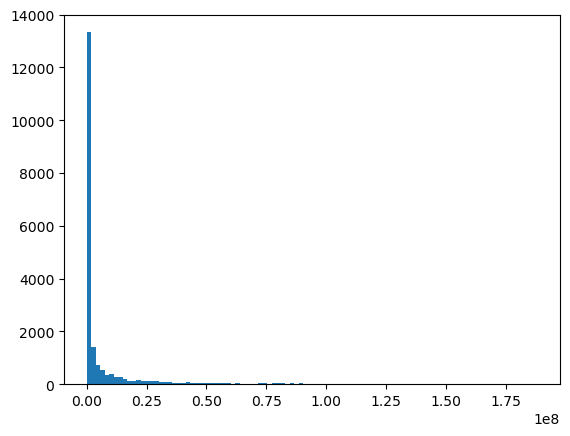

In [37]:
import matplotlib.pyplot as plt
from tqdm import tqdm

conductors = []

for phi in tqdm(phis, desc="Loading conductors: "):
    try:
        c = elliptic_curve_from_phi_sage(phi).conductor()
        conductors.append(c)
    except:
        continue

plt.hist(conductors, bins=100)
plt.show()

Loading conductors: 100%|██████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 28501.00it/s]


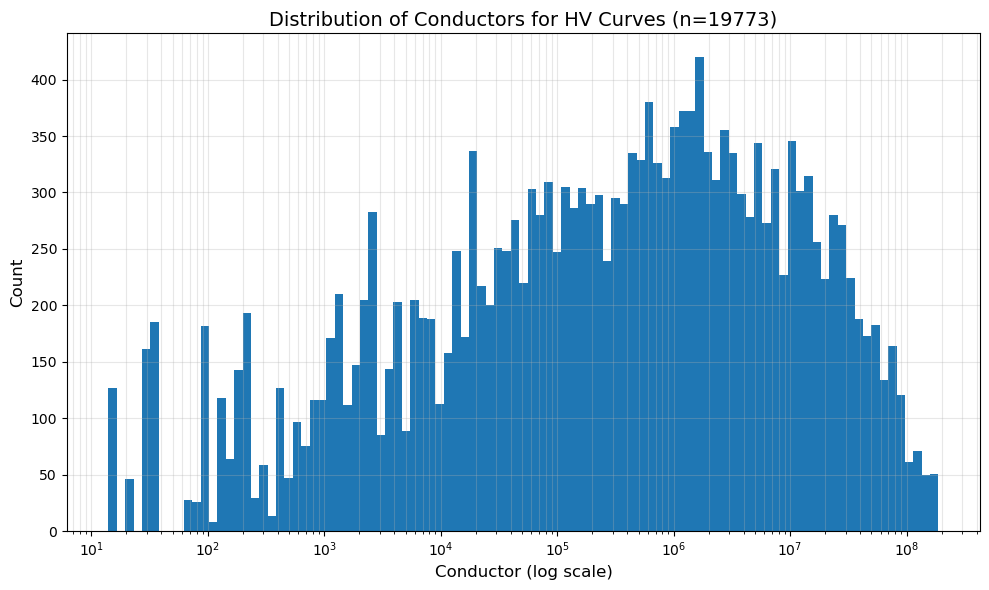

In [38]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

conductors = []
for phi in tqdm(phis, desc="Loading conductors: "):
    try:
        c = elliptic_curve_from_phi_sage(phi).conductor()
        conductors.append(c)
    except:
        continue

# Create logarithmically spaced bins
min_c = min(conductors)
max_c = max(conductors)
logbins = np.logspace(np.log10(min_c), np.log10(max_c), 100)

plt.figure(figsize=(10, 6))
plt.hist(conductors, bins=logbins)
plt.xscale('log')
plt.xlabel('Conductor (log scale)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title(f'Distribution of Conductors for HV Curves (n={len(conductors)})', fontsize=14)
plt.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.show()

In [11]:
from tqdm import tqdm

# Load curves from phis, excluding the ones with uncertain rank
rk0_curves = []
rk1_curves = []
rk2_curves = []
ranks = []

for phi in tqdm(phis, desc = "Loading curves from phis: "):
    try:
        curve = elliptic_curve_from_phi_sage(phi)
        rk = curve.rank()
        if rk not in ranks:
            ranks.append(rk)
        if rk == 0:
            rk0_curves.append(curve)
        elif rk == 1:
            rk1_curves.append(curve)
        elif rk == 2:
            rk2_curves.append(curve)
    except (ArithmeticError, RuntimeError, LookupError, SignalError):
        continue

print(f"Number of curves of rank 0, 1, 2 in database: {len(rk0_curves)}, {len(rk1_curves)}, {len(rk2_curves)}")
print(f"Ranks: {ranks}")

Loading curves from phis:   0%|                                                      | 28/20000 [00:03<50:44,  6.56it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   0%|▏                                                     | 60/20000 [00:07<48:18,  6.88it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   1%|▎                                                    | 112/20000 [00:13<44:23,  7.47it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   1%|▎                                                    | 119/20000 [00:14<44:45,  7.40it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   1%|▌                                                    | 210/20000 [00:24<53:50,  6.13it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   1%|▋                                                    | 271/20000 [00:31<54:24,  6.04it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   1%|▋                                                  | 273/20000 [00:31<1:04:12,  5.12it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   2%|█                                                    | 388/20000 [00:42<41:03,  7.96it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   2%|█▏                                                   | 443/20000 [00:48<49:17,  6.61it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   2%|█▎                                                   | 475/20000 [00:51<49:36,  6.56it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   3%|█▌                                                   | 601/20000 [01:03<57:14,  5.65it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   3%|█▋                                                   | 655/20000 [01:08<41:32,  7.76it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.
Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   4%|██                                                   | 762/20000 [01:19<38:46,  8.27it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   4%|██▎                                                  | 851/20000 [01:27<34:00,  9.38it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   4%|██▎                                                  | 853/20000 [01:28<53:03,  6.02it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   5%|██▍                                                  | 920/20000 [01:34<26:26, 12.03it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   5%|██▍                                                  | 943/20000 [01:36<31:43, 10.01it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   5%|██▌                                                  | 977/20000 [01:40<41:57,  7.56it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   5%|██▌                                                 | 1002/20000 [01:42<29:48, 10.63it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   5%|██▋                                                 | 1027/20000 [01:44<49:36,  6.37it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   5%|██▋                                                 | 1030/20000 [01:45<49:53,  6.34it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   5%|██▊                                                 | 1093/20000 [01:50<33:48,  9.32it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   6%|███▏                                                | 1229/20000 [02:01<36:07,  8.66it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   6%|███▎                                                | 1252/20000 [02:03<36:42,  8.51it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   6%|███▎                                                | 1256/20000 [02:04<37:11,  8.40it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   7%|███▋                                                | 1416/20000 [02:16<25:28, 12.16it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   7%|███▊                                                | 1480/20000 [02:21<21:47, 14.17it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   7%|███▉                                                | 1497/20000 [02:23<35:55,  8.58it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   8%|████                                                | 1555/20000 [02:28<33:02,  9.30it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   8%|████▎                                               | 1661/20000 [02:36<37:50,  8.08it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   9%|████▍                                               | 1707/20000 [02:40<29:54, 10.19it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   9%|████▍                                               | 1729/20000 [02:42<38:28,  7.92it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   9%|████▌                                               | 1734/20000 [02:43<36:15,  8.40it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   9%|████▌                                               | 1737/20000 [02:43<47:09,  6.45it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   9%|████▌                                               | 1771/20000 [02:45<18:39, 16.28it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   9%|████▊                                               | 1844/20000 [02:51<21:49, 13.87it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  10%|█████                                               | 1927/20000 [02:55<20:52, 14.43it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  10%|█████▏                                              | 2013/20000 [03:02<21:32, 13.92it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  11%|█████▌                                              | 2161/20000 [03:12<24:30, 12.13it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  11%|█████▌                                              | 2163/20000 [03:12<31:23,  9.47it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  11%|█████▋                                              | 2195/20000 [03:14<23:16, 12.75it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  11%|█████▊                                              | 2257/20000 [03:19<32:12,  9.18it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  12%|██████                                              | 2321/20000 [03:24<36:14,  8.13it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  12%|██████▏                                             | 2390/20000 [03:28<26:21, 11.14it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  12%|██████▏                                             | 2392/20000 [03:29<35:27,  8.28it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  12%|██████▍                                             | 2454/20000 [03:33<31:29,  9.29it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  13%|██████▌                                             | 2515/20000 [03:37<23:19, 12.50it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  13%|██████▌                                             | 2531/20000 [03:38<26:02, 11.18it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  13%|██████▋                                             | 2558/20000 [03:39<18:46, 15.49it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  13%|██████▋                                             | 2576/20000 [03:41<32:56,  8.81it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  13%|██████▊                                             | 2642/20000 [03:46<22:16, 12.99it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  13%|██████▉                                             | 2655/20000 [03:47<30:24,  9.51it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  13%|██████▉                                             | 2661/20000 [03:48<23:35, 12.25it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  13%|██████▉                                             | 2691/20000 [03:50<33:46,  8.54it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  14%|███████▏                                            | 2760/20000 [03:55<29:56,  9.59it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  14%|███████▏                                            | 2776/20000 [03:57<20:09, 14.24it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  14%|███████▍                                            | 2837/20000 [04:00<12:23, 23.10it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  15%|███████▌                                            | 2920/20000 [04:05<25:51, 11.01it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  15%|███████▋                                            | 2974/20000 [04:08<21:19, 13.31it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  15%|███████▊                                            | 2988/20000 [04:09<17:33, 16.15it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  15%|███████▊                                            | 2993/20000 [04:10<26:56, 10.52it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  15%|███████▊                                            | 3003/20000 [04:11<34:41,  8.17it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  15%|███████▉                                            | 3033/20000 [04:13<25:36, 11.04it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  15%|████████                                            | 3088/20000 [04:16<15:06, 18.66it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  15%|████████                                            | 3097/20000 [04:17<27:20, 10.31it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  16%|████████                                            | 3102/20000 [04:18<27:39, 10.18it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  16%|████████▎                                           | 3178/20000 [04:22<23:26, 11.96it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  16%|████████▍                                           | 3235/20000 [04:26<23:47, 11.75it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  16%|████████▍                                           | 3245/20000 [04:27<35:35,  7.85it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  16%|████████▌                                           | 3272/20000 [04:28<11:51, 23.51it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  16%|████████▌                                           | 3275/20000 [04:29<29:55,  9.32it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  17%|████████▋                                           | 3353/20000 [04:33<22:27, 12.35it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  17%|████████▋                                           | 3363/20000 [04:34<21:11, 13.09it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  17%|████████▊                                           | 3369/20000 [04:35<22:14, 12.47it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  17%|████████▊                                           | 3385/20000 [04:36<22:52, 12.11it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  17%|████████▊                                           | 3401/20000 [04:37<18:21, 15.07it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  18%|█████████▏                                          | 3514/20000 [04:44<26:36, 10.32it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  18%|█████████▏                                          | 3549/20000 [04:47<23:20, 11.75it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  18%|█████████▎                                          | 3558/20000 [04:48<19:28, 14.07it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  18%|█████████▎                                          | 3574/20000 [04:49<24:55, 10.98it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  18%|█████████▎                                          | 3582/20000 [04:50<35:44,  7.66it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  18%|█████████▍                                          | 3610/20000 [04:53<24:49, 11.00it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  19%|█████████▋                                          | 3708/20000 [04:58<27:04, 10.03it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  19%|█████████▊                                          | 3769/20000 [05:01<11:18, 23.93it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  19%|█████████▉                                          | 3831/20000 [05:05<17:52, 15.08it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  19%|██████████                                          | 3883/20000 [05:08<20:37, 13.02it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  19%|██████████                                          | 3894/20000 [05:08<15:46, 17.01it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  20%|██████████▏                                         | 3914/20000 [05:09<16:12, 16.55it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  20%|██████████▏                                         | 3934/20000 [05:10<14:42, 18.20it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  20%|██████████▍                                         | 4032/20000 [05:17<29:41,  8.96it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  20%|██████████▌                                         | 4081/20000 [05:21<31:39,  8.38it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  21%|██████████▋                                         | 4133/20000 [05:24<25:18, 10.45it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  21%|██████████▊                                         | 4154/20000 [05:25<19:05, 13.83it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  21%|██████████▊                                         | 4180/20000 [05:27<18:23, 14.34it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  21%|██████████▉                                         | 4194/20000 [05:28<15:24, 17.10it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  22%|███████████▏                                        | 4305/20000 [05:35<33:41,  7.76it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  22%|███████████▎                                        | 4341/20000 [05:37<15:12, 17.16it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  22%|███████████▎                                        | 4359/20000 [05:39<16:00, 16.29it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  22%|███████████▍                                        | 4404/20000 [05:42<21:54, 11.86it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  22%|███████████▌                                        | 4448/20000 [05:44<18:10, 14.26it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  22%|███████████▌                                        | 4456/20000 [05:45<20:28, 12.65it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  22%|███████████▋                                        | 4494/20000 [05:47<18:45, 13.78it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  23%|████████████▏                                       | 4664/20000 [05:55<14:15, 17.93it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  23%|████████████▏                                       | 4673/20000 [05:56<18:35, 13.74it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  23%|████████████▏                                       | 4694/20000 [05:57<11:09, 22.88it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  24%|████████████▎                                       | 4719/20000 [05:59<20:22, 12.50it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  24%|████████████▎                                       | 4751/20000 [06:01<17:11, 14.78it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  24%|████████████▎                                       | 4757/20000 [06:01<19:47, 12.83it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  24%|████████████▋                                       | 4858/20000 [06:07<26:37,  9.48it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  25%|█████████████                                       | 5021/20000 [06:14<11:27, 21.78it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  25%|█████████████▏                                      | 5066/20000 [06:16<09:47, 25.42it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  26%|█████████████▎                                      | 5102/20000 [06:17<14:22, 17.28it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  26%|█████████████▎                                      | 5104/20000 [06:18<20:09, 12.31it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  26%|█████████████▎                                      | 5114/20000 [06:18<15:26, 16.07it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  26%|█████████████▍                                      | 5189/20000 [06:21<11:39, 21.19it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  26%|█████████████▋                                      | 5272/20000 [06:25<18:28, 13.29it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  27%|█████████████▊                                      | 5329/20000 [06:28<15:39, 15.61it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  27%|█████████████▉                                      | 5347/20000 [06:28<11:37, 21.00it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  27%|█████████████▉                                      | 5357/20000 [06:29<19:26, 12.56it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  27%|█████████████▉                                      | 5361/20000 [06:30<28:42,  8.50it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  27%|██████████████                                      | 5397/20000 [06:32<21:48, 11.16it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  28%|██████████████▍                                     | 5536/20000 [06:39<14:16, 16.89it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  28%|██████████████▍                                     | 5545/20000 [06:40<19:15, 12.51it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  28%|██████████████▌                                     | 5590/20000 [06:43<22:00, 10.92it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  28%|██████████████▌                                     | 5598/20000 [06:43<16:37, 14.44it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  28%|██████████████▋                                     | 5630/20000 [06:46<15:27, 15.50it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  28%|██████████████▊                                     | 5686/20000 [06:48<14:43, 16.20it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  29%|██████████████▉                                     | 5725/20000 [06:50<16:34, 14.35it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  29%|██████████████▉                                     | 5754/20000 [06:51<15:48, 15.01it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  29%|███████████████▏                                    | 5857/20000 [06:56<05:35, 42.19it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  30%|███████████████▎                                    | 5904/20000 [06:58<08:15, 28.47it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  30%|███████████████▍                                    | 5937/20000 [06:59<08:46, 26.71it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  31%|███████████████▉                                    | 6111/20000 [07:05<05:31, 41.96it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  31%|███████████████▉                                    | 6123/20000 [07:07<17:03, 13.56it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  31%|███████████████▉                                    | 6140/20000 [07:08<19:26, 11.88it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  32%|████████████████▋                                   | 6416/20000 [07:20<15:35, 14.52it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  32%|████████████████▋                                   | 6431/20000 [07:21<14:40, 15.41it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  33%|████████████████▉                                   | 6507/20000 [07:23<07:42, 29.20it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  33%|█████████████████                                   | 6578/20000 [07:26<14:15, 15.68it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  34%|█████████████████▌                                  | 6748/20000 [07:33<08:23, 26.31it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  34%|█████████████████▊                                  | 6870/20000 [07:37<13:44, 15.92it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  35%|██████████████████▏                                 | 6987/20000 [07:41<08:31, 25.43it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  35%|██████████████████▏                                 | 7008/20000 [07:42<12:43, 17.02it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  35%|██████████████████▎                                 | 7043/20000 [07:44<09:43, 22.19it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  36%|██████████████████▍                                 | 7108/20000 [07:47<10:33, 20.34it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  36%|██████████████████▊                                 | 7220/20000 [07:52<10:25, 20.42it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  36%|██████████████████▊                                 | 7249/20000 [07:53<09:41, 21.94it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  37%|███████████████████                                 | 7322/20000 [07:57<15:01, 14.07it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  37%|███████████████████                                 | 7335/20000 [07:57<12:45, 16.55it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  37%|███████████████████▏                                | 7382/20000 [08:00<12:38, 16.63it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  37%|███████████████████▍                                | 7456/20000 [08:02<08:59, 23.24it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  37%|███████████████████▍                                | 7464/20000 [08:03<10:38, 19.63it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  38%|███████████████████▉                                | 7663/20000 [08:09<09:33, 21.52it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  38%|███████████████████▉                                | 7689/20000 [08:10<11:43, 17.50it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  39%|████████████████████                                | 7712/20000 [08:11<09:58, 20.52it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  39%|████████████████████▎                               | 7828/20000 [08:14<06:02, 33.62it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  39%|████████████████████▌                               | 7888/20000 [08:16<08:06, 24.88it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  40%|████████████████████▋                               | 7964/20000 [08:19<09:18, 21.56it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  40%|████████████████████▉                               | 8063/20000 [08:22<10:53, 18.25it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  40%|████████████████████▉                               | 8076/20000 [08:23<13:49, 14.38it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  40%|█████████████████████                               | 8091/20000 [08:24<11:18, 17.55it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  41%|█████████████████████▏                              | 8152/20000 [08:26<07:49, 25.23it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  41%|█████████████████████▌                              | 8277/20000 [08:31<09:37, 20.30it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  41%|█████████████████████▌                              | 8296/20000 [08:31<06:55, 28.16it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  42%|█████████████████████▋                              | 8355/20000 [08:33<07:16, 26.71it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  43%|██████████████████████                              | 8503/20000 [08:39<05:17, 36.16it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  43%|██████████████████████▏                             | 8522/20000 [08:40<08:15, 23.16it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  43%|██████████████████████▏                             | 8525/20000 [08:40<12:27, 15.36it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  43%|██████████████████████▏                             | 8534/20000 [08:41<11:41, 16.34it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  43%|██████████████████████▎                             | 8588/20000 [08:43<12:06, 15.70it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  44%|██████████████████████▋                             | 8705/20000 [08:45<07:56, 23.72it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  44%|██████████████████████▊                             | 8772/20000 [08:47<05:14, 35.66it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  44%|██████████████████████▉                             | 8812/20000 [08:48<06:55, 26.94it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  44%|███████████████████████                             | 8885/20000 [08:50<03:51, 48.10it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  45%|███████████████████████▏                            | 8915/20000 [08:51<06:46, 27.30it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  45%|███████████████████████▏                            | 8940/20000 [08:52<06:07, 30.09it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  45%|███████████████████████▎                            | 8945/20000 [08:52<05:47, 31.85it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  45%|███████████████████████▍                            | 8992/20000 [08:54<07:35, 24.14it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  45%|███████████████████████▍                            | 8995/20000 [08:55<10:55, 16.78it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  45%|███████████████████████▌                            | 9083/20000 [08:58<07:40, 23.73it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  46%|███████████████████████▋                            | 9120/20000 [08:59<07:27, 24.33it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  46%|███████████████████████▉                            | 9185/20000 [09:01<03:57, 45.53it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  46%|███████████████████████▉                            | 9191/20000 [09:01<09:16, 19.41it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  46%|████████████████████████▏                           | 9290/20000 [09:04<04:39, 38.37it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  47%|████████████████████████▎                           | 9365/20000 [09:07<07:08, 24.80it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  47%|████████████████████████▌                           | 9439/20000 [09:10<08:28, 20.79it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  47%|████████████████████████▌                           | 9442/20000 [09:11<11:42, 15.03it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  47%|████████████████████████▋                           | 9473/20000 [09:12<08:49, 19.88it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  47%|████████████████████████▋                           | 9490/20000 [09:12<07:29, 23.39it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  48%|████████████████████████▊                           | 9531/20000 [09:14<04:56, 35.37it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  48%|████████████████████████▉                           | 9573/20000 [09:15<08:01, 21.67it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  48%|█████████████████████████▏                          | 9679/20000 [09:19<07:48, 22.03it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  48%|█████████████████████████▏                          | 9685/20000 [09:20<13:32, 12.69it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  49%|█████████████████████████▎                          | 9748/20000 [09:22<08:38, 19.78it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  50%|█████████████████████████▊                          | 9907/20000 [09:27<08:00, 21.02it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  50%|█████████████████████████▊                          | 9922/20000 [09:27<06:18, 26.62it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.
Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  50%|█████████████████████████▊                          | 9925/20000 [09:28<10:50, 15.50it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  50%|█████████████████████████▉                          | 9975/20000 [09:30<09:24, 17.75it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  50%|█████████████████████████▌                         | 10029/20000 [09:32<08:11, 20.29it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  50%|█████████████████████████▋                         | 10053/20000 [09:33<06:40, 24.87it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  50%|█████████████████████████▋                         | 10085/20000 [09:35<08:01, 20.57it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  51%|█████████████████████████▉                         | 10153/20000 [09:37<06:31, 25.13it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  51%|██████████████████████████                         | 10208/20000 [09:38<05:32, 29.41it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  52%|██████████████████████████▎                        | 10325/20000 [09:43<08:36, 18.73it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  52%|██████████████████████████▎                        | 10338/20000 [09:43<07:40, 20.99it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  52%|██████████████████████████▍                        | 10364/20000 [09:44<05:34, 28.82it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  52%|██████████████████████████▍                        | 10392/20000 [09:46<11:47, 13.58it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  52%|██████████████████████████▋                        | 10478/20000 [09:48<04:19, 36.71it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  52%|██████████████████████████▋                        | 10484/20000 [09:48<05:25, 29.27it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  53%|██████████████████████████▊                        | 10531/20000 [09:49<03:54, 40.35it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  53%|██████████████████████████▊                        | 10536/20000 [09:50<06:24, 24.63it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  53%|██████████████████████████▉                        | 10558/20000 [09:50<05:17, 29.77it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  53%|███████████████████████████                        | 10599/20000 [09:52<04:59, 31.43it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  53%|███████████████████████████                        | 10616/20000 [09:52<05:29, 28.47it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  53%|███████████████████████████                        | 10621/20000 [09:53<09:00, 17.36it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  53%|███████████████████████████▎                       | 10687/20000 [09:55<05:12, 29.81it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  53%|███████████████████████████▎                       | 10699/20000 [09:55<06:41, 23.16it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  54%|███████████████████████████▍                       | 10782/20000 [09:58<04:33, 33.71it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  54%|███████████████████████████▌                       | 10815/20000 [09:59<05:49, 26.31it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  55%|███████████████████████████▉                       | 10955/20000 [10:02<04:12, 35.81it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  55%|███████████████████████████▉                       | 10962/20000 [10:02<05:47, 26.03it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  55%|███████████████████████████▉                       | 10975/20000 [10:03<07:00, 21.47it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  55%|████████████████████████████                       | 10989/20000 [10:04<07:08, 21.05it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  55%|████████████████████████████                       | 11022/20000 [10:05<08:39, 17.27it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  56%|████████████████████████████▍                      | 11140/20000 [10:08<03:08, 46.89it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  56%|████████████████████████████▍                      | 11147/20000 [10:08<04:36, 32.06it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  56%|████████████████████████████▍                      | 11158/20000 [10:09<05:28, 26.91it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  56%|████████████████████████████▍                      | 11162/20000 [10:09<05:25, 27.18it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  56%|████████████████████████████▍                      | 11173/20000 [10:10<08:16, 17.76it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  56%|████████████████████████████▌                      | 11177/20000 [10:10<09:40, 15.19it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  56%|████████████████████████████▌                      | 11191/20000 [10:11<06:33, 22.41it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  56%|████████████████████████████▋                      | 11226/20000 [10:12<04:33, 32.10it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  56%|████████████████████████████▋                      | 11231/20000 [10:12<06:30, 22.43it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  57%|█████████████████████████████                      | 11383/20000 [10:15<03:18, 43.38it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  57%|█████████████████████████████▏                     | 11454/20000 [10:18<04:47, 29.77it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  58%|█████████████████████████████▍                     | 11539/20000 [10:19<02:17, 61.74it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.
Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  58%|█████████████████████████████▋                     | 11637/20000 [10:22<08:14, 16.92it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  58%|█████████████████████████████▊                     | 11681/20000 [10:24<04:58, 27.91it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  59%|█████████████████████████████▉                     | 11721/20000 [10:25<03:39, 37.78it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  59%|██████████████████████████████▏                    | 11842/20000 [10:29<04:50, 28.05it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  59%|██████████████████████████████▏                    | 11847/20000 [10:30<07:59, 17.01it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  59%|██████████████████████████████▏                    | 11851/20000 [10:30<09:18, 14.60it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  59%|██████████████████████████████▎                    | 11899/20000 [10:31<04:58, 27.18it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  60%|██████████████████████████████▍                    | 11925/20000 [10:32<04:42, 28.59it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  60%|██████████████████████████████▍                    | 11929/20000 [10:33<07:02, 19.11it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  60%|██████████████████████████████▊                    | 12064/20000 [10:35<02:14, 58.80it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  61%|██████████████████████████████▉                    | 12114/20000 [10:37<04:34, 28.70it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  61%|██████████████████████████████▉                    | 12149/20000 [10:38<03:14, 40.39it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  61%|███████████████████████████████                    | 12178/20000 [10:39<03:34, 36.44it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  61%|███████████████████████████████                    | 12199/20000 [10:40<03:41, 35.14it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  62%|███████████████████████████████▌                   | 12377/20000 [10:44<02:04, 61.21it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  62%|███████████████████████████████▌                   | 12384/20000 [10:45<05:11, 24.43it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  62%|███████████████████████████████▌                   | 12389/20000 [10:45<06:08, 20.63it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  62%|███████████████████████████████▊                   | 12466/20000 [10:47<03:38, 34.41it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  62%|███████████████████████████████▊                   | 12471/20000 [10:47<05:44, 21.88it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  62%|███████████████████████████████▊                   | 12478/20000 [10:48<07:44, 16.19it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  63%|███████████████████████████████▉                   | 12520/20000 [10:49<03:50, 32.41it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  63%|███████████████████████████████▉                   | 12526/20000 [10:50<06:17, 19.79it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  63%|███████████████████████████████▉                   | 12545/20000 [10:50<05:19, 23.32it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  63%|████████████████████████████████                   | 12567/20000 [10:51<03:56, 31.48it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  63%|████████████████████████████████                   | 12591/20000 [10:52<04:01, 30.64it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  63%|████████████████████████████████▏                  | 12640/20000 [10:53<02:58, 41.12it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  63%|████████████████████████████████▎                  | 12658/20000 [10:53<03:58, 30.84it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  64%|████████████████████████████████▍                  | 12701/20000 [10:54<02:30, 48.47it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  64%|████████████████████████████████▍                  | 12729/20000 [10:55<04:03, 29.86it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  64%|████████████████████████████████▍                  | 12740/20000 [10:56<06:35, 18.35it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  64%|████████████████████████████████▌                  | 12749/20000 [10:56<06:28, 18.67it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  64%|████████████████████████████████▋                  | 12823/20000 [10:59<04:16, 27.99it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  64%|████████████████████████████████▋                  | 12833/20000 [11:00<04:58, 24.05it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  64%|████████████████████████████████▊                  | 12850/20000 [11:00<03:51, 30.82it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  64%|████████████████████████████████▊                  | 12882/20000 [11:01<05:00, 23.69it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  64%|████████████████████████████████▉                  | 12898/20000 [11:02<04:10, 28.38it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  65%|████████████████████████████████▉                  | 12930/20000 [11:03<04:28, 26.29it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  65%|█████████████████████████████████                  | 12974/20000 [11:04<02:56, 39.88it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  65%|█████████████████████████████████▏                 | 13003/20000 [11:05<03:19, 35.09it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  65%|█████████████████████████████████▏                 | 13021/20000 [11:05<04:40, 24.84it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  65%|█████████████████████████████████▎                 | 13052/20000 [11:06<03:10, 36.49it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  65%|█████████████████████████████████▍                 | 13097/20000 [11:08<03:51, 29.81it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  66%|█████████████████████████████████▌                 | 13168/20000 [11:09<03:30, 32.41it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  66%|█████████████████████████████████▋                 | 13205/20000 [11:10<02:43, 41.68it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  66%|█████████████████████████████████▉                 | 13300/20000 [11:11<01:46, 62.86it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  67%|██████████████████████████████████                 | 13362/20000 [11:14<02:49, 39.17it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  67%|██████████████████████████████████                 | 13371/20000 [11:14<03:44, 29.51it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  67%|██████████████████████████████████                 | 13382/20000 [11:15<04:16, 25.80it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.
Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  67%|██████████████████████████████████▏                | 13417/20000 [11:15<02:00, 54.60it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  67%|██████████████████████████████████▏                | 13425/20000 [11:16<03:52, 28.25it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  67%|██████████████████████████████████▍                | 13489/20000 [11:19<04:27, 24.30it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  67%|██████████████████████████████████▍                | 13497/20000 [11:20<08:05, 13.39it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  68%|██████████████████████████████████▊                | 13667/20000 [11:22<01:51, 56.78it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  68%|██████████████████████████████████▉                | 13681/20000 [11:23<03:03, 34.50it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  68%|██████████████████████████████████▉                | 13687/20000 [11:24<05:55, 17.78it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  69%|███████████████████████████████████▏               | 13805/20000 [11:26<01:53, 54.66it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  69%|███████████████████████████████████▏               | 13820/20000 [11:27<02:29, 41.30it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  69%|███████████████████████████████████▎               | 13832/20000 [11:28<04:01, 25.56it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  69%|███████████████████████████████████▎               | 13844/20000 [11:28<04:16, 23.98it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  70%|███████████████████████████████████▋               | 14012/20000 [11:31<02:02, 48.77it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  70%|███████████████████████████████████▊               | 14056/20000 [11:32<02:30, 39.53it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  70%|███████████████████████████████████▉               | 14073/20000 [11:32<02:32, 38.89it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  71%|████████████████████████████████████▏              | 14172/20000 [11:35<02:46, 34.91it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  71%|████████████████████████████████████▏              | 14185/20000 [11:35<03:08, 30.92it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  72%|████████████████████████████████████▌              | 14347/20000 [11:38<01:44, 54.24it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  73%|█████████████████████████████████████              | 14531/20000 [11:42<01:56, 47.00it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  73%|█████████████████████████████████████              | 14547/20000 [11:42<02:42, 33.62it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  73%|█████████████████████████████████████▎             | 14656/20000 [11:44<01:38, 54.05it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  74%|█████████████████████████████████████▌             | 14713/20000 [11:45<02:14, 39.44it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  74%|█████████████████████████████████████▋             | 14785/20000 [11:46<01:01, 84.68it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  74%|█████████████████████████████████████▊             | 14811/20000 [11:47<02:00, 43.12it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.
Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  74%|█████████████████████████████████████▊             | 14821/20000 [11:48<03:23, 25.46it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  74%|█████████████████████████████████████▉             | 14865/20000 [11:49<01:55, 44.55it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.
Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  74%|█████████████████████████████████████▉             | 14886/20000 [11:50<03:33, 23.92it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  75%|██████████████████████████████████████             | 14910/20000 [11:51<03:18, 25.67it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  75%|██████████████████████████████████████             | 14926/20000 [11:52<02:39, 31.74it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  75%|██████████████████████████████████████▏            | 14958/20000 [11:52<01:59, 42.12it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  76%|██████████████████████████████████████▋            | 15168/20000 [11:55<01:05, 73.78it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  76%|██████████████████████████████████████▊            | 15236/20000 [11:57<01:24, 56.11it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  76%|██████████████████████████████████████▉            | 15285/20000 [11:58<01:47, 43.83it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  77%|███████████████████████████████████████▏           | 15363/20000 [12:00<02:56, 26.27it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  77%|███████████████████████████████████████▏           | 15375/20000 [12:00<02:46, 27.84it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  77%|███████████████████████████████████████▎           | 15403/20000 [12:01<02:16, 33.58it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  77%|███████████████████████████████████████▎           | 15435/20000 [12:01<01:32, 49.25it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  78%|███████████████████████████████████████▌           | 15538/20000 [12:03<01:31, 48.86it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  78%|███████████████████████████████████████▋           | 15575/20000 [12:03<01:14, 59.29it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  78%|███████████████████████████████████████▊           | 15608/20000 [12:04<01:22, 53.55it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.
Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  78%|███████████████████████████████████████▊           | 15622/20000 [12:05<02:15, 32.30it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  79%|████████████████████████████████████████▏          | 15770/20000 [12:07<00:42, 99.32it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  79%|████████████████████████████████████████▏          | 15784/20000 [12:07<00:57, 73.76it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  79%|████████████████████████████████████████▎          | 15792/20000 [12:08<01:30, 46.37it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  79%|████████████████████████████████████████▎          | 15823/20000 [12:08<01:16, 54.51it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  79%|████████████████████████████████████████▎          | 15830/20000 [12:09<01:48, 38.52it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  79%|████████████████████████████████████████▍          | 15840/20000 [12:09<02:01, 34.30it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  79%|████████████████████████████████████████▍          | 15847/20000 [12:09<02:22, 29.23it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  79%|████████████████████████████████████████▍          | 15854/20000 [12:10<02:37, 26.25it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  80%|████████████████████████████████████████▋          | 15940/20000 [12:12<01:31, 44.41it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  80%|████████████████████████████████████████▋          | 15979/20000 [12:13<01:19, 50.44it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  80%|████████████████████████████████████████▊          | 15993/20000 [12:13<01:39, 40.47it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  80%|████████████████████████████████████████▊          | 16004/20000 [12:14<02:06, 31.52it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  80%|█████████████████████████████████████████          | 16079/20000 [12:15<01:10, 55.99it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  81%|█████████████████████████████████████████▏         | 16139/20000 [12:15<00:53, 72.11it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  81%|█████████████████████████████████████████▏         | 16150/20000 [12:16<01:27, 44.15it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  81%|█████████████████████████████████████████▎         | 16178/20000 [12:17<01:47, 35.40it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  81%|█████████████████████████████████████████▍         | 16246/20000 [12:18<01:13, 51.10it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  81%|█████████████████████████████████████████▍         | 16260/20000 [12:19<01:44, 35.91it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  82%|█████████████████████████████████████████▌         | 16307/20000 [12:20<01:05, 56.43it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.
Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  82%|█████████████████████████████████████████▋         | 16325/20000 [12:21<01:46, 34.55it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  82%|█████████████████████████████████████████▊         | 16399/20000 [12:21<00:56, 64.02it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  82%|█████████████████████████████████████████▊         | 16417/20000 [12:23<02:20, 25.46it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  82%|█████████████████████████████████████████▉         | 16431/20000 [12:24<03:09, 18.82it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  83%|██████████████████████████████████████████▏        | 16537/20000 [12:25<01:05, 52.57it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  83%|██████████████████████████████████████████▏        | 16556/20000 [12:26<01:40, 34.28it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  83%|██████████████████████████████████████████▎        | 16597/20000 [12:27<01:09, 49.28it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  83%|██████████████████████████████████████████▍        | 16630/20000 [12:28<01:13, 45.91it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  83%|██████████████████████████████████████████▍        | 16643/20000 [12:28<01:42, 32.81it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  83%|██████████████████████████████████████████▌        | 16683/20000 [12:29<00:51, 64.17it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  83%|██████████████████████████████████████████▌        | 16691/20000 [12:30<01:52, 29.42it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  85%|███████████████████████████████████████████        | 16910/20000 [12:33<00:33, 93.61it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  85%|███████████████████████████████████████████▏       | 16932/20000 [12:34<01:21, 37.60it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  85%|███████████████████████████████████████████▎       | 16963/20000 [12:35<01:15, 40.14it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  85%|███████████████████████████████████████████▎       | 16988/20000 [12:35<01:05, 45.82it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  85%|███████████████████████████████████████████▎       | 17002/20000 [12:36<01:39, 30.09it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  85%|███████████████████████████████████████████▍       | 17058/20000 [12:38<01:10, 41.48it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  85%|███████████████████████████████████████████▌       | 17092/20000 [12:39<01:23, 34.95it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  86%|███████████████████████████████████████████▌       | 17102/20000 [12:39<01:56, 24.92it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  86%|███████████████████████████████████████████▉       | 17234/20000 [12:41<00:37, 74.48it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  87%|████████████████████████████████████████████▏      | 17330/20000 [12:42<00:33, 80.06it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  87%|████████████████████████████████████████████▎      | 17368/20000 [12:44<01:02, 42.21it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  87%|████████████████████████████████████████████▍      | 17414/20000 [12:44<00:45, 56.27it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  87%|████████████████████████████████████████████▍      | 17423/20000 [12:45<01:07, 38.29it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  87%|████████████████████████████████████████████▍      | 17436/20000 [12:46<01:23, 30.58it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  87%|████████████████████████████████████████████▌      | 17463/20000 [12:46<00:55, 45.54it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  87%|████████████████████████████████████████████▌      | 17469/20000 [12:47<01:45, 24.10it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.
Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  87%|████████████████████████████████████████████▌      | 17491/20000 [12:48<02:13, 18.76it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  88%|████████████████████████████████████████████▋      | 17508/20000 [12:49<01:44, 23.92it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  88%|████████████████████████████████████████████▊      | 17589/20000 [12:50<00:53, 45.15it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  89%|█████████████████████████████████████████████▏     | 17714/20000 [12:52<00:24, 94.94it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  89%|█████████████████████████████████████████████▎     | 17793/20000 [12:52<00:22, 97.67it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  89%|█████████████████████████████████████████████▍     | 17803/20000 [12:53<00:48, 45.50it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  89%|█████████████████████████████████████████████▍     | 17822/20000 [12:54<00:50, 43.48it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  89%|█████████████████████████████████████████████▌     | 17861/20000 [12:55<01:09, 30.80it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  89%|█████████████████████████████████████████████▌     | 17880/20000 [12:55<01:02, 34.13it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  90%|██████████████████████████████████████████████     | 18055/20000 [12:58<00:28, 67.35it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  90%|██████████████████████████████████████████████     | 18075/20000 [12:59<00:48, 39.35it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  90%|██████████████████████████████████████████████▏    | 18097/20000 [12:59<00:47, 40.23it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  91%|██████████████████████████████████████████████▍    | 18189/20000 [13:00<00:28, 63.16it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  91%|██████████████████████████████████████████████▍    | 18209/20000 [13:01<00:38, 45.96it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  91%|██████████████████████████████████████████████▍    | 18228/20000 [13:01<00:39, 44.68it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  91%|██████████████████████████████████████████████▌    | 18243/20000 [13:02<00:55, 31.40it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  91%|██████████████████████████████████████████████▌    | 18253/20000 [13:03<01:10, 24.89it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  91%|██████████████████████████████████████████████▌    | 18277/20000 [13:04<01:12, 23.74it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  92%|██████████████████████████████████████████████▋    | 18331/20000 [13:05<01:04, 25.98it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  92%|██████████████████████████████████████████████▉    | 18431/20000 [13:07<00:35, 44.77it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  93%|███████████████████████████████████████████████▏   | 18525/20000 [13:08<00:16, 89.26it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  93%|███████████████████████████████████████████████▍   | 18600/20000 [13:10<00:47, 29.21it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  93%|███████████████████████████████████████████████▋   | 18684/20000 [13:11<00:22, 58.41it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  94%|███████████████████████████████████████████████▋   | 18705/20000 [13:12<00:27, 47.37it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  94%|███████████████████████████████████████████████▊   | 18733/20000 [13:12<00:25, 48.73it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  94%|███████████████████████████████████████████████▊   | 18768/20000 [13:13<00:32, 37.94it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  94%|████████████████████████████████████████████████   | 18832/20000 [13:15<00:27, 42.92it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  94%|████████████████████████████████████████████████   | 18861/20000 [13:16<00:33, 34.40it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  95%|████████████████████████████████████████████████▎  | 18951/20000 [13:17<00:27, 37.73it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  95%|████████████████████████████████████████████████▍  | 18978/20000 [13:18<00:21, 47.46it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  95%|████████████████████████████████████████████████▌  | 19024/20000 [13:19<00:21, 44.60it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  95%|████████████████████████████████████████████████▌  | 19035/20000 [13:19<00:25, 38.58it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  95%|████████████████████████████████████████████████▋  | 19072/20000 [13:19<00:15, 58.54it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  95%|████████████████████████████████████████████████▋  | 19080/20000 [13:20<00:20, 44.68it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  96%|████████████████████████████████████████████████▊  | 19119/20000 [13:21<00:31, 28.09it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  96%|████████████████████████████████████████████████▊  | 19139/20000 [13:22<00:35, 24.10it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  96%|████████████████████████████████████████████████▉  | 19175/20000 [13:23<00:27, 30.34it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  96%|█████████████████████████████████████████████████▏ | 19273/20000 [13:24<00:14, 48.90it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  96%|█████████████████████████████████████████████████▏ | 19283/20000 [13:25<00:20, 35.67it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  97%|█████████████████████████████████████████████████▎ | 19329/20000 [13:26<00:12, 55.45it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  97%|█████████████████████████████████████████████████▍ | 19366/20000 [13:26<00:13, 45.34it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  97%|█████████████████████████████████████████████████▋ | 19485/20000 [13:27<00:06, 83.73it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  98%|█████████████████████████████████████████████████▊ | 19510/20000 [13:28<00:06, 70.72it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  98%|█████████████████████████████████████████████████▊ | 19528/20000 [13:29<00:11, 39.57it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  98%|█████████████████████████████████████████████████▊ | 19534/20000 [13:29<00:16, 28.62it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  98%|█████████████████████████████████████████████████▉ | 19580/20000 [13:31<00:18, 23.24it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  98%|██████████████████████████████████████████████████▏| 19672/20000 [13:32<00:06, 54.56it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  98%|██████████████████████████████████████████████████▏| 19684/20000 [13:33<00:06, 50.75it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  99%|██████████████████████████████████████████████████▎| 19711/20000 [13:34<00:08, 35.63it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  99%|██████████████████████████████████████████████████▎| 19738/20000 [13:34<00:05, 46.27it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  99%|██████████████████████████████████████████████████▌| 19809/20000 [13:35<00:03, 52.94it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  99%|██████████████████████████████████████████████████▌| 19827/20000 [13:36<00:05, 30.42it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis: 100%|██████████████████████████████████████████████████▊| 19917/20000 [13:37<00:01, 77.12it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis: 100%|██████████████████████████████████████████████████▊| 19949/20000 [13:38<00:00, 73.71it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis: 100%|██████████████████████████████████████████████████▉| 19965/20000 [13:38<00:00, 44.02it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis: 100%|███████████████████████████████████████████████████| 20000/20000 [13:39<00:00, 24.41it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.
Number of curves of rank 0, 1, 2 in database: 8762, 9194, 1367
Ranks: [0, 1, 2, 3]


In [12]:
print(f"Number of curves of rank 0, 1, 2 in database: {len(rk0_curves)}, {len(rk1_curves)}, {len(rk2_curves)}")
print(f"Ranks: {ranks}")

Number of curves of rank 0, 1, 2 in database: 8762, 9194, 1367
Ranks: [0, 1, 2, 3]


In [13]:
save(rk0_curves, "HV_curves/my_HV_rk0_curves")
save(rk1_curves, "HV_curves/my_HV_rk1_curves")
save(rk2_curves, "HV_curves/my_HV_rk2_curves")
save(ranks, "HV_curves/my_ranks")

In [3]:
rk0_curves = load("HV_curves/my_HV_rk0_curves")
rk1_curves = load("HV_curves/my_HV_rk2_curves")
rk2_curves = load("HV_curves/my_HV_rk2_curves")
ranks = load("HV_curves/my_ranks")

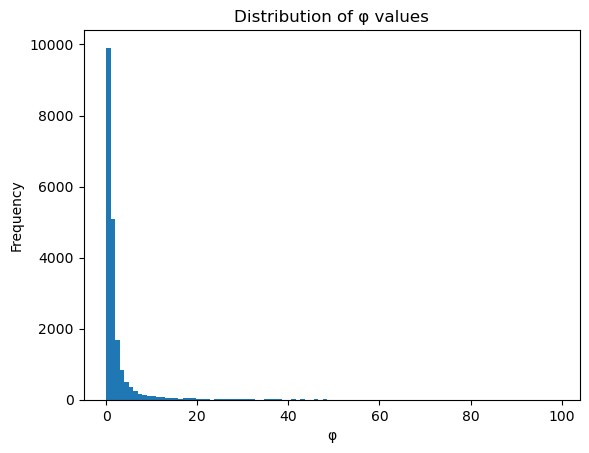

In [14]:
import matplotlib.pyplot as plt

# Convert Sage rationals to floats for plotting
phis_float = [float(phi) for phi in phis]

plt.hist(phis_float, bins=100)
plt.xlabel('φ')
plt.ylabel('Frequency')
plt.title('Distribution of φ values')
plt.show()

In [20]:
from tqdm import tqdm

def get_isogeny_class_representatives(cs):
    """Extract one representative from each isogeny class"""
    seen_classes = []
    representatives = []
    
    for E in tqdm(cs, desc = "Extracting isogeny class reps: "):
        iso_class = E.isogeny_class()
        if iso_class not in seen_classes:
            representatives.append(E)
            seen_classes.append(iso_class)
    
    return representatives
    
# Apply to all three groups
print("Obtaining the isogeny class representatives for rank zero curves...")
rk0_isogeny_reps = get_isogeny_class_representatives(rk0_curves)
print("Done.")
print("Obtaining the isogeny class representatives for rank one curves...")
rk1_isogeny_reps = get_isogeny_class_representatives(rk1_curves)
print("Done.")
print("Obtaining the isogeny class representatives for rank two curves...")
rk2_isogeny_reps = get_isogeny_class_representatives(rk2_curves)
print("Done.")

print(f"Number of representatives of curves of rank 0, 1, 2: {len(rk0_isogeny_reps)}, {len(rk1_isogeny_reps)}, {len(rk2_isogeny_reps)}")

Obtaining the isogeny class representatives for rank zero curves...


Extracting isogeny class reps:   2%|▊                                              | 156/8762 [00:00<00:03, 2160.55it/s]


SignalError: Segmentation fault

In [ ]:
save(rk0_isogeny_reps, "HV_curves/my_HV_rk0_isogeny_reps")
save(rk1_isogeny_reps, "HV_curves/my_HV_rk1_isogeny_reps")
save(rk2_isogeny_reps, "HV_curves/my_HV_rk2_isogeny_reps")

In [ ]:
rk0_isogeny_reps = load("HV_curves/my_HV_rk0_isogeny_reps")
rk1_isogeny_reps = load("HV_curves/my_HV_rk1_isogeny_reps")
rk2_isogeny_reps = load("HV_curves/my_HV_rk2_isogeny_reps")

In [ ]:
import numpy as np
from tqdm import tqdm
# Import the list of primes
P = Primes()

# Extract the average aps
N = 1000 # Number of primes I want to plot

print("Computing eigenforms...")

rk0_eigenforms = []
rk1_eigenforms = []
rk2_eigenforms = []

for E in tqdm(rk0_isogeny_reps, desc = "Computing rk0 eigenforms: "):
    rk0_eigenforms.append(E.q_eigenform(P[N]))

for E in tqdm(rk1_isogeny_reps, desc = "Computing rk1 eigenforms: "):
    rk1_eigenforms.append(E.q_eigenform(P[N]))

for E in tqdm(rk2_isogeny_reps, desc = "Computing rk2 eigenforms: "):
    rk2_eigenforms.append(E.q_eigenform(P[N]))

print("Done.")
print("Computing the average a_p's...")

rk0_aps = np.array([np.mean([ef[P[i]] for ef in rk0_eigenforms]) for i in range(N)])
rk1_aps = np.array([np.mean([ef[P[i]] for ef in rk1_eigenforms]) for i in range(N)])
rk2_aps = np.array([np.mean([ef[P[i]] for ef in rk2_eigenforms]) for i in range(N)])

print("Done.")

Computing eigenforms...


Computing rk2 eigenforms: 100%|███████████████████████████████████████████████████████| 358/358 [00:05<00:00, 68.33it/s]


Done.
Computing the average a_p's...
Done.


In [ ]:
# save(rk0_eigenforms, "HV_curves/my_rk0_eigenforms")
# save(rk1_eigenforms, "HV_curves/my_rk1_eigenforms")
# save(rk2_eigenforms, "HV_curves/my_rk2_eigenforms")
save(rk0_aps, "HV_curves/my_rk0_aps")
save(rk1_aps, "HV_curves/my_rk1_aps")
save(rk2_aps, "HV_curves/my_rk2_aps")

In [ ]:
# rk0_eigenforms = load("HV_curves/my_rk0_eigenforms")
# rk1_eigenforms = load("HV_curves/my_rk1_eigenforms")
# rk2_eigenforms = load("HV_curves/my_rk2_eigenforms")
rk0_aps = load("HV_curves/my_rk0_aps")
rk1_aps = load("HV_curves/my_rk1_aps")
rk2_aps = load("HV_curves/my_rk2_aps")
N = 1000

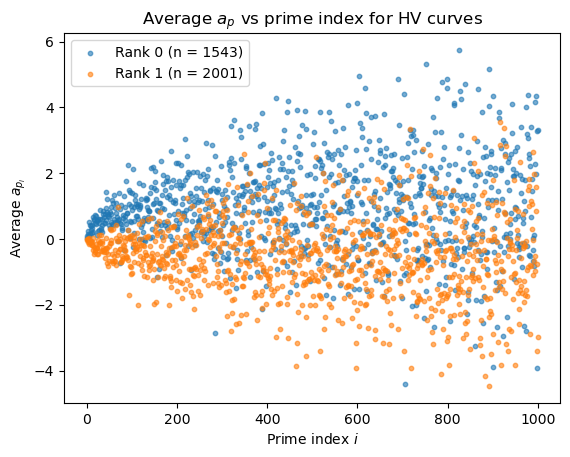

In [ ]:
import matplotlib.pyplot as plt
N = 1000
plt.scatter(range(N), rk0_aps[:N], label=f"Rank 0 (n = {len(rk0_isogeny_reps)})", alpha=0.6, s=10)
plt.scatter(range(N), rk1_aps[:N], label=f"Rank 1 (n = {len(rk1_isogeny_reps)})", alpha=0.6, s=10)
# plt.scatter(range(N), rk2_aps[:N], label="Rank 2", alpha=0.6, s=10)
plt.legend()
plt.xlabel(r"Prime index $i$")
plt.ylabel(r"Average $a_{p_i}$")
plt.title(r"Average $a_p$ vs prime index for HV curves")
plt.savefig(f"HV_curves/my_HV_aps_allconductors.png", dpi=150)
plt.show()